In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',150)

In [9]:
Cervicial_cancer=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Classification Datasets/risk_factors_cervical_cancer.csv')

In [65]:
Cervicial_cancer.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                         4                       15                  1   
1   15                         1                       14                  1   
2   34                         1                        ?                  1   
3   52                         5                       16                  4   
4   46                         3                       21                  4   
5   42                         3                       23                  2   
6   51                         3                       17                  6   
7   26                         1                       26                  3   
8   45                         1                       20                  5   
9   44                         3                       15                  ?   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0      0              0                   0                       0   
1      0              0                   0                       0   
2      0              0                   0                       0   
3      1             37                  37                       1   
4      0              0                   0                       1   
5      0              0                   0                       0   
6      1             34                 3.4                       0   
7      0              0                   0                       1   
8      0              0                   0                       0   
9      1    1.266972909                 2.8                       0   

  Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number)  \
0                               0   0           0    0             0   
1                               0   0           0    0             0   
2                               0   0           0    0             0   
3                               3   0           0    0             0   
4                              15   0           0    0             0   
5                               0   0           0    0             0   
6                               0   1           7    0             0   
7                               2   1           7    0             0   
8                               0   0           0    0             0   
9                               0   ?           ?    0             0   

  STDs:condylomatosis STDs:cervical condylomatosis  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
5                   0                            0   
6                   0                            0   
7                   0                            0   
8                   0                            0   
9                   0                            0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   
5                           0                                  0   
6                           0                                  0   
7                           0                                  0   
8                           0                                  0   
9                           0                                  0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
0             0                                0                   0   
1             0                                0           

In [201]:
Cervicial_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 857
Data columns (total 32 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:vaginal condylomatosis           858 non-null object
STDs:vulvo-perineal condy

In [73]:
Cervicial_cancer['Age'].values

array([18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 44, 27, 45, 44, 43, 40, 41,
       43, 42, 40, 43, 41, 40, 40, 40, 44, 39, 39, 37, 37, 41, 40, 37, 37,
       38, 37, 39, 37, 39, 36, 37, 37, 36, 36, 37, 36, 36, 40, 41, 37, 36,
       36, 36, 35, 36, 41, 35, 33, 35, 35, 34, 35, 35, 33, 38, 37, 34, 36,
       35, 35, 36, 34, 34, 35, 35, 35, 34, 33, 35, 35, 33, 31, 32, 32, 36,
       34, 36, 35, 32, 33, 36, 35, 33, 33, 33, 31, 35, 35, 31, 33, 34, 30,
       31, 38, 33, 34, 30, 33, 32, 32, 32, 32, 30, 23, 34, 34, 31, 30, 30,
       28, 33, 30, 31, 29, 30, 31, 31, 29, 29, 30, 28, 30, 30, 33, 30, 27,
       31, 29, 29, 30, 30, 20, 31, 28, 30, 31, 30, 29, 33, 31, 28, 30, 26,
       26, 27, 28, 27, 29, 32, 27, 28, 28, 28, 28, 29, 30, 29, 27, 29, 18,
       26, 26, 29, 29, 28, 26, 27, 27, 27, 30, 26, 27, 25, 28, 26, 28, 25,
       28, 27, 25, 28, 29, 27, 26, 25, 26, 28, 26, 27, 27, 26, 26, 27, 28,
       21, 25, 28, 26, 27, 25, 25, 27, 26, 28, 30, 25, 29, 26, 28, 23, 25,
       25, 30, 23, 24, 28

In [62]:
vales_to_replace=[ 'Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)',
                   'Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
                   'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
                    'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
                    'STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV']

In [69]:
Cervicial_cancer.dropna(inplace=True)

In [171]:
columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis']
columns1=['STDs:cervical condylomatosis','STDs:AIDS']
Cervicial_cancer.drop(labels=columns1, inplace=True, axis=1)

In [197]:
Cervicial_cancer.nunique()

Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV                               2
STDs: Number of diagnosis              4
Dx:Cancer       

In [173]:
cat_cols=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Hormonal Contraceptives',
         'IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
        'STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN',
         'Dx:HPV','Dx' ,'Hinselmann' ,'Schiller','Citology','Age']

Cont_cols=['Hormonal Contraceptives (years)','Smokes (packs/year)']

In [202]:
Cervicial_cancer.describe(include='all')

Age Number of sexual partners First sexual intercourse  \
count   858.000000                       858                      858   
unique         NaN                        12                       21   
top            NaN                         2                       15   
freq           NaN                       298                      170   
mean     26.820513                       NaN                      NaN   
std       8.497948                       NaN                      NaN   
min      13.000000                       NaN                      NaN   
25%      20.000000                       NaN                      NaN   
50%      25.000000                       NaN                      NaN   
75%      32.000000                       NaN                      NaN   
max      84.000000                       NaN                      NaN   

       Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
count                 858    858            858                 858   
unique                 11      2             30                  62   
top                     1      0              0                   0   
freq                  326    735            735                 735   
mean                  NaN    NaN            NaN                 NaN   
std                   NaN    NaN            NaN                 NaN   
min                   NaN    NaN            NaN                 NaN   
25%                   NaN    NaN            NaN                 NaN   
50%                   NaN    NaN            NaN                 NaN   
75%                   NaN    NaN            NaN                 NaN   
max                   NaN    NaN            NaN                 NaN   

       Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  \
count                      858                       858.000000  858   
unique                       2                              NaN    2   
top                          1                              NaN    0   
freq                       589                              NaN  775   
mean                       NaN                         1.972394  NaN   
std                        NaN                         3.597888  NaN   
min                        NaN                         0.000000  NaN   
25%                        NaN                         0.000000  NaN   
50%                        NaN                         0.250000  NaN   
75%                        NaN                         2.000000  NaN   
max                        NaN                        30.000000  NaN   

       IUD (years) STDs STDs (number) STDs:condylomatosis  \
count          858  858           858                 858   
unique          26    2             5                   2   
top              0    0             0                   0   
freq           775  779           779                 814   
mean           NaN  NaN           NaN                 NaN   
std            NaN  NaN           NaN                 NaN   
min            NaN  NaN           NaN                 NaN   
25%            NaN  NaN           NaN                 NaN   
50%            NaN  NaN           NaN                 NaN   
75%            NaN  NaN           NaN                 NaN   
max            NaN  NaN           NaN                 NaN   

       STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
count                          858                                858   
unique                           2                                  2   
top                              0                                  0   
freq                           854                                815   
mean                           NaN                                NaN   
std                            NaN                                NaN   
min                            NaN                                NaN   
25%                            NaN                                NaN   
50%                           

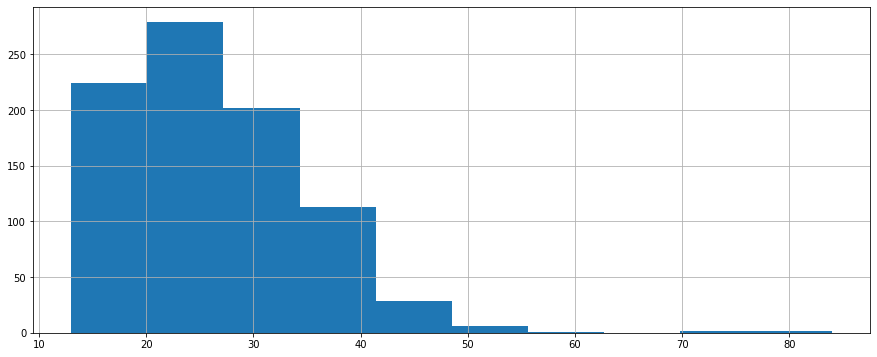

In [72]:
Cervicial_cancer['Age'].hist(figsize=(15,6))

In [187]:
Cervicial_cancer['Smokes (packs/year)'].values

array(['0', '0', '0', '37', '0', '0', '3.4', '0', '0', '2.8', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0.04', '0', '0', '0', '0.513202128', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '2.4', '0', '6', '0', '?', '0', '0',
       '0', '0', '0', '0', '9', '0', '0', '0', '1.6', '0', '0', '0', '19',
       '0', '0', '0', '0', '0', '21', '0', '0', '0', '0', '0', '0',
       '0.32', '0', '0', '0', '2.6', '0', '0', '0.8', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '15', '0', '0',
       '0', '0', '0', '0', '0', '0', '2', '0', '0.513202128', '0', '0',
       '0', '5.7', '0', '0', '0', '0', '0', '?', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '3.3', '0', '3.5', '0',
       '0', '0', '0', '0', '0', '0', '0', '12', '0', '0', '0.025', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '2.75', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '

In [ ]:
vales_to_replace=[ Smokes (packs/year),Hormonal Contraceptives (years),Age]

In [200]:
cat_cols=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Hormonal Contraceptives',
         'IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
        'STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN',
         'Dx:HPV','Dx' ,'Hinselmann' ,'Schiller','Citology','Age']

Cont_cols=['Hormonal Contraceptives (years)','Smokes (packs/year)']

target=['Biopsy']

In [167]:
Modevalue=Cervicial_cancer['STDs:HPV'].mode()[0]
print(Modevalue)

0


In [194]:
Cervicial_cancer['Smokes (packs/year)'].replace('?',Modevalue,inplace=True)

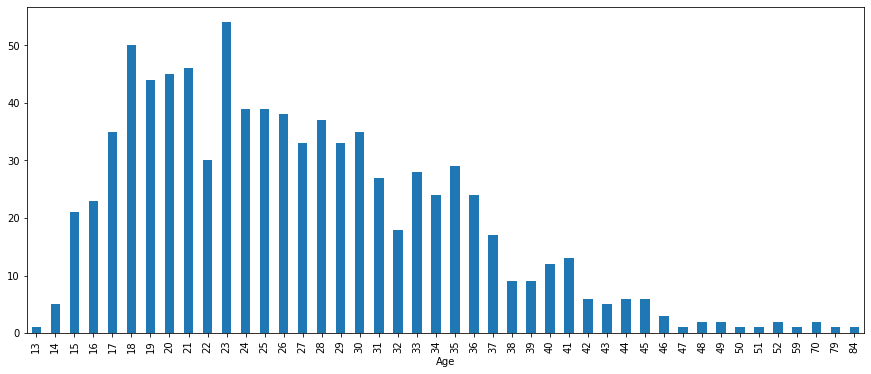

In [196]:
Cervicial_cancer.groupby('Age').size().plot(kind='bar', figsize=(15,6))

In [198]:
Cervicial_cancer['Hormonal Contraceptives (years)']=pd.to_numeric(Cervicial_cancer['Hormonal Contraceptives (years)'])

In [ ]:
Cervicial_cancer['Smokes (packs/year)']=pd.to_numeric(Cervicial_cancer['Smokes (packs/year)'])

cat_cols=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Hormonal Contraceptives',
         'IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
        'STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN',
         'Dx:HPV','Dx' ,'Hinselmann' ,'Schiller','Citology','Age']

Cont_cols=['Hormonal Contraceptives (years)','Smokes (packs/year)']

target=['Biopsy']

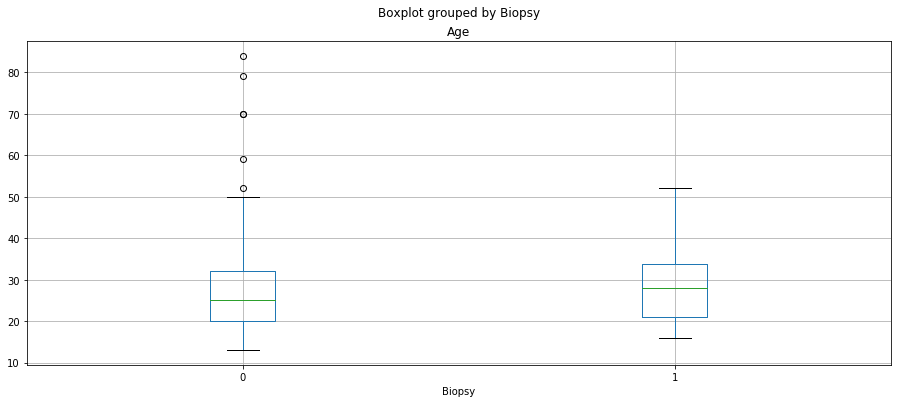

In [211]:
Cervicial_cancer.boxplot(column='Age', by='Biopsy', figsize=(15,6))

In [209]:
con1=Cervicial_cancer['Hormonal Contraceptives (years)']>17.5
con2=Cervicial_cancer['Biopsy']==1
Delete=Cervicial_cancer[con1&con2].index
Cervicial_cancer=Cervicial_cancer.drop(Delete)

In [217]:
Cervicial_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 857
Data columns (total 32 columns):
Age                                   855 non-null int64
Number of sexual partners             855 non-null int64
First sexual intercourse              855 non-null int64
Num of pregnancies                    855 non-null int64
Smokes                                855 non-null int64
Smokes (years)                        855 non-null float64
Smokes (packs/year)                   855 non-null float64
Hormonal Contraceptives               855 non-null int64
Hormonal Contraceptives (years)       855 non-null float64
IUD                                   855 non-null int64
IUD (years)                           855 non-null float64
STDs                                  855 non-null int64
STDs (number)                         855 non-null int64
STDs:condylomatosis                   855 non-null int64
STDs:vaginal condylomatosis           855 non-null int64
STDs:vulvo-perineal condylomatos

In [215]:
Object_Variable=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis',
                'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
                'STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV']

In [216]:
for i in Object_Variable:
    Cervicial_cancer[i]=pd.to_numeric(Cervicial_cancer[i])
    

In [220]:
Cervicial_cancer.nunique()

Age                                   43
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       38
IUD                                    2
IUD (years)                           25
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV                               2
STDs: Number of diagnosis              4
Dx:Cancer       

In [221]:
Cervicial_cancer_pkl=pd.to_pickle(Cervicial_cancer,'C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/Cervicial_cancer_pkl.pkl')

In [9]:
Cervicial_cancer_pl=pd.read_pickle('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/Cervicial_cancer_pkl.pkl')

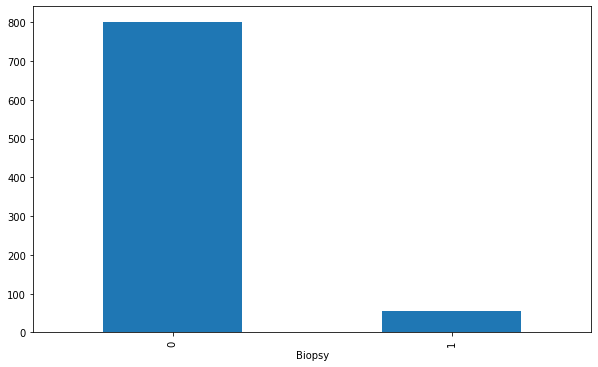

In [19]:
Cervicial_cancer_pl.groupby('Biopsy').size().plot(kind='bar',figsize=(10,6))

In [10]:
predictors=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Hormonal Contraceptives',
         'IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
        'STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN',
         'Dx:HPV','Dx' ,'Hinselmann' ,'Schiller','Citology','Age','Hormonal Contraceptives (years)']

target=['Biopsy']

In [11]:
X=Cervicial_cancer_pl[predictors].values
y=Cervicial_cancer_pl[target].values

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
from sklearn.linear_model import LogisticRegression

In [121]:
def Logistic_Regression(Data1,Data2):
    from sklearn.linear_model import LogisticRegression
    Test_size=[0.30,0.20,0.23,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,50,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgf=LogisticRegression(C=2,penalty='l2', solver='liblinear')
            predictModel=lgf.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,AvgAcuuracyonTrain)   
                                         

In [122]:
length,AVGAccuracy,AvgAcctrain=Logistic_Regression(X,y)
Sum_of_Acc=sum(AVGAccuracy)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
         


////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       240
           1       0.85      0.65      0.73        17

    accuracy                           0.97       257
   macro avg       0.91      0.82      0.86       257
weighted avg       0.97      0.97      0.97       257

[[238   2]
 [  6  11]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 50
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.64      0.39      0.48        18

    accuracy                           0.94       257
   macro avg       0.80      0.69      0.73       257
weighted avg       0.93      0.94      0.94       257

[[235   4]
 [ 11   7]]
Accuracy is  


[[179   6]
 [  6   6]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.23 and random state is 2567
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       183
           1       0.46      0.43      0.44        14

    accuracy                           0.92       197
   macro avg       0.71      0.70      0.70       197
weighted avg       0.92      0.92      0.92       197

[[176   7]
 [  8   6]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.23 and random state is 4789
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       183
           1       0.78      0.50      0.61        14

    accuracy                           0.95       197
   macro avg       0.87      0.74      0.79       197
weighted avg       0.95      0.95      0.95       197

[[181   2]
 [  7   7]]
Accuracy is  0.95
////////////

////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 32578
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       288
           1       0.57      0.65      0.60        20

    accuracy                           0.94       308
   macro avg       0.77      0.81      0.79       308
weighted avg       0.95      0.94      0.95       308

[[278  10]
 [  7  13]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 5
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       292
           1       0.47      0.56      0.51        16

    accuracy                           0.94       308
   macro avg       0.72      0.76      0.74       308
weighted avg       0.95      0.94      0.95       308

[[282  10]
 [  7   9]]
Accuracy is  0.95
////////////////////////////////////////////////////////

In [125]:
from sklearn import tree

In [126]:
def Decision_Tree_classification(Data1,Data2):
    Test_size=[0.30,0.20,0.23,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,50,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            dtree=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
            predictModeltree=dtree.fit(X_train,y_train)
            predictionsonTrain=predictModeltree.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictModeltree=dtree.fit(X_train,y_train)
            predictions=predictModeltree.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,predictModeltree,AvgAcuuracyonTrain)  

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       240
           1       0.83      0.59      0.69        17

    accuracy                           0.96       257
   macro avg       0.90      0.79      0.84       257
weighted avg       0.96      0.96      0.96       257

[[238   2]
 [  7  10]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 50
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       239
           1       0.40      0.11      0.17        18

    accuracy                           0.93       257
   macro avg       0.67      0.55      0.57       257
weighted avg       0.90      0.93      0.91       257

[[236   3]
 [ 16   2]]
Accuracy is  

Accuracy is  0.93
////////////////////////////////////////////////////////////
The Test_size 0.23 and random state is 4789
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       183
           1       0.83      0.71      0.77        14

    accuracy                           0.97       197
   macro avg       0.91      0.85      0.88       197
weighted avg       0.97      0.97      0.97       197

[[181   2]
 [  4  10]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.23 and random state is 8547
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       185
           1       0.71      0.83      0.77        12

    accuracy                           0.97       197
   macro avg       0.85      0.91      0.88       197
weighted avg       0.97      0.97      0.97       197

[[181   4]
 [  2  10]]
Accuracy is  0.97
////////////////////////////////////

Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 521457
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       334
           1       0.80      0.77      0.78        26

    accuracy                           0.97       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.97      0.97      0.97       360

[[329   5]
 [  6  20]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 50
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       337
           1       0.50      0.13      0.21        23

    accuracy                           0.94       360
   macro avg       0.72      0.56      0.59       360
weighted avg       0.92      0.94      0.92       360

[[334   3]
 [ 20   3]]
Accuracy is  0.92
////////////////////////////////////

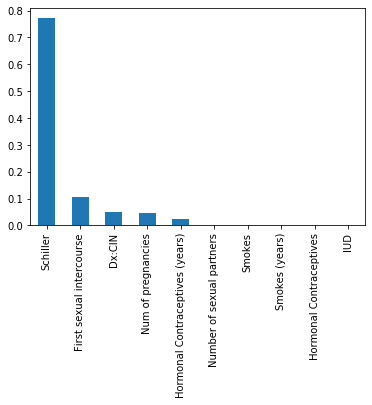

In [127]:
length,AVGAccuracy,predictModeltree,AvgAcctrain=Decision_Tree_classification(X,y)
Sum_of_Acc=sum(AVGAccuracy)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(predictModeltree.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
def RandomForest_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            RFC =RandomForestClassifier(max_depth=3, n_estimators=300,criterion='entropy')
            predictModel=RFC.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy, RFC,AvgAcuuracyonTrain) 

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       240
           1       1.00      0.06      0.11        17

    accuracy                           0.94       257
   macro avg       0.97      0.53      0.54       257
weighted avg       0.94      0.94      0.91       257

[[240   0]
 [ 16   1]]
Accuracy is  0.91
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       242
           1       0.60      0.40      0.48        15

    accuracy                           0.95       257
   macro avg       0.78      0.69      0.73       257
weighted avg       0.94      0.95      0.94       257

[[238   4]
 [  9   6]]
Accuracy is

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       171
           1       1.00      0.11      0.20         9

    accuracy                           0.96       180
   macro avg       0.98      0.56      0.59       180
weighted avg       0.96      0.96      0.94       180

[[171   0]
 [  8   1]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       168
           1       1.00      0.17      0.29        12

    accuracy                           0.94       180
   macro avg       0.97      0.58      0.63       180
weighted avg       0.95      0.94      0.93       180

[[168   0]
 [ 10   2]]
Accuracy is  0.93
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 5
              precision    recall  f1-score   support

 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       267
           1       0.67      0.25      0.36        16

    accuracy                           0.95       283
   macro avg       0.81      0.62      0.67       283
weighted avg       0.94      0.95      0.94       283

[[265   2]
 [ 12   4]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 2567
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       266
           1       0.50      0.18      0.26        17

    accuracy                           0.94       283
   macro avg       0.72      0.58      0.61       283
weighted avg       0.92      0.94      0.93       283

[[263   3]
 [ 14   3]]
Accuracy is  0.93
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 4789
              precision    recall  f1-score   support


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       329
           1       0.67      0.06      0.12        31

    accuracy                           0.92       360
   macro avg       0.79      0.53      0.54       360
weighted avg       0.90      0.92      0.88       360

[[328   1]
 [ 29   2]]
Accuracy is  0.88
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 8547
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       336
           1       1.00      0.08      0.15        24

    accuracy                           0.94       360
   macro avg       0.97      0.54      0.56       360
weighted avg       0.94      0.94      0.91       360

[[336   0]
 [ 22   2]]
Accuracy is  0.91
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 657
              precision    recall  f1-score   support



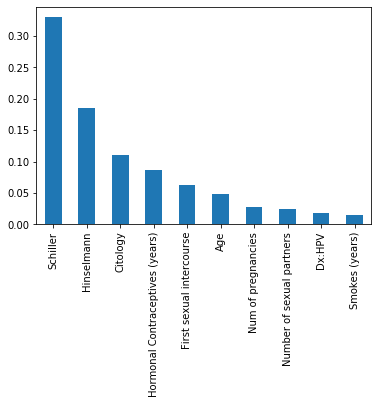

In [129]:
length,AVGAccuracy,RF,AvgAcctrain=RandomForest_classifier(X,y)
Sum_of_Acc=sum(AVGAccuracy)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(RF.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [131]:
def Adaboost_Classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            DTC=DecisionTreeClassifier(max_depth=5)
            ADA = AdaBoostClassifier(n_estimators=150, base_estimator=DTC ,learning_rate=0.01)
            predictModel=ADA.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,ADA,AvgAcuuracyonTrain) 

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       240
           1       0.89      0.47      0.62        17

    accuracy                           0.96       257
   macro avg       0.93      0.73      0.80       257
weighted avg       0.96      0.96      0.96       257

[[239   1]
 [  9   8]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       242
           1       0.58      0.73      0.65        15

    accuracy                           0.95       257
   macro avg       0.78      0.85      0.81       257
weighted avg       0.96      0.95      0.96       257

[[234   8]
 [  4  11]]
Accuracy is

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       168
           1       1.00      0.58      0.74        12

    accuracy                           0.97       180
   macro avg       0.99      0.79      0.86       180
weighted avg       0.97      0.97      0.97       180

[[168   0]
 [  5   7]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       171
           1       0.55      0.67      0.60         9

    accuracy                           0.96       180
   macro avg       0.76      0.82      0.79       180
weighted avg       0.96      0.96      0.96       180

[[166   5]
 [  3   6]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       264
           1       0.89      0.42      0.57        19

    accuracy                           0.96       283
   macro avg       0.92      0.71      0.77       283
weighted avg       0.96      0.96      0.95       283

[[263   1]
 [ 11   8]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       268
           1       0.52      0.87      0.65        15

    accuracy                           0.95       283
   macro avg       0.76      0.91      0.81       283
weighted avg       0.97      0.95      0.96       283

[[256  12]
 [  2  13]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       334
           1       0.73      0.42      0.54        26

    accuracy                           0.95       360
   macro avg       0.84      0.71      0.75       360
weighted avg       0.94      0.95      0.94       360

[[330   4]
 [ 15  11]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       341
           1       0.56      0.74      0.64        19

    accuracy                           0.96       360
   macro avg       0.77      0.85      0.81       360
weighted avg       0.96      0.96      0.96       360

[[330  11]
 [  5  14]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       0.90      0.47      0.62        19

    accuracy                           0.96       291
   macro avg       0.93      0.74      0.80       291
weighted avg       0.96      0.96      0.96       291

[[271   1]
 [ 10   9]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       276
           1       0.54      0.87      0.67        15

    accuracy                           0.96       291
   macro avg       0.77      0.91      0.82       291
weighted avg       0.97      0.96      0.96       291

[[265  11]
 [  2  13]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 32578
              precision    recall  f1-score   support

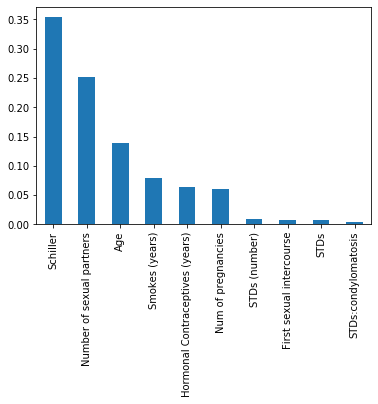

In [132]:
length,AVGAccuracy,AD,AvgAcctrain=Adaboost_Classifier(X,y)
Sum_of_Acc=sum(AVGAccuracy)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(AD.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [38]:
from xgboost import XGBClassifier

In [133]:
def Xgboost_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            xgb=XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')
            predictModel=xgb.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,xgb,AvgAcuuracyonTrain ) 
    

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       240
           1       0.80      0.71      0.75        17

    accuracy                           0.97       257
   macro avg       0.89      0.85      0.87       257
weighted avg       0.97      0.97      0.97       257

[[237   3]
 [  5  12]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       242
           1       0.56      0.67      0.61        15

    accuracy                           0.95       257
   macro avg       0.77      0.82      0.79       257
weighted avg       0.95      0.95      0.95       257

[[234   8]
 [  5  10]]
Accuracy is

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       0.82      0.75      0.78        12

    accuracy                           0.97       180
   macro avg       0.90      0.87      0.88       180
weighted avg       0.97      0.97      0.97       180

[[166   2]
 [  3   9]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       171
           1       0.60      0.67      0.63         9

    accuracy                           0.96       180
   macro avg       0.79      0.82      0.81       180
weighted avg       0.96      0.96      0.96       180

[[167   4]
 [  3   6]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.81      0.68      0.74        19

    accuracy                           0.97       283
   macro avg       0.90      0.84      0.86       283
weighted avg       0.97      0.97      0.97       283

[[261   3]
 [  6  13]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       268
           1       0.57      0.80      0.67        15

    accuracy                           0.96       283
   macro avg       0.78      0.88      0.82       283
weighted avg       0.97      0.96      0.96       283

[[259   9]
 [  3  12]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       334
           1       0.79      0.73      0.76        26

    accuracy                           0.97       360
   macro avg       0.89      0.86      0.87       360
weighted avg       0.97      0.97      0.97       360

[[329   5]
 [  7  19]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       341
           1       0.56      0.74      0.64        19

    accuracy                           0.96       360
   macro avg       0.77      0.85      0.81       360
weighted avg       0.96      0.96      0.96       360

[[330  11]
 [  5  14]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       272
           1       0.81      0.68      0.74        19

    accuracy                           0.97       291
   macro avg       0.90      0.84      0.86       291
weighted avg       0.97      0.97      0.97       291

[[269   3]
 [  6  13]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       276
           1       0.57      0.80      0.67        15

    accuracy                           0.96       291
   macro avg       0.78      0.88      0.82       291
weighted avg       0.97      0.96      0.96       291

[[267   9]
 [  3  12]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 32578
              precision    recall  f1-score   support

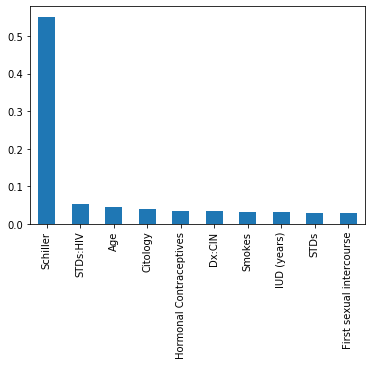

In [134]:
length,AvgACC,XG,AvgAcctrain=Xgboost_classifier(X,y)
Sum_of_Acc=sum(AvgACC)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(XG.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
def GradientBoostClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GBC=GradientBoostingClassifier(max_depth=5,learning_rate=0.01,n_estimators=300)
            predictModel=GBC.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,GBC,AvgAcuuracyonTrain) 

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       240
           1       0.83      0.59      0.69        17

    accuracy                           0.96       257
   macro avg       0.90      0.79      0.84       257
weighted avg       0.96      0.96      0.96       257

[[238   2]
 [  7  10]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.65      0.73      0.69        15

    accuracy                           0.96       257
   macro avg       0.82      0.85      0.83       257
weighted avg       0.96      0.96      0.96       257

[[236   6]
 [  4  11]]
Accuracy is

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       168
           1       0.88      0.58      0.70        12

    accuracy                           0.97       180
   macro avg       0.92      0.79      0.84       180
weighted avg       0.96      0.97      0.96       180

[[167   1]
 [  5   7]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       171
           1       0.70      0.78      0.74         9

    accuracy                           0.97       180
   macro avg       0.84      0.88      0.86       180
weighted avg       0.97      0.97      0.97       180

[[168   3]
 [  2   7]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       264
           1       0.91      0.53      0.67        19

    accuracy                           0.96       283
   macro avg       0.94      0.76      0.82       283
weighted avg       0.96      0.96      0.96       283

[[263   1]
 [  9  10]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       268
           1       0.61      0.73      0.67        15

    accuracy                           0.96       283
   macro avg       0.80      0.85      0.82       283
weighted avg       0.97      0.96      0.96       283

[[261   7]
 [  4  11]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       334
           1       0.89      0.65      0.76        26

    accuracy                           0.97       360
   macro avg       0.93      0.82      0.87       360
weighted avg       0.97      0.97      0.97       360

[[332   2]
 [  9  17]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       341
           1       0.61      0.74      0.67        19

    accuracy                           0.96       360
   macro avg       0.80      0.86      0.82       360
weighted avg       0.97      0.96      0.96       360

[[332   9]
 [  5  14]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 32578
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       272
           1       0.91      0.53      0.67        19

    accuracy                           0.97       291
   macro avg       0.94      0.76      0.82       291
weighted avg       0.96      0.97      0.96       291

[[271   1]
 [  9  10]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       276
           1       0.61      0.73      0.67        15

    accuracy                           0.96       291
   macro avg       0.80      0.85      0.82       291
weighted avg       0.97      0.96      0.96       291

[[269   7]
 [  4  11]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 32578
              precision    recall  f1-score   support

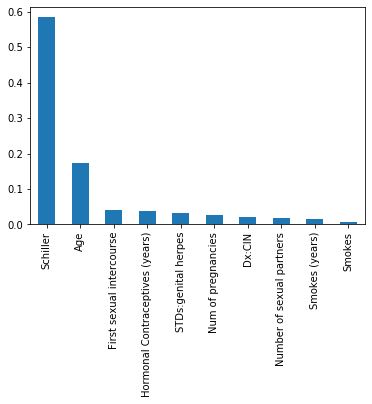

In [138]:
length,AverageAcc,GB,AvgAcctrain=GradientBoostClassifier(X,y)
Sum_of_Acc=sum(AverageAcc)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(GB.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')

In [47]:
from lightgbm import LGBMClassifier

In [139]:
def lightbgmclassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgb=LGBMClassifier(max_depth=-1,learning_rate=0.1,n_estimators=300)
            predictModel=lgb.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,lgb,AvgAcuuracyonTrain)             
                       

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       240
           1       1.00      0.41      0.58        17

    accuracy                           0.96       257
   macro avg       0.98      0.71      0.78       257
weighted avg       0.96      0.96      0.95       257

[[240   0]
 [ 10   7]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       242
           1       0.56      0.67      0.61        15

    accuracy                           0.95       257
   macro avg       0.77      0.82      0.79       257
weighted avg       0.95      0.95      0.95       257

[[234   8]
 [  5  10]]
Accuracy is


[[167   1]
 [  7   5]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       171
           1       0.73      0.89      0.80         9

    accuracy                           0.98       180
   macro avg       0.86      0.94      0.89       180
weighted avg       0.98      0.98      0.98       180

[[168   3]
 [  1   8]]
Accuracy is  0.98
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       168
           1       0.75      0.50      0.60        12

    accuracy                           0.96       180
   macro avg       0.86      0.74      0.79       180
weighted avg       0.95      0.96      0.95       180

[[166   2]
 [  6   6]]
Accuracy is  0.95
///////////

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       268
           1       0.53      0.67      0.59        15

    accuracy                           0.95       283
   macro avg       0.75      0.82      0.78       283
weighted avg       0.96      0.95      0.95       283

[[259   9]
 [  5  10]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 32578
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       263
           1       0.69      0.55      0.61        20

    accuracy                           0.95       283
   macro avg       0.83      0.77      0.79       283
weighted avg       0.95      0.95      0.95       283

[[258   5]
 [  9  11]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 5
              precision    recall  f1-score   support

 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       341
           1       0.57      0.63      0.60        19

    accuracy                           0.96       360
   macro avg       0.78      0.80      0.79       360
weighted avg       0.96      0.96      0.96       360

[[332   9]
 [  7  12]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 32578
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       338
           1       0.72      0.59      0.65        22

    accuracy                           0.96       360
   macro avg       0.85      0.79      0.81       360
weighted avg       0.96      0.96      0.96       360

[[333   5]
 [  9  13]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 5
              precision    recall  f1-score   support

 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       271
           1       0.71      0.60      0.65        20

    accuracy                           0.96       291
   macro avg       0.84      0.79      0.81       291
weighted avg       0.95      0.96      0.95       291

[[266   5]
 [  8  12]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 5
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       275
           1       0.53      0.62      0.57        16

    accuracy                           0.95       291
   macro avg       0.75      0.80      0.77       291
weighted avg       0.95      0.95      0.95       291

[[266   9]
 [  6  10]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 2567
              precision    recall  f1-score   support

  

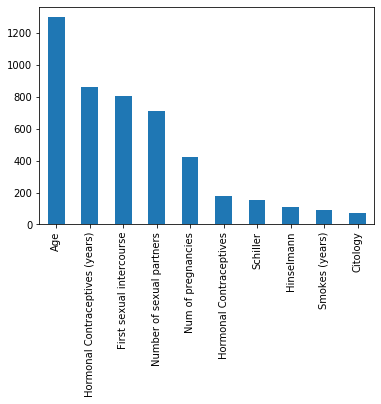

In [141]:
length,AverageAcc,LGB,AvgAcctrain=lightbgmclassifier(X,y)
Sum_of_Acc=sum(AverageAcc)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)
feautreimportance=pd.Series(LGB.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='bar')


In [58]:
from sklearn import svm

In [142]:
def svmclassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            SVC=svm.SVC(C=5, kernel='rbf', gamma=0.01)
            predictModel=SVC.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,SVC,AvgAcuuracyonTrain)             
                       

In [143]:
length,AverageAcc,Svc,AvgAcuuracyonTrain=svmclassifier(X,y)
Sum_of_Acc=sum(AverageAcc)
Sum_of_Acc_Train=sum(AvgAcctrain)
print("The Average of All acuracies",(Sum_of_Acc/length))
Avg_var=(100-((Sum_of_Acc/length)*100))
print("The Average variance on Test data",Avg_var)
Avg_Bias=(100-((Sum_of_Acc_Train/length)*100))
print("The Average Bias on Train data",Avg_Bias)

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       251
           1       0.33      0.17      0.22         6

    accuracy                           0.97       257
   macro avg       0.66      0.58      0.60       257
weighted avg       0.97      0.97      0.97       257

[[249   2]
 [  5   1]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       242
           1       0.40      0.27      0.32        15

    accuracy                           0.93       257
   macro avg       0.68      0.62      0.64       257
weighted avg       0.92      0.93      0.93       257

[[236   6]
 [ 11   4]]
Accuracy is


[[164   2]
 [ 10   4]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 4789
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       166
           1       0.50      0.07      0.12        14

    accuracy                           0.92       180
   macro avg       0.71      0.53      0.54       180
weighted avg       0.89      0.92      0.89       180

[[165   1]
 [ 13   1]]
Accuracy is  0.89
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 8547
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       168
           1       0.75      0.25      0.38        12

    accuracy                           0.94       180
   macro avg       0.85      0.62      0.67       180
weighted avg       0.94      0.94      0.93       180

[[167   1]
 [  9   3]]
Accuracy is  0.93
////////////

[[263   1]
 [ 16   3]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 525478
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       296
           1       0.33      0.17      0.22        12

    accuracy                           0.95       308
   macro avg       0.65      0.58      0.60       308
weighted avg       0.94      0.95      0.95       308

[[292   4]
 [ 10   2]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 7505
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       290
           1       0.33      0.17      0.22        18

    accuracy                           0.93       308
   macro avg       0.64      0.57      0.59       308
weighted avg       0.91      0.93      0.92       308

[[284   6]
 [ 15   3]]
Accuracy is  0.92
///////////

[[334   0]
 [ 26   0]]
Accuracy is  0.89
////////////////////////////////////////////////////////////
The Test_size 0.45 and random state is 525478
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       369
           1       0.38      0.19      0.25        16

    accuracy                           0.95       385
   macro avg       0.67      0.59      0.61       385
weighted avg       0.94      0.95      0.95       385

[[364   5]
 [ 13   3]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.45 and random state is 7505
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       363
           1       0.38      0.23      0.29        22

    accuracy                           0.94       385
   macro avg       0.67      0.60      0.63       385
weighted avg       0.92      0.94      0.93       385

[[355   8]
 [ 17   5]]
Accuracy is  0.93
///////////

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [144]:
def NaiveBayesClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    AvgAcuuracyonTrain=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GNB=GaussianNB(var_smoothing=0.001)
            predictModel=GNB.fit(X_train,y_train)
            predictionsonTrain=predictModel.predict(X_train)
            F1scoreTrain=metrics.classification_report(y_train, predictionsonTrain).split()[-2]
            F1Train=float(F1scoreTrain)
            AvgAcuuracyonTrain.append(F1Train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,GNB)        

In [71]:
length,AverageAcc,GNB=NaiveBayesClassifier(X,y)
Sum_of_Acc=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       251
           1       0.25      0.33      0.29         6

    accuracy                           0.96       257
   macro avg       0.62      0.65      0.63       257
weighted avg       0.97      0.96      0.96       257

[[245   6]
 [  4   2]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       242
           1       0.43      0.80      0.56        15

    accuracy                           0.93       257
   macro avg       0.71      0.87      0.76       257
weighted avg       0.95      0.93      0.94       257

[[226  16]
 [  3  12]]
Accuracy is

[[172   4]
 [  2   2]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 7505
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       171
           1       0.30      0.67      0.41         9

    accuracy                           0.91       180
   macro avg       0.64      0.79      0.68       180
weighted avg       0.95      0.91      0.92       180

[[157  14]
 [  3   6]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.21 and random state is 32578
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       168
           1       0.47      0.58      0.52        12

    accuracy                           0.93       180
   macro avg       0.72      0.77      0.74       180
weighted avg       0.94      0.93      0.93       180

[[160   8]
 [  5   7]]
Accuracy is  0.93
////////////

The Test_size 0.36 and random state is 42
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       287
           1       0.50      0.62      0.55        21

    accuracy                           0.93       308
   macro avg       0.74      0.79      0.76       308
weighted avg       0.94      0.93      0.94       308

[[274  13]
 [  8  13]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 525478
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       347
           1       0.25      0.46      0.32        13

    accuracy                           0.93       360
   macro avg       0.61      0.70      0.64       360
weighted avg       0.95      0.93      0.94       360

[[329  18]
 [  7   6]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 7505
          

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       280
           1       0.26      0.55      0.35        11

    accuracy                           0.92       291
   macro avg       0.62      0.74      0.66       291
weighted avg       0.95      0.92      0.94       291

[[263  17]
 [  5   6]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       276
           1       0.36      0.80      0.50        15

    accuracy                           0.92       291
   macro avg       0.68      0.86      0.73       291
weighted avg       0.96      0.92      0.93       291

[[255  21]
 [  3  12]]
Accuracy is  0.93
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 32578
              precision    recall  f1-score   support

In [83]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  VotingClassifier

In [86]:
def Voting_Classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34,0.48]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42,74568]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            xgb=XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=300, objective='binary:logistic', booster='gbtree')
            dtree=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
            GBC=GradientBoostingClassifier(max_depth=5,learning_rate=0.01,n_estimators=300)
            Predict1=xgb.fit(X_train,y_train)
            Predict2=dtree.fit(X_train,y_train)
            Predict3=GBC.fit(X_train,y_train)
            voting_clf =VotingClassifier(estimators=[('Gradient',Predict3), ('DecisionTree',Predict2),('XGboost',Predict1)], voting='hard')
            PredictModel=voting_clf.fit(X_train,y_train)
            predictions=PredictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)    

In [87]:
length,AverageAcc=Voting_Classifier(X,y)
Sum_of_Acc=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       251
           1       0.40      0.67      0.50         6

    accuracy                           0.97       257
   macro avg       0.70      0.82      0.74       257
weighted avg       0.98      0.97      0.97       257

[[245   6]
 [  2   4]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       242
           1       0.65      0.87      0.74        15

    accuracy                           0.96       257
   macro avg       0.82      0.92      0.86       257
weighted avg       0.97      0.96      0.97       257

[[235   7]
 [  2  13]]
Accuracy is

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       195
           1       0.73      0.58      0.65        19

    accuracy                           0.94       214
   macro avg       0.85      0.78      0.81       214
weighted avg       0.94      0.94      0.94       214

[[191   4]
 [  8  11]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 42
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       200
           1       0.59      0.71      0.65        14

    accuracy                           0.95       214
   macro avg       0.78      0.84      0.81       214
weighted avg       0.95      0.95      0.95       214

[[193   7]
 [  4  10]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 74568
              precision    recall  f1-score   support



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.90      0.64      0.75        14

    accuracy                           0.97       189
   macro avg       0.94      0.82      0.87       189
weighted avg       0.97      0.97      0.97       189

[[174   1]
 [  5   9]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.22 and random state is 8547
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       177
           1       0.67      0.67      0.67        12

    accuracy                           0.96       189
   macro avg       0.82      0.82      0.82       189
weighted avg       0.96      0.96      0.96       189

[[173   4]
 [  4   8]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.22 and random state is 657
              precision    recall  f1-score   support



              precision    recall  f1-score   support

           0       0.97      0.98      0.97       288
           1       0.62      0.50      0.56        20

    accuracy                           0.95       308
   macro avg       0.80      0.74      0.76       308
weighted avg       0.94      0.95      0.95       308

[[282   6]
 [ 10  10]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 2567
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       285
           1       0.48      0.43      0.45        23

    accuracy                           0.92       308
   macro avg       0.72      0.70      0.71       308
weighted avg       0.92      0.92      0.92       308

[[274  11]
 [ 13  10]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.36 and random state is 4789
              precision    recall  f1-score   support


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       363
           1       0.62      0.73      0.67        22

    accuracy                           0.96       385
   macro avg       0.80      0.85      0.82       385
weighted avg       0.96      0.96      0.96       385

[[353  10]
 [  6  16]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.45 and random state is 32578
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       360
           1       0.56      0.60      0.58        25

    accuracy                           0.94       385
   macro avg       0.76      0.78      0.77       385
weighted avg       0.95      0.94      0.94       385

[[348  12]
 [ 10  15]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.45 and random state is 3257
              precision    recall  f1-score   support

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       273
           1       0.68      0.72      0.70        18

    accuracy                           0.96       291
   macro avg       0.83      0.85      0.84       291
weighted avg       0.96      0.96      0.96       291

[[267   6]
 [  5  13]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.48 and random state is 525478
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       394
           1       0.59      0.59      0.59        17

    accuracy                           0.97       411
   macro avg       0.79      0.79      0.79       411
weighted avg       0.97      0.97      0.97       411

[[387   7]
 [  7  10]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.48 and random state is 7505
              precision    recall  f1-score   suppor

In [101]:
from catboost import CatBoostClassifier

In [114]:
def CatBoostingClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            Cat=CatBoostClassifier(learning_rate=0.2)
            predictModel=Cat.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)    

In [115]:
length,AverageAcc=CatBoostingClassifier(X,y)
Sum_of_Acc=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
0:	learn: 0.3878116	total: 2.09ms	remaining: 2.09s
1:	learn: 0.2506970	total: 3.98ms	remaining: 1.99s
2:	learn: 0.1823881	total: 5.77ms	remaining: 1.92s
3:	learn: 0.1503433	total: 7.57ms	remaining: 1.89s
4:	learn: 0.1378851	total: 8.58ms	remaining: 1.71s
5:	learn: 0.1175081	total: 10.4ms	remaining: 1.72s
6:	learn: 0.1138447	total: 12.2ms	remaining: 1.74s
7:	learn: 0.1053465	total: 14.1ms	remaining: 1.75s
8:	learn: 0.0958287	total: 15.9ms	remaining: 1.75s
9:	learn: 0.0944802	total: 17.8ms	remaining: 1.76s
10:	learn: 0.0884441	total: 19.5ms	remaining: 1.76s
11:	learn: 0.0872610	total: 21.3ms	remaining: 1.76s
12:	learn: 0.0859393	total: 23.1ms	remaining: 1.76s
13:	learn: 0.0828446	total: 25ms	remaining: 1.76s
14:	learn: 0.0805893	total: 26.9ms	remaining: 1.76s
15:	learn: 0.0795952	total: 28.8ms	remaining: 1.77s
16:	learn: 0.

218:	learn: 0.0050678	total: 389ms	remaining: 1.39s
219:	learn: 0.0050661	total: 392ms	remaining: 1.39s
220:	learn: 0.0050049	total: 394ms	remaining: 1.39s
221:	learn: 0.0049325	total: 396ms	remaining: 1.39s
222:	learn: 0.0048754	total: 398ms	remaining: 1.39s
223:	learn: 0.0048576	total: 400ms	remaining: 1.39s
224:	learn: 0.0048559	total: 402ms	remaining: 1.39s
225:	learn: 0.0048526	total: 405ms	remaining: 1.39s
226:	learn: 0.0048498	total: 406ms	remaining: 1.38s
227:	learn: 0.0048482	total: 408ms	remaining: 1.38s
228:	learn: 0.0048466	total: 410ms	remaining: 1.38s
229:	learn: 0.0047815	total: 413ms	remaining: 1.38s
230:	learn: 0.0047238	total: 414ms	remaining: 1.38s
231:	learn: 0.0046378	total: 417ms	remaining: 1.38s
232:	learn: 0.0045886	total: 419ms	remaining: 1.38s
233:	learn: 0.0044968	total: 421ms	remaining: 1.38s
234:	learn: 0.0044785	total: 422ms	remaining: 1.38s
235:	learn: 0.0044761	total: 424ms	remaining: 1.37s
236:	learn: 0.0044210	total: 426ms	remaining: 1.37s
237:	learn: 

401:	learn: 0.0026562	total: 702ms	remaining: 1.04s
402:	learn: 0.0026561	total: 704ms	remaining: 1.04s
403:	learn: 0.0026551	total: 706ms	remaining: 1.04s
404:	learn: 0.0026551	total: 707ms	remaining: 1.04s
405:	learn: 0.0026544	total: 710ms	remaining: 1.04s
406:	learn: 0.0026520	total: 712ms	remaining: 1.04s
407:	learn: 0.0026519	total: 714ms	remaining: 1.03s
408:	learn: 0.0026518	total: 716ms	remaining: 1.03s
409:	learn: 0.0026272	total: 718ms	remaining: 1.03s
410:	learn: 0.0025979	total: 721ms	remaining: 1.03s
411:	learn: 0.0025970	total: 723ms	remaining: 1.03s
412:	learn: 0.0025970	total: 727ms	remaining: 1.03s
413:	learn: 0.0025970	total: 729ms	remaining: 1.03s
414:	learn: 0.0025970	total: 731ms	remaining: 1.03s
415:	learn: 0.0025963	total: 734ms	remaining: 1.03s
416:	learn: 0.0025956	total: 738ms	remaining: 1.03s
417:	learn: 0.0025956	total: 740ms	remaining: 1.03s
418:	learn: 0.0025955	total: 741ms	remaining: 1.03s
419:	learn: 0.0025946	total: 743ms	remaining: 1.02s
420:	learn: 

624:	learn: 0.0021269	total: 1.17s	remaining: 700ms
625:	learn: 0.0021267	total: 1.17s	remaining: 698ms
626:	learn: 0.0021266	total: 1.17s	remaining: 696ms
627:	learn: 0.0021265	total: 1.17s	remaining: 694ms
628:	learn: 0.0021265	total: 1.17s	remaining: 692ms
629:	learn: 0.0021264	total: 1.18s	remaining: 690ms
630:	learn: 0.0021264	total: 1.18s	remaining: 688ms
631:	learn: 0.0021264	total: 1.18s	remaining: 687ms
632:	learn: 0.0021261	total: 1.18s	remaining: 685ms
633:	learn: 0.0021261	total: 1.18s	remaining: 683ms
634:	learn: 0.0021260	total: 1.18s	remaining: 681ms
635:	learn: 0.0021260	total: 1.19s	remaining: 679ms
636:	learn: 0.0021258	total: 1.19s	remaining: 677ms
637:	learn: 0.0021255	total: 1.19s	remaining: 675ms
638:	learn: 0.0021255	total: 1.19s	remaining: 673ms
639:	learn: 0.0021255	total: 1.19s	remaining: 671ms
640:	learn: 0.0021255	total: 1.19s	remaining: 669ms
641:	learn: 0.0021255	total: 1.2s	remaining: 667ms
642:	learn: 0.0021255	total: 1.2s	remaining: 665ms
643:	learn: 0.

808:	learn: 0.0019812	total: 1.47s	remaining: 347ms
809:	learn: 0.0019812	total: 1.47s	remaining: 346ms
810:	learn: 0.0019812	total: 1.47s	remaining: 344ms
811:	learn: 0.0019811	total: 1.48s	remaining: 342ms
812:	learn: 0.0019811	total: 1.48s	remaining: 340ms
813:	learn: 0.0019811	total: 1.48s	remaining: 338ms
814:	learn: 0.0019811	total: 1.48s	remaining: 336ms
815:	learn: 0.0019811	total: 1.48s	remaining: 335ms
816:	learn: 0.0019808	total: 1.49s	remaining: 333ms
817:	learn: 0.0019808	total: 1.49s	remaining: 331ms
818:	learn: 0.0019808	total: 1.49s	remaining: 329ms
819:	learn: 0.0019808	total: 1.49s	remaining: 328ms
820:	learn: 0.0019808	total: 1.49s	remaining: 326ms
821:	learn: 0.0019808	total: 1.5s	remaining: 324ms
822:	learn: 0.0019808	total: 1.5s	remaining: 322ms
823:	learn: 0.0019807	total: 1.5s	remaining: 320ms
824:	learn: 0.0019807	total: 1.5s	remaining: 318ms
825:	learn: 0.0019806	total: 1.5s	remaining: 316ms
826:	learn: 0.0019806	total: 1.5s	remaining: 315ms
827:	learn: 0.0019

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       251
           1       0.50      0.83      0.62         6

    accuracy                           0.98       257
   macro avg       0.75      0.91      0.81       257
weighted avg       0.98      0.98      0.98       257

[[246   5]
 [  1   5]]
Accuracy is  0.98
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
0:	learn: 0.3762328	total: 9.97ms	remaining: 9.96s
1:	learn: 0.2419280	total: 19ms	remaining: 9.49s
2:	learn: 0.1533757	total: 28.9ms	remaining: 9.6s
3:	learn: 0.1320441	total: 33.3ms	remaining: 8.29s
4:	learn: 0.1156029	total: 36.7ms	remaining: 7.31s
5:	learn: 0.0989051	total: 40.4ms	remaining: 6.68s
6:	learn: 0.0939341	total: 43.5ms	remaining: 6.17s
7:	learn: 0.0841227	total: 46.6ms	remaining: 5.78s
8:	learn: 0.0783681	total: 49.7ms	remaining: 5.47s
9:	learn: 0.0751434	total: 52.8ms	remaining: 5.23s
10:	learn: 0.0743361	

207:	learn: 0.0029781	total: 486ms	remaining: 1.85s
208:	learn: 0.0029759	total: 488ms	remaining: 1.84s
209:	learn: 0.0029696	total: 490ms	remaining: 1.84s
210:	learn: 0.0029313	total: 493ms	remaining: 1.84s
211:	learn: 0.0029250	total: 496ms	remaining: 1.84s
212:	learn: 0.0029228	total: 498ms	remaining: 1.84s
213:	learn: 0.0029206	total: 501ms	remaining: 1.84s
214:	learn: 0.0028639	total: 504ms	remaining: 1.84s
215:	learn: 0.0028311	total: 507ms	remaining: 1.84s
216:	learn: 0.0028001	total: 509ms	remaining: 1.84s
217:	learn: 0.0027813	total: 513ms	remaining: 1.84s
218:	learn: 0.0027502	total: 515ms	remaining: 1.84s
219:	learn: 0.0027221	total: 519ms	remaining: 1.84s
220:	learn: 0.0026966	total: 521ms	remaining: 1.84s
221:	learn: 0.0026604	total: 523ms	remaining: 1.83s
222:	learn: 0.0026318	total: 525ms	remaining: 1.83s
223:	learn: 0.0026083	total: 527ms	remaining: 1.82s
224:	learn: 0.0025927	total: 529ms	remaining: 1.82s
225:	learn: 0.0025879	total: 531ms	remaining: 1.82s
226:	learn: 

406:	learn: 0.0013316	total: 916ms	remaining: 1.33s
407:	learn: 0.0013224	total: 919ms	remaining: 1.33s
408:	learn: 0.0013118	total: 922ms	remaining: 1.33s
409:	learn: 0.0013097	total: 924ms	remaining: 1.33s
410:	learn: 0.0013040	total: 927ms	remaining: 1.33s
411:	learn: 0.0012989	total: 929ms	remaining: 1.33s
412:	learn: 0.0012940	total: 932ms	remaining: 1.32s
413:	learn: 0.0012887	total: 935ms	remaining: 1.32s
414:	learn: 0.0012848	total: 937ms	remaining: 1.32s
415:	learn: 0.0012755	total: 939ms	remaining: 1.32s
416:	learn: 0.0012674	total: 941ms	remaining: 1.31s
417:	learn: 0.0012630	total: 943ms	remaining: 1.31s
418:	learn: 0.0012556	total: 945ms	remaining: 1.31s
419:	learn: 0.0012488	total: 948ms	remaining: 1.31s
420:	learn: 0.0012427	total: 950ms	remaining: 1.31s
421:	learn: 0.0012388	total: 952ms	remaining: 1.3s
422:	learn: 0.0012326	total: 953ms	remaining: 1.3s
423:	learn: 0.0012275	total: 955ms	remaining: 1.3s
424:	learn: 0.0012198	total: 957ms	remaining: 1.29s
425:	learn: 0.0

647:	learn: 0.0009278	total: 1.4s	remaining: 759ms
648:	learn: 0.0009278	total: 1.4s	remaining: 757ms
649:	learn: 0.0009278	total: 1.4s	remaining: 755ms
650:	learn: 0.0009278	total: 1.4s	remaining: 753ms
651:	learn: 0.0009277	total: 1.41s	remaining: 751ms
652:	learn: 0.0009277	total: 1.41s	remaining: 749ms
653:	learn: 0.0009277	total: 1.41s	remaining: 746ms
654:	learn: 0.0009277	total: 1.41s	remaining: 745ms
655:	learn: 0.0009277	total: 1.42s	remaining: 742ms
656:	learn: 0.0009277	total: 1.42s	remaining: 741ms
657:	learn: 0.0009277	total: 1.42s	remaining: 738ms
658:	learn: 0.0009277	total: 1.42s	remaining: 736ms
659:	learn: 0.0009277	total: 1.42s	remaining: 733ms
660:	learn: 0.0009277	total: 1.43s	remaining: 731ms
661:	learn: 0.0009275	total: 1.43s	remaining: 729ms
662:	learn: 0.0009269	total: 1.43s	remaining: 727ms
663:	learn: 0.0009263	total: 1.43s	remaining: 724ms
664:	learn: 0.0009263	total: 1.43s	remaining: 722ms
665:	learn: 0.0009260	total: 1.43s	remaining: 720ms
666:	learn: 0.00

815:	learn: 0.0009082	total: 1.71s	remaining: 385ms
816:	learn: 0.0009082	total: 1.71s	remaining: 383ms
817:	learn: 0.0009082	total: 1.71s	remaining: 381ms
818:	learn: 0.0009082	total: 1.71s	remaining: 378ms
819:	learn: 0.0009082	total: 1.71s	remaining: 376ms
820:	learn: 0.0009082	total: 1.72s	remaining: 374ms
821:	learn: 0.0009082	total: 1.72s	remaining: 372ms
822:	learn: 0.0009082	total: 1.72s	remaining: 370ms
823:	learn: 0.0009082	total: 1.72s	remaining: 368ms
824:	learn: 0.0009082	total: 1.73s	remaining: 366ms
825:	learn: 0.0009082	total: 1.73s	remaining: 364ms
826:	learn: 0.0009082	total: 1.73s	remaining: 362ms
827:	learn: 0.0009082	total: 1.73s	remaining: 360ms
828:	learn: 0.0009082	total: 1.73s	remaining: 358ms
829:	learn: 0.0009082	total: 1.74s	remaining: 355ms
830:	learn: 0.0009082	total: 1.74s	remaining: 353ms
831:	learn: 0.0009082	total: 1.74s	remaining: 351ms
832:	learn: 0.0009082	total: 1.74s	remaining: 349ms
833:	learn: 0.0009082	total: 1.74s	remaining: 347ms
834:	learn: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       242
           1       0.60      0.80      0.69        15

    accuracy                           0.96       257
   macro avg       0.79      0.88      0.83       257
weighted avg       0.96      0.96      0.96       257

[[234   8]
 [  3  12]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 32578
0:	learn: 0.3431830	total: 2ms	remaining: 1.99s
1:	learn: 0.1820486	total: 4.12ms	remaining: 2.05s
2:	learn: 0.1448174	total: 6.29ms	remaining: 2.09s
3:	learn: 0.1085285	total: 10.1ms	remaining: 2.51s
4:	learn: 0.0826129	total: 13.8ms	remaining: 2.74s
5:	learn: 0.0687740	total: 16.1ms	remaining: 2.67s
6:	learn: 0.0657359	total: 18.9ms	remaining: 2.67s
7:	learn: 0.0561293	total: 22.6ms	remaining: 2.8s
8:	learn: 0.0513584	total: 25.9ms	remaining: 2.85s
9:	learn: 0.0481525	total: 28.6ms	remaining: 2.83s
10:	learn: 0.0466904	

165:	learn: 0.0021567	total: 421ms	remaining: 2.11s
166:	learn: 0.0021013	total: 423ms	remaining: 2.11s
167:	learn: 0.0020677	total: 426ms	remaining: 2.11s
168:	learn: 0.0020654	total: 429ms	remaining: 2.11s
169:	learn: 0.0020441	total: 431ms	remaining: 2.1s
170:	learn: 0.0020293	total: 433ms	remaining: 2.1s
171:	learn: 0.0020187	total: 436ms	remaining: 2.1s
172:	learn: 0.0020171	total: 439ms	remaining: 2.1s
173:	learn: 0.0020118	total: 442ms	remaining: 2.1s
174:	learn: 0.0020001	total: 445ms	remaining: 2.1s
175:	learn: 0.0019549	total: 449ms	remaining: 2.1s
176:	learn: 0.0019361	total: 452ms	remaining: 2.1s
177:	learn: 0.0018962	total: 455ms	remaining: 2.1s
178:	learn: 0.0018885	total: 457ms	remaining: 2.09s
179:	learn: 0.0018846	total: 459ms	remaining: 2.09s
180:	learn: 0.0018822	total: 462ms	remaining: 2.09s
181:	learn: 0.0018801	total: 465ms	remaining: 2.09s
182:	learn: 0.0018777	total: 468ms	remaining: 2.09s
183:	learn: 0.0018669	total: 470ms	remaining: 2.08s
184:	learn: 0.0018555

341:	learn: 0.0009758	total: 863ms	remaining: 1.66s
342:	learn: 0.0009713	total: 867ms	remaining: 1.66s
343:	learn: 0.0009624	total: 870ms	remaining: 1.66s
344:	learn: 0.0009597	total: 873ms	remaining: 1.66s
345:	learn: 0.0009592	total: 876ms	remaining: 1.66s
346:	learn: 0.0009579	total: 879ms	remaining: 1.65s
347:	learn: 0.0009575	total: 881ms	remaining: 1.65s
348:	learn: 0.0009573	total: 885ms	remaining: 1.65s
349:	learn: 0.0009569	total: 888ms	remaining: 1.65s
350:	learn: 0.0009539	total: 891ms	remaining: 1.65s
351:	learn: 0.0009481	total: 894ms	remaining: 1.65s
352:	learn: 0.0009479	total: 896ms	remaining: 1.64s
353:	learn: 0.0009472	total: 899ms	remaining: 1.64s
354:	learn: 0.0009470	total: 901ms	remaining: 1.64s
355:	learn: 0.0009465	total: 904ms	remaining: 1.64s
356:	learn: 0.0009462	total: 907ms	remaining: 1.63s
357:	learn: 0.0009436	total: 910ms	remaining: 1.63s
358:	learn: 0.0009423	total: 912ms	remaining: 1.63s
359:	learn: 0.0009366	total: 914ms	remaining: 1.63s
360:	learn: 

540:	learn: 0.0007722	total: 1.32s	remaining: 1.12s
541:	learn: 0.0007719	total: 1.32s	remaining: 1.12s
542:	learn: 0.0007717	total: 1.33s	remaining: 1.12s
543:	learn: 0.0007715	total: 1.33s	remaining: 1.11s
544:	learn: 0.0007711	total: 1.33s	remaining: 1.11s
545:	learn: 0.0007658	total: 1.33s	remaining: 1.11s
546:	learn: 0.0007658	total: 1.34s	remaining: 1.11s
547:	learn: 0.0007656	total: 1.34s	remaining: 1.1s
548:	learn: 0.0007656	total: 1.34s	remaining: 1.1s
549:	learn: 0.0007653	total: 1.34s	remaining: 1.1s
550:	learn: 0.0007653	total: 1.35s	remaining: 1.1s
551:	learn: 0.0007650	total: 1.35s	remaining: 1.09s
552:	learn: 0.0007648	total: 1.35s	remaining: 1.09s
553:	learn: 0.0007642	total: 1.35s	remaining: 1.09s
554:	learn: 0.0007640	total: 1.35s	remaining: 1.09s
555:	learn: 0.0007637	total: 1.36s	remaining: 1.08s
556:	learn: 0.0007624	total: 1.36s	remaining: 1.08s
557:	learn: 0.0007624	total: 1.36s	remaining: 1.08s
558:	learn: 0.0007624	total: 1.36s	remaining: 1.07s
559:	learn: 0.00

779:	learn: 0.0006545	total: 1.8s	remaining: 508ms
780:	learn: 0.0006545	total: 1.8s	remaining: 505ms
781:	learn: 0.0006545	total: 1.8s	remaining: 503ms
782:	learn: 0.0006545	total: 1.81s	remaining: 501ms
783:	learn: 0.0006545	total: 1.81s	remaining: 498ms
784:	learn: 0.0006545	total: 1.81s	remaining: 496ms
785:	learn: 0.0006545	total: 1.81s	remaining: 494ms
786:	learn: 0.0006545	total: 1.82s	remaining: 492ms
787:	learn: 0.0006545	total: 1.82s	remaining: 489ms
788:	learn: 0.0006545	total: 1.82s	remaining: 487ms
789:	learn: 0.0006545	total: 1.82s	remaining: 484ms
790:	learn: 0.0006545	total: 1.82s	remaining: 482ms
791:	learn: 0.0006545	total: 1.83s	remaining: 480ms
792:	learn: 0.0006545	total: 1.83s	remaining: 477ms
793:	learn: 0.0006545	total: 1.83s	remaining: 475ms
794:	learn: 0.0006545	total: 1.83s	remaining: 472ms
795:	learn: 0.0006545	total: 1.83s	remaining: 470ms
796:	learn: 0.0006545	total: 1.83s	remaining: 468ms
797:	learn: 0.0006545	total: 1.84s	remaining: 465ms
798:	learn: 0.0

999:	learn: 0.0005986	total: 2.26s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.63      0.63      0.63        19

    accuracy                           0.95       257
   macro avg       0.80      0.80      0.80       257
weighted avg       0.95      0.95      0.95       257

[[231   7]
 [  7  12]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 3257
0:	learn: 0.4977013	total: 2.52ms	remaining: 2.52s
1:	learn: 0.3035853	total: 5.65ms	remaining: 2.82s
2:	learn: 0.2034752	total: 9.51ms	remaining: 3.16s
3:	learn: 0.1543960	total: 12.3ms	remaining: 3.06s
4:	learn: 0.1309583	total: 15.1ms	remaining: 3s
5:	learn: 0.1173586	total: 17.4ms	remaining: 2.89s
6:	learn: 0.1084787	total: 20.6ms	remaining: 2.92s
7:	learn: 0.0973205	total: 22.9ms	remaining: 2.84s
8:	learn: 0.0922855	total: 25.2ms	remaining: 2.77s
9:	learn: 0.0883320	to

162:	learn: 0.0050959	total: 434ms	remaining: 2.23s
163:	learn: 0.0050906	total: 436ms	remaining: 2.22s
164:	learn: 0.0050831	total: 438ms	remaining: 2.22s
165:	learn: 0.0049352	total: 442ms	remaining: 2.22s
166:	learn: 0.0048529	total: 444ms	remaining: 2.21s
167:	learn: 0.0048503	total: 446ms	remaining: 2.21s
168:	learn: 0.0048472	total: 448ms	remaining: 2.2s
169:	learn: 0.0048442	total: 451ms	remaining: 2.2s
170:	learn: 0.0047712	total: 453ms	remaining: 2.2s
171:	learn: 0.0047089	total: 456ms	remaining: 2.19s
172:	learn: 0.0046604	total: 458ms	remaining: 2.19s
173:	learn: 0.0046338	total: 460ms	remaining: 2.19s
174:	learn: 0.0045720	total: 463ms	remaining: 2.18s
175:	learn: 0.0045695	total: 465ms	remaining: 2.18s
176:	learn: 0.0045671	total: 468ms	remaining: 2.17s
177:	learn: 0.0045499	total: 470ms	remaining: 2.17s
178:	learn: 0.0044891	total: 473ms	remaining: 2.17s
179:	learn: 0.0044807	total: 475ms	remaining: 2.16s
180:	learn: 0.0044698	total: 477ms	remaining: 2.16s
181:	learn: 0.0

385:	learn: 0.0019564	total: 925ms	remaining: 1.47s
386:	learn: 0.0019564	total: 928ms	remaining: 1.47s
387:	learn: 0.0019563	total: 929ms	remaining: 1.47s
388:	learn: 0.0019561	total: 932ms	remaining: 1.46s
389:	learn: 0.0019561	total: 934ms	remaining: 1.46s
390:	learn: 0.0019508	total: 936ms	remaining: 1.46s
391:	learn: 0.0019421	total: 938ms	remaining: 1.45s
392:	learn: 0.0019309	total: 940ms	remaining: 1.45s
393:	learn: 0.0019249	total: 942ms	remaining: 1.45s
394:	learn: 0.0019182	total: 944ms	remaining: 1.45s
395:	learn: 0.0019182	total: 946ms	remaining: 1.44s
396:	learn: 0.0019178	total: 948ms	remaining: 1.44s
397:	learn: 0.0018955	total: 950ms	remaining: 1.44s
398:	learn: 0.0018930	total: 952ms	remaining: 1.43s
399:	learn: 0.0018908	total: 954ms	remaining: 1.43s
400:	learn: 0.0018711	total: 956ms	remaining: 1.43s
401:	learn: 0.0018709	total: 958ms	remaining: 1.43s
402:	learn: 0.0018458	total: 961ms	remaining: 1.42s
403:	learn: 0.0018318	total: 963ms	remaining: 1.42s
404:	learn: 

602:	learn: 0.0013628	total: 1.39s	remaining: 916ms
603:	learn: 0.0013620	total: 1.39s	remaining: 913ms
604:	learn: 0.0013612	total: 1.4s	remaining: 911ms
605:	learn: 0.0013612	total: 1.4s	remaining: 908ms
606:	learn: 0.0013612	total: 1.4s	remaining: 906ms
607:	learn: 0.0013611	total: 1.4s	remaining: 904ms
608:	learn: 0.0013611	total: 1.4s	remaining: 901ms
609:	learn: 0.0013611	total: 1.41s	remaining: 899ms
610:	learn: 0.0013610	total: 1.41s	remaining: 896ms
611:	learn: 0.0013610	total: 1.41s	remaining: 894ms
612:	learn: 0.0013590	total: 1.41s	remaining: 892ms
613:	learn: 0.0013577	total: 1.41s	remaining: 889ms
614:	learn: 0.0013555	total: 1.42s	remaining: 887ms
615:	learn: 0.0013532	total: 1.42s	remaining: 885ms
616:	learn: 0.0013523	total: 1.42s	remaining: 882ms
617:	learn: 0.0013523	total: 1.42s	remaining: 880ms
618:	learn: 0.0013432	total: 1.43s	remaining: 877ms
619:	learn: 0.0013413	total: 1.43s	remaining: 875ms
620:	learn: 0.0013348	total: 1.43s	remaining: 872ms
621:	learn: 0.001

819:	learn: 0.0010732	total: 1.86s	remaining: 409ms
820:	learn: 0.0010732	total: 1.87s	remaining: 407ms
821:	learn: 0.0010703	total: 1.87s	remaining: 405ms
822:	learn: 0.0010656	total: 1.87s	remaining: 402ms
823:	learn: 0.0010656	total: 1.87s	remaining: 400ms
824:	learn: 0.0010649	total: 1.87s	remaining: 398ms
825:	learn: 0.0010646	total: 1.88s	remaining: 395ms
826:	learn: 0.0010646	total: 1.88s	remaining: 393ms
827:	learn: 0.0010634	total: 1.88s	remaining: 391ms
828:	learn: 0.0010634	total: 1.88s	remaining: 388ms
829:	learn: 0.0010628	total: 1.88s	remaining: 386ms
830:	learn: 0.0010612	total: 1.89s	remaining: 384ms
831:	learn: 0.0010611	total: 1.89s	remaining: 381ms
832:	learn: 0.0010611	total: 1.89s	remaining: 379ms
833:	learn: 0.0010605	total: 1.89s	remaining: 377ms
834:	learn: 0.0010605	total: 1.9s	remaining: 374ms
835:	learn: 0.0010599	total: 1.9s	remaining: 372ms
836:	learn: 0.0010596	total: 1.9s	remaining: 370ms
837:	learn: 0.0010591	total: 1.9s	remaining: 368ms
838:	learn: 0.00

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       243
           1       0.65      0.79      0.71        14

    accuracy                           0.96       257
   macro avg       0.82      0.88      0.85       257
weighted avg       0.97      0.96      0.97       257

[[237   6]
 [  3  11]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 2567
0:	learn: 0.3777746	total: 1.93ms	remaining: 1.93s
1:	learn: 0.2378628	total: 3.95ms	remaining: 1.97s
2:	learn: 0.1689276	total: 5.14ms	remaining: 1.71s
3:	learn: 0.1312058	total: 7.14ms	remaining: 1.78s
4:	learn: 0.1109695	total: 9.33ms	remaining: 1.86s
5:	learn: 0.0982821	total: 11.4ms	remaining: 1.88s
6:	learn: 0.0923507	total: 13.3ms	remaining: 1.89s
7:	learn: 0.0889721	total: 15.4ms	remaining: 1.9s
8:	learn: 0.0791786	total: 17.4ms	remaining: 1.91s
9:	learn: 0.0766514	total: 19.4ms	remaining: 1.92s
10:	learn: 0.073104

225:	learn: 0.0026610	total: 445ms	remaining: 1.52s
226:	learn: 0.0026215	total: 447ms	remaining: 1.52s
227:	learn: 0.0025991	total: 449ms	remaining: 1.52s
228:	learn: 0.0025883	total: 451ms	remaining: 1.52s
229:	learn: 0.0025614	total: 453ms	remaining: 1.52s
230:	learn: 0.0025552	total: 455ms	remaining: 1.51s
231:	learn: 0.0025493	total: 457ms	remaining: 1.51s
232:	learn: 0.0025483	total: 459ms	remaining: 1.51s
233:	learn: 0.0025244	total: 461ms	remaining: 1.51s
234:	learn: 0.0025234	total: 462ms	remaining: 1.5s
235:	learn: 0.0024779	total: 464ms	remaining: 1.5s
236:	learn: 0.0024672	total: 466ms	remaining: 1.5s
237:	learn: 0.0024663	total: 468ms	remaining: 1.5s
238:	learn: 0.0024635	total: 470ms	remaining: 1.5s
239:	learn: 0.0024539	total: 472ms	remaining: 1.49s
240:	learn: 0.0024292	total: 474ms	remaining: 1.49s
241:	learn: 0.0024264	total: 476ms	remaining: 1.49s
242:	learn: 0.0024058	total: 478ms	remaining: 1.49s
243:	learn: 0.0023903	total: 479ms	remaining: 1.49s
244:	learn: 0.002

388:	learn: 0.0013257	total: 762ms	remaining: 1.2s
389:	learn: 0.0013239	total: 764ms	remaining: 1.2s
390:	learn: 0.0013214	total: 766ms	remaining: 1.19s
391:	learn: 0.0013118	total: 768ms	remaining: 1.19s
392:	learn: 0.0012982	total: 770ms	remaining: 1.19s
393:	learn: 0.0012970	total: 772ms	remaining: 1.19s
394:	learn: 0.0012902	total: 774ms	remaining: 1.19s
395:	learn: 0.0012824	total: 776ms	remaining: 1.18s
396:	learn: 0.0012787	total: 778ms	remaining: 1.18s
397:	learn: 0.0012660	total: 780ms	remaining: 1.18s
398:	learn: 0.0012647	total: 782ms	remaining: 1.18s
399:	learn: 0.0012627	total: 784ms	remaining: 1.18s
400:	learn: 0.0012565	total: 786ms	remaining: 1.17s
401:	learn: 0.0012565	total: 787ms	remaining: 1.17s
402:	learn: 0.0012550	total: 789ms	remaining: 1.17s
403:	learn: 0.0012537	total: 791ms	remaining: 1.17s
404:	learn: 0.0012519	total: 793ms	remaining: 1.17s
405:	learn: 0.0012453	total: 795ms	remaining: 1.16s
406:	learn: 0.0012359	total: 797ms	remaining: 1.16s
407:	learn: 0.

558:	learn: 0.0010755	total: 1.08s	remaining: 853ms
559:	learn: 0.0010755	total: 1.08s	remaining: 851ms
560:	learn: 0.0010755	total: 1.08s	remaining: 849ms
561:	learn: 0.0010755	total: 1.09s	remaining: 847ms
562:	learn: 0.0010755	total: 1.09s	remaining: 845ms
563:	learn: 0.0010755	total: 1.09s	remaining: 843ms
564:	learn: 0.0010755	total: 1.09s	remaining: 841ms
565:	learn: 0.0010755	total: 1.09s	remaining: 839ms
566:	learn: 0.0010755	total: 1.09s	remaining: 837ms
567:	learn: 0.0010753	total: 1.1s	remaining: 835ms
568:	learn: 0.0010753	total: 1.1s	remaining: 833ms
569:	learn: 0.0010752	total: 1.1s	remaining: 831ms
570:	learn: 0.0010749	total: 1.1s	remaining: 829ms
571:	learn: 0.0010747	total: 1.1s	remaining: 827ms
572:	learn: 0.0010747	total: 1.11s	remaining: 825ms
573:	learn: 0.0010747	total: 1.11s	remaining: 823ms
574:	learn: 0.0010747	total: 1.11s	remaining: 821ms
575:	learn: 0.0010747	total: 1.11s	remaining: 819ms
576:	learn: 0.0010747	total: 1.11s	remaining: 817ms
577:	learn: 0.001

776:	learn: 0.0008861	total: 1.52s	remaining: 436ms
777:	learn: 0.0008850	total: 1.52s	remaining: 434ms
778:	learn: 0.0008849	total: 1.52s	remaining: 432ms
779:	learn: 0.0008847	total: 1.52s	remaining: 430ms
780:	learn: 0.0008846	total: 1.53s	remaining: 428ms
781:	learn: 0.0008846	total: 1.53s	remaining: 426ms
782:	learn: 0.0008846	total: 1.53s	remaining: 424ms
783:	learn: 0.0008797	total: 1.53s	remaining: 422ms
784:	learn: 0.0008797	total: 1.53s	remaining: 420ms
785:	learn: 0.0008797	total: 1.54s	remaining: 418ms
786:	learn: 0.0008797	total: 1.54s	remaining: 416ms
787:	learn: 0.0008797	total: 1.54s	remaining: 414ms
788:	learn: 0.0008797	total: 1.54s	remaining: 412ms
789:	learn: 0.0008749	total: 1.54s	remaining: 410ms
790:	learn: 0.0008749	total: 1.54s	remaining: 408ms
791:	learn: 0.0008749	total: 1.55s	remaining: 406ms
792:	learn: 0.0008738	total: 1.55s	remaining: 404ms
793:	learn: 0.0008706	total: 1.55s	remaining: 402ms
794:	learn: 0.0008706	total: 1.55s	remaining: 400ms
795:	learn: 

943:	learn: 0.0007744	total: 1.84s	remaining: 109ms
944:	learn: 0.0007744	total: 1.84s	remaining: 107ms
945:	learn: 0.0007744	total: 1.84s	remaining: 105ms
946:	learn: 0.0007744	total: 1.84s	remaining: 103ms
947:	learn: 0.0007744	total: 1.85s	remaining: 101ms
948:	learn: 0.0007744	total: 1.85s	remaining: 99.4ms
949:	learn: 0.0007744	total: 1.85s	remaining: 97.4ms
950:	learn: 0.0007743	total: 1.85s	remaining: 95.5ms
951:	learn: 0.0007743	total: 1.85s	remaining: 93.5ms
952:	learn: 0.0007743	total: 1.86s	remaining: 91.6ms
953:	learn: 0.0007743	total: 1.86s	remaining: 89.6ms
954:	learn: 0.0007735	total: 1.86s	remaining: 87.7ms
955:	learn: 0.0007735	total: 1.86s	remaining: 85.7ms
956:	learn: 0.0007728	total: 1.86s	remaining: 83.8ms
957:	learn: 0.0007727	total: 1.87s	remaining: 81.9ms
958:	learn: 0.0007703	total: 1.87s	remaining: 79.9ms
959:	learn: 0.0007684	total: 1.87s	remaining: 78ms
960:	learn: 0.0007684	total: 1.87s	remaining: 76ms
961:	learn: 0.0007660	total: 1.88s	remaining: 74.1ms
96

101:	learn: 0.0102250	total: 463ms	remaining: 4.08s
102:	learn: 0.0101832	total: 465ms	remaining: 4.05s
103:	learn: 0.0099586	total: 469ms	remaining: 4.04s
104:	learn: 0.0096103	total: 471ms	remaining: 4.01s
105:	learn: 0.0096016	total: 473ms	remaining: 3.99s
106:	learn: 0.0092803	total: 475ms	remaining: 3.96s
107:	learn: 0.0089744	total: 477ms	remaining: 3.94s
108:	learn: 0.0088045	total: 479ms	remaining: 3.92s
109:	learn: 0.0087954	total: 481ms	remaining: 3.89s
110:	learn: 0.0087492	total: 486ms	remaining: 3.89s
111:	learn: 0.0087406	total: 490ms	remaining: 3.88s
112:	learn: 0.0085405	total: 492ms	remaining: 3.86s
113:	learn: 0.0085315	total: 496ms	remaining: 3.86s
114:	learn: 0.0085233	total: 499ms	remaining: 3.84s
115:	learn: 0.0081998	total: 502ms	remaining: 3.83s
116:	learn: 0.0081748	total: 504ms	remaining: 3.81s
117:	learn: 0.0078282	total: 506ms	remaining: 3.78s
118:	learn: 0.0078212	total: 509ms	remaining: 3.76s
119:	learn: 0.0078146	total: 511ms	remaining: 3.75s
120:	learn: 

264:	learn: 0.0031602	total: 973ms	remaining: 2.7s
265:	learn: 0.0031270	total: 975ms	remaining: 2.69s
266:	learn: 0.0031257	total: 978ms	remaining: 2.68s
267:	learn: 0.0030536	total: 980ms	remaining: 2.68s
268:	learn: 0.0030526	total: 982ms	remaining: 2.67s
269:	learn: 0.0030518	total: 985ms	remaining: 2.66s
270:	learn: 0.0029851	total: 988ms	remaining: 2.66s
271:	learn: 0.0029693	total: 990ms	remaining: 2.65s
272:	learn: 0.0029681	total: 992ms	remaining: 2.64s
273:	learn: 0.0029669	total: 994ms	remaining: 2.63s
274:	learn: 0.0029657	total: 1.01s	remaining: 2.67s
275:	learn: 0.0029647	total: 1.01s	remaining: 2.66s
276:	learn: 0.0029636	total: 1.03s	remaining: 2.68s
277:	learn: 0.0029594	total: 1.03s	remaining: 2.67s
278:	learn: 0.0029050	total: 1.03s	remaining: 2.67s
279:	learn: 0.0028763	total: 1.03s	remaining: 2.66s
280:	learn: 0.0028751	total: 1.04s	remaining: 2.65s
281:	learn: 0.0028740	total: 1.04s	remaining: 2.64s
282:	learn: 0.0028730	total: 1.04s	remaining: 2.64s
283:	learn: 0

436:	learn: 0.0017322	total: 1.64s	remaining: 2.11s
437:	learn: 0.0017322	total: 1.65s	remaining: 2.12s
438:	learn: 0.0017322	total: 1.65s	remaining: 2.11s
439:	learn: 0.0017322	total: 1.66s	remaining: 2.11s
440:	learn: 0.0017322	total: 1.66s	remaining: 2.1s
441:	learn: 0.0017322	total: 1.66s	remaining: 2.1s
442:	learn: 0.0017319	total: 1.68s	remaining: 2.11s
443:	learn: 0.0017316	total: 1.68s	remaining: 2.1s
444:	learn: 0.0017146	total: 1.68s	remaining: 2.1s
445:	learn: 0.0017127	total: 1.69s	remaining: 2.09s
446:	learn: 0.0017110	total: 1.69s	remaining: 2.09s
447:	learn: 0.0017094	total: 1.69s	remaining: 2.08s
448:	learn: 0.0017094	total: 1.69s	remaining: 2.08s
449:	learn: 0.0017094	total: 1.7s	remaining: 2.07s
450:	learn: 0.0017090	total: 1.7s	remaining: 2.06s
451:	learn: 0.0017075	total: 1.7s	remaining: 2.06s
452:	learn: 0.0017072	total: 1.71s	remaining: 2.06s
453:	learn: 0.0016800	total: 1.71s	remaining: 2.06s
454:	learn: 0.0016797	total: 1.72s	remaining: 2.06s
455:	learn: 0.00167

596:	learn: 0.0015077	total: 2.34s	remaining: 1.58s
597:	learn: 0.0015077	total: 2.34s	remaining: 1.57s
598:	learn: 0.0015077	total: 2.34s	remaining: 1.57s
599:	learn: 0.0015077	total: 2.35s	remaining: 1.56s
600:	learn: 0.0015077	total: 2.35s	remaining: 1.56s
601:	learn: 0.0015076	total: 2.35s	remaining: 1.56s
602:	learn: 0.0015076	total: 2.36s	remaining: 1.55s
603:	learn: 0.0015076	total: 2.37s	remaining: 1.55s
604:	learn: 0.0015076	total: 2.38s	remaining: 1.55s
605:	learn: 0.0015076	total: 2.38s	remaining: 1.54s
606:	learn: 0.0015076	total: 2.38s	remaining: 1.54s
607:	learn: 0.0015075	total: 2.38s	remaining: 1.53s
608:	learn: 0.0015075	total: 2.39s	remaining: 1.53s
609:	learn: 0.0015073	total: 2.39s	remaining: 1.53s
610:	learn: 0.0015071	total: 2.39s	remaining: 1.52s
611:	learn: 0.0015071	total: 2.39s	remaining: 1.52s
612:	learn: 0.0015070	total: 2.4s	remaining: 1.51s
613:	learn: 0.0015069	total: 2.4s	remaining: 1.51s
614:	learn: 0.0015067	total: 2.42s	remaining: 1.51s
615:	learn: 0.

788:	learn: 0.0013060	total: 3.02s	remaining: 808ms
789:	learn: 0.0012895	total: 3.02s	remaining: 804ms
790:	learn: 0.0012894	total: 3.03s	remaining: 800ms
791:	learn: 0.0012894	total: 3.03s	remaining: 796ms
792:	learn: 0.0012893	total: 3.04s	remaining: 792ms
793:	learn: 0.0012892	total: 3.04s	remaining: 788ms
794:	learn: 0.0012891	total: 3.04s	remaining: 784ms
795:	learn: 0.0012854	total: 3.04s	remaining: 780ms
796:	learn: 0.0012853	total: 3.04s	remaining: 776ms
797:	learn: 0.0012852	total: 3.05s	remaining: 771ms
798:	learn: 0.0012841	total: 3.05s	remaining: 767ms
799:	learn: 0.0012745	total: 3.05s	remaining: 763ms
800:	learn: 0.0012734	total: 3.05s	remaining: 759ms
801:	learn: 0.0012733	total: 3.06s	remaining: 754ms
802:	learn: 0.0012725	total: 3.06s	remaining: 750ms
803:	learn: 0.0012725	total: 3.06s	remaining: 746ms
804:	learn: 0.0012724	total: 3.06s	remaining: 742ms
805:	learn: 0.0012723	total: 3.07s	remaining: 740ms
806:	learn: 0.0012723	total: 3.08s	remaining: 736ms
807:	learn: 

964:	learn: 0.0011927	total: 3.72s	remaining: 135ms
965:	learn: 0.0011927	total: 3.72s	remaining: 131ms
966:	learn: 0.0011927	total: 3.73s	remaining: 127ms
967:	learn: 0.0011926	total: 3.73s	remaining: 123ms
968:	learn: 0.0011926	total: 3.73s	remaining: 119ms
969:	learn: 0.0011926	total: 3.73s	remaining: 115ms
970:	learn: 0.0011926	total: 3.73s	remaining: 112ms
971:	learn: 0.0011926	total: 3.74s	remaining: 108ms
972:	learn: 0.0011926	total: 3.74s	remaining: 104ms
973:	learn: 0.0011926	total: 3.74s	remaining: 99.8ms
974:	learn: 0.0011926	total: 3.74s	remaining: 96ms
975:	learn: 0.0011926	total: 3.74s	remaining: 92.1ms
976:	learn: 0.0011926	total: 3.75s	remaining: 88.2ms
977:	learn: 0.0011925	total: 3.75s	remaining: 84.3ms
978:	learn: 0.0011923	total: 3.75s	remaining: 80.5ms
979:	learn: 0.0011922	total: 3.75s	remaining: 76.6ms
980:	learn: 0.0011922	total: 3.75s	remaining: 72.7ms
981:	learn: 0.0011921	total: 3.76s	remaining: 68.9ms
982:	learn: 0.0011921	total: 3.76s	remaining: 65ms
983:	l

132:	learn: 0.0082121	total: 274ms	remaining: 1.79s
133:	learn: 0.0080983	total: 276ms	remaining: 1.78s
134:	learn: 0.0080930	total: 278ms	remaining: 1.78s
135:	learn: 0.0078870	total: 280ms	remaining: 1.78s
136:	learn: 0.0078736	total: 281ms	remaining: 1.77s
137:	learn: 0.0078695	total: 283ms	remaining: 1.77s
138:	learn: 0.0077750	total: 285ms	remaining: 1.77s
139:	learn: 0.0075913	total: 287ms	remaining: 1.76s
140:	learn: 0.0075780	total: 289ms	remaining: 1.76s
141:	learn: 0.0074124	total: 291ms	remaining: 1.76s
142:	learn: 0.0072671	total: 293ms	remaining: 1.75s
143:	learn: 0.0071105	total: 295ms	remaining: 1.75s
144:	learn: 0.0069943	total: 297ms	remaining: 1.75s
145:	learn: 0.0069902	total: 298ms	remaining: 1.75s
146:	learn: 0.0069861	total: 300ms	remaining: 1.74s
147:	learn: 0.0069824	total: 302ms	remaining: 1.74s
148:	learn: 0.0068268	total: 304ms	remaining: 1.74s
149:	learn: 0.0067141	total: 306ms	remaining: 1.73s
150:	learn: 0.0067103	total: 307ms	remaining: 1.73s
151:	learn: 

303:	learn: 0.0030791	total: 600ms	remaining: 1.37s
304:	learn: 0.0030658	total: 602ms	remaining: 1.37s
305:	learn: 0.0030653	total: 603ms	remaining: 1.37s
306:	learn: 0.0030651	total: 605ms	remaining: 1.36s
307:	learn: 0.0030645	total: 607ms	remaining: 1.36s
308:	learn: 0.0030639	total: 609ms	remaining: 1.36s
309:	learn: 0.0030633	total: 610ms	remaining: 1.36s
310:	learn: 0.0030625	total: 612ms	remaining: 1.36s
311:	learn: 0.0030625	total: 614ms	remaining: 1.35s
312:	learn: 0.0030306	total: 616ms	remaining: 1.35s
313:	learn: 0.0030007	total: 618ms	remaining: 1.35s
314:	learn: 0.0030001	total: 619ms	remaining: 1.35s
315:	learn: 0.0029977	total: 621ms	remaining: 1.34s
316:	learn: 0.0029833	total: 623ms	remaining: 1.34s
317:	learn: 0.0029828	total: 625ms	remaining: 1.34s
318:	learn: 0.0029821	total: 627ms	remaining: 1.34s
319:	learn: 0.0029799	total: 628ms	remaining: 1.33s
320:	learn: 0.0029798	total: 630ms	remaining: 1.33s
321:	learn: 0.0029794	total: 632ms	remaining: 1.33s
322:	learn: 

474:	learn: 0.0023976	total: 915ms	remaining: 1.01s
475:	learn: 0.0023976	total: 917ms	remaining: 1.01s
476:	learn: 0.0023976	total: 919ms	remaining: 1.01s
477:	learn: 0.0023975	total: 920ms	remaining: 1s
478:	learn: 0.0023975	total: 922ms	remaining: 1s
479:	learn: 0.0023957	total: 924ms	remaining: 1s
480:	learn: 0.0023956	total: 926ms	remaining: 999ms
481:	learn: 0.0023939	total: 928ms	remaining: 997ms
482:	learn: 0.0023938	total: 929ms	remaining: 995ms
483:	learn: 0.0023938	total: 931ms	remaining: 993ms
484:	learn: 0.0023938	total: 933ms	remaining: 991ms
485:	learn: 0.0023934	total: 935ms	remaining: 988ms
486:	learn: 0.0023934	total: 936ms	remaining: 986ms
487:	learn: 0.0023933	total: 938ms	remaining: 984ms
488:	learn: 0.0023933	total: 940ms	remaining: 982ms
489:	learn: 0.0023911	total: 942ms	remaining: 980ms
490:	learn: 0.0023892	total: 943ms	remaining: 978ms
491:	learn: 0.0023889	total: 945ms	remaining: 976ms
492:	learn: 0.0023889	total: 947ms	remaining: 974ms
493:	learn: 0.0023888

709:	learn: 0.0019102	total: 1.36s	remaining: 555ms
710:	learn: 0.0019101	total: 1.36s	remaining: 553ms
711:	learn: 0.0019100	total: 1.36s	remaining: 552ms
712:	learn: 0.0019099	total: 1.36s	remaining: 550ms
713:	learn: 0.0019098	total: 1.37s	remaining: 548ms
714:	learn: 0.0019097	total: 1.37s	remaining: 546ms
715:	learn: 0.0019096	total: 1.37s	remaining: 544ms
716:	learn: 0.0019096	total: 1.37s	remaining: 542ms
717:	learn: 0.0019095	total: 1.38s	remaining: 540ms
718:	learn: 0.0019091	total: 1.38s	remaining: 538ms
719:	learn: 0.0019090	total: 1.38s	remaining: 536ms
720:	learn: 0.0019086	total: 1.38s	remaining: 534ms
721:	learn: 0.0019086	total: 1.38s	remaining: 532ms
722:	learn: 0.0019086	total: 1.38s	remaining: 531ms
723:	learn: 0.0019086	total: 1.39s	remaining: 529ms
724:	learn: 0.0019084	total: 1.39s	remaining: 527ms
725:	learn: 0.0019082	total: 1.39s	remaining: 525ms
726:	learn: 0.0019082	total: 1.39s	remaining: 523ms
727:	learn: 0.0019082	total: 1.39s	remaining: 521ms
728:	learn: 

886:	learn: 0.0016578	total: 1.68s	remaining: 215ms
887:	learn: 0.0016495	total: 1.69s	remaining: 213ms
888:	learn: 0.0016495	total: 1.69s	remaining: 211ms
889:	learn: 0.0016450	total: 1.69s	remaining: 209ms
890:	learn: 0.0016443	total: 1.69s	remaining: 207ms
891:	learn: 0.0016396	total: 1.7s	remaining: 205ms
892:	learn: 0.0016395	total: 1.7s	remaining: 203ms
893:	learn: 0.0016380	total: 1.7s	remaining: 202ms
894:	learn: 0.0016380	total: 1.7s	remaining: 200ms
895:	learn: 0.0016380	total: 1.7s	remaining: 198ms
896:	learn: 0.0016370	total: 1.71s	remaining: 196ms
897:	learn: 0.0016282	total: 1.71s	remaining: 194ms
898:	learn: 0.0016097	total: 1.71s	remaining: 192ms
899:	learn: 0.0016097	total: 1.71s	remaining: 190ms
900:	learn: 0.0016033	total: 1.71s	remaining: 188ms
901:	learn: 0.0016020	total: 1.71s	remaining: 186ms
902:	learn: 0.0015946	total: 1.72s	remaining: 184ms
903:	learn: 0.0015946	total: 1.72s	remaining: 183ms
904:	learn: 0.0015880	total: 1.72s	remaining: 181ms
905:	learn: 0.001

45:	learn: 0.0212188	total: 115ms	remaining: 2.39s
46:	learn: 0.0208958	total: 117ms	remaining: 2.38s
47:	learn: 0.0208178	total: 119ms	remaining: 2.36s
48:	learn: 0.0204711	total: 123ms	remaining: 2.38s
49:	learn: 0.0197777	total: 125ms	remaining: 2.37s
50:	learn: 0.0185106	total: 128ms	remaining: 2.38s
51:	learn: 0.0172241	total: 130ms	remaining: 2.38s
52:	learn: 0.0165359	total: 133ms	remaining: 2.37s
53:	learn: 0.0163616	total: 135ms	remaining: 2.37s
54:	learn: 0.0162891	total: 137ms	remaining: 2.36s
55:	learn: 0.0159718	total: 139ms	remaining: 2.35s
56:	learn: 0.0158166	total: 143ms	remaining: 2.37s
57:	learn: 0.0157610	total: 145ms	remaining: 2.36s
58:	learn: 0.0157141	total: 147ms	remaining: 2.35s
59:	learn: 0.0155874	total: 149ms	remaining: 2.34s
60:	learn: 0.0149074	total: 152ms	remaining: 2.33s
61:	learn: 0.0142915	total: 154ms	remaining: 2.33s
62:	learn: 0.0142464	total: 156ms	remaining: 2.33s
63:	learn: 0.0137175	total: 159ms	remaining: 2.32s
64:	learn: 0.0136781	total: 161

246:	learn: 0.0023929	total: 589ms	remaining: 1.79s
247:	learn: 0.0023902	total: 592ms	remaining: 1.79s
248:	learn: 0.0023540	total: 594ms	remaining: 1.79s
249:	learn: 0.0023274	total: 596ms	remaining: 1.79s
250:	learn: 0.0023255	total: 598ms	remaining: 1.78s
251:	learn: 0.0023236	total: 600ms	remaining: 1.78s
252:	learn: 0.0023196	total: 602ms	remaining: 1.78s
253:	learn: 0.0023182	total: 604ms	remaining: 1.77s
254:	learn: 0.0023122	total: 607ms	remaining: 1.77s
255:	learn: 0.0022916	total: 609ms	remaining: 1.77s
256:	learn: 0.0022896	total: 611ms	remaining: 1.77s
257:	learn: 0.0022883	total: 613ms	remaining: 1.76s
258:	learn: 0.0022848	total: 615ms	remaining: 1.76s
259:	learn: 0.0022652	total: 617ms	remaining: 1.76s
260:	learn: 0.0022351	total: 620ms	remaining: 1.75s
261:	learn: 0.0022338	total: 622ms	remaining: 1.75s
262:	learn: 0.0022047	total: 624ms	remaining: 1.75s
263:	learn: 0.0021988	total: 626ms	remaining: 1.75s
264:	learn: 0.0021975	total: 628ms	remaining: 1.74s
265:	learn: 

474:	learn: 0.0012153	total: 1.07s	remaining: 1.18s
475:	learn: 0.0012149	total: 1.07s	remaining: 1.18s
476:	learn: 0.0012072	total: 1.07s	remaining: 1.18s
477:	learn: 0.0012067	total: 1.07s	remaining: 1.18s
478:	learn: 0.0012066	total: 1.08s	remaining: 1.17s
479:	learn: 0.0012055	total: 1.08s	remaining: 1.17s
480:	learn: 0.0012055	total: 1.08s	remaining: 1.17s
481:	learn: 0.0012054	total: 1.08s	remaining: 1.17s
482:	learn: 0.0012044	total: 1.09s	remaining: 1.16s
483:	learn: 0.0012039	total: 1.09s	remaining: 1.16s
484:	learn: 0.0012039	total: 1.09s	remaining: 1.16s
485:	learn: 0.0012029	total: 1.09s	remaining: 1.15s
486:	learn: 0.0012026	total: 1.09s	remaining: 1.15s
487:	learn: 0.0012016	total: 1.09s	remaining: 1.15s
488:	learn: 0.0012007	total: 1.1s	remaining: 1.15s
489:	learn: 0.0012007	total: 1.1s	remaining: 1.14s
490:	learn: 0.0011998	total: 1.1s	remaining: 1.14s
491:	learn: 0.0011998	total: 1.1s	remaining: 1.14s
492:	learn: 0.0011989	total: 1.1s	remaining: 1.14s
493:	learn: 0.001

672:	learn: 0.0008579	total: 1.51s	remaining: 735ms
673:	learn: 0.0008570	total: 1.51s	remaining: 733ms
674:	learn: 0.0008529	total: 1.52s	remaining: 730ms
675:	learn: 0.0008524	total: 1.52s	remaining: 728ms
676:	learn: 0.0008512	total: 1.52s	remaining: 726ms
677:	learn: 0.0008474	total: 1.52s	remaining: 723ms
678:	learn: 0.0008422	total: 1.52s	remaining: 721ms
679:	learn: 0.0008419	total: 1.53s	remaining: 719ms
680:	learn: 0.0008407	total: 1.53s	remaining: 716ms
681:	learn: 0.0008407	total: 1.53s	remaining: 714ms
682:	learn: 0.0008399	total: 1.53s	remaining: 711ms
683:	learn: 0.0008394	total: 1.53s	remaining: 709ms
684:	learn: 0.0008383	total: 1.54s	remaining: 707ms
685:	learn: 0.0008348	total: 1.54s	remaining: 704ms
686:	learn: 0.0008306	total: 1.54s	remaining: 702ms
687:	learn: 0.0008283	total: 1.54s	remaining: 700ms
688:	learn: 0.0008283	total: 1.54s	remaining: 697ms
689:	learn: 0.0008278	total: 1.55s	remaining: 695ms
690:	learn: 0.0008278	total: 1.55s	remaining: 693ms
691:	learn: 

911:	learn: 0.0007020	total: 1.99s	remaining: 192ms
912:	learn: 0.0007020	total: 1.99s	remaining: 190ms
913:	learn: 0.0007020	total: 2s	remaining: 188ms
914:	learn: 0.0007020	total: 2s	remaining: 186ms
915:	learn: 0.0007020	total: 2s	remaining: 183ms
916:	learn: 0.0007020	total: 2s	remaining: 181ms
917:	learn: 0.0007018	total: 2s	remaining: 179ms
918:	learn: 0.0007017	total: 2s	remaining: 177ms
919:	learn: 0.0007006	total: 2.01s	remaining: 175ms
920:	learn: 0.0007006	total: 2.01s	remaining: 172ms
921:	learn: 0.0007006	total: 2.01s	remaining: 170ms
922:	learn: 0.0007005	total: 2.01s	remaining: 168ms
923:	learn: 0.0007005	total: 2.02s	remaining: 166ms
924:	learn: 0.0006994	total: 2.02s	remaining: 164ms
925:	learn: 0.0006993	total: 2.02s	remaining: 161ms
926:	learn: 0.0006991	total: 2.02s	remaining: 159ms
927:	learn: 0.0006990	total: 2.02s	remaining: 157ms
928:	learn: 0.0006990	total: 2.02s	remaining: 155ms
929:	learn: 0.0006990	total: 2.03s	remaining: 153ms
930:	learn: 0.0006990	total: 2

129:	learn: 0.0043715	total: 271ms	remaining: 1.81s
130:	learn: 0.0043183	total: 273ms	remaining: 1.81s
131:	learn: 0.0043130	total: 275ms	remaining: 1.8s
132:	learn: 0.0042989	total: 276ms	remaining: 1.8s
133:	learn: 0.0042865	total: 278ms	remaining: 1.8s
134:	learn: 0.0042745	total: 280ms	remaining: 1.79s
135:	learn: 0.0042703	total: 282ms	remaining: 1.79s
136:	learn: 0.0042663	total: 284ms	remaining: 1.79s
137:	learn: 0.0042625	total: 286ms	remaining: 1.78s
138:	learn: 0.0042582	total: 288ms	remaining: 1.78s
139:	learn: 0.0042473	total: 289ms	remaining: 1.78s
140:	learn: 0.0042438	total: 291ms	remaining: 1.77s
141:	learn: 0.0042410	total: 293ms	remaining: 1.77s
142:	learn: 0.0042383	total: 295ms	remaining: 1.77s
143:	learn: 0.0042286	total: 297ms	remaining: 1.76s
144:	learn: 0.0042250	total: 299ms	remaining: 1.76s
145:	learn: 0.0042218	total: 301ms	remaining: 1.76s
146:	learn: 0.0041066	total: 302ms	remaining: 1.75s
147:	learn: 0.0041036	total: 304ms	remaining: 1.75s
148:	learn: 0.0

297:	learn: 0.0017401	total: 588ms	remaining: 1.38s
298:	learn: 0.0017392	total: 590ms	remaining: 1.38s
299:	learn: 0.0017383	total: 592ms	remaining: 1.38s
300:	learn: 0.0017377	total: 594ms	remaining: 1.38s
301:	learn: 0.0017371	total: 595ms	remaining: 1.38s
302:	learn: 0.0017365	total: 597ms	remaining: 1.37s
303:	learn: 0.0017358	total: 599ms	remaining: 1.37s
304:	learn: 0.0017352	total: 601ms	remaining: 1.37s
305:	learn: 0.0017244	total: 603ms	remaining: 1.37s
306:	learn: 0.0017065	total: 605ms	remaining: 1.36s
307:	learn: 0.0017001	total: 606ms	remaining: 1.36s
308:	learn: 0.0016998	total: 608ms	remaining: 1.36s
309:	learn: 0.0016991	total: 610ms	remaining: 1.36s
310:	learn: 0.0016987	total: 612ms	remaining: 1.35s
311:	learn: 0.0016983	total: 614ms	remaining: 1.35s
312:	learn: 0.0016975	total: 615ms	remaining: 1.35s
313:	learn: 0.0016970	total: 617ms	remaining: 1.35s
314:	learn: 0.0016965	total: 619ms	remaining: 1.35s
315:	learn: 0.0016824	total: 621ms	remaining: 1.34s
316:	learn: 

471:	learn: 0.0012652	total: 908ms	remaining: 1.02s
472:	learn: 0.0012650	total: 910ms	remaining: 1.01s
473:	learn: 0.0012650	total: 912ms	remaining: 1.01s
474:	learn: 0.0012648	total: 914ms	remaining: 1.01s
475:	learn: 0.0012648	total: 916ms	remaining: 1.01s
476:	learn: 0.0012647	total: 917ms	remaining: 1s
477:	learn: 0.0012644	total: 919ms	remaining: 1s
478:	learn: 0.0012643	total: 921ms	remaining: 1s
479:	learn: 0.0012641	total: 923ms	remaining: 1000ms
480:	learn: 0.0012641	total: 924ms	remaining: 998ms
481:	learn: 0.0012565	total: 926ms	remaining: 996ms
482:	learn: 0.0012524	total: 928ms	remaining: 994ms
483:	learn: 0.0012522	total: 930ms	remaining: 991ms
484:	learn: 0.0012522	total: 932ms	remaining: 989ms
485:	learn: 0.0012521	total: 933ms	remaining: 987ms
486:	learn: 0.0012520	total: 935ms	remaining: 985ms
487:	learn: 0.0012520	total: 937ms	remaining: 983ms
488:	learn: 0.0012520	total: 939ms	remaining: 981ms
489:	learn: 0.0012520	total: 940ms	remaining: 979ms
490:	learn: 0.001251

648:	learn: 0.0010606	total: 1.23s	remaining: 664ms
649:	learn: 0.0010606	total: 1.23s	remaining: 662ms
650:	learn: 0.0010606	total: 1.23s	remaining: 660ms
651:	learn: 0.0010606	total: 1.23s	remaining: 658ms
652:	learn: 0.0010605	total: 1.24s	remaining: 656ms
653:	learn: 0.0010605	total: 1.24s	remaining: 654ms
654:	learn: 0.0010605	total: 1.24s	remaining: 653ms
655:	learn: 0.0010604	total: 1.24s	remaining: 651ms
656:	learn: 0.0010603	total: 1.24s	remaining: 650ms
657:	learn: 0.0010603	total: 1.25s	remaining: 648ms
658:	learn: 0.0010602	total: 1.25s	remaining: 646ms
659:	learn: 0.0010601	total: 1.25s	remaining: 647ms
660:	learn: 0.0010601	total: 1.26s	remaining: 647ms
661:	learn: 0.0010600	total: 1.27s	remaining: 647ms
662:	learn: 0.0010600	total: 1.27s	remaining: 648ms
663:	learn: 0.0010600	total: 1.28s	remaining: 648ms
664:	learn: 0.0010600	total: 1.29s	remaining: 648ms
665:	learn: 0.0010600	total: 1.29s	remaining: 648ms
666:	learn: 0.0010600	total: 1.29s	remaining: 647ms
667:	learn: 

860:	learn: 0.0009367	total: 1.65s	remaining: 267ms
861:	learn: 0.0009367	total: 1.66s	remaining: 265ms
862:	learn: 0.0009367	total: 1.66s	remaining: 263ms
863:	learn: 0.0009367	total: 1.66s	remaining: 261ms
864:	learn: 0.0009365	total: 1.66s	remaining: 259ms
865:	learn: 0.0009365	total: 1.66s	remaining: 257ms
866:	learn: 0.0009365	total: 1.67s	remaining: 256ms
867:	learn: 0.0009359	total: 1.67s	remaining: 254ms
868:	learn: 0.0009359	total: 1.67s	remaining: 252ms
869:	learn: 0.0009347	total: 1.67s	remaining: 250ms
870:	learn: 0.0009341	total: 1.67s	remaining: 248ms
871:	learn: 0.0009341	total: 1.67s	remaining: 246ms
872:	learn: 0.0009341	total: 1.68s	remaining: 244ms
873:	learn: 0.0009341	total: 1.68s	remaining: 242ms
874:	learn: 0.0009336	total: 1.68s	remaining: 240ms
875:	learn: 0.0009336	total: 1.68s	remaining: 238ms
876:	learn: 0.0009336	total: 1.68s	remaining: 236ms
877:	learn: 0.0009331	total: 1.69s	remaining: 234ms
878:	learn: 0.0009325	total: 1.69s	remaining: 232ms
879:	learn: 

63:	learn: 0.0228231	total: 119ms	remaining: 1.75s
64:	learn: 0.0228000	total: 121ms	remaining: 1.75s
65:	learn: 0.0218580	total: 123ms	remaining: 1.74s
66:	learn: 0.0218341	total: 125ms	remaining: 1.74s
67:	learn: 0.0209697	total: 127ms	remaining: 1.74s
68:	learn: 0.0203410	total: 128ms	remaining: 1.73s
69:	learn: 0.0203088	total: 130ms	remaining: 1.73s
70:	learn: 0.0202775	total: 132ms	remaining: 1.72s
71:	learn: 0.0202582	total: 133ms	remaining: 1.72s
72:	learn: 0.0194168	total: 135ms	remaining: 1.71s
73:	learn: 0.0187232	total: 137ms	remaining: 1.71s
74:	learn: 0.0187047	total: 138ms	remaining: 1.7s
75:	learn: 0.0179422	total: 140ms	remaining: 1.7s
76:	learn: 0.0179249	total: 142ms	remaining: 1.7s
77:	learn: 0.0177781	total: 143ms	remaining: 1.69s
78:	learn: 0.0177624	total: 145ms	remaining: 1.69s
79:	learn: 0.0177413	total: 147ms	remaining: 1.69s
80:	learn: 0.0177285	total: 148ms	remaining: 1.68s
81:	learn: 0.0169248	total: 150ms	remaining: 1.68s
82:	learn: 0.0164587	total: 152ms	

250:	learn: 0.0041170	total: 435ms	remaining: 1.3s
251:	learn: 0.0040699	total: 436ms	remaining: 1.29s
252:	learn: 0.0040250	total: 438ms	remaining: 1.29s
253:	learn: 0.0039751	total: 440ms	remaining: 1.29s
254:	learn: 0.0039739	total: 441ms	remaining: 1.29s
255:	learn: 0.0039724	total: 443ms	remaining: 1.29s
256:	learn: 0.0039712	total: 445ms	remaining: 1.28s
257:	learn: 0.0039696	total: 446ms	remaining: 1.28s
258:	learn: 0.0039684	total: 448ms	remaining: 1.28s
259:	learn: 0.0039673	total: 450ms	remaining: 1.28s
260:	learn: 0.0039617	total: 451ms	remaining: 1.28s
261:	learn: 0.0039157	total: 453ms	remaining: 1.27s
262:	learn: 0.0039050	total: 454ms	remaining: 1.27s
263:	learn: 0.0039039	total: 456ms	remaining: 1.27s
264:	learn: 0.0039021	total: 458ms	remaining: 1.27s
265:	learn: 0.0039011	total: 459ms	remaining: 1.27s
266:	learn: 0.0039000	total: 461ms	remaining: 1.26s
267:	learn: 0.0038989	total: 462ms	remaining: 1.26s
268:	learn: 0.0038469	total: 464ms	remaining: 1.26s
269:	learn: 0

443:	learn: 0.0027847	total: 746ms	remaining: 934ms
444:	learn: 0.0027563	total: 747ms	remaining: 932ms
445:	learn: 0.0027340	total: 749ms	remaining: 930ms
446:	learn: 0.0027340	total: 751ms	remaining: 929ms
447:	learn: 0.0026999	total: 752ms	remaining: 927ms
448:	learn: 0.0026999	total: 754ms	remaining: 925ms
449:	learn: 0.0026634	total: 755ms	remaining: 923ms
450:	learn: 0.0026634	total: 757ms	remaining: 921ms
451:	learn: 0.0026627	total: 759ms	remaining: 920ms
452:	learn: 0.0026626	total: 760ms	remaining: 918ms
453:	learn: 0.0026620	total: 762ms	remaining: 916ms
454:	learn: 0.0026613	total: 763ms	remaining: 914ms
455:	learn: 0.0026612	total: 765ms	remaining: 912ms
456:	learn: 0.0026385	total: 766ms	remaining: 911ms
457:	learn: 0.0026376	total: 768ms	remaining: 909ms
458:	learn: 0.0026376	total: 769ms	remaining: 907ms
459:	learn: 0.0026370	total: 771ms	remaining: 905ms
460:	learn: 0.0026370	total: 773ms	remaining: 903ms
461:	learn: 0.0026364	total: 774ms	remaining: 902ms
462:	learn: 

640:	learn: 0.0022493	total: 1.06s	remaining: 593ms
641:	learn: 0.0022489	total: 1.06s	remaining: 592ms
642:	learn: 0.0022464	total: 1.06s	remaining: 590ms
643:	learn: 0.0022464	total: 1.06s	remaining: 588ms
644:	learn: 0.0022306	total: 1.06s	remaining: 587ms
645:	learn: 0.0022306	total: 1.07s	remaining: 585ms
646:	learn: 0.0022306	total: 1.07s	remaining: 583ms
647:	learn: 0.0022306	total: 1.07s	remaining: 581ms
648:	learn: 0.0022303	total: 1.07s	remaining: 580ms
649:	learn: 0.0022303	total: 1.07s	remaining: 578ms
650:	learn: 0.0022303	total: 1.07s	remaining: 576ms
651:	learn: 0.0022303	total: 1.08s	remaining: 575ms
652:	learn: 0.0022303	total: 1.08s	remaining: 573ms
653:	learn: 0.0022299	total: 1.08s	remaining: 571ms
654:	learn: 0.0022298	total: 1.08s	remaining: 570ms
655:	learn: 0.0022298	total: 1.08s	remaining: 568ms
656:	learn: 0.0022298	total: 1.08s	remaining: 566ms
657:	learn: 0.0022298	total: 1.09s	remaining: 564ms
658:	learn: 0.0022292	total: 1.09s	remaining: 563ms
659:	learn: 

835:	learn: 0.0017663	total: 1.37s	remaining: 269ms
836:	learn: 0.0017663	total: 1.37s	remaining: 267ms
837:	learn: 0.0017660	total: 1.37s	remaining: 266ms
838:	learn: 0.0017660	total: 1.38s	remaining: 264ms
839:	learn: 0.0017657	total: 1.38s	remaining: 262ms
840:	learn: 0.0017657	total: 1.38s	remaining: 261ms
841:	learn: 0.0017655	total: 1.38s	remaining: 259ms
842:	learn: 0.0017655	total: 1.38s	remaining: 258ms
843:	learn: 0.0017652	total: 1.38s	remaining: 256ms
844:	learn: 0.0017627	total: 1.39s	remaining: 254ms
845:	learn: 0.0017627	total: 1.39s	remaining: 253ms
846:	learn: 0.0017627	total: 1.39s	remaining: 251ms
847:	learn: 0.0017627	total: 1.39s	remaining: 249ms
848:	learn: 0.0017626	total: 1.39s	remaining: 248ms
849:	learn: 0.0017622	total: 1.39s	remaining: 246ms
850:	learn: 0.0017569	total: 1.4s	remaining: 244ms
851:	learn: 0.0017569	total: 1.4s	remaining: 243ms
852:	learn: 0.0017569	total: 1.4s	remaining: 241ms
853:	learn: 0.0017569	total: 1.4s	remaining: 239ms
854:	learn: 0.00

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       210
           1       0.43      0.75      0.55         4

    accuracy                           0.98       214
   macro avg       0.71      0.87      0.77       214
weighted avg       0.98      0.98      0.98       214

[[206   4]
 [  1   3]]
Accuracy is  0.98
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 7505
0:	learn: 0.3742747	total: 4.5ms	remaining: 4.5s
1:	learn: 0.2407600	total: 9.46ms	remaining: 4.72s
2:	learn: 0.1544346	total: 14.1ms	remaining: 4.7s
3:	learn: 0.1353445	total: 18.9ms	remaining: 4.7s
4:	learn: 0.1170294	total: 22.8ms	remaining: 4.54s
5:	learn: 0.1005613	total: 25.7ms	remaining: 4.26s
6:	learn: 0.0923289	total: 28.6ms	remaining: 4.05s
7:	learn: 0.0853803	total: 31.6ms	remaining: 3.91s
8:	learn: 0.0816775	total: 34.6ms	remaining: 3.81s
9:	learn: 0.0759106	total: 38ms	remaining: 3.76s
10:	learn: 0.0751776	to

208:	learn: 0.0043629	total: 448ms	remaining: 1.69s
209:	learn: 0.0042816	total: 450ms	remaining: 1.69s
210:	learn: 0.0042739	total: 452ms	remaining: 1.69s
211:	learn: 0.0042710	total: 454ms	remaining: 1.69s
212:	learn: 0.0042691	total: 456ms	remaining: 1.68s
213:	learn: 0.0042664	total: 458ms	remaining: 1.68s
214:	learn: 0.0042231	total: 459ms	remaining: 1.68s
215:	learn: 0.0041519	total: 461ms	remaining: 1.67s
216:	learn: 0.0040857	total: 463ms	remaining: 1.67s
217:	learn: 0.0040829	total: 465ms	remaining: 1.67s
218:	learn: 0.0040772	total: 467ms	remaining: 1.67s
219:	learn: 0.0040725	total: 469ms	remaining: 1.66s
220:	learn: 0.0040574	total: 471ms	remaining: 1.66s
221:	learn: 0.0040559	total: 473ms	remaining: 1.66s
222:	learn: 0.0040512	total: 475ms	remaining: 1.65s
223:	learn: 0.0040472	total: 477ms	remaining: 1.65s
224:	learn: 0.0040457	total: 479ms	remaining: 1.65s
225:	learn: 0.0040022	total: 480ms	remaining: 1.65s
226:	learn: 0.0039882	total: 482ms	remaining: 1.64s
227:	learn: 

441:	learn: 0.0019817	total: 903ms	remaining: 1.14s
442:	learn: 0.0019814	total: 905ms	remaining: 1.14s
443:	learn: 0.0019811	total: 907ms	remaining: 1.14s
444:	learn: 0.0019810	total: 909ms	remaining: 1.13s
445:	learn: 0.0019807	total: 911ms	remaining: 1.13s
446:	learn: 0.0019806	total: 913ms	remaining: 1.13s
447:	learn: 0.0019800	total: 915ms	remaining: 1.13s
448:	learn: 0.0019798	total: 916ms	remaining: 1.12s
449:	learn: 0.0019797	total: 918ms	remaining: 1.12s
450:	learn: 0.0019780	total: 920ms	remaining: 1.12s
451:	learn: 0.0019780	total: 922ms	remaining: 1.12s
452:	learn: 0.0019780	total: 924ms	remaining: 1.11s
453:	learn: 0.0019780	total: 925ms	remaining: 1.11s
454:	learn: 0.0019780	total: 927ms	remaining: 1.11s
455:	learn: 0.0019777	total: 929ms	remaining: 1.11s
456:	learn: 0.0019773	total: 931ms	remaining: 1.1s
457:	learn: 0.0019770	total: 933ms	remaining: 1.1s
458:	learn: 0.0019765	total: 934ms	remaining: 1.1s
459:	learn: 0.0019760	total: 936ms	remaining: 1.1s
460:	learn: 0.00

607:	learn: 0.0016798	total: 1.21s	remaining: 782ms
608:	learn: 0.0016797	total: 1.21s	remaining: 780ms
609:	learn: 0.0016797	total: 1.22s	remaining: 778ms
610:	learn: 0.0016795	total: 1.22s	remaining: 776ms
611:	learn: 0.0016794	total: 1.22s	remaining: 773ms
612:	learn: 0.0016790	total: 1.22s	remaining: 771ms
613:	learn: 0.0016789	total: 1.22s	remaining: 769ms
614:	learn: 0.0016786	total: 1.23s	remaining: 767ms
615:	learn: 0.0016786	total: 1.23s	remaining: 765ms
616:	learn: 0.0016784	total: 1.23s	remaining: 763ms
617:	learn: 0.0016784	total: 1.23s	remaining: 761ms
618:	learn: 0.0016784	total: 1.23s	remaining: 759ms
619:	learn: 0.0016704	total: 1.23s	remaining: 756ms
620:	learn: 0.0016569	total: 1.24s	remaining: 755ms
621:	learn: 0.0016569	total: 1.24s	remaining: 752ms
622:	learn: 0.0016489	total: 1.24s	remaining: 750ms
623:	learn: 0.0016347	total: 1.24s	remaining: 748ms
624:	learn: 0.0016275	total: 1.24s	remaining: 746ms
625:	learn: 0.0016265	total: 1.25s	remaining: 744ms
626:	learn: 

781:	learn: 0.0014496	total: 1.53s	remaining: 427ms
782:	learn: 0.0014495	total: 1.53s	remaining: 425ms
783:	learn: 0.0014483	total: 1.53s	remaining: 423ms
784:	learn: 0.0014483	total: 1.54s	remaining: 421ms
785:	learn: 0.0014482	total: 1.54s	remaining: 419ms
786:	learn: 0.0014481	total: 1.54s	remaining: 417ms
787:	learn: 0.0014481	total: 1.54s	remaining: 415ms
788:	learn: 0.0014481	total: 1.54s	remaining: 413ms
789:	learn: 0.0014480	total: 1.55s	remaining: 411ms
790:	learn: 0.0014480	total: 1.55s	remaining: 409ms
791:	learn: 0.0014480	total: 1.55s	remaining: 407ms
792:	learn: 0.0014409	total: 1.55s	remaining: 405ms
793:	learn: 0.0014407	total: 1.55s	remaining: 403ms
794:	learn: 0.0014407	total: 1.55s	remaining: 401ms
795:	learn: 0.0014407	total: 1.56s	remaining: 399ms
796:	learn: 0.0014406	total: 1.56s	remaining: 397ms
797:	learn: 0.0014406	total: 1.56s	remaining: 395ms
798:	learn: 0.0014405	total: 1.56s	remaining: 393ms
799:	learn: 0.0014405	total: 1.56s	remaining: 391ms
800:	learn: 

956:	learn: 0.0013501	total: 1.85s	remaining: 83.4ms
957:	learn: 0.0013500	total: 1.86s	remaining: 81.4ms
958:	learn: 0.0013500	total: 1.86s	remaining: 79.5ms
959:	learn: 0.0013499	total: 1.86s	remaining: 77.5ms
960:	learn: 0.0013497	total: 1.86s	remaining: 75.6ms
961:	learn: 0.0013496	total: 1.86s	remaining: 73.6ms
962:	learn: 0.0013496	total: 1.87s	remaining: 71.7ms
963:	learn: 0.0013496	total: 1.87s	remaining: 69.8ms
964:	learn: 0.0013496	total: 1.87s	remaining: 67.8ms
965:	learn: 0.0013495	total: 1.87s	remaining: 65.9ms
966:	learn: 0.0013495	total: 1.87s	remaining: 63.9ms
967:	learn: 0.0013494	total: 1.88s	remaining: 62ms
968:	learn: 0.0013494	total: 1.88s	remaining: 60ms
969:	learn: 0.0013494	total: 1.88s	remaining: 58.1ms
970:	learn: 0.0013494	total: 1.88s	remaining: 56.2ms
971:	learn: 0.0013494	total: 1.88s	remaining: 54.2ms
972:	learn: 0.0013494	total: 1.88s	remaining: 52.3ms
973:	learn: 0.0013494	total: 1.89s	remaining: 50.3ms
974:	learn: 0.0013494	total: 1.89s	remaining: 48.4

182:	learn: 0.0021490	total: 392ms	remaining: 1.75s
183:	learn: 0.0021453	total: 394ms	remaining: 1.75s
184:	learn: 0.0021396	total: 396ms	remaining: 1.75s
185:	learn: 0.0021154	total: 398ms	remaining: 1.74s
186:	learn: 0.0021070	total: 400ms	remaining: 1.74s
187:	learn: 0.0021031	total: 402ms	remaining: 1.73s
188:	learn: 0.0020754	total: 404ms	remaining: 1.73s
189:	learn: 0.0020719	total: 405ms	remaining: 1.73s
190:	learn: 0.0020707	total: 407ms	remaining: 1.73s
191:	learn: 0.0020675	total: 409ms	remaining: 1.72s
192:	learn: 0.0020662	total: 411ms	remaining: 1.72s
193:	learn: 0.0020632	total: 413ms	remaining: 1.72s
194:	learn: 0.0020603	total: 415ms	remaining: 1.71s
195:	learn: 0.0020586	total: 417ms	remaining: 1.71s
196:	learn: 0.0020551	total: 418ms	remaining: 1.71s
197:	learn: 0.0020519	total: 420ms	remaining: 1.7s
198:	learn: 0.0020277	total: 422ms	remaining: 1.7s
199:	learn: 0.0020049	total: 424ms	remaining: 1.7s
200:	learn: 0.0019684	total: 426ms	remaining: 1.69s
201:	learn: 0.0

348:	learn: 0.0010958	total: 717ms	remaining: 1.34s
349:	learn: 0.0010955	total: 719ms	remaining: 1.34s
350:	learn: 0.0010952	total: 721ms	remaining: 1.33s
351:	learn: 0.0010939	total: 723ms	remaining: 1.33s
352:	learn: 0.0010927	total: 725ms	remaining: 1.33s
353:	learn: 0.0010901	total: 727ms	remaining: 1.33s
354:	learn: 0.0010901	total: 729ms	remaining: 1.32s
355:	learn: 0.0010865	total: 730ms	remaining: 1.32s
356:	learn: 0.0010860	total: 732ms	remaining: 1.32s
357:	learn: 0.0010854	total: 734ms	remaining: 1.32s
358:	learn: 0.0010793	total: 736ms	remaining: 1.31s
359:	learn: 0.0010757	total: 738ms	remaining: 1.31s
360:	learn: 0.0010757	total: 739ms	remaining: 1.31s
361:	learn: 0.0010695	total: 741ms	remaining: 1.31s
362:	learn: 0.0010691	total: 743ms	remaining: 1.3s
363:	learn: 0.0010669	total: 745ms	remaining: 1.3s
364:	learn: 0.0010663	total: 747ms	remaining: 1.3s
365:	learn: 0.0010647	total: 748ms	remaining: 1.3s
366:	learn: 0.0010632	total: 750ms	remaining: 1.29s
367:	learn: 0.00

523:	learn: 0.0007681	total: 1.11s	remaining: 1.01s
524:	learn: 0.0007651	total: 1.12s	remaining: 1.01s
525:	learn: 0.0007651	total: 1.12s	remaining: 1.01s
526:	learn: 0.0007613	total: 1.12s	remaining: 1.01s
527:	learn: 0.0007612	total: 1.13s	remaining: 1s
528:	learn: 0.0007612	total: 1.13s	remaining: 1s
529:	learn: 0.0007612	total: 1.13s	remaining: 1s
530:	learn: 0.0007606	total: 1.13s	remaining: 1s
531:	learn: 0.0007606	total: 1.14s	remaining: 999ms
532:	learn: 0.0007605	total: 1.14s	remaining: 997ms
533:	learn: 0.0007605	total: 1.14s	remaining: 995ms
534:	learn: 0.0007605	total: 1.14s	remaining: 993ms
535:	learn: 0.0007601	total: 1.14s	remaining: 991ms
536:	learn: 0.0007585	total: 1.15s	remaining: 989ms
537:	learn: 0.0007584	total: 1.15s	remaining: 987ms
538:	learn: 0.0007584	total: 1.15s	remaining: 984ms
539:	learn: 0.0007580	total: 1.15s	remaining: 982ms
540:	learn: 0.0007580	total: 1.16s	remaining: 980ms
541:	learn: 0.0007575	total: 1.16s	remaining: 978ms
542:	learn: 0.0007534	to

742:	learn: 0.0006585	total: 1.59s	remaining: 551ms
743:	learn: 0.0006585	total: 1.6s	remaining: 549ms
744:	learn: 0.0006556	total: 1.6s	remaining: 547ms
745:	learn: 0.0006556	total: 1.6s	remaining: 545ms
746:	learn: 0.0006542	total: 1.6s	remaining: 544ms
747:	learn: 0.0006530	total: 1.61s	remaining: 541ms
748:	learn: 0.0006530	total: 1.61s	remaining: 539ms
749:	learn: 0.0006521	total: 1.61s	remaining: 537ms
750:	learn: 0.0006520	total: 1.61s	remaining: 535ms
751:	learn: 0.0006520	total: 1.61s	remaining: 533ms
752:	learn: 0.0006501	total: 1.62s	remaining: 531ms
753:	learn: 0.0006491	total: 1.62s	remaining: 529ms
754:	learn: 0.0006458	total: 1.62s	remaining: 526ms
755:	learn: 0.0006457	total: 1.62s	remaining: 524ms
756:	learn: 0.0006456	total: 1.63s	remaining: 522ms
757:	learn: 0.0006455	total: 1.63s	remaining: 520ms
758:	learn: 0.0006453	total: 1.63s	remaining: 517ms
759:	learn: 0.0006453	total: 1.63s	remaining: 515ms
760:	learn: 0.0006453	total: 1.63s	remaining: 513ms
761:	learn: 0.00

945:	learn: 0.0005808	total: 2.02s	remaining: 115ms
946:	learn: 0.0005808	total: 2.02s	remaining: 113ms
947:	learn: 0.0005808	total: 2.02s	remaining: 111ms
948:	learn: 0.0005808	total: 2.03s	remaining: 109ms
949:	learn: 0.0005808	total: 2.03s	remaining: 107ms
950:	learn: 0.0005808	total: 2.03s	remaining: 105ms
951:	learn: 0.0005808	total: 2.03s	remaining: 103ms
952:	learn: 0.0005808	total: 2.04s	remaining: 100ms
953:	learn: 0.0005808	total: 2.04s	remaining: 98.2ms
954:	learn: 0.0005807	total: 2.04s	remaining: 96.1ms
955:	learn: 0.0005807	total: 2.04s	remaining: 94ms
956:	learn: 0.0005807	total: 2.04s	remaining: 91.8ms
957:	learn: 0.0005807	total: 2.05s	remaining: 89.7ms
958:	learn: 0.0005807	total: 2.05s	remaining: 87.6ms
959:	learn: 0.0005807	total: 2.05s	remaining: 85.4ms
960:	learn: 0.0005807	total: 2.05s	remaining: 83.3ms
961:	learn: 0.0005807	total: 2.05s	remaining: 81.1ms
962:	learn: 0.0005807	total: 2.06s	remaining: 79ms
963:	learn: 0.0005807	total: 2.06s	remaining: 76.8ms
964:	

113:	learn: 0.0117742	total: 660ms	remaining: 5.13s
114:	learn: 0.0117613	total: 663ms	remaining: 5.1s
115:	learn: 0.0115278	total: 665ms	remaining: 5.07s
116:	learn: 0.0114842	total: 668ms	remaining: 5.04s
117:	learn: 0.0112553	total: 672ms	remaining: 5.02s
118:	learn: 0.0109710	total: 674ms	remaining: 4.99s
119:	learn: 0.0109039	total: 676ms	remaining: 4.96s
120:	learn: 0.0108929	total: 678ms	remaining: 4.93s
121:	learn: 0.0108560	total: 683ms	remaining: 4.91s
122:	learn: 0.0108236	total: 685ms	remaining: 4.88s
123:	learn: 0.0105804	total: 688ms	remaining: 4.86s
124:	learn: 0.0103789	total: 703ms	remaining: 4.92s
125:	learn: 0.0103709	total: 706ms	remaining: 4.89s
126:	learn: 0.0098986	total: 708ms	remaining: 4.86s
127:	learn: 0.0098914	total: 710ms	remaining: 4.83s
128:	learn: 0.0098820	total: 712ms	remaining: 4.81s
129:	learn: 0.0098744	total: 714ms	remaining: 4.78s
130:	learn: 0.0092698	total: 718ms	remaining: 4.76s
131:	learn: 0.0092573	total: 721ms	remaining: 4.74s
132:	learn: 0

292:	learn: 0.0025967	total: 1.15s	remaining: 2.79s
293:	learn: 0.0025891	total: 1.16s	remaining: 2.78s
294:	learn: 0.0025863	total: 1.16s	remaining: 2.77s
295:	learn: 0.0025725	total: 1.16s	remaining: 2.76s
296:	learn: 0.0025568	total: 1.16s	remaining: 2.75s
297:	learn: 0.0025280	total: 1.17s	remaining: 2.75s
298:	learn: 0.0025151	total: 1.17s	remaining: 2.74s
299:	learn: 0.0025151	total: 1.17s	remaining: 2.73s
300:	learn: 0.0025141	total: 1.17s	remaining: 2.73s
301:	learn: 0.0025006	total: 1.18s	remaining: 2.72s
302:	learn: 0.0024969	total: 1.18s	remaining: 2.71s
303:	learn: 0.0024959	total: 1.18s	remaining: 2.71s
304:	learn: 0.0024766	total: 1.19s	remaining: 2.71s
305:	learn: 0.0024756	total: 1.19s	remaining: 2.71s
306:	learn: 0.0024292	total: 1.2s	remaining: 2.7s
307:	learn: 0.0024172	total: 1.2s	remaining: 2.69s
308:	learn: 0.0024079	total: 1.2s	remaining: 2.69s
309:	learn: 0.0023874	total: 1.2s	remaining: 2.68s
310:	learn: 0.0023867	total: 1.21s	remaining: 2.67s
311:	learn: 0.002

474:	learn: 0.0017073	total: 1.63s	remaining: 1.8s
475:	learn: 0.0017073	total: 1.63s	remaining: 1.8s
476:	learn: 0.0017073	total: 1.64s	remaining: 1.79s
477:	learn: 0.0017072	total: 1.64s	remaining: 1.79s
478:	learn: 0.0017072	total: 1.64s	remaining: 1.78s
479:	learn: 0.0017072	total: 1.64s	remaining: 1.78s
480:	learn: 0.0017072	total: 1.64s	remaining: 1.77s
481:	learn: 0.0017072	total: 1.65s	remaining: 1.77s
482:	learn: 0.0017072	total: 1.65s	remaining: 1.76s
483:	learn: 0.0017072	total: 1.65s	remaining: 1.76s
484:	learn: 0.0017072	total: 1.65s	remaining: 1.76s
485:	learn: 0.0017070	total: 1.66s	remaining: 1.75s
486:	learn: 0.0017070	total: 1.66s	remaining: 1.75s
487:	learn: 0.0017023	total: 1.66s	remaining: 1.74s
488:	learn: 0.0017023	total: 1.66s	remaining: 1.74s
489:	learn: 0.0017023	total: 1.67s	remaining: 1.73s
490:	learn: 0.0017023	total: 1.67s	remaining: 1.73s
491:	learn: 0.0016978	total: 1.67s	remaining: 1.72s
492:	learn: 0.0016978	total: 1.67s	remaining: 1.72s
493:	learn: 0.

652:	learn: 0.0016470	total: 2.12s	remaining: 1.13s
653:	learn: 0.0016470	total: 2.12s	remaining: 1.12s
654:	learn: 0.0016470	total: 2.12s	remaining: 1.12s
655:	learn: 0.0016469	total: 2.13s	remaining: 1.11s
656:	learn: 0.0016464	total: 2.13s	remaining: 1.11s
657:	learn: 0.0016454	total: 2.13s	remaining: 1.11s
658:	learn: 0.0016322	total: 2.14s	remaining: 1.1s
659:	learn: 0.0016289	total: 2.14s	remaining: 1.1s
660:	learn: 0.0016209	total: 2.14s	remaining: 1.1s
661:	learn: 0.0016209	total: 2.14s	remaining: 1.09s
662:	learn: 0.0016208	total: 2.15s	remaining: 1.09s
663:	learn: 0.0016208	total: 2.15s	remaining: 1.09s
664:	learn: 0.0016207	total: 2.15s	remaining: 1.08s
665:	learn: 0.0016207	total: 2.15s	remaining: 1.08s
666:	learn: 0.0016207	total: 2.15s	remaining: 1.07s
667:	learn: 0.0016207	total: 2.16s	remaining: 1.07s
668:	learn: 0.0016206	total: 2.16s	remaining: 1.07s
669:	learn: 0.0016144	total: 2.16s	remaining: 1.06s
670:	learn: 0.0016030	total: 2.16s	remaining: 1.06s
671:	learn: 0.0

813:	learn: 0.0014528	total: 2.81s	remaining: 643ms
814:	learn: 0.0014528	total: 2.83s	remaining: 642ms
815:	learn: 0.0014527	total: 2.84s	remaining: 641ms
816:	learn: 0.0014527	total: 2.84s	remaining: 637ms
817:	learn: 0.0014525	total: 2.85s	remaining: 633ms
818:	learn: 0.0014483	total: 2.85s	remaining: 629ms
819:	learn: 0.0014474	total: 2.85s	remaining: 626ms
820:	learn: 0.0014441	total: 2.85s	remaining: 622ms
821:	learn: 0.0014400	total: 2.85s	remaining: 618ms
822:	learn: 0.0014314	total: 2.87s	remaining: 617ms
823:	learn: 0.0014314	total: 2.87s	remaining: 614ms
824:	learn: 0.0014314	total: 2.88s	remaining: 612ms
825:	learn: 0.0014314	total: 2.9s	remaining: 611ms
826:	learn: 0.0014313	total: 2.92s	remaining: 610ms
827:	learn: 0.0014313	total: 2.92s	remaining: 606ms
828:	learn: 0.0014306	total: 2.92s	remaining: 603ms
829:	learn: 0.0014306	total: 2.92s	remaining: 599ms
830:	learn: 0.0014306	total: 2.92s	remaining: 595ms
831:	learn: 0.0014305	total: 2.93s	remaining: 592ms
832:	learn: 0

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       202
           1       0.78      0.58      0.67        12

    accuracy                           0.97       214
   macro avg       0.88      0.79      0.82       214
weighted avg       0.96      0.97      0.97       214

[[200   2]
 [  5   7]]
Accuracy is  0.97
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 2567
0:	learn: 0.3817286	total: 2.28ms	remaining: 2.28s
1:	learn: 0.2386855	total: 4.78ms	remaining: 2.39s
2:	learn: 0.1612109	total: 5.98ms	remaining: 1.99s
3:	learn: 0.1273918	total: 7.81ms	remaining: 1.95s
4:	learn: 0.1078649	total: 9.55ms	remaining: 1.9s
5:	learn: 0.0941774	total: 11.3ms	remaining: 1.88s
6:	learn: 0.0890211	total: 13.1ms	remaining: 1.85s
7:	learn: 0.0857458	total: 15.8ms	remaining: 1.96s
8:	learn: 0.0787403	total: 17.7ms	remaining: 1.95s
9:	learn: 0.0752258	total: 19.4ms	remaining: 1.92s
10:	learn: 0.07333

238:	learn: 0.0023159	total: 432ms	remaining: 1.37s
239:	learn: 0.0022952	total: 433ms	remaining: 1.37s
240:	learn: 0.0022946	total: 435ms	remaining: 1.37s
241:	learn: 0.0022861	total: 437ms	remaining: 1.37s
242:	learn: 0.0022856	total: 438ms	remaining: 1.36s
243:	learn: 0.0022769	total: 440ms	remaining: 1.36s
244:	learn: 0.0022693	total: 441ms	remaining: 1.36s
245:	learn: 0.0022463	total: 443ms	remaining: 1.36s
246:	learn: 0.0022289	total: 445ms	remaining: 1.36s
247:	learn: 0.0022101	total: 447ms	remaining: 1.35s
248:	learn: 0.0021938	total: 448ms	remaining: 1.35s
249:	learn: 0.0021785	total: 450ms	remaining: 1.35s
250:	learn: 0.0021735	total: 452ms	remaining: 1.35s
251:	learn: 0.0021719	total: 453ms	remaining: 1.34s
252:	learn: 0.0021713	total: 455ms	remaining: 1.34s
253:	learn: 0.0021568	total: 457ms	remaining: 1.34s
254:	learn: 0.0021415	total: 458ms	remaining: 1.34s
255:	learn: 0.0021386	total: 460ms	remaining: 1.34s
256:	learn: 0.0021386	total: 461ms	remaining: 1.33s
257:	learn: 

423:	learn: 0.0012727	total: 735ms	remaining: 998ms
424:	learn: 0.0012723	total: 737ms	remaining: 997ms
425:	learn: 0.0012718	total: 738ms	remaining: 994ms
426:	learn: 0.0012717	total: 740ms	remaining: 992ms
427:	learn: 0.0012690	total: 741ms	remaining: 991ms
428:	learn: 0.0012682	total: 743ms	remaining: 989ms
429:	learn: 0.0012575	total: 745ms	remaining: 987ms
430:	learn: 0.0012512	total: 746ms	remaining: 985ms
431:	learn: 0.0012459	total: 748ms	remaining: 983ms
432:	learn: 0.0012410	total: 749ms	remaining: 981ms
433:	learn: 0.0012408	total: 751ms	remaining: 979ms
434:	learn: 0.0012408	total: 752ms	remaining: 977ms
435:	learn: 0.0012407	total: 754ms	remaining: 975ms
436:	learn: 0.0012382	total: 755ms	remaining: 973ms
437:	learn: 0.0012374	total: 757ms	remaining: 972ms
438:	learn: 0.0012327	total: 759ms	remaining: 970ms
439:	learn: 0.0012303	total: 760ms	remaining: 968ms
440:	learn: 0.0012281	total: 762ms	remaining: 966ms
441:	learn: 0.0012235	total: 764ms	remaining: 964ms
442:	learn: 

615:	learn: 0.0009966	total: 1.04s	remaining: 651ms
616:	learn: 0.0009965	total: 1.05s	remaining: 649ms
617:	learn: 0.0009965	total: 1.05s	remaining: 648ms
618:	learn: 0.0009961	total: 1.05s	remaining: 646ms
619:	learn: 0.0009919	total: 1.05s	remaining: 644ms
620:	learn: 0.0009902	total: 1.05s	remaining: 642ms
621:	learn: 0.0009902	total: 1.05s	remaining: 641ms
622:	learn: 0.0009888	total: 1.05s	remaining: 639ms
623:	learn: 0.0009861	total: 1.06s	remaining: 637ms
624:	learn: 0.0009861	total: 1.06s	remaining: 635ms
625:	learn: 0.0009861	total: 1.06s	remaining: 634ms
626:	learn: 0.0009848	total: 1.06s	remaining: 632ms
627:	learn: 0.0009816	total: 1.06s	remaining: 630ms
628:	learn: 0.0009815	total: 1.06s	remaining: 628ms
629:	learn: 0.0009815	total: 1.07s	remaining: 626ms
630:	learn: 0.0009774	total: 1.07s	remaining: 625ms
631:	learn: 0.0009774	total: 1.07s	remaining: 623ms
632:	learn: 0.0009769	total: 1.07s	remaining: 621ms
633:	learn: 0.0009769	total: 1.07s	remaining: 619ms
634:	learn: 

814:	learn: 0.0007683	total: 1.36s	remaining: 308ms
815:	learn: 0.0007661	total: 1.36s	remaining: 306ms
816:	learn: 0.0007660	total: 1.36s	remaining: 305ms
817:	learn: 0.0007660	total: 1.36s	remaining: 303ms
818:	learn: 0.0007660	total: 1.36s	remaining: 301ms
819:	learn: 0.0007658	total: 1.36s	remaining: 300ms
820:	learn: 0.0007658	total: 1.37s	remaining: 298ms
821:	learn: 0.0007656	total: 1.37s	remaining: 296ms
822:	learn: 0.0007655	total: 1.37s	remaining: 295ms
823:	learn: 0.0007654	total: 1.37s	remaining: 293ms
824:	learn: 0.0007652	total: 1.37s	remaining: 291ms
825:	learn: 0.0007650	total: 1.37s	remaining: 290ms
826:	learn: 0.0007646	total: 1.38s	remaining: 288ms
827:	learn: 0.0007646	total: 1.38s	remaining: 286ms
828:	learn: 0.0007645	total: 1.38s	remaining: 285ms
829:	learn: 0.0007611	total: 1.38s	remaining: 283ms
830:	learn: 0.0007573	total: 1.38s	remaining: 281ms
831:	learn: 0.0007543	total: 1.38s	remaining: 280ms
832:	learn: 0.0007541	total: 1.39s	remaining: 278ms
833:	learn: 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       199
           1       0.58      0.73      0.65        15

    accuracy                           0.94       214
   macro avg       0.78      0.85      0.81       214
weighted avg       0.95      0.94      0.95       214

[[191   8]
 [  4  11]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 4789
0:	learn: 0.3851189	total: 6.57ms	remaining: 6.57s
1:	learn: 0.2394150	total: 13.5ms	remaining: 6.73s
2:	learn: 0.1719075	total: 18.3ms	remaining: 6.08s
3:	learn: 0.1449919	total: 22.3ms	remaining: 5.54s
4:	learn: 0.1161392	total: 25.6ms	remaining: 5.1s
5:	learn: 0.1039873	total: 29ms	remaining: 4.8s
6:	learn: 0.0946564	total: 32.4ms	remaining: 4.59s
7:	learn: 0.0873070	total: 35.9ms	remaining: 4.45s
8:	learn: 0.0849408	total: 39.3ms	remaining: 4.33s
9:	learn: 0.0827190	total: 42.7ms	remaining: 4.23s
10:	learn: 0.0821144	

188:	learn: 0.0042904	total: 816ms	remaining: 3.5s
189:	learn: 0.0042851	total: 828ms	remaining: 3.53s
190:	learn: 0.0042274	total: 830ms	remaining: 3.52s
191:	learn: 0.0042168	total: 832ms	remaining: 3.5s
192:	learn: 0.0042085	total: 834ms	remaining: 3.49s
193:	learn: 0.0041041	total: 837ms	remaining: 3.48s
194:	learn: 0.0040995	total: 842ms	remaining: 3.48s
195:	learn: 0.0040060	total: 858ms	remaining: 3.52s
196:	learn: 0.0039314	total: 860ms	remaining: 3.5s
197:	learn: 0.0039298	total: 873ms	remaining: 3.54s
198:	learn: 0.0039256	total: 888ms	remaining: 3.58s
199:	learn: 0.0038641	total: 904ms	remaining: 3.61s
200:	learn: 0.0038593	total: 906ms	remaining: 3.6s
201:	learn: 0.0038039	total: 908ms	remaining: 3.59s
202:	learn: 0.0037541	total: 910ms	remaining: 3.57s
203:	learn: 0.0037086	total: 913ms	remaining: 3.56s
204:	learn: 0.0036500	total: 915ms	remaining: 3.55s
205:	learn: 0.0036459	total: 917ms	remaining: 3.53s
206:	learn: 0.0036364	total: 933ms	remaining: 3.58s
207:	learn: 0.00

383:	learn: 0.0017930	total: 1.72s	remaining: 2.76s
384:	learn: 0.0017928	total: 1.73s	remaining: 2.76s
385:	learn: 0.0017925	total: 1.73s	remaining: 2.75s
386:	learn: 0.0017923	total: 1.73s	remaining: 2.75s
387:	learn: 0.0017814	total: 1.74s	remaining: 2.74s
388:	learn: 0.0017793	total: 1.74s	remaining: 2.74s
389:	learn: 0.0017784	total: 1.75s	remaining: 2.73s
390:	learn: 0.0017775	total: 1.75s	remaining: 2.72s
391:	learn: 0.0017774	total: 1.75s	remaining: 2.71s
392:	learn: 0.0017770	total: 1.75s	remaining: 2.71s
393:	learn: 0.0017752	total: 1.75s	remaining: 2.7s
394:	learn: 0.0017730	total: 1.76s	remaining: 2.69s
395:	learn: 0.0017597	total: 1.76s	remaining: 2.68s
396:	learn: 0.0017596	total: 1.77s	remaining: 2.69s
397:	learn: 0.0017497	total: 1.77s	remaining: 2.69s
398:	learn: 0.0017496	total: 1.78s	remaining: 2.68s
399:	learn: 0.0017492	total: 1.78s	remaining: 2.67s
400:	learn: 0.0017490	total: 1.78s	remaining: 2.66s
401:	learn: 0.0017489	total: 1.78s	remaining: 2.65s
402:	learn: 0

542:	learn: 0.0014774	total: 2.38s	remaining: 2.01s
543:	learn: 0.0014773	total: 2.39s	remaining: 2s
544:	learn: 0.0014761	total: 2.39s	remaining: 1.99s
545:	learn: 0.0014760	total: 2.39s	remaining: 1.99s
546:	learn: 0.0014755	total: 2.4s	remaining: 1.98s
547:	learn: 0.0014621	total: 2.4s	remaining: 1.98s
548:	learn: 0.0014621	total: 2.4s	remaining: 1.97s
549:	learn: 0.0014609	total: 2.4s	remaining: 1.97s
550:	learn: 0.0014604	total: 2.41s	remaining: 1.96s
551:	learn: 0.0014603	total: 2.41s	remaining: 1.96s
552:	learn: 0.0014598	total: 2.41s	remaining: 1.95s
553:	learn: 0.0014555	total: 2.42s	remaining: 1.95s
554:	learn: 0.0014555	total: 2.42s	remaining: 1.94s
555:	learn: 0.0014391	total: 2.42s	remaining: 1.93s
556:	learn: 0.0014266	total: 2.42s	remaining: 1.93s
557:	learn: 0.0014260	total: 2.43s	remaining: 1.92s
558:	learn: 0.0014260	total: 2.43s	remaining: 1.92s
559:	learn: 0.0014248	total: 2.43s	remaining: 1.91s
560:	learn: 0.0014238	total: 2.44s	remaining: 1.91s
561:	learn: 0.00142

713:	learn: 0.0012576	total: 3.09s	remaining: 1.24s
714:	learn: 0.0012576	total: 3.09s	remaining: 1.23s
715:	learn: 0.0012575	total: 3.09s	remaining: 1.23s
716:	learn: 0.0012575	total: 3.1s	remaining: 1.22s
717:	learn: 0.0012533	total: 3.1s	remaining: 1.22s
718:	learn: 0.0012533	total: 3.1s	remaining: 1.21s
719:	learn: 0.0012531	total: 3.1s	remaining: 1.21s
720:	learn: 0.0012531	total: 3.1s	remaining: 1.2s
721:	learn: 0.0012531	total: 3.11s	remaining: 1.2s
722:	learn: 0.0012531	total: 3.11s	remaining: 1.19s
723:	learn: 0.0012531	total: 3.11s	remaining: 1.19s
724:	learn: 0.0012528	total: 3.11s	remaining: 1.18s
725:	learn: 0.0012526	total: 3.12s	remaining: 1.18s
726:	learn: 0.0012523	total: 3.12s	remaining: 1.17s
727:	learn: 0.0012520	total: 3.12s	remaining: 1.17s
728:	learn: 0.0012518	total: 3.12s	remaining: 1.16s
729:	learn: 0.0012514	total: 3.14s	remaining: 1.16s
730:	learn: 0.0012511	total: 3.14s	remaining: 1.16s
731:	learn: 0.0012511	total: 3.16s	remaining: 1.16s
732:	learn: 0.00125

908:	learn: 0.0011317	total: 3.78s	remaining: 379ms
909:	learn: 0.0011317	total: 3.79s	remaining: 374ms
910:	learn: 0.0011315	total: 3.79s	remaining: 370ms
911:	learn: 0.0011315	total: 3.79s	remaining: 366ms
912:	learn: 0.0011307	total: 3.79s	remaining: 361ms
913:	learn: 0.0011307	total: 3.79s	remaining: 357ms
914:	learn: 0.0011306	total: 3.8s	remaining: 353ms
915:	learn: 0.0011306	total: 3.8s	remaining: 348ms
916:	learn: 0.0011305	total: 3.81s	remaining: 345ms
917:	learn: 0.0011304	total: 3.81s	remaining: 341ms
918:	learn: 0.0011304	total: 3.82s	remaining: 336ms
919:	learn: 0.0011303	total: 3.83s	remaining: 333ms
920:	learn: 0.0011302	total: 3.83s	remaining: 328ms
921:	learn: 0.0011301	total: 3.83s	remaining: 324ms
922:	learn: 0.0011241	total: 3.83s	remaining: 320ms
923:	learn: 0.0011241	total: 3.84s	remaining: 316ms
924:	learn: 0.0011238	total: 3.84s	remaining: 312ms
925:	learn: 0.0011238	total: 3.86s	remaining: 308ms
926:	learn: 0.0011235	total: 3.86s	remaining: 304ms
927:	learn: 0.

63:	learn: 0.0232588	total: 303ms	remaining: 4.42s
64:	learn: 0.0232201	total: 305ms	remaining: 4.38s
65:	learn: 0.0222641	total: 315ms	remaining: 4.46s
66:	learn: 0.0213346	total: 317ms	remaining: 4.42s
67:	learn: 0.0204758	total: 329ms	remaining: 4.51s
68:	learn: 0.0204440	total: 331ms	remaining: 4.47s
69:	learn: 0.0204238	total: 333ms	remaining: 4.43s
70:	learn: 0.0203156	total: 336ms	remaining: 4.39s
71:	learn: 0.0202891	total: 338ms	remaining: 4.35s
72:	learn: 0.0187968	total: 340ms	remaining: 4.32s
73:	learn: 0.0187573	total: 343ms	remaining: 4.3s
74:	learn: 0.0177635	total: 359ms	remaining: 4.43s
75:	learn: 0.0177420	total: 362ms	remaining: 4.4s
76:	learn: 0.0176023	total: 365ms	remaining: 4.37s
77:	learn: 0.0175828	total: 374ms	remaining: 4.42s
78:	learn: 0.0175148	total: 405ms	remaining: 4.72s
79:	learn: 0.0174970	total: 407ms	remaining: 4.68s
80:	learn: 0.0169368	total: 420ms	remaining: 4.77s
81:	learn: 0.0164035	total: 423ms	remaining: 4.73s
82:	learn: 0.0163315	total: 425ms

275:	learn: 0.0038117	total: 1.16s	remaining: 3.05s
276:	learn: 0.0038108	total: 1.17s	remaining: 3.04s
277:	learn: 0.0037262	total: 1.17s	remaining: 3.04s
278:	learn: 0.0037262	total: 1.17s	remaining: 3.03s
279:	learn: 0.0036744	total: 1.18s	remaining: 3.04s
280:	learn: 0.0036678	total: 1.19s	remaining: 3.04s
281:	learn: 0.0036668	total: 1.19s	remaining: 3.03s
282:	learn: 0.0036667	total: 1.19s	remaining: 3.02s
283:	learn: 0.0036657	total: 1.19s	remaining: 3.01s
284:	learn: 0.0036648	total: 1.19s	remaining: 3s
285:	learn: 0.0036648	total: 1.2s	remaining: 2.99s
286:	learn: 0.0036637	total: 1.2s	remaining: 2.98s
287:	learn: 0.0036631	total: 1.21s	remaining: 3s
288:	learn: 0.0036622	total: 1.22s	remaining: 2.99s
289:	learn: 0.0036613	total: 1.22s	remaining: 2.98s
290:	learn: 0.0036604	total: 1.23s	remaining: 2.98s
291:	learn: 0.0036594	total: 1.23s	remaining: 2.98s
292:	learn: 0.0036594	total: 1.23s	remaining: 2.97s
293:	learn: 0.0036585	total: 1.24s	remaining: 2.98s
294:	learn: 0.003657

445:	learn: 0.0027783	total: 1.87s	remaining: 2.33s
446:	learn: 0.0027766	total: 1.88s	remaining: 2.32s
447:	learn: 0.0027749	total: 1.88s	remaining: 2.31s
448:	learn: 0.0027689	total: 1.88s	remaining: 2.31s
449:	learn: 0.0027553	total: 1.89s	remaining: 2.3s
450:	learn: 0.0027538	total: 1.89s	remaining: 2.3s
451:	learn: 0.0027538	total: 1.89s	remaining: 2.29s
452:	learn: 0.0027538	total: 1.89s	remaining: 2.28s
453:	learn: 0.0027538	total: 1.89s	remaining: 2.28s
454:	learn: 0.0027537	total: 1.9s	remaining: 2.27s
455:	learn: 0.0027537	total: 1.9s	remaining: 2.26s
456:	learn: 0.0027537	total: 1.91s	remaining: 2.27s
457:	learn: 0.0027485	total: 1.92s	remaining: 2.27s
458:	learn: 0.0027469	total: 1.92s	remaining: 2.26s
459:	learn: 0.0027467	total: 1.92s	remaining: 2.25s
460:	learn: 0.0027435	total: 1.92s	remaining: 2.25s
461:	learn: 0.0027431	total: 1.93s	remaining: 2.25s
462:	learn: 0.0027430	total: 1.93s	remaining: 2.24s
463:	learn: 0.0027427	total: 1.93s	remaining: 2.23s
464:	learn: 0.00

626:	learn: 0.0021586	total: 2.56s	remaining: 1.52s
627:	learn: 0.0021586	total: 2.56s	remaining: 1.52s
628:	learn: 0.0021586	total: 2.56s	remaining: 1.51s
629:	learn: 0.0021584	total: 2.57s	remaining: 1.51s
630:	learn: 0.0021565	total: 2.57s	remaining: 1.5s
631:	learn: 0.0021390	total: 2.57s	remaining: 1.5s
632:	learn: 0.0021389	total: 2.57s	remaining: 1.49s
633:	learn: 0.0021389	total: 2.58s	remaining: 1.49s
634:	learn: 0.0021366	total: 2.58s	remaining: 1.48s
635:	learn: 0.0021366	total: 2.58s	remaining: 1.48s
636:	learn: 0.0021366	total: 2.59s	remaining: 1.47s
637:	learn: 0.0021366	total: 2.59s	remaining: 1.47s
638:	learn: 0.0021366	total: 2.59s	remaining: 1.46s
639:	learn: 0.0021365	total: 2.59s	remaining: 1.46s
640:	learn: 0.0021365	total: 2.6s	remaining: 1.46s
641:	learn: 0.0021365	total: 2.6s	remaining: 1.45s
642:	learn: 0.0021364	total: 2.6s	remaining: 1.45s
643:	learn: 0.0021364	total: 2.61s	remaining: 1.44s
644:	learn: 0.0021364	total: 2.61s	remaining: 1.44s
645:	learn: 0.002

792:	learn: 0.0015448	total: 3.05s	remaining: 795ms
793:	learn: 0.0015448	total: 3.05s	remaining: 791ms
794:	learn: 0.0015448	total: 3.05s	remaining: 787ms
795:	learn: 0.0015448	total: 3.06s	remaining: 784ms
796:	learn: 0.0015448	total: 3.06s	remaining: 780ms
797:	learn: 0.0015447	total: 3.06s	remaining: 776ms
798:	learn: 0.0015447	total: 3.07s	remaining: 772ms
799:	learn: 0.0015447	total: 3.07s	remaining: 768ms
800:	learn: 0.0015447	total: 3.07s	remaining: 764ms
801:	learn: 0.0015370	total: 3.08s	remaining: 759ms
802:	learn: 0.0015355	total: 3.08s	remaining: 756ms
803:	learn: 0.0015354	total: 3.08s	remaining: 752ms
804:	learn: 0.0015354	total: 3.09s	remaining: 748ms
805:	learn: 0.0015354	total: 3.09s	remaining: 744ms
806:	learn: 0.0015353	total: 3.09s	remaining: 740ms
807:	learn: 0.0015353	total: 3.1s	remaining: 736ms
808:	learn: 0.0015205	total: 3.1s	remaining: 732ms
809:	learn: 0.0015205	total: 3.1s	remaining: 728ms
810:	learn: 0.0015205	total: 3.11s	remaining: 724ms
811:	learn: 0.0

967:	learn: 0.0013193	total: 3.72s	remaining: 123ms
968:	learn: 0.0013193	total: 3.73s	remaining: 119ms
969:	learn: 0.0013101	total: 3.73s	remaining: 115ms
970:	learn: 0.0013069	total: 3.74s	remaining: 112ms
971:	learn: 0.0013068	total: 3.75s	remaining: 108ms
972:	learn: 0.0013068	total: 3.75s	remaining: 104ms
973:	learn: 0.0013068	total: 3.76s	remaining: 100ms
974:	learn: 0.0013026	total: 3.77s	remaining: 96.6ms
975:	learn: 0.0013026	total: 3.77s	remaining: 92.7ms
976:	learn: 0.0013026	total: 3.77s	remaining: 88.8ms
977:	learn: 0.0013025	total: 3.78s	remaining: 85ms
978:	learn: 0.0013025	total: 3.78s	remaining: 81.2ms
979:	learn: 0.0013025	total: 3.79s	remaining: 77.3ms
980:	learn: 0.0013025	total: 3.79s	remaining: 73.4ms
981:	learn: 0.0013025	total: 3.79s	remaining: 69.5ms
982:	learn: 0.0013025	total: 3.81s	remaining: 65.9ms
983:	learn: 0.0013025	total: 3.81s	remaining: 62ms
984:	learn: 0.0013025	total: 3.81s	remaining: 58.1ms
985:	learn: 0.0013025	total: 3.81s	remaining: 54.2ms
986:

148:	learn: 0.0053232	total: 854ms	remaining: 4.88s
149:	learn: 0.0053170	total: 858ms	remaining: 4.86s
150:	learn: 0.0052463	total: 860ms	remaining: 4.83s
151:	learn: 0.0052244	total: 869ms	remaining: 4.85s
152:	learn: 0.0051904	total: 871ms	remaining: 4.82s
153:	learn: 0.0051251	total: 884ms	remaining: 4.86s
154:	learn: 0.0050697	total: 887ms	remaining: 4.83s
155:	learn: 0.0050645	total: 889ms	remaining: 4.81s
156:	learn: 0.0050594	total: 892ms	remaining: 4.79s
157:	learn: 0.0050551	total: 896ms	remaining: 4.77s
158:	learn: 0.0050511	total: 898ms	remaining: 4.75s
159:	learn: 0.0049918	total: 902ms	remaining: 4.74s
160:	learn: 0.0048745	total: 906ms	remaining: 4.72s
161:	learn: 0.0048643	total: 910ms	remaining: 4.71s
162:	learn: 0.0047640	total: 914ms	remaining: 4.69s
163:	learn: 0.0047606	total: 917ms	remaining: 4.67s
164:	learn: 0.0047289	total: 921ms	remaining: 4.66s
165:	learn: 0.0047196	total: 925ms	remaining: 4.64s
166:	learn: 0.0047165	total: 928ms	remaining: 4.63s
167:	learn: 

315:	learn: 0.0019337	total: 1.94s	remaining: 4.2s
316:	learn: 0.0019327	total: 1.94s	remaining: 4.18s
317:	learn: 0.0019299	total: 1.94s	remaining: 4.17s
318:	learn: 0.0019114	total: 1.95s	remaining: 4.15s
319:	learn: 0.0019113	total: 1.95s	remaining: 4.14s
320:	learn: 0.0019081	total: 1.95s	remaining: 4.13s
321:	learn: 0.0018908	total: 1.96s	remaining: 4.14s
322:	learn: 0.0018908	total: 1.97s	remaining: 4.12s
323:	learn: 0.0018898	total: 1.98s	remaining: 4.13s
324:	learn: 0.0018889	total: 1.99s	remaining: 4.14s
325:	learn: 0.0018879	total: 2s	remaining: 4.13s
326:	learn: 0.0018868	total: 2s	remaining: 4.11s
327:	learn: 0.0018859	total: 2s	remaining: 4.1s
328:	learn: 0.0018833	total: 2.01s	remaining: 4.1s
329:	learn: 0.0018832	total: 2.01s	remaining: 4.08s
330:	learn: 0.0018824	total: 2.02s	remaining: 4.09s
331:	learn: 0.0018794	total: 2.03s	remaining: 4.08s
332:	learn: 0.0018785	total: 2.04s	remaining: 4.08s
333:	learn: 0.0018776	total: 2.05s	remaining: 4.1s
334:	learn: 0.0018746	tot

481:	learn: 0.0014367	total: 3.01s	remaining: 3.24s
482:	learn: 0.0014364	total: 3.02s	remaining: 3.24s
483:	learn: 0.0014361	total: 3.04s	remaining: 3.24s
484:	learn: 0.0014357	total: 3.04s	remaining: 3.23s
485:	learn: 0.0014356	total: 3.05s	remaining: 3.23s
486:	learn: 0.0014307	total: 3.06s	remaining: 3.22s
487:	learn: 0.0014222	total: 3.07s	remaining: 3.22s
488:	learn: 0.0014194	total: 3.08s	remaining: 3.22s
489:	learn: 0.0014127	total: 3.09s	remaining: 3.21s
490:	learn: 0.0014112	total: 3.09s	remaining: 3.2s
491:	learn: 0.0013995	total: 3.1s	remaining: 3.2s
492:	learn: 0.0013990	total: 3.1s	remaining: 3.19s
493:	learn: 0.0013988	total: 3.12s	remaining: 3.19s
494:	learn: 0.0013978	total: 3.12s	remaining: 3.18s
495:	learn: 0.0013978	total: 3.12s	remaining: 3.17s
496:	learn: 0.0013962	total: 3.13s	remaining: 3.17s
497:	learn: 0.0013959	total: 3.13s	remaining: 3.16s
498:	learn: 0.0013914	total: 3.13s	remaining: 3.15s
499:	learn: 0.0013901	total: 3.13s	remaining: 3.13s
500:	learn: 0.00

640:	learn: 0.0011488	total: 3.91s	remaining: 2.19s
641:	learn: 0.0011486	total: 3.92s	remaining: 2.19s
642:	learn: 0.0011484	total: 3.92s	remaining: 2.18s
643:	learn: 0.0011484	total: 3.92s	remaining: 2.17s
644:	learn: 0.0011471	total: 3.93s	remaining: 2.16s
645:	learn: 0.0011467	total: 3.93s	remaining: 2.15s
646:	learn: 0.0011467	total: 3.93s	remaining: 2.15s
647:	learn: 0.0011467	total: 3.94s	remaining: 2.14s
648:	learn: 0.0011465	total: 3.94s	remaining: 2.13s
649:	learn: 0.0011463	total: 3.94s	remaining: 2.12s
650:	learn: 0.0011458	total: 3.95s	remaining: 2.12s
651:	learn: 0.0011453	total: 3.95s	remaining: 2.11s
652:	learn: 0.0011452	total: 3.95s	remaining: 2.1s
653:	learn: 0.0011451	total: 3.96s	remaining: 2.09s
654:	learn: 0.0011451	total: 3.96s	remaining: 2.08s
655:	learn: 0.0011446	total: 3.96s	remaining: 2.08s
656:	learn: 0.0011414	total: 3.98s	remaining: 2.08s
657:	learn: 0.0011414	total: 3.99s	remaining: 2.07s
658:	learn: 0.0011412	total: 4.01s	remaining: 2.07s
659:	learn: 0

824:	learn: 0.0010166	total: 4.96s	remaining: 1.05s
825:	learn: 0.0010144	total: 4.96s	remaining: 1.04s
826:	learn: 0.0010140	total: 4.96s	remaining: 1.04s
827:	learn: 0.0010136	total: 4.97s	remaining: 1.03s
828:	learn: 0.0010131	total: 4.97s	remaining: 1.02s
829:	learn: 0.0010126	total: 4.97s	remaining: 1.02s
830:	learn: 0.0010124	total: 4.97s	remaining: 1.01s
831:	learn: 0.0010123	total: 4.98s	remaining: 1s
832:	learn: 0.0010122	total: 4.98s	remaining: 998ms
833:	learn: 0.0010010	total: 4.98s	remaining: 992ms
834:	learn: 0.0010010	total: 4.98s	remaining: 985ms
835:	learn: 0.0010002	total: 4.99s	remaining: 978ms
836:	learn: 0.0010002	total: 4.99s	remaining: 972ms
837:	learn: 0.0009994	total: 4.99s	remaining: 965ms
838:	learn: 0.0009930	total: 4.99s	remaining: 958ms
839:	learn: 0.0009930	total: 5s	remaining: 952ms
840:	learn: 0.0009929	total: 5s	remaining: 945ms
841:	learn: 0.0009917	total: 5s	remaining: 939ms
842:	learn: 0.0009872	total: 5s	remaining: 932ms
843:	learn: 0.0009869	total

996:	learn: 0.0009327	total: 6.04s	remaining: 18.2ms
997:	learn: 0.0009327	total: 6.04s	remaining: 12.1ms
998:	learn: 0.0009327	total: 6.05s	remaining: 6.05ms
999:	learn: 0.0009327	total: 6.05s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       195
           1       0.76      0.68      0.72        19

    accuracy                           0.95       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.95      0.95      0.95       214

[[191   4]
 [  6  13]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.25 and random state is 42
0:	learn: 0.4861868	total: 6.3ms	remaining: 6.3s
1:	learn: 0.2850205	total: 13.3ms	remaining: 6.62s
2:	learn: 0.1834618	total: 20ms	remaining: 6.65s
3:	learn: 0.1394953	total: 23.5ms	remaining: 5.86s
4:	learn: 0.1070802	total: 26.7ms	remaining: 5.31s
5:	learn: 0.0889062	total: 29.7ms	remaining: 4.93s
6:	learn: 0.079154

206:	learn: 0.0025671	total: 431ms	remaining: 1.65s
207:	learn: 0.0025655	total: 433ms	remaining: 1.65s
208:	learn: 0.0025426	total: 435ms	remaining: 1.65s
209:	learn: 0.0025411	total: 437ms	remaining: 1.64s
210:	learn: 0.0025395	total: 438ms	remaining: 1.64s
211:	learn: 0.0025033	total: 440ms	remaining: 1.64s
212:	learn: 0.0025021	total: 442ms	remaining: 1.63s
213:	learn: 0.0025008	total: 444ms	remaining: 1.63s
214:	learn: 0.0024559	total: 446ms	remaining: 1.63s
215:	learn: 0.0024288	total: 448ms	remaining: 1.63s
216:	learn: 0.0024274	total: 450ms	remaining: 1.62s
217:	learn: 0.0024106	total: 452ms	remaining: 1.62s
218:	learn: 0.0024093	total: 454ms	remaining: 1.62s
219:	learn: 0.0024080	total: 455ms	remaining: 1.61s
220:	learn: 0.0024068	total: 457ms	remaining: 1.61s
221:	learn: 0.0023756	total: 459ms	remaining: 1.61s
222:	learn: 0.0023469	total: 461ms	remaining: 1.61s
223:	learn: 0.0023160	total: 463ms	remaining: 1.6s
224:	learn: 0.0022889	total: 465ms	remaining: 1.6s
225:	learn: 0.

374:	learn: 0.0016999	total: 748ms	remaining: 1.25s
375:	learn: 0.0016995	total: 750ms	remaining: 1.25s
376:	learn: 0.0016908	total: 752ms	remaining: 1.24s
377:	learn: 0.0016906	total: 754ms	remaining: 1.24s
378:	learn: 0.0016735	total: 756ms	remaining: 1.24s
379:	learn: 0.0016734	total: 758ms	remaining: 1.24s
380:	learn: 0.0016732	total: 760ms	remaining: 1.23s
381:	learn: 0.0016732	total: 761ms	remaining: 1.23s
382:	learn: 0.0016731	total: 763ms	remaining: 1.23s
383:	learn: 0.0016614	total: 765ms	remaining: 1.23s
384:	learn: 0.0016503	total: 767ms	remaining: 1.22s
385:	learn: 0.0016397	total: 769ms	remaining: 1.22s
386:	learn: 0.0016397	total: 770ms	remaining: 1.22s
387:	learn: 0.0016397	total: 788ms	remaining: 1.24s
388:	learn: 0.0016396	total: 790ms	remaining: 1.24s
389:	learn: 0.0016241	total: 791ms	remaining: 1.24s
390:	learn: 0.0016238	total: 793ms	remaining: 1.24s
391:	learn: 0.0016238	total: 795ms	remaining: 1.23s
392:	learn: 0.0016237	total: 797ms	remaining: 1.23s
393:	learn: 

611:	learn: 0.0013291	total: 1.21s	remaining: 770ms
612:	learn: 0.0013291	total: 1.22s	remaining: 768ms
613:	learn: 0.0013291	total: 1.22s	remaining: 766ms
614:	learn: 0.0013291	total: 1.22s	remaining: 764ms
615:	learn: 0.0013291	total: 1.22s	remaining: 762ms
616:	learn: 0.0013291	total: 1.22s	remaining: 760ms
617:	learn: 0.0013217	total: 1.23s	remaining: 758ms
618:	learn: 0.0013217	total: 1.23s	remaining: 755ms
619:	learn: 0.0013217	total: 1.23s	remaining: 753ms
620:	learn: 0.0013217	total: 1.23s	remaining: 751ms
621:	learn: 0.0013217	total: 1.23s	remaining: 749ms
622:	learn: 0.0013216	total: 1.23s	remaining: 747ms
623:	learn: 0.0013216	total: 1.24s	remaining: 745ms
624:	learn: 0.0013216	total: 1.24s	remaining: 743ms
625:	learn: 0.0013216	total: 1.24s	remaining: 741ms
626:	learn: 0.0013216	total: 1.24s	remaining: 738ms
627:	learn: 0.0013216	total: 1.24s	remaining: 736ms
628:	learn: 0.0013216	total: 1.24s	remaining: 734ms
629:	learn: 0.0013216	total: 1.25s	remaining: 732ms
630:	learn: 

776:	learn: 0.0013106	total: 1.53s	remaining: 439ms
777:	learn: 0.0013104	total: 1.53s	remaining: 437ms
778:	learn: 0.0013094	total: 1.53s	remaining: 435ms
779:	learn: 0.0013094	total: 1.53s	remaining: 433ms
780:	learn: 0.0013094	total: 1.54s	remaining: 431ms
781:	learn: 0.0013094	total: 1.54s	remaining: 429ms
782:	learn: 0.0013094	total: 1.54s	remaining: 427ms
783:	learn: 0.0013094	total: 1.54s	remaining: 425ms
784:	learn: 0.0013094	total: 1.54s	remaining: 423ms
785:	learn: 0.0013094	total: 1.55s	remaining: 421ms
786:	learn: 0.0013094	total: 1.55s	remaining: 419ms
787:	learn: 0.0013093	total: 1.55s	remaining: 417ms
788:	learn: 0.0013091	total: 1.55s	remaining: 415ms
789:	learn: 0.0013091	total: 1.55s	remaining: 413ms
790:	learn: 0.0013090	total: 1.55s	remaining: 411ms
791:	learn: 0.0013089	total: 1.56s	remaining: 409ms
792:	learn: 0.0013089	total: 1.56s	remaining: 407ms
793:	learn: 0.0013088	total: 1.56s	remaining: 405ms
794:	learn: 0.0013088	total: 1.56s	remaining: 403ms
795:	learn: 

954:	learn: 0.0011993	total: 1.85s	remaining: 87.1ms
955:	learn: 0.0011992	total: 1.85s	remaining: 85.2ms
956:	learn: 0.0011990	total: 1.85s	remaining: 83.3ms
957:	learn: 0.0011990	total: 1.86s	remaining: 81.4ms
958:	learn: 0.0011990	total: 1.86s	remaining: 79.4ms
959:	learn: 0.0011990	total: 1.86s	remaining: 77.5ms
960:	learn: 0.0011990	total: 1.86s	remaining: 75.6ms
961:	learn: 0.0011990	total: 1.86s	remaining: 73.6ms
962:	learn: 0.0011989	total: 1.86s	remaining: 71.7ms
963:	learn: 0.0011988	total: 1.87s	remaining: 69.7ms
964:	learn: 0.0011987	total: 1.87s	remaining: 67.8ms
965:	learn: 0.0011986	total: 1.87s	remaining: 65.9ms
966:	learn: 0.0011986	total: 1.87s	remaining: 63.9ms
967:	learn: 0.0011985	total: 1.88s	remaining: 62ms
968:	learn: 0.0011985	total: 1.88s	remaining: 60ms
969:	learn: 0.0011984	total: 1.88s	remaining: 58.1ms
970:	learn: 0.0011983	total: 1.88s	remaining: 56.2ms
971:	learn: 0.0011982	total: 1.88s	remaining: 54.2ms
972:	learn: 0.0011975	total: 1.88s	remaining: 52.3

133:	learn: 0.0082102	total: 272ms	remaining: 1.76s
134:	learn: 0.0081894	total: 274ms	remaining: 1.75s
135:	learn: 0.0081735	total: 276ms	remaining: 1.75s
136:	learn: 0.0081692	total: 278ms	remaining: 1.75s
137:	learn: 0.0081651	total: 280ms	remaining: 1.75s
138:	learn: 0.0080537	total: 281ms	remaining: 1.74s
139:	learn: 0.0080502	total: 283ms	remaining: 1.74s
140:	learn: 0.0080253	total: 285ms	remaining: 1.74s
141:	learn: 0.0080219	total: 287ms	remaining: 1.73s
142:	learn: 0.0078622	total: 289ms	remaining: 1.73s
143:	learn: 0.0076193	total: 290ms	remaining: 1.73s
144:	learn: 0.0076002	total: 292ms	remaining: 1.72s
145:	learn: 0.0075964	total: 294ms	remaining: 1.72s
146:	learn: 0.0075901	total: 296ms	remaining: 1.72s
147:	learn: 0.0075863	total: 297ms	remaining: 1.71s
148:	learn: 0.0075818	total: 299ms	remaining: 1.71s
149:	learn: 0.0075783	total: 301ms	remaining: 1.71s
150:	learn: 0.0075750	total: 303ms	remaining: 1.7s
151:	learn: 0.0073567	total: 305ms	remaining: 1.7s
152:	learn: 0.

314:	learn: 0.0032873	total: 600ms	remaining: 1.3s
315:	learn: 0.0032863	total: 602ms	remaining: 1.3s
316:	learn: 0.0032857	total: 604ms	remaining: 1.3s
317:	learn: 0.0032853	total: 606ms	remaining: 1.3s
318:	learn: 0.0032843	total: 607ms	remaining: 1.3s
319:	learn: 0.0032843	total: 609ms	remaining: 1.29s
320:	learn: 0.0032833	total: 610ms	remaining: 1.29s
321:	learn: 0.0032832	total: 612ms	remaining: 1.29s
322:	learn: 0.0032822	total: 614ms	remaining: 1.29s
323:	learn: 0.0032822	total: 615ms	remaining: 1.28s
324:	learn: 0.0032812	total: 617ms	remaining: 1.28s
325:	learn: 0.0032763	total: 619ms	remaining: 1.28s
326:	learn: 0.0032763	total: 621ms	remaining: 1.28s
327:	learn: 0.0032763	total: 623ms	remaining: 1.27s
328:	learn: 0.0032763	total: 624ms	remaining: 1.27s
329:	learn: 0.0032751	total: 626ms	remaining: 1.27s
330:	learn: 0.0032751	total: 628ms	remaining: 1.27s
331:	learn: 0.0032742	total: 630ms	remaining: 1.27s
332:	learn: 0.0032742	total: 631ms	remaining: 1.26s
333:	learn: 0.003

511:	learn: 0.0025680	total: 922ms	remaining: 879ms
512:	learn: 0.0025675	total: 924ms	remaining: 877ms
513:	learn: 0.0025675	total: 926ms	remaining: 875ms
514:	learn: 0.0025672	total: 927ms	remaining: 873ms
515:	learn: 0.0025669	total: 929ms	remaining: 872ms
516:	learn: 0.0025664	total: 931ms	remaining: 870ms
517:	learn: 0.0025664	total: 932ms	remaining: 868ms
518:	learn: 0.0025661	total: 934ms	remaining: 866ms
519:	learn: 0.0025655	total: 936ms	remaining: 864ms
520:	learn: 0.0025652	total: 937ms	remaining: 862ms
521:	learn: 0.0025652	total: 939ms	remaining: 860ms
522:	learn: 0.0025651	total: 940ms	remaining: 858ms
523:	learn: 0.0025651	total: 942ms	remaining: 855ms
524:	learn: 0.0025648	total: 943ms	remaining: 853ms
525:	learn: 0.0025647	total: 945ms	remaining: 851ms
526:	learn: 0.0025644	total: 947ms	remaining: 850ms
527:	learn: 0.0025644	total: 948ms	remaining: 848ms
528:	learn: 0.0025644	total: 950ms	remaining: 845ms
529:	learn: 0.0025643	total: 951ms	remaining: 844ms
530:	learn: 

754:	learn: 0.0021346	total: 1.33s	remaining: 433ms
755:	learn: 0.0021346	total: 1.34s	remaining: 432ms
756:	learn: 0.0021345	total: 1.34s	remaining: 430ms
757:	learn: 0.0021345	total: 1.34s	remaining: 428ms
758:	learn: 0.0021344	total: 1.34s	remaining: 426ms
759:	learn: 0.0021343	total: 1.34s	remaining: 424ms
760:	learn: 0.0021343	total: 1.34s	remaining: 422ms
761:	learn: 0.0021343	total: 1.35s	remaining: 421ms
762:	learn: 0.0021343	total: 1.35s	remaining: 419ms
763:	learn: 0.0021343	total: 1.35s	remaining: 417ms
764:	learn: 0.0021342	total: 1.35s	remaining: 415ms
765:	learn: 0.0021342	total: 1.35s	remaining: 413ms
766:	learn: 0.0021342	total: 1.35s	remaining: 411ms
767:	learn: 0.0021342	total: 1.35s	remaining: 410ms
768:	learn: 0.0021342	total: 1.36s	remaining: 408ms
769:	learn: 0.0021338	total: 1.36s	remaining: 406ms
770:	learn: 0.0021338	total: 1.36s	remaining: 404ms
771:	learn: 0.0021338	total: 1.36s	remaining: 402ms
772:	learn: 0.0021337	total: 1.36s	remaining: 401ms
773:	learn: 

944:	learn: 0.0020807	total: 1.65s	remaining: 96ms
945:	learn: 0.0020806	total: 1.65s	remaining: 94.2ms
946:	learn: 0.0020806	total: 1.65s	remaining: 92.5ms
947:	learn: 0.0020806	total: 1.65s	remaining: 90.7ms
948:	learn: 0.0020806	total: 1.66s	remaining: 89ms
949:	learn: 0.0020805	total: 1.66s	remaining: 87.2ms
950:	learn: 0.0020804	total: 1.66s	remaining: 85.5ms
951:	learn: 0.0020803	total: 1.66s	remaining: 83.7ms
952:	learn: 0.0020803	total: 1.66s	remaining: 82ms
953:	learn: 0.0020802	total: 1.66s	remaining: 80.2ms
954:	learn: 0.0020802	total: 1.67s	remaining: 78.5ms
955:	learn: 0.0020802	total: 1.67s	remaining: 76.7ms
956:	learn: 0.0020802	total: 1.67s	remaining: 75ms
957:	learn: 0.0020802	total: 1.67s	remaining: 73.2ms
958:	learn: 0.0020802	total: 1.67s	remaining: 71.5ms
959:	learn: 0.0020801	total: 1.67s	remaining: 69.7ms
960:	learn: 0.0020801	total: 1.67s	remaining: 68ms
961:	learn: 0.0020799	total: 1.68s	remaining: 66.2ms
962:	learn: 0.0020799	total: 1.68s	remaining: 64.5ms
963

120:	learn: 0.0074755	total: 262ms	remaining: 1.9s
121:	learn: 0.0074659	total: 264ms	remaining: 1.9s
122:	learn: 0.0074503	total: 266ms	remaining: 1.89s
123:	learn: 0.0074415	total: 268ms	remaining: 1.89s
124:	learn: 0.0074308	total: 270ms	remaining: 1.89s
125:	learn: 0.0072248	total: 271ms	remaining: 1.88s
126:	learn: 0.0071006	total: 273ms	remaining: 1.88s
127:	learn: 0.0069604	total: 275ms	remaining: 1.88s
128:	learn: 0.0067810	total: 277ms	remaining: 1.87s
129:	learn: 0.0067723	total: 279ms	remaining: 1.87s
130:	learn: 0.0066658	total: 281ms	remaining: 1.86s
131:	learn: 0.0066571	total: 283ms	remaining: 1.86s
132:	learn: 0.0065834	total: 285ms	remaining: 1.86s
133:	learn: 0.0065778	total: 287ms	remaining: 1.85s
134:	learn: 0.0065698	total: 289ms	remaining: 1.85s
135:	learn: 0.0065650	total: 291ms	remaining: 1.84s
136:	learn: 0.0065603	total: 292ms	remaining: 1.84s
137:	learn: 0.0065532	total: 294ms	remaining: 1.84s
138:	learn: 0.0063806	total: 296ms	remaining: 1.83s
139:	learn: 0.

287:	learn: 0.0028392	total: 581ms	remaining: 1.44s
288:	learn: 0.0028369	total: 583ms	remaining: 1.44s
289:	learn: 0.0028363	total: 585ms	remaining: 1.43s
290:	learn: 0.0028299	total: 587ms	remaining: 1.43s
291:	learn: 0.0028246	total: 589ms	remaining: 1.43s
292:	learn: 0.0028223	total: 591ms	remaining: 1.43s
293:	learn: 0.0027892	total: 593ms	remaining: 1.42s
294:	learn: 0.0027644	total: 595ms	remaining: 1.42s
295:	learn: 0.0027634	total: 596ms	remaining: 1.42s
296:	learn: 0.0027616	total: 598ms	remaining: 1.42s
297:	learn: 0.0027608	total: 600ms	remaining: 1.41s
298:	learn: 0.0027590	total: 602ms	remaining: 1.41s
299:	learn: 0.0027580	total: 604ms	remaining: 1.41s
300:	learn: 0.0027466	total: 606ms	remaining: 1.41s
301:	learn: 0.0027412	total: 607ms	remaining: 1.4s
302:	learn: 0.0027404	total: 609ms	remaining: 1.4s
303:	learn: 0.0027184	total: 611ms	remaining: 1.4s
304:	learn: 0.0027174	total: 613ms	remaining: 1.4s
305:	learn: 0.0026870	total: 615ms	remaining: 1.39s
306:	learn: 0.00

457:	learn: 0.0018979	total: 901ms	remaining: 1.07s
458:	learn: 0.0018979	total: 903ms	remaining: 1.06s
459:	learn: 0.0018979	total: 905ms	remaining: 1.06s
460:	learn: 0.0018979	total: 907ms	remaining: 1.06s
461:	learn: 0.0018979	total: 908ms	remaining: 1.06s
462:	learn: 0.0018979	total: 910ms	remaining: 1.05s
463:	learn: 0.0018979	total: 912ms	remaining: 1.05s
464:	learn: 0.0018979	total: 913ms	remaining: 1.05s
465:	learn: 0.0018979	total: 915ms	remaining: 1.05s
466:	learn: 0.0018979	total: 917ms	remaining: 1.05s
467:	learn: 0.0018979	total: 919ms	remaining: 1.04s
468:	learn: 0.0018979	total: 920ms	remaining: 1.04s
469:	learn: 0.0018979	total: 922ms	remaining: 1.04s
470:	learn: 0.0018979	total: 924ms	remaining: 1.04s
471:	learn: 0.0018979	total: 925ms	remaining: 1.03s
472:	learn: 0.0018979	total: 927ms	remaining: 1.03s
473:	learn: 0.0018979	total: 929ms	remaining: 1.03s
474:	learn: 0.0018979	total: 931ms	remaining: 1.03s
475:	learn: 0.0018979	total: 932ms	remaining: 1.03s
476:	learn: 

633:	learn: 0.0017152	total: 1.22s	remaining: 703ms
634:	learn: 0.0017025	total: 1.22s	remaining: 702ms
635:	learn: 0.0016886	total: 1.22s	remaining: 701ms
636:	learn: 0.0016886	total: 1.23s	remaining: 699ms
637:	learn: 0.0016886	total: 1.23s	remaining: 697ms
638:	learn: 0.0016886	total: 1.23s	remaining: 695ms
639:	learn: 0.0016886	total: 1.23s	remaining: 693ms
640:	learn: 0.0016886	total: 1.23s	remaining: 691ms
641:	learn: 0.0016886	total: 1.23s	remaining: 689ms
642:	learn: 0.0016886	total: 1.24s	remaining: 687ms
643:	learn: 0.0016886	total: 1.24s	remaining: 685ms
644:	learn: 0.0016886	total: 1.24s	remaining: 683ms
645:	learn: 0.0016886	total: 1.24s	remaining: 681ms
646:	learn: 0.0016886	total: 1.24s	remaining: 679ms
647:	learn: 0.0016886	total: 1.25s	remaining: 677ms
648:	learn: 0.0016886	total: 1.25s	remaining: 675ms
649:	learn: 0.0016886	total: 1.25s	remaining: 673ms
650:	learn: 0.0016886	total: 1.25s	remaining: 671ms
651:	learn: 0.0016885	total: 1.25s	remaining: 669ms
652:	learn: 

799:	learn: 0.0015104	total: 1.53s	remaining: 382ms
800:	learn: 0.0015102	total: 1.53s	remaining: 380ms
801:	learn: 0.0015100	total: 1.53s	remaining: 378ms
802:	learn: 0.0015099	total: 1.53s	remaining: 376ms
803:	learn: 0.0015097	total: 1.53s	remaining: 374ms
804:	learn: 0.0015096	total: 1.54s	remaining: 372ms
805:	learn: 0.0015096	total: 1.54s	remaining: 370ms
806:	learn: 0.0015096	total: 1.54s	remaining: 368ms
807:	learn: 0.0015095	total: 1.54s	remaining: 367ms
808:	learn: 0.0015094	total: 1.54s	remaining: 365ms
809:	learn: 0.0015094	total: 1.54s	remaining: 363ms
810:	learn: 0.0015093	total: 1.55s	remaining: 361ms
811:	learn: 0.0015092	total: 1.55s	remaining: 359ms
812:	learn: 0.0015090	total: 1.55s	remaining: 357ms
813:	learn: 0.0015089	total: 1.55s	remaining: 355ms
814:	learn: 0.0015089	total: 1.55s	remaining: 353ms
815:	learn: 0.0015087	total: 1.56s	remaining: 351ms
816:	learn: 0.0015086	total: 1.56s	remaining: 349ms
817:	learn: 0.0015086	total: 1.56s	remaining: 347ms
818:	learn: 

977:	learn: 0.0014225	total: 1.85s	remaining: 41.6ms
978:	learn: 0.0014225	total: 1.85s	remaining: 39.7ms
979:	learn: 0.0014224	total: 1.85s	remaining: 37.8ms
980:	learn: 0.0014223	total: 1.85s	remaining: 35.9ms
981:	learn: 0.0014223	total: 1.86s	remaining: 34ms
982:	learn: 0.0014222	total: 1.86s	remaining: 32.1ms
983:	learn: 0.0014221	total: 1.86s	remaining: 30.2ms
984:	learn: 0.0014221	total: 1.86s	remaining: 28.4ms
985:	learn: 0.0014220	total: 1.86s	remaining: 26.5ms
986:	learn: 0.0014220	total: 1.86s	remaining: 24.6ms
987:	learn: 0.0014218	total: 1.87s	remaining: 22.7ms
988:	learn: 0.0014217	total: 1.87s	remaining: 20.8ms
989:	learn: 0.0014153	total: 1.87s	remaining: 18.9ms
990:	learn: 0.0014131	total: 1.87s	remaining: 17ms
991:	learn: 0.0014131	total: 1.87s	remaining: 15.1ms
992:	learn: 0.0014130	total: 1.88s	remaining: 13.2ms
993:	learn: 0.0014130	total: 1.88s	remaining: 11.3ms
994:	learn: 0.0014129	total: 1.88s	remaining: 9.45ms
995:	learn: 0.0014129	total: 1.88s	remaining: 7.56

127:	learn: 0.0047506	total: 260ms	remaining: 1.77s
128:	learn: 0.0047120	total: 262ms	remaining: 1.77s
129:	learn: 0.0046966	total: 265ms	remaining: 1.77s
130:	learn: 0.0046925	total: 267ms	remaining: 1.77s
131:	learn: 0.0045520	total: 269ms	remaining: 1.77s
132:	learn: 0.0045487	total: 271ms	remaining: 1.76s
133:	learn: 0.0044015	total: 273ms	remaining: 1.76s
134:	learn: 0.0043887	total: 275ms	remaining: 1.76s
135:	learn: 0.0042795	total: 277ms	remaining: 1.76s
136:	learn: 0.0041691	total: 279ms	remaining: 1.76s
137:	learn: 0.0040875	total: 281ms	remaining: 1.75s
138:	learn: 0.0040746	total: 283ms	remaining: 1.75s
139:	learn: 0.0040412	total: 284ms	remaining: 1.75s
140:	learn: 0.0040300	total: 286ms	remaining: 1.75s
141:	learn: 0.0040268	total: 288ms	remaining: 1.74s
142:	learn: 0.0039435	total: 290ms	remaining: 1.74s
143:	learn: 0.0039329	total: 292ms	remaining: 1.74s
144:	learn: 0.0039045	total: 294ms	remaining: 1.73s
145:	learn: 0.0038884	total: 296ms	remaining: 1.73s
146:	learn: 

341:	learn: 0.0013835	total: 756ms	remaining: 1.46s
342:	learn: 0.0013818	total: 758ms	remaining: 1.45s
343:	learn: 0.0013729	total: 761ms	remaining: 1.45s
344:	learn: 0.0013644	total: 763ms	remaining: 1.45s
345:	learn: 0.0013622	total: 765ms	remaining: 1.45s
346:	learn: 0.0013608	total: 768ms	remaining: 1.45s
347:	learn: 0.0013602	total: 770ms	remaining: 1.44s
348:	learn: 0.0013595	total: 773ms	remaining: 1.44s
349:	learn: 0.0013515	total: 775ms	remaining: 1.44s
350:	learn: 0.0013502	total: 777ms	remaining: 1.44s
351:	learn: 0.0013496	total: 779ms	remaining: 1.43s
352:	learn: 0.0013488	total: 781ms	remaining: 1.43s
353:	learn: 0.0013488	total: 783ms	remaining: 1.43s
354:	learn: 0.0013488	total: 786ms	remaining: 1.43s
355:	learn: 0.0013488	total: 788ms	remaining: 1.42s
356:	learn: 0.0013488	total: 790ms	remaining: 1.42s
357:	learn: 0.0013449	total: 792ms	remaining: 1.42s
358:	learn: 0.0013436	total: 794ms	remaining: 1.42s
359:	learn: 0.0013325	total: 797ms	remaining: 1.42s
360:	learn: 

536:	learn: 0.0009458	total: 1.22s	remaining: 1.05s
537:	learn: 0.0009450	total: 1.22s	remaining: 1.05s
538:	learn: 0.0009432	total: 1.22s	remaining: 1.05s
539:	learn: 0.0009432	total: 1.23s	remaining: 1.04s
540:	learn: 0.0009370	total: 1.23s	remaining: 1.04s
541:	learn: 0.0009370	total: 1.23s	remaining: 1.04s
542:	learn: 0.0009310	total: 1.23s	remaining: 1.04s
543:	learn: 0.0009310	total: 1.23s	remaining: 1.03s
544:	learn: 0.0009304	total: 1.24s	remaining: 1.03s
545:	learn: 0.0009288	total: 1.24s	remaining: 1.03s
546:	learn: 0.0009269	total: 1.24s	remaining: 1.03s
547:	learn: 0.0009269	total: 1.24s	remaining: 1.02s
548:	learn: 0.0009268	total: 1.25s	remaining: 1.02s
549:	learn: 0.0009212	total: 1.25s	remaining: 1.02s
550:	learn: 0.0009204	total: 1.25s	remaining: 1.02s
551:	learn: 0.0009204	total: 1.25s	remaining: 1.02s
552:	learn: 0.0009203	total: 1.25s	remaining: 1.01s
553:	learn: 0.0009203	total: 1.26s	remaining: 1.01s
554:	learn: 0.0009203	total: 1.26s	remaining: 1.01s
555:	learn: 

733:	learn: 0.0008033	total: 1.67s	remaining: 604ms
734:	learn: 0.0008033	total: 1.67s	remaining: 602ms
735:	learn: 0.0008033	total: 1.67s	remaining: 600ms
736:	learn: 0.0008033	total: 1.67s	remaining: 597ms
737:	learn: 0.0008033	total: 1.68s	remaining: 595ms
738:	learn: 0.0008029	total: 1.68s	remaining: 593ms
739:	learn: 0.0008029	total: 1.68s	remaining: 590ms
740:	learn: 0.0008021	total: 1.68s	remaining: 588ms
741:	learn: 0.0008021	total: 1.68s	remaining: 586ms
742:	learn: 0.0008018	total: 1.69s	remaining: 583ms
743:	learn: 0.0008018	total: 1.69s	remaining: 581ms
744:	learn: 0.0008018	total: 1.69s	remaining: 579ms
745:	learn: 0.0008012	total: 1.69s	remaining: 577ms
746:	learn: 0.0008011	total: 1.7s	remaining: 574ms
747:	learn: 0.0008006	total: 1.7s	remaining: 572ms
748:	learn: 0.0008006	total: 1.7s	remaining: 570ms
749:	learn: 0.0008001	total: 1.7s	remaining: 568ms
750:	learn: 0.0008001	total: 1.7s	remaining: 565ms
751:	learn: 0.0007994	total: 1.71s	remaining: 563ms
752:	learn: 0.000

973:	learn: 0.0007625	total: 2.14s	remaining: 57.1ms
974:	learn: 0.0007625	total: 2.14s	remaining: 54.9ms
975:	learn: 0.0007625	total: 2.14s	remaining: 52.7ms
976:	learn: 0.0007625	total: 2.15s	remaining: 50.5ms
977:	learn: 0.0007624	total: 2.15s	remaining: 48.3ms
978:	learn: 0.0007624	total: 2.15s	remaining: 46.1ms
979:	learn: 0.0007624	total: 2.15s	remaining: 43.9ms
980:	learn: 0.0007624	total: 2.15s	remaining: 41.7ms
981:	learn: 0.0007624	total: 2.15s	remaining: 39.5ms
982:	learn: 0.0007624	total: 2.16s	remaining: 37.3ms
983:	learn: 0.0007624	total: 2.16s	remaining: 35.1ms
984:	learn: 0.0007624	total: 2.16s	remaining: 32.9ms
985:	learn: 0.0007624	total: 2.16s	remaining: 30.7ms
986:	learn: 0.0007624	total: 2.16s	remaining: 28.5ms
987:	learn: 0.0007624	total: 2.17s	remaining: 26.3ms
988:	learn: 0.0007624	total: 2.17s	remaining: 24.1ms
989:	learn: 0.0007624	total: 2.17s	remaining: 21.9ms
990:	learn: 0.0007624	total: 2.17s	remaining: 19.7ms
991:	learn: 0.0007624	total: 2.17s	remaining: 

127:	learn: 0.0071575	total: 626ms	remaining: 4.27s
128:	learn: 0.0071488	total: 638ms	remaining: 4.31s
129:	learn: 0.0071422	total: 653ms	remaining: 4.37s
130:	learn: 0.0070026	total: 656ms	remaining: 4.35s
131:	learn: 0.0069964	total: 669ms	remaining: 4.4s
132:	learn: 0.0068707	total: 671ms	remaining: 4.37s
133:	learn: 0.0067933	total: 673ms	remaining: 4.35s
134:	learn: 0.0067083	total: 675ms	remaining: 4.33s
135:	learn: 0.0067008	total: 684ms	remaining: 4.34s
136:	learn: 0.0066952	total: 699ms	remaining: 4.4s
137:	learn: 0.0066655	total: 701ms	remaining: 4.38s
138:	learn: 0.0066614	total: 714ms	remaining: 4.42s
139:	learn: 0.0066561	total: 729ms	remaining: 4.48s
140:	learn: 0.0064859	total: 731ms	remaining: 4.46s
141:	learn: 0.0063094	total: 745ms	remaining: 4.5s
142:	learn: 0.0062901	total: 747ms	remaining: 4.47s
143:	learn: 0.0062020	total: 760ms	remaining: 4.52s
144:	learn: 0.0061609	total: 762ms	remaining: 4.49s
145:	learn: 0.0061553	total: 764ms	remaining: 4.47s
146:	learn: 0.0

292:	learn: 0.0028205	total: 1.48s	remaining: 3.56s
293:	learn: 0.0027957	total: 1.48s	remaining: 3.56s
294:	learn: 0.0027919	total: 1.48s	remaining: 3.55s
295:	learn: 0.0027901	total: 1.49s	remaining: 3.54s
296:	learn: 0.0027893	total: 1.49s	remaining: 3.52s
297:	learn: 0.0027855	total: 1.49s	remaining: 3.51s
298:	learn: 0.0027837	total: 1.49s	remaining: 3.5s
299:	learn: 0.0027826	total: 1.49s	remaining: 3.49s
300:	learn: 0.0027815	total: 1.5s	remaining: 3.48s
301:	learn: 0.0027798	total: 1.5s	remaining: 3.46s
302:	learn: 0.0027787	total: 1.51s	remaining: 3.48s
303:	learn: 0.0027613	total: 1.51s	remaining: 3.47s
304:	learn: 0.0027241	total: 1.52s	remaining: 3.46s
305:	learn: 0.0027206	total: 1.53s	remaining: 3.46s
306:	learn: 0.0027099	total: 1.53s	remaining: 3.45s
307:	learn: 0.0026947	total: 1.53s	remaining: 3.44s
308:	learn: 0.0026374	total: 1.53s	remaining: 3.43s
309:	learn: 0.0026359	total: 1.54s	remaining: 3.42s
310:	learn: 0.0025870	total: 1.54s	remaining: 3.41s
311:	learn: 0.0

471:	learn: 0.0018359	total: 2.34s	remaining: 2.62s
472:	learn: 0.0018356	total: 2.34s	remaining: 2.61s
473:	learn: 0.0018327	total: 2.35s	remaining: 2.6s
474:	learn: 0.0018312	total: 2.35s	remaining: 2.6s
475:	learn: 0.0018304	total: 2.35s	remaining: 2.59s
476:	learn: 0.0018300	total: 2.36s	remaining: 2.59s
477:	learn: 0.0018296	total: 2.36s	remaining: 2.58s
478:	learn: 0.0018291	total: 2.36s	remaining: 2.57s
479:	learn: 0.0018287	total: 2.37s	remaining: 2.56s
480:	learn: 0.0018283	total: 2.37s	remaining: 2.56s
481:	learn: 0.0018279	total: 2.37s	remaining: 2.55s
482:	learn: 0.0018273	total: 2.37s	remaining: 2.54s
483:	learn: 0.0018264	total: 2.38s	remaining: 2.53s
484:	learn: 0.0018261	total: 2.38s	remaining: 2.52s
485:	learn: 0.0018251	total: 2.38s	remaining: 2.52s
486:	learn: 0.0018248	total: 2.38s	remaining: 2.51s
487:	learn: 0.0018247	total: 2.39s	remaining: 2.5s
488:	learn: 0.0018243	total: 2.39s	remaining: 2.5s
489:	learn: 0.0018235	total: 2.39s	remaining: 2.49s
490:	learn: 0.00

668:	learn: 0.0015319	total: 2.99s	remaining: 1.48s
669:	learn: 0.0015317	total: 2.99s	remaining: 1.47s
670:	learn: 0.0015316	total: 3s	remaining: 1.47s
671:	learn: 0.0015316	total: 3s	remaining: 1.46s
672:	learn: 0.0015316	total: 3s	remaining: 1.46s
673:	learn: 0.0015316	total: 3s	remaining: 1.45s
674:	learn: 0.0015316	total: 3.02s	remaining: 1.45s
675:	learn: 0.0015314	total: 3.02s	remaining: 1.45s
676:	learn: 0.0015314	total: 3.02s	remaining: 1.44s
677:	learn: 0.0015313	total: 3.03s	remaining: 1.44s
678:	learn: 0.0015312	total: 3.03s	remaining: 1.43s
679:	learn: 0.0015312	total: 3.04s	remaining: 1.43s
680:	learn: 0.0015311	total: 3.04s	remaining: 1.42s
681:	learn: 0.0015311	total: 3.04s	remaining: 1.42s
682:	learn: 0.0015310	total: 3.04s	remaining: 1.41s
683:	learn: 0.0015308	total: 3.05s	remaining: 1.41s
684:	learn: 0.0015308	total: 3.05s	remaining: 1.4s
685:	learn: 0.0015303	total: 3.05s	remaining: 1.4s
686:	learn: 0.0015303	total: 3.05s	remaining: 1.39s
687:	learn: 0.0015303	tota

844:	learn: 0.0013888	total: 3.46s	remaining: 635ms
845:	learn: 0.0013887	total: 3.46s	remaining: 631ms
846:	learn: 0.0013887	total: 3.46s	remaining: 626ms
847:	learn: 0.0013887	total: 3.47s	remaining: 622ms
848:	learn: 0.0013887	total: 3.47s	remaining: 617ms
849:	learn: 0.0013887	total: 3.47s	remaining: 613ms
850:	learn: 0.0013887	total: 3.48s	remaining: 608ms
851:	learn: 0.0013887	total: 3.48s	remaining: 604ms
852:	learn: 0.0013886	total: 3.48s	remaining: 600ms
853:	learn: 0.0013886	total: 3.48s	remaining: 595ms
854:	learn: 0.0013886	total: 3.48s	remaining: 591ms
855:	learn: 0.0013886	total: 3.49s	remaining: 587ms
856:	learn: 0.0013886	total: 3.49s	remaining: 582ms
857:	learn: 0.0013886	total: 3.49s	remaining: 578ms
858:	learn: 0.0013886	total: 3.49s	remaining: 573ms
859:	learn: 0.0013885	total: 3.5s	remaining: 569ms
860:	learn: 0.0013885	total: 3.5s	remaining: 565ms
861:	learn: 0.0013885	total: 3.5s	remaining: 560ms
862:	learn: 0.0013885	total: 3.5s	remaining: 556ms
863:	learn: 0.00

51:	learn: 0.0197449	total: 105ms	remaining: 1.92s
52:	learn: 0.0189669	total: 107ms	remaining: 1.92s
53:	learn: 0.0181306	total: 109ms	remaining: 1.91s
54:	learn: 0.0172722	total: 112ms	remaining: 1.92s
55:	learn: 0.0165192	total: 113ms	remaining: 1.91s
56:	learn: 0.0158518	total: 115ms	remaining: 1.9s
57:	learn: 0.0156414	total: 117ms	remaining: 1.91s
58:	learn: 0.0155704	total: 119ms	remaining: 1.9s
59:	learn: 0.0154476	total: 121ms	remaining: 1.9s
60:	learn: 0.0147295	total: 124ms	remaining: 1.9s
61:	learn: 0.0142192	total: 126ms	remaining: 1.9s
62:	learn: 0.0140746	total: 128ms	remaining: 1.9s
63:	learn: 0.0133217	total: 129ms	remaining: 1.89s
64:	learn: 0.0131961	total: 131ms	remaining: 1.89s
65:	learn: 0.0124653	total: 134ms	remaining: 1.89s
66:	learn: 0.0124414	total: 136ms	remaining: 1.89s
67:	learn: 0.0122349	total: 138ms	remaining: 1.89s
68:	learn: 0.0116937	total: 140ms	remaining: 1.88s
69:	learn: 0.0114086	total: 141ms	remaining: 1.88s
70:	learn: 0.0107699	total: 143ms	rem

292:	learn: 0.0018446	total: 563ms	remaining: 1.36s
293:	learn: 0.0018353	total: 565ms	remaining: 1.36s
294:	learn: 0.0018264	total: 567ms	remaining: 1.35s
295:	learn: 0.0018102	total: 569ms	remaining: 1.35s
296:	learn: 0.0018049	total: 570ms	remaining: 1.35s
297:	learn: 0.0017911	total: 572ms	remaining: 1.35s
298:	learn: 0.0017904	total: 574ms	remaining: 1.34s
299:	learn: 0.0017883	total: 576ms	remaining: 1.34s
300:	learn: 0.0017837	total: 577ms	remaining: 1.34s
301:	learn: 0.0017721	total: 579ms	remaining: 1.34s
302:	learn: 0.0017585	total: 581ms	remaining: 1.34s
303:	learn: 0.0017565	total: 583ms	remaining: 1.33s
304:	learn: 0.0017546	total: 585ms	remaining: 1.33s
305:	learn: 0.0017539	total: 587ms	remaining: 1.33s
306:	learn: 0.0017344	total: 589ms	remaining: 1.33s
307:	learn: 0.0017324	total: 591ms	remaining: 1.33s
308:	learn: 0.0017306	total: 593ms	remaining: 1.32s
309:	learn: 0.0017182	total: 595ms	remaining: 1.32s
310:	learn: 0.0017067	total: 597ms	remaining: 1.32s
311:	learn: 

466:	learn: 0.0012274	total: 871ms	remaining: 995ms
467:	learn: 0.0012273	total: 873ms	remaining: 993ms
468:	learn: 0.0012273	total: 875ms	remaining: 991ms
469:	learn: 0.0012272	total: 877ms	remaining: 989ms
470:	learn: 0.0012271	total: 879ms	remaining: 987ms
471:	learn: 0.0012270	total: 880ms	remaining: 985ms
472:	learn: 0.0012269	total: 882ms	remaining: 983ms
473:	learn: 0.0012268	total: 885ms	remaining: 982ms
474:	learn: 0.0012183	total: 887ms	remaining: 980ms
475:	learn: 0.0012174	total: 889ms	remaining: 978ms
476:	learn: 0.0012109	total: 890ms	remaining: 976ms
477:	learn: 0.0012108	total: 892ms	remaining: 974ms
478:	learn: 0.0012102	total: 895ms	remaining: 973ms
479:	learn: 0.0012094	total: 897ms	remaining: 971ms
480:	learn: 0.0012086	total: 899ms	remaining: 970ms
481:	learn: 0.0012005	total: 900ms	remaining: 968ms
482:	learn: 0.0012004	total: 902ms	remaining: 965ms
483:	learn: 0.0012003	total: 903ms	remaining: 963ms
484:	learn: 0.0012001	total: 905ms	remaining: 961ms
485:	learn: 

640:	learn: 0.0010352	total: 1.18s	remaining: 659ms
641:	learn: 0.0010349	total: 1.18s	remaining: 658ms
642:	learn: 0.0010349	total: 1.18s	remaining: 656ms
643:	learn: 0.0010349	total: 1.18s	remaining: 654ms
644:	learn: 0.0010348	total: 1.19s	remaining: 652ms
645:	learn: 0.0010347	total: 1.19s	remaining: 651ms
646:	learn: 0.0010342	total: 1.19s	remaining: 649ms
647:	learn: 0.0010285	total: 1.19s	remaining: 647ms
648:	learn: 0.0010285	total: 1.19s	remaining: 645ms
649:	learn: 0.0010284	total: 1.2s	remaining: 644ms
650:	learn: 0.0010284	total: 1.2s	remaining: 642ms
651:	learn: 0.0010284	total: 1.2s	remaining: 640ms
652:	learn: 0.0010284	total: 1.2s	remaining: 639ms
653:	learn: 0.0010284	total: 1.2s	remaining: 637ms
654:	learn: 0.0010283	total: 1.21s	remaining: 635ms
655:	learn: 0.0010283	total: 1.21s	remaining: 633ms
656:	learn: 0.0010269	total: 1.21s	remaining: 632ms
657:	learn: 0.0010227	total: 1.21s	remaining: 630ms
658:	learn: 0.0010227	total: 1.21s	remaining: 629ms
659:	learn: 0.001

884:	learn: 0.0009218	total: 1.63s	remaining: 212ms
885:	learn: 0.0009218	total: 1.63s	remaining: 210ms
886:	learn: 0.0009218	total: 1.63s	remaining: 208ms
887:	learn: 0.0009217	total: 1.63s	remaining: 206ms
888:	learn: 0.0009215	total: 1.63s	remaining: 204ms
889:	learn: 0.0009215	total: 1.64s	remaining: 202ms
890:	learn: 0.0009215	total: 1.64s	remaining: 200ms
891:	learn: 0.0009214	total: 1.64s	remaining: 199ms
892:	learn: 0.0009213	total: 1.64s	remaining: 197ms
893:	learn: 0.0009213	total: 1.64s	remaining: 195ms
894:	learn: 0.0009213	total: 1.64s	remaining: 193ms
895:	learn: 0.0009213	total: 1.65s	remaining: 191ms
896:	learn: 0.0009213	total: 1.65s	remaining: 189ms
897:	learn: 0.0009213	total: 1.65s	remaining: 187ms
898:	learn: 0.0009212	total: 1.65s	remaining: 186ms
899:	learn: 0.0009211	total: 1.65s	remaining: 184ms
900:	learn: 0.0009211	total: 1.66s	remaining: 182ms
901:	learn: 0.0009210	total: 1.66s	remaining: 180ms
902:	learn: 0.0009210	total: 1.66s	remaining: 178ms
903:	learn: 

87:	learn: 0.0106090	total: 275ms	remaining: 2.85s
88:	learn: 0.0103885	total: 278ms	remaining: 2.84s
89:	learn: 0.0103309	total: 280ms	remaining: 2.83s
90:	learn: 0.0102405	total: 283ms	remaining: 2.82s
91:	learn: 0.0100033	total: 285ms	remaining: 2.81s
92:	learn: 0.0099804	total: 287ms	remaining: 2.8s
93:	learn: 0.0097072	total: 290ms	remaining: 2.8s
94:	learn: 0.0096594	total: 293ms	remaining: 2.79s
95:	learn: 0.0095881	total: 296ms	remaining: 2.78s
96:	learn: 0.0093426	total: 298ms	remaining: 2.77s
97:	learn: 0.0091836	total: 300ms	remaining: 2.77s
98:	learn: 0.0091755	total: 304ms	remaining: 2.76s
99:	learn: 0.0091279	total: 306ms	remaining: 2.75s
100:	learn: 0.0091081	total: 308ms	remaining: 2.74s
101:	learn: 0.0088347	total: 310ms	remaining: 2.73s
102:	learn: 0.0087951	total: 312ms	remaining: 2.72s
103:	learn: 0.0085705	total: 314ms	remaining: 2.71s
104:	learn: 0.0085508	total: 317ms	remaining: 2.7s
105:	learn: 0.0085342	total: 319ms	remaining: 2.69s
106:	learn: 0.0081975	total:

269:	learn: 0.0026645	total: 763ms	remaining: 2.06s
270:	learn: 0.0026616	total: 765ms	remaining: 2.06s
271:	learn: 0.0026398	total: 768ms	remaining: 2.06s
272:	learn: 0.0026365	total: 771ms	remaining: 2.05s
273:	learn: 0.0026348	total: 773ms	remaining: 2.05s
274:	learn: 0.0026308	total: 775ms	remaining: 2.04s
275:	learn: 0.0026197	total: 778ms	remaining: 2.04s
276:	learn: 0.0026182	total: 781ms	remaining: 2.04s
277:	learn: 0.0026168	total: 785ms	remaining: 2.04s
278:	learn: 0.0025973	total: 787ms	remaining: 2.03s
279:	learn: 0.0025940	total: 790ms	remaining: 2.03s
280:	learn: 0.0025926	total: 793ms	remaining: 2.03s
281:	learn: 0.0025752	total: 796ms	remaining: 2.03s
282:	learn: 0.0025666	total: 800ms	remaining: 2.03s
283:	learn: 0.0025568	total: 802ms	remaining: 2.02s
284:	learn: 0.0025411	total: 804ms	remaining: 2.02s
285:	learn: 0.0025394	total: 806ms	remaining: 2.01s
286:	learn: 0.0025256	total: 809ms	remaining: 2.01s
287:	learn: 0.0025220	total: 811ms	remaining: 2s
288:	learn: 0.0

434:	learn: 0.0014272	total: 1.26s	remaining: 1.63s
435:	learn: 0.0014261	total: 1.26s	remaining: 1.63s
436:	learn: 0.0014202	total: 1.26s	remaining: 1.62s
437:	learn: 0.0014184	total: 1.26s	remaining: 1.62s
438:	learn: 0.0014184	total: 1.26s	remaining: 1.62s
439:	learn: 0.0014109	total: 1.27s	remaining: 1.62s
440:	learn: 0.0014093	total: 1.27s	remaining: 1.61s
441:	learn: 0.0013995	total: 1.27s	remaining: 1.61s
442:	learn: 0.0013983	total: 1.28s	remaining: 1.61s
443:	learn: 0.0013982	total: 1.28s	remaining: 1.6s
444:	learn: 0.0013915	total: 1.28s	remaining: 1.6s
445:	learn: 0.0013904	total: 1.29s	remaining: 1.6s
446:	learn: 0.0013842	total: 1.29s	remaining: 1.59s
447:	learn: 0.0013793	total: 1.29s	remaining: 1.59s
448:	learn: 0.0013711	total: 1.29s	remaining: 1.59s
449:	learn: 0.0013711	total: 1.29s	remaining: 1.58s
450:	learn: 0.0013653	total: 1.3s	remaining: 1.58s
451:	learn: 0.0013608	total: 1.3s	remaining: 1.57s
452:	learn: 0.0013608	total: 1.3s	remaining: 1.57s
453:	learn: 0.0013

597:	learn: 0.0011020	total: 1.76s	remaining: 1.18s
598:	learn: 0.0010989	total: 1.76s	remaining: 1.18s
599:	learn: 0.0010950	total: 1.76s	remaining: 1.18s
600:	learn: 0.0010942	total: 1.76s	remaining: 1.17s
601:	learn: 0.0010934	total: 1.77s	remaining: 1.17s
602:	learn: 0.0010932	total: 1.77s	remaining: 1.17s
603:	learn: 0.0010901	total: 1.77s	remaining: 1.16s
604:	learn: 0.0010901	total: 1.77s	remaining: 1.16s
605:	learn: 0.0010901	total: 1.78s	remaining: 1.16s
606:	learn: 0.0010901	total: 1.78s	remaining: 1.15s
607:	learn: 0.0010898	total: 1.78s	remaining: 1.15s
608:	learn: 0.0010895	total: 1.78s	remaining: 1.15s
609:	learn: 0.0010891	total: 1.79s	remaining: 1.14s
610:	learn: 0.0010891	total: 1.79s	remaining: 1.14s
611:	learn: 0.0010861	total: 1.79s	remaining: 1.14s
612:	learn: 0.0010861	total: 1.79s	remaining: 1.13s
613:	learn: 0.0010861	total: 1.8s	remaining: 1.13s
614:	learn: 0.0010857	total: 1.8s	remaining: 1.13s
615:	learn: 0.0010827	total: 1.8s	remaining: 1.12s
616:	learn: 0.0

774:	learn: 0.0010292	total: 2.26s	remaining: 655ms
775:	learn: 0.0010292	total: 2.26s	remaining: 652ms
776:	learn: 0.0010292	total: 2.26s	remaining: 649ms
777:	learn: 0.0010292	total: 2.26s	remaining: 646ms
778:	learn: 0.0010292	total: 2.27s	remaining: 643ms
779:	learn: 0.0010292	total: 2.27s	remaining: 640ms
780:	learn: 0.0010290	total: 2.27s	remaining: 637ms
781:	learn: 0.0010288	total: 2.27s	remaining: 634ms
782:	learn: 0.0010288	total: 2.28s	remaining: 631ms
783:	learn: 0.0010250	total: 2.28s	remaining: 628ms
784:	learn: 0.0010248	total: 2.28s	remaining: 625ms
785:	learn: 0.0010248	total: 2.28s	remaining: 622ms
786:	learn: 0.0010247	total: 2.29s	remaining: 619ms
787:	learn: 0.0010247	total: 2.29s	remaining: 616ms
788:	learn: 0.0010247	total: 2.29s	remaining: 613ms
789:	learn: 0.0010245	total: 2.29s	remaining: 610ms
790:	learn: 0.0010245	total: 2.3s	remaining: 607ms
791:	learn: 0.0010245	total: 2.3s	remaining: 604ms
792:	learn: 0.0010245	total: 2.3s	remaining: 601ms
793:	learn: 0.0

932:	learn: 0.0009435	total: 2.72s	remaining: 195ms
933:	learn: 0.0009435	total: 2.72s	remaining: 192ms
934:	learn: 0.0009435	total: 2.72s	remaining: 189ms
935:	learn: 0.0009434	total: 2.73s	remaining: 186ms
936:	learn: 0.0009434	total: 2.73s	remaining: 183ms
937:	learn: 0.0009434	total: 2.73s	remaining: 181ms
938:	learn: 0.0009413	total: 2.73s	remaining: 178ms
939:	learn: 0.0009413	total: 2.74s	remaining: 175ms
940:	learn: 0.0009413	total: 2.74s	remaining: 172ms
941:	learn: 0.0009413	total: 2.74s	remaining: 169ms
942:	learn: 0.0009412	total: 2.75s	remaining: 166ms
943:	learn: 0.0009411	total: 2.75s	remaining: 163ms
944:	learn: 0.0009411	total: 2.75s	remaining: 160ms
945:	learn: 0.0009411	total: 2.75s	remaining: 157ms
946:	learn: 0.0009411	total: 2.75s	remaining: 154ms
947:	learn: 0.0009411	total: 2.76s	remaining: 151ms
948:	learn: 0.0009391	total: 2.76s	remaining: 148ms
949:	learn: 0.0009390	total: 2.76s	remaining: 145ms
950:	learn: 0.0009389	total: 2.76s	remaining: 142ms
951:	learn: 

138:	learn: 0.0081984	total: 458ms	remaining: 2.84s
139:	learn: 0.0078770	total: 460ms	remaining: 2.83s
140:	learn: 0.0078733	total: 463ms	remaining: 2.82s
141:	learn: 0.0076780	total: 465ms	remaining: 2.81s
142:	learn: 0.0076739	total: 467ms	remaining: 2.8s
143:	learn: 0.0076554	total: 470ms	remaining: 2.79s
144:	learn: 0.0076513	total: 472ms	remaining: 2.79s
145:	learn: 0.0076354	total: 476ms	remaining: 2.78s
146:	learn: 0.0076215	total: 480ms	remaining: 2.78s
147:	learn: 0.0074600	total: 482ms	remaining: 2.77s
148:	learn: 0.0074563	total: 487ms	remaining: 2.78s
149:	learn: 0.0072768	total: 489ms	remaining: 2.77s
150:	learn: 0.0071732	total: 506ms	remaining: 2.85s
151:	learn: 0.0070332	total: 508ms	remaining: 2.83s
152:	learn: 0.0068887	total: 510ms	remaining: 2.82s
153:	learn: 0.0068033	total: 512ms	remaining: 2.81s
154:	learn: 0.0067967	total: 521ms	remaining: 2.84s
155:	learn: 0.0067840	total: 523ms	remaining: 2.83s
156:	learn: 0.0067805	total: 536ms	remaining: 2.88s
157:	learn: 0

336:	learn: 0.0027391	total: 1.11s	remaining: 2.18s
337:	learn: 0.0027114	total: 1.11s	remaining: 2.17s
338:	learn: 0.0026909	total: 1.11s	remaining: 2.17s
339:	learn: 0.0026909	total: 1.11s	remaining: 2.17s
340:	learn: 0.0026827	total: 1.12s	remaining: 2.16s
341:	learn: 0.0026826	total: 1.12s	remaining: 2.15s
342:	learn: 0.0026471	total: 1.12s	remaining: 2.15s
343:	learn: 0.0026245	total: 1.13s	remaining: 2.15s
344:	learn: 0.0026167	total: 1.13s	remaining: 2.14s
345:	learn: 0.0026164	total: 1.13s	remaining: 2.13s
346:	learn: 0.0026158	total: 1.13s	remaining: 2.13s
347:	learn: 0.0026153	total: 1.14s	remaining: 2.13s
348:	learn: 0.0026148	total: 1.14s	remaining: 2.12s
349:	learn: 0.0026144	total: 1.14s	remaining: 2.12s
350:	learn: 0.0026136	total: 1.14s	remaining: 2.11s
351:	learn: 0.0026132	total: 1.14s	remaining: 2.1s
352:	learn: 0.0026125	total: 1.15s	remaining: 2.1s
353:	learn: 0.0026123	total: 1.15s	remaining: 2.09s
354:	learn: 0.0026120	total: 1.15s	remaining: 2.09s
355:	learn: 0.

509:	learn: 0.0023094	total: 1.58s	remaining: 1.52s
510:	learn: 0.0023093	total: 1.58s	remaining: 1.51s
511:	learn: 0.0023093	total: 1.58s	remaining: 1.51s
512:	learn: 0.0023093	total: 1.59s	remaining: 1.51s
513:	learn: 0.0023093	total: 1.59s	remaining: 1.5s
514:	learn: 0.0023093	total: 1.59s	remaining: 1.5s
515:	learn: 0.0023093	total: 1.59s	remaining: 1.5s
516:	learn: 0.0023093	total: 1.6s	remaining: 1.49s
517:	learn: 0.0023093	total: 1.6s	remaining: 1.49s
518:	learn: 0.0023093	total: 1.6s	remaining: 1.49s
519:	learn: 0.0023091	total: 1.61s	remaining: 1.48s
520:	learn: 0.0023091	total: 1.61s	remaining: 1.48s
521:	learn: 0.0023089	total: 1.61s	remaining: 1.48s
522:	learn: 0.0023087	total: 1.62s	remaining: 1.47s
523:	learn: 0.0023086	total: 1.62s	remaining: 1.47s
524:	learn: 0.0022858	total: 1.62s	remaining: 1.47s
525:	learn: 0.0022858	total: 1.62s	remaining: 1.46s
526:	learn: 0.0022858	total: 1.63s	remaining: 1.46s
527:	learn: 0.0022834	total: 1.63s	remaining: 1.46s
528:	learn: 0.0022

691:	learn: 0.0020813	total: 2.29s	remaining: 1.02s
692:	learn: 0.0020813	total: 2.3s	remaining: 1.02s
693:	learn: 0.0020799	total: 2.3s	remaining: 1.01s
694:	learn: 0.0020566	total: 2.3s	remaining: 1.01s
695:	learn: 0.0020566	total: 2.31s	remaining: 1.01s
696:	learn: 0.0020552	total: 2.31s	remaining: 1s
697:	learn: 0.0020552	total: 2.31s	remaining: 1s
698:	learn: 0.0020540	total: 2.31s	remaining: 997ms
699:	learn: 0.0020525	total: 2.32s	remaining: 993ms
700:	learn: 0.0020513	total: 2.32s	remaining: 989ms
701:	learn: 0.0020513	total: 2.32s	remaining: 986ms
702:	learn: 0.0020513	total: 2.33s	remaining: 982ms
703:	learn: 0.0020512	total: 2.33s	remaining: 979ms
704:	learn: 0.0020355	total: 2.33s	remaining: 976ms
705:	learn: 0.0020355	total: 2.33s	remaining: 972ms
706:	learn: 0.0020354	total: 2.33s	remaining: 968ms
707:	learn: 0.0020354	total: 2.34s	remaining: 964ms
708:	learn: 0.0020354	total: 2.34s	remaining: 960ms
709:	learn: 0.0020353	total: 2.34s	remaining: 957ms
710:	learn: 0.0020352

853:	learn: 0.0019058	total: 2.82s	remaining: 483ms
854:	learn: 0.0019057	total: 2.83s	remaining: 479ms
855:	learn: 0.0019057	total: 2.83s	remaining: 476ms
856:	learn: 0.0019057	total: 2.83s	remaining: 473ms
857:	learn: 0.0019057	total: 2.84s	remaining: 469ms
858:	learn: 0.0019057	total: 2.84s	remaining: 466ms
859:	learn: 0.0019057	total: 2.84s	remaining: 462ms
860:	learn: 0.0019056	total: 2.84s	remaining: 459ms
861:	learn: 0.0019056	total: 2.85s	remaining: 455ms
862:	learn: 0.0019056	total: 2.85s	remaining: 452ms
863:	learn: 0.0019056	total: 2.85s	remaining: 448ms
864:	learn: 0.0019056	total: 2.85s	remaining: 445ms
865:	learn: 0.0019056	total: 2.85s	remaining: 442ms
866:	learn: 0.0019056	total: 2.86s	remaining: 438ms
867:	learn: 0.0019056	total: 2.86s	remaining: 435ms
868:	learn: 0.0019056	total: 2.86s	remaining: 431ms
869:	learn: 0.0019056	total: 2.86s	remaining: 428ms
870:	learn: 0.0019056	total: 2.87s	remaining: 425ms
871:	learn: 0.0019056	total: 2.87s	remaining: 421ms
872:	learn: 

16:	learn: 0.0538535	total: 134ms	remaining: 7.74s
17:	learn: 0.0537111	total: 136ms	remaining: 7.42s
18:	learn: 0.0501892	total: 138ms	remaining: 7.15s
19:	learn: 0.0497817	total: 141ms	remaining: 6.9s
20:	learn: 0.0494134	total: 143ms	remaining: 6.68s
21:	learn: 0.0470361	total: 146ms	remaining: 6.49s
22:	learn: 0.0469523	total: 149ms	remaining: 6.33s
23:	learn: 0.0443436	total: 152ms	remaining: 6.19s
24:	learn: 0.0424930	total: 155ms	remaining: 6.04s
25:	learn: 0.0410689	total: 158ms	remaining: 5.92s
26:	learn: 0.0401206	total: 161ms	remaining: 5.8s
27:	learn: 0.0380442	total: 164ms	remaining: 5.68s
28:	learn: 0.0366328	total: 166ms	remaining: 5.57s
29:	learn: 0.0364103	total: 168ms	remaining: 5.45s
30:	learn: 0.0350875	total: 171ms	remaining: 5.33s
31:	learn: 0.0330945	total: 173ms	remaining: 5.23s
32:	learn: 0.0317812	total: 177ms	remaining: 5.17s
33:	learn: 0.0304818	total: 181ms	remaining: 5.13s
34:	learn: 0.0299349	total: 183ms	remaining: 5.04s
35:	learn: 0.0294048	total: 185ms

224:	learn: 0.0031722	total: 1.01s	remaining: 3.49s
225:	learn: 0.0031697	total: 1.01s	remaining: 3.48s
226:	learn: 0.0031640	total: 1.02s	remaining: 3.47s
227:	learn: 0.0031624	total: 1.02s	remaining: 3.46s
228:	learn: 0.0031600	total: 1.02s	remaining: 3.45s
229:	learn: 0.0031546	total: 1.03s	remaining: 3.43s
230:	learn: 0.0031005	total: 1.03s	remaining: 3.43s
231:	learn: 0.0030984	total: 1.03s	remaining: 3.42s
232:	learn: 0.0030293	total: 1.04s	remaining: 3.41s
233:	learn: 0.0030247	total: 1.04s	remaining: 3.4s
234:	learn: 0.0030228	total: 1.04s	remaining: 3.39s
235:	learn: 0.0030185	total: 1.04s	remaining: 3.38s
236:	learn: 0.0030172	total: 1.05s	remaining: 3.38s
237:	learn: 0.0030131	total: 1.05s	remaining: 3.37s
238:	learn: 0.0029716	total: 1.05s	remaining: 3.36s
239:	learn: 0.0029320	total: 1.06s	remaining: 3.35s
240:	learn: 0.0028791	total: 1.06s	remaining: 3.34s
241:	learn: 0.0028777	total: 1.06s	remaining: 3.33s
242:	learn: 0.0028729	total: 1.07s	remaining: 3.33s
243:	learn: 0

384:	learn: 0.0018417	total: 1.5s	remaining: 2.39s
385:	learn: 0.0018148	total: 1.5s	remaining: 2.39s
386:	learn: 0.0018045	total: 1.51s	remaining: 2.39s
387:	learn: 0.0018026	total: 1.51s	remaining: 2.38s
388:	learn: 0.0018019	total: 1.52s	remaining: 2.38s
389:	learn: 0.0018003	total: 1.52s	remaining: 2.38s
390:	learn: 0.0017760	total: 1.53s	remaining: 2.38s
391:	learn: 0.0017743	total: 1.53s	remaining: 2.38s
392:	learn: 0.0017728	total: 1.54s	remaining: 2.38s
393:	learn: 0.0017517	total: 1.54s	remaining: 2.37s
394:	learn: 0.0017501	total: 1.54s	remaining: 2.36s
395:	learn: 0.0017494	total: 1.55s	remaining: 2.36s
396:	learn: 0.0017302	total: 1.55s	remaining: 2.35s
397:	learn: 0.0017066	total: 1.56s	remaining: 2.36s
398:	learn: 0.0017062	total: 1.56s	remaining: 2.35s
399:	learn: 0.0016861	total: 1.56s	remaining: 2.35s
400:	learn: 0.0016844	total: 1.57s	remaining: 2.34s
401:	learn: 0.0016630	total: 1.58s	remaining: 2.35s
402:	learn: 0.0016613	total: 1.58s	remaining: 2.34s
403:	learn: 0.

578:	learn: 0.0012975	total: 2.15s	remaining: 1.56s
579:	learn: 0.0012975	total: 2.15s	remaining: 1.56s
580:	learn: 0.0012975	total: 2.15s	remaining: 1.55s
581:	learn: 0.0012974	total: 2.16s	remaining: 1.55s
582:	learn: 0.0012974	total: 2.16s	remaining: 1.54s
583:	learn: 0.0012974	total: 2.16s	remaining: 1.54s
584:	learn: 0.0012974	total: 2.17s	remaining: 1.54s
585:	learn: 0.0012973	total: 2.17s	remaining: 1.53s
586:	learn: 0.0012972	total: 2.17s	remaining: 1.53s
587:	learn: 0.0012969	total: 2.17s	remaining: 1.52s
588:	learn: 0.0012967	total: 2.18s	remaining: 1.52s
589:	learn: 0.0012967	total: 2.18s	remaining: 1.52s
590:	learn: 0.0012967	total: 2.18s	remaining: 1.51s
591:	learn: 0.0012966	total: 2.19s	remaining: 1.51s
592:	learn: 0.0012966	total: 2.19s	remaining: 1.5s
593:	learn: 0.0012965	total: 2.19s	remaining: 1.5s
594:	learn: 0.0012962	total: 2.19s	remaining: 1.49s
595:	learn: 0.0012962	total: 2.2s	remaining: 1.49s
596:	learn: 0.0012962	total: 2.2s	remaining: 1.49s
597:	learn: 0.00

754:	learn: 0.0011380	total: 2.64s	remaining: 857ms
755:	learn: 0.0011380	total: 2.64s	remaining: 853ms
756:	learn: 0.0011379	total: 2.65s	remaining: 850ms
757:	learn: 0.0011379	total: 2.65s	remaining: 846ms
758:	learn: 0.0011379	total: 2.65s	remaining: 843ms
759:	learn: 0.0011375	total: 2.66s	remaining: 839ms
760:	learn: 0.0011373	total: 2.66s	remaining: 835ms
761:	learn: 0.0011373	total: 2.66s	remaining: 832ms
762:	learn: 0.0011368	total: 2.67s	remaining: 828ms
763:	learn: 0.0011366	total: 2.67s	remaining: 825ms
764:	learn: 0.0011366	total: 2.67s	remaining: 821ms
765:	learn: 0.0011366	total: 2.67s	remaining: 817ms
766:	learn: 0.0011366	total: 2.68s	remaining: 813ms
767:	learn: 0.0011365	total: 2.68s	remaining: 809ms
768:	learn: 0.0011365	total: 2.68s	remaining: 806ms
769:	learn: 0.0011365	total: 2.69s	remaining: 802ms
770:	learn: 0.0011365	total: 2.69s	remaining: 798ms
771:	learn: 0.0011365	total: 2.69s	remaining: 795ms
772:	learn: 0.0011365	total: 2.69s	remaining: 791ms
773:	learn: 

937:	learn: 0.0010870	total: 3.12s	remaining: 206ms
938:	learn: 0.0010870	total: 3.13s	remaining: 203ms
939:	learn: 0.0010870	total: 3.13s	remaining: 200ms
940:	learn: 0.0010865	total: 3.13s	remaining: 196ms
941:	learn: 0.0010865	total: 3.13s	remaining: 193ms
942:	learn: 0.0010865	total: 3.14s	remaining: 190ms
943:	learn: 0.0010865	total: 3.14s	remaining: 186ms
944:	learn: 0.0010864	total: 3.14s	remaining: 183ms
945:	learn: 0.0010864	total: 3.15s	remaining: 180ms
946:	learn: 0.0010863	total: 3.15s	remaining: 176ms
947:	learn: 0.0010859	total: 3.15s	remaining: 173ms
948:	learn: 0.0010858	total: 3.15s	remaining: 169ms
949:	learn: 0.0010818	total: 3.16s	remaining: 166ms
950:	learn: 0.0010818	total: 3.16s	remaining: 163ms
951:	learn: 0.0010818	total: 3.16s	remaining: 159ms
952:	learn: 0.0010818	total: 3.16s	remaining: 156ms
953:	learn: 0.0010818	total: 3.17s	remaining: 153ms
954:	learn: 0.0010818	total: 3.17s	remaining: 149ms
955:	learn: 0.0010818	total: 3.17s	remaining: 146ms
956:	learn: 

113:	learn: 0.0064031	total: 263ms	remaining: 2.04s
114:	learn: 0.0063140	total: 265ms	remaining: 2.04s
115:	learn: 0.0063065	total: 267ms	remaining: 2.04s
116:	learn: 0.0062149	total: 269ms	remaining: 2.03s
117:	learn: 0.0061199	total: 272ms	remaining: 2.03s
118:	learn: 0.0061153	total: 274ms	remaining: 2.03s
119:	learn: 0.0061099	total: 276ms	remaining: 2.02s
120:	learn: 0.0060325	total: 278ms	remaining: 2.02s
121:	learn: 0.0059214	total: 281ms	remaining: 2.02s
122:	learn: 0.0059174	total: 283ms	remaining: 2.02s
123:	learn: 0.0058190	total: 286ms	remaining: 2.02s
124:	learn: 0.0056731	total: 288ms	remaining: 2.02s
125:	learn: 0.0055407	total: 291ms	remaining: 2.02s
126:	learn: 0.0053496	total: 293ms	remaining: 2.01s
127:	learn: 0.0053437	total: 295ms	remaining: 2.01s
128:	learn: 0.0053037	total: 296ms	remaining: 2s
129:	learn: 0.0052347	total: 298ms	remaining: 2s
130:	learn: 0.0051990	total: 301ms	remaining: 2s
131:	learn: 0.0051947	total: 303ms	remaining: 1.99s
132:	learn: 0.0051907

346:	learn: 0.0018459	total: 739ms	remaining: 1.39s
347:	learn: 0.0018453	total: 741ms	remaining: 1.39s
348:	learn: 0.0018449	total: 743ms	remaining: 1.39s
349:	learn: 0.0018444	total: 745ms	remaining: 1.38s
350:	learn: 0.0018438	total: 747ms	remaining: 1.38s
351:	learn: 0.0018437	total: 749ms	remaining: 1.38s
352:	learn: 0.0018432	total: 752ms	remaining: 1.38s
353:	learn: 0.0018282	total: 754ms	remaining: 1.38s
354:	learn: 0.0018278	total: 756ms	remaining: 1.37s
355:	learn: 0.0018274	total: 758ms	remaining: 1.37s
356:	learn: 0.0018253	total: 759ms	remaining: 1.37s
357:	learn: 0.0018100	total: 761ms	remaining: 1.36s
358:	learn: 0.0018099	total: 763ms	remaining: 1.36s
359:	learn: 0.0018096	total: 766ms	remaining: 1.36s
360:	learn: 0.0018096	total: 767ms	remaining: 1.36s
361:	learn: 0.0018090	total: 769ms	remaining: 1.35s
362:	learn: 0.0018085	total: 771ms	remaining: 1.35s
363:	learn: 0.0018079	total: 774ms	remaining: 1.35s
364:	learn: 0.0018074	total: 776ms	remaining: 1.35s
365:	learn: 

579:	learn: 0.0014674	total: 1.21s	remaining: 878ms
580:	learn: 0.0014569	total: 1.21s	remaining: 876ms
581:	learn: 0.0014465	total: 1.22s	remaining: 874ms
582:	learn: 0.0014465	total: 1.22s	remaining: 871ms
583:	learn: 0.0014464	total: 1.22s	remaining: 869ms
584:	learn: 0.0014463	total: 1.22s	remaining: 867ms
585:	learn: 0.0014463	total: 1.22s	remaining: 865ms
586:	learn: 0.0014463	total: 1.23s	remaining: 862ms
587:	learn: 0.0014463	total: 1.23s	remaining: 860ms
588:	learn: 0.0014463	total: 1.23s	remaining: 858ms
589:	learn: 0.0014463	total: 1.23s	remaining: 856ms
590:	learn: 0.0014463	total: 1.23s	remaining: 854ms
591:	learn: 0.0014463	total: 1.24s	remaining: 851ms
592:	learn: 0.0014462	total: 1.24s	remaining: 849ms
593:	learn: 0.0014461	total: 1.24s	remaining: 847ms
594:	learn: 0.0014460	total: 1.24s	remaining: 845ms
595:	learn: 0.0014460	total: 1.24s	remaining: 842ms
596:	learn: 0.0014392	total: 1.24s	remaining: 840ms
597:	learn: 0.0014392	total: 1.25s	remaining: 838ms
598:	learn: 

800:	learn: 0.0013303	total: 1.65s	remaining: 410ms
801:	learn: 0.0013303	total: 1.65s	remaining: 408ms
802:	learn: 0.0013303	total: 1.66s	remaining: 406ms
803:	learn: 0.0013302	total: 1.66s	remaining: 404ms
804:	learn: 0.0013286	total: 1.66s	remaining: 402ms
805:	learn: 0.0013232	total: 1.66s	remaining: 400ms
806:	learn: 0.0013232	total: 1.66s	remaining: 398ms
807:	learn: 0.0013232	total: 1.67s	remaining: 396ms
808:	learn: 0.0013232	total: 1.67s	remaining: 394ms
809:	learn: 0.0013232	total: 1.67s	remaining: 392ms
810:	learn: 0.0013232	total: 1.67s	remaining: 390ms
811:	learn: 0.0013142	total: 1.67s	remaining: 388ms
812:	learn: 0.0013141	total: 1.68s	remaining: 386ms
813:	learn: 0.0013054	total: 1.68s	remaining: 383ms
814:	learn: 0.0012971	total: 1.68s	remaining: 381ms
815:	learn: 0.0012971	total: 1.68s	remaining: 379ms
816:	learn: 0.0012971	total: 1.68s	remaining: 377ms
817:	learn: 0.0012869	total: 1.69s	remaining: 376ms
818:	learn: 0.0012774	total: 1.69s	remaining: 373ms
819:	learn: 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       168
           1       0.55      0.50      0.52        12

    accuracy                           0.94       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.94      0.94      0.94       180

[[163   5]
 [  6   6]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.22 and random state is 525478
0:	learn: 0.3796088	total: 3.33ms	remaining: 3.33s
1:	learn: 0.2401207	total: 5.65ms	remaining: 2.82s
2:	learn: 0.1728346	total: 7.99ms	remaining: 2.65s
3:	learn: 0.1402695	total: 10.3ms	remaining: 2.57s
4:	learn: 0.1289064	total: 11.7ms	remaining: 2.34s
5:	learn: 0.1130558	total: 14.1ms	remaining: 2.34s
6:	learn: 0.1093383	total: 17.7ms	remaining: 2.51s
7:	learn: 0.1004505	total: 21.1ms	remaining: 2.61s
8:	learn: 0.0915825	total: 24.3ms	remaining: 2.67s
9:	learn: 0.0901629	total: 27.5ms	remaining: 2.72s
10:	learn: 0.08

220:	learn: 0.0051249	total: 415ms	remaining: 1.46s
221:	learn: 0.0050444	total: 417ms	remaining: 1.46s
222:	learn: 0.0049720	total: 419ms	remaining: 1.46s
223:	learn: 0.0049719	total: 420ms	remaining: 1.46s
224:	learn: 0.0049698	total: 422ms	remaining: 1.45s
225:	learn: 0.0049697	total: 423ms	remaining: 1.45s
226:	learn: 0.0049462	total: 425ms	remaining: 1.45s
227:	learn: 0.0049449	total: 427ms	remaining: 1.45s
228:	learn: 0.0048969	total: 429ms	remaining: 1.44s
229:	learn: 0.0048356	total: 431ms	remaining: 1.44s
230:	learn: 0.0047083	total: 433ms	remaining: 1.44s
231:	learn: 0.0046423	total: 435ms	remaining: 1.44s
232:	learn: 0.0045575	total: 436ms	remaining: 1.44s
233:	learn: 0.0045050	total: 438ms	remaining: 1.43s
234:	learn: 0.0044837	total: 440ms	remaining: 1.43s
235:	learn: 0.0044826	total: 441ms	remaining: 1.43s
236:	learn: 0.0044785	total: 443ms	remaining: 1.43s
237:	learn: 0.0044450	total: 445ms	remaining: 1.42s
238:	learn: 0.0044437	total: 447ms	remaining: 1.42s
239:	learn: 

396:	learn: 0.0029615	total: 726ms	remaining: 1.1s
397:	learn: 0.0029615	total: 727ms	remaining: 1.1s
398:	learn: 0.0029566	total: 729ms	remaining: 1.1s
399:	learn: 0.0029566	total: 731ms	remaining: 1.1s
400:	learn: 0.0029463	total: 732ms	remaining: 1.09s
401:	learn: 0.0029461	total: 734ms	remaining: 1.09s
402:	learn: 0.0029458	total: 736ms	remaining: 1.09s
403:	learn: 0.0029455	total: 738ms	remaining: 1.09s
404:	learn: 0.0029452	total: 740ms	remaining: 1.09s
405:	learn: 0.0029450	total: 741ms	remaining: 1.08s
406:	learn: 0.0029446	total: 743ms	remaining: 1.08s
407:	learn: 0.0029344	total: 745ms	remaining: 1.08s
408:	learn: 0.0029343	total: 746ms	remaining: 1.08s
409:	learn: 0.0029343	total: 748ms	remaining: 1.08s
410:	learn: 0.0029343	total: 750ms	remaining: 1.07s
411:	learn: 0.0029336	total: 751ms	remaining: 1.07s
412:	learn: 0.0029335	total: 753ms	remaining: 1.07s
413:	learn: 0.0029334	total: 755ms	remaining: 1.07s
414:	learn: 0.0029165	total: 756ms	remaining: 1.07s
415:	learn: 0.00

576:	learn: 0.0023518	total: 1.03s	remaining: 759ms
577:	learn: 0.0023518	total: 1.04s	remaining: 757ms
578:	learn: 0.0023514	total: 1.04s	remaining: 755ms
579:	learn: 0.0023514	total: 1.04s	remaining: 753ms
580:	learn: 0.0023513	total: 1.04s	remaining: 751ms
581:	learn: 0.0023513	total: 1.04s	remaining: 750ms
582:	learn: 0.0023513	total: 1.04s	remaining: 748ms
583:	learn: 0.0023372	total: 1.05s	remaining: 746ms
584:	learn: 0.0023350	total: 1.05s	remaining: 744ms
585:	learn: 0.0023313	total: 1.05s	remaining: 742ms
586:	learn: 0.0023167	total: 1.05s	remaining: 740ms
587:	learn: 0.0023167	total: 1.05s	remaining: 739ms
588:	learn: 0.0023164	total: 1.05s	remaining: 737ms
589:	learn: 0.0023160	total: 1.06s	remaining: 735ms
590:	learn: 0.0023160	total: 1.06s	remaining: 733ms
591:	learn: 0.0023129	total: 1.06s	remaining: 731ms
592:	learn: 0.0023124	total: 1.06s	remaining: 730ms
593:	learn: 0.0023124	total: 1.06s	remaining: 728ms
594:	learn: 0.0023121	total: 1.07s	remaining: 726ms
595:	learn: 

758:	learn: 0.0019218	total: 1.34s	remaining: 427ms
759:	learn: 0.0019217	total: 1.34s	remaining: 425ms
760:	learn: 0.0019217	total: 1.35s	remaining: 423ms
761:	learn: 0.0019217	total: 1.35s	remaining: 421ms
762:	learn: 0.0019217	total: 1.35s	remaining: 419ms
763:	learn: 0.0019216	total: 1.35s	remaining: 417ms
764:	learn: 0.0019011	total: 1.35s	remaining: 416ms
765:	learn: 0.0018972	total: 1.35s	remaining: 414ms
766:	learn: 0.0018972	total: 1.36s	remaining: 412ms
767:	learn: 0.0018972	total: 1.36s	remaining: 410ms
768:	learn: 0.0018832	total: 1.36s	remaining: 409ms
769:	learn: 0.0018831	total: 1.36s	remaining: 407ms
770:	learn: 0.0018831	total: 1.36s	remaining: 405ms
771:	learn: 0.0018831	total: 1.36s	remaining: 403ms
772:	learn: 0.0018831	total: 1.37s	remaining: 401ms
773:	learn: 0.0018831	total: 1.37s	remaining: 400ms
774:	learn: 0.0018831	total: 1.37s	remaining: 398ms
775:	learn: 0.0018831	total: 1.37s	remaining: 396ms
776:	learn: 0.0018814	total: 1.37s	remaining: 394ms
777:	learn: 

942:	learn: 0.0017268	total: 1.65s	remaining: 99.8ms
943:	learn: 0.0017266	total: 1.65s	remaining: 98ms
944:	learn: 0.0017254	total: 1.66s	remaining: 96.3ms
945:	learn: 0.0017254	total: 1.66s	remaining: 94.6ms
946:	learn: 0.0017246	total: 1.66s	remaining: 92.8ms
947:	learn: 0.0017246	total: 1.66s	remaining: 91ms
948:	learn: 0.0017147	total: 1.66s	remaining: 89.3ms
949:	learn: 0.0017084	total: 1.66s	remaining: 87.5ms
950:	learn: 0.0017082	total: 1.66s	remaining: 85.8ms
951:	learn: 0.0017080	total: 1.67s	remaining: 84ms
952:	learn: 0.0017080	total: 1.67s	remaining: 82.3ms
953:	learn: 0.0017073	total: 1.67s	remaining: 80.5ms
954:	learn: 0.0017072	total: 1.67s	remaining: 78.8ms
955:	learn: 0.0017071	total: 1.67s	remaining: 77ms
956:	learn: 0.0017071	total: 1.67s	remaining: 75.2ms
957:	learn: 0.0017071	total: 1.68s	remaining: 73.5ms
958:	learn: 0.0017071	total: 1.68s	remaining: 71.7ms
959:	learn: 0.0017069	total: 1.68s	remaining: 70ms
960:	learn: 0.0017069	total: 1.68s	remaining: 68.3ms
961

130:	learn: 0.0080034	total: 274ms	remaining: 1.82s
131:	learn: 0.0077529	total: 277ms	remaining: 1.82s
132:	learn: 0.0077350	total: 279ms	remaining: 1.82s
133:	learn: 0.0077275	total: 281ms	remaining: 1.82s
134:	learn: 0.0077225	total: 284ms	remaining: 1.82s
135:	learn: 0.0077160	total: 286ms	remaining: 1.81s
136:	learn: 0.0076017	total: 288ms	remaining: 1.81s
137:	learn: 0.0075718	total: 290ms	remaining: 1.81s
138:	learn: 0.0073914	total: 292ms	remaining: 1.81s
139:	learn: 0.0073813	total: 293ms	remaining: 1.8s
140:	learn: 0.0073770	total: 296ms	remaining: 1.8s
141:	learn: 0.0071840	total: 298ms	remaining: 1.8s
142:	learn: 0.0070821	total: 301ms	remaining: 1.81s
143:	learn: 0.0067609	total: 303ms	remaining: 1.8s
144:	learn: 0.0067527	total: 305ms	remaining: 1.8s
145:	learn: 0.0066508	total: 307ms	remaining: 1.79s
146:	learn: 0.0066273	total: 309ms	remaining: 1.79s
147:	learn: 0.0065394	total: 311ms	remaining: 1.79s
148:	learn: 0.0064391	total: 313ms	remaining: 1.79s
149:	learn: 0.006

358:	learn: 0.0022989	total: 736ms	remaining: 1.31s
359:	learn: 0.0022959	total: 738ms	remaining: 1.31s
360:	learn: 0.0022950	total: 740ms	remaining: 1.31s
361:	learn: 0.0022950	total: 742ms	remaining: 1.31s
362:	learn: 0.0022944	total: 744ms	remaining: 1.3s
363:	learn: 0.0022939	total: 745ms	remaining: 1.3s
364:	learn: 0.0022934	total: 747ms	remaining: 1.3s
365:	learn: 0.0022927	total: 750ms	remaining: 1.3s
366:	learn: 0.0022924	total: 752ms	remaining: 1.3s
367:	learn: 0.0022891	total: 755ms	remaining: 1.29s
368:	learn: 0.0022891	total: 757ms	remaining: 1.29s
369:	learn: 0.0022885	total: 759ms	remaining: 1.29s
370:	learn: 0.0022880	total: 760ms	remaining: 1.29s
371:	learn: 0.0022612	total: 762ms	remaining: 1.29s
372:	learn: 0.0022461	total: 765ms	remaining: 1.28s
373:	learn: 0.0022453	total: 766ms	remaining: 1.28s
374:	learn: 0.0022425	total: 768ms	remaining: 1.28s
375:	learn: 0.0022418	total: 770ms	remaining: 1.28s
376:	learn: 0.0022271	total: 772ms	remaining: 1.27s
377:	learn: 0.002

519:	learn: 0.0017844	total: 1.05s	remaining: 969ms
520:	learn: 0.0017842	total: 1.05s	remaining: 967ms
521:	learn: 0.0017841	total: 1.05s	remaining: 964ms
522:	learn: 0.0017837	total: 1.05s	remaining: 962ms
523:	learn: 0.0017835	total: 1.06s	remaining: 960ms
524:	learn: 0.0017835	total: 1.06s	remaining: 958ms
525:	learn: 0.0017833	total: 1.06s	remaining: 956ms
526:	learn: 0.0017743	total: 1.06s	remaining: 954ms
527:	learn: 0.0017743	total: 1.06s	remaining: 951ms
528:	learn: 0.0017741	total: 1.07s	remaining: 949ms
529:	learn: 0.0017736	total: 1.07s	remaining: 947ms
530:	learn: 0.0017736	total: 1.07s	remaining: 945ms
531:	learn: 0.0017736	total: 1.07s	remaining: 943ms
532:	learn: 0.0017736	total: 1.07s	remaining: 941ms
533:	learn: 0.0017733	total: 1.07s	remaining: 939ms
534:	learn: 0.0017729	total: 1.08s	remaining: 937ms
535:	learn: 0.0017724	total: 1.08s	remaining: 934ms
536:	learn: 0.0017721	total: 1.08s	remaining: 932ms
537:	learn: 0.0017718	total: 1.08s	remaining: 930ms
538:	learn: 

685:	learn: 0.0016235	total: 1.37s	remaining: 627ms
686:	learn: 0.0016234	total: 1.37s	remaining: 625ms
687:	learn: 0.0016234	total: 1.37s	remaining: 623ms
688:	learn: 0.0016234	total: 1.38s	remaining: 621ms
689:	learn: 0.0016234	total: 1.38s	remaining: 619ms
690:	learn: 0.0016234	total: 1.38s	remaining: 617ms
691:	learn: 0.0016234	total: 1.38s	remaining: 615ms
692:	learn: 0.0016234	total: 1.38s	remaining: 613ms
693:	learn: 0.0016234	total: 1.39s	remaining: 611ms
694:	learn: 0.0016234	total: 1.39s	remaining: 609ms
695:	learn: 0.0016234	total: 1.39s	remaining: 607ms
696:	learn: 0.0016233	total: 1.39s	remaining: 605ms
697:	learn: 0.0016233	total: 1.39s	remaining: 603ms
698:	learn: 0.0016233	total: 1.39s	remaining: 601ms
699:	learn: 0.0016233	total: 1.4s	remaining: 599ms
700:	learn: 0.0016233	total: 1.4s	remaining: 597ms
701:	learn: 0.0016233	total: 1.4s	remaining: 594ms
702:	learn: 0.0016233	total: 1.4s	remaining: 592ms
703:	learn: 0.0016233	total: 1.4s	remaining: 590ms
704:	learn: 0.001

844:	learn: 0.0015203	total: 1.68s	remaining: 307ms
845:	learn: 0.0015203	total: 1.68s	remaining: 305ms
846:	learn: 0.0015203	total: 1.68s	remaining: 303ms
847:	learn: 0.0015203	total: 1.68s	remaining: 301ms
848:	learn: 0.0015203	total: 1.68s	remaining: 299ms
849:	learn: 0.0015203	total: 1.68s	remaining: 297ms
850:	learn: 0.0015203	total: 1.69s	remaining: 295ms
851:	learn: 0.0015203	total: 1.69s	remaining: 293ms
852:	learn: 0.0015203	total: 1.69s	remaining: 291ms
853:	learn: 0.0015203	total: 1.69s	remaining: 289ms
854:	learn: 0.0015203	total: 1.69s	remaining: 287ms
855:	learn: 0.0015203	total: 1.7s	remaining: 285ms
856:	learn: 0.0015203	total: 1.7s	remaining: 283ms
857:	learn: 0.0015203	total: 1.7s	remaining: 281ms
858:	learn: 0.0015202	total: 1.7s	remaining: 279ms
859:	learn: 0.0015202	total: 1.7s	remaining: 277ms
860:	learn: 0.0015202	total: 1.7s	remaining: 275ms
861:	learn: 0.0015202	total: 1.71s	remaining: 273ms
862:	learn: 0.0015202	total: 1.71s	remaining: 271ms
863:	learn: 0.0015

38:	learn: 0.0237484	total: 111ms	remaining: 2.73s
39:	learn: 0.0234296	total: 113ms	remaining: 2.71s
40:	learn: 0.0216476	total: 115ms	remaining: 2.68s
41:	learn: 0.0213937	total: 117ms	remaining: 2.66s
42:	learn: 0.0205510	total: 119ms	remaining: 2.64s
43:	learn: 0.0205238	total: 120ms	remaining: 2.61s
44:	learn: 0.0203459	total: 122ms	remaining: 2.6s
45:	learn: 0.0201261	total: 125ms	remaining: 2.58s
46:	learn: 0.0200415	total: 127ms	remaining: 2.57s
47:	learn: 0.0184653	total: 129ms	remaining: 2.55s
48:	learn: 0.0182424	total: 131ms	remaining: 2.54s
49:	learn: 0.0180771	total: 133ms	remaining: 2.53s
50:	learn: 0.0180069	total: 135ms	remaining: 2.51s
51:	learn: 0.0165867	total: 138ms	remaining: 2.51s
52:	learn: 0.0161750	total: 140ms	remaining: 2.5s
53:	learn: 0.0160975	total: 142ms	remaining: 2.48s
54:	learn: 0.0159724	total: 143ms	remaining: 2.46s
55:	learn: 0.0158690	total: 145ms	remaining: 2.45s
56:	learn: 0.0155368	total: 148ms	remaining: 2.44s
57:	learn: 0.0155006	total: 149ms

269:	learn: 0.0018359	total: 592ms	remaining: 1.6s
270:	learn: 0.0018023	total: 595ms	remaining: 1.6s
271:	learn: 0.0017951	total: 597ms	remaining: 1.6s
272:	learn: 0.0017893	total: 599ms	remaining: 1.59s
273:	learn: 0.0017841	total: 601ms	remaining: 1.59s
274:	learn: 0.0017795	total: 603ms	remaining: 1.59s
275:	learn: 0.0017753	total: 604ms	remaining: 1.58s
276:	learn: 0.0017684	total: 606ms	remaining: 1.58s
277:	learn: 0.0017519	total: 608ms	remaining: 1.58s
278:	learn: 0.0017456	total: 610ms	remaining: 1.58s
279:	learn: 0.0017401	total: 612ms	remaining: 1.57s
280:	learn: 0.0017401	total: 614ms	remaining: 1.57s
281:	learn: 0.0017361	total: 616ms	remaining: 1.57s
282:	learn: 0.0017321	total: 618ms	remaining: 1.56s
283:	learn: 0.0017281	total: 620ms	remaining: 1.56s
284:	learn: 0.0017244	total: 622ms	remaining: 1.56s
285:	learn: 0.0017231	total: 624ms	remaining: 1.56s
286:	learn: 0.0017198	total: 626ms	remaining: 1.55s
287:	learn: 0.0017115	total: 628ms	remaining: 1.55s
288:	learn: 0.0

465:	learn: 0.0009891	total: 1.04s	remaining: 1.19s
466:	learn: 0.0009890	total: 1.04s	remaining: 1.19s
467:	learn: 0.0009889	total: 1.05s	remaining: 1.19s
468:	learn: 0.0009875	total: 1.05s	remaining: 1.19s
469:	learn: 0.0009875	total: 1.05s	remaining: 1.19s
470:	learn: 0.0009864	total: 1.05s	remaining: 1.18s
471:	learn: 0.0009864	total: 1.06s	remaining: 1.18s
472:	learn: 0.0009848	total: 1.06s	remaining: 1.18s
473:	learn: 0.0009837	total: 1.06s	remaining: 1.18s
474:	learn: 0.0009837	total: 1.06s	remaining: 1.18s
475:	learn: 0.0009814	total: 1.07s	remaining: 1.18s
476:	learn: 0.0009805	total: 1.07s	remaining: 1.17s
477:	learn: 0.0009796	total: 1.07s	remaining: 1.17s
478:	learn: 0.0009796	total: 1.07s	remaining: 1.17s
479:	learn: 0.0009796	total: 1.08s	remaining: 1.17s
480:	learn: 0.0009788	total: 1.08s	remaining: 1.16s
481:	learn: 0.0009777	total: 1.08s	remaining: 1.16s
482:	learn: 0.0009777	total: 1.08s	remaining: 1.16s
483:	learn: 0.0009767	total: 1.09s	remaining: 1.16s
484:	learn: 

652:	learn: 0.0008569	total: 1.51s	remaining: 804ms
653:	learn: 0.0008569	total: 1.51s	remaining: 802ms
654:	learn: 0.0008569	total: 1.52s	remaining: 800ms
655:	learn: 0.0008569	total: 1.52s	remaining: 798ms
656:	learn: 0.0008569	total: 1.52s	remaining: 796ms
657:	learn: 0.0008569	total: 1.53s	remaining: 793ms
658:	learn: 0.0008568	total: 1.53s	remaining: 791ms
659:	learn: 0.0008568	total: 1.53s	remaining: 789ms
660:	learn: 0.0008568	total: 1.53s	remaining: 787ms
661:	learn: 0.0008566	total: 1.54s	remaining: 785ms
662:	learn: 0.0008566	total: 1.54s	remaining: 782ms
663:	learn: 0.0008566	total: 1.54s	remaining: 780ms
664:	learn: 0.0008566	total: 1.54s	remaining: 778ms
665:	learn: 0.0008566	total: 1.55s	remaining: 776ms
666:	learn: 0.0008565	total: 1.55s	remaining: 774ms
667:	learn: 0.0008565	total: 1.55s	remaining: 772ms
668:	learn: 0.0008565	total: 1.55s	remaining: 770ms
669:	learn: 0.0008565	total: 1.56s	remaining: 767ms
670:	learn: 0.0008565	total: 1.56s	remaining: 765ms
671:	learn: 

829:	learn: 0.0008429	total: 1.96s	remaining: 402ms
830:	learn: 0.0008429	total: 1.97s	remaining: 400ms
831:	learn: 0.0008429	total: 1.97s	remaining: 397ms
832:	learn: 0.0008429	total: 1.97s	remaining: 395ms
833:	learn: 0.0008429	total: 1.97s	remaining: 393ms
834:	learn: 0.0008418	total: 1.98s	remaining: 390ms
835:	learn: 0.0008418	total: 1.98s	remaining: 388ms
836:	learn: 0.0008418	total: 1.98s	remaining: 386ms
837:	learn: 0.0008418	total: 1.98s	remaining: 383ms
838:	learn: 0.0008418	total: 1.99s	remaining: 381ms
839:	learn: 0.0008416	total: 1.99s	remaining: 379ms
840:	learn: 0.0008416	total: 1.99s	remaining: 376ms
841:	learn: 0.0008416	total: 1.99s	remaining: 374ms
842:	learn: 0.0008416	total: 1.99s	remaining: 371ms
843:	learn: 0.0008409	total: 2s	remaining: 369ms
844:	learn: 0.0008409	total: 2s	remaining: 367ms
845:	learn: 0.0008409	total: 2s	remaining: 364ms
846:	learn: 0.0008391	total: 2s	remaining: 362ms
847:	learn: 0.0008391	total: 2.01s	remaining: 360ms
848:	learn: 0.0008376	to

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       177
           1       0.78      0.58      0.67        12

    accuracy                           0.96       189
   macro avg       0.88      0.79      0.82       189
weighted avg       0.96      0.96      0.96       189

[[175   2]
 [  5   7]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.22 and random state is 3257
0:	learn: 0.3818343	total: 2.13ms	remaining: 2.13s
1:	learn: 0.2381205	total: 4.4ms	remaining: 2.19s
2:	learn: 0.1906754	total: 6.61ms	remaining: 2.2s
3:	learn: 0.1470821	total: 8.87ms	remaining: 2.21s
4:	learn: 0.1219421	total: 12.6ms	remaining: 2.5s
5:	learn: 0.1051262	total: 15.3ms	remaining: 2.54s
6:	learn: 0.0907757	total: 18.6ms	remaining: 2.64s
7:	learn: 0.0829533	total: 20.8ms	remaining: 2.58s
8:	learn: 0.0796000	total: 23.1ms	remaining: 2.55s
9:	learn: 0.0767709	total: 25.8ms	remaining: 2.55s
10:	learn: 0.0760400

162:	learn: 0.0056199	total: 439ms	remaining: 2.25s
163:	learn: 0.0055398	total: 441ms	remaining: 2.25s
164:	learn: 0.0055351	total: 443ms	remaining: 2.24s
165:	learn: 0.0055316	total: 447ms	remaining: 2.24s
166:	learn: 0.0054746	total: 449ms	remaining: 2.24s
167:	learn: 0.0054701	total: 452ms	remaining: 2.24s
168:	learn: 0.0054661	total: 455ms	remaining: 2.23s
169:	learn: 0.0053852	total: 457ms	remaining: 2.23s
170:	learn: 0.0053824	total: 459ms	remaining: 2.22s
171:	learn: 0.0053380	total: 461ms	remaining: 2.22s
172:	learn: 0.0053007	total: 463ms	remaining: 2.21s
173:	learn: 0.0051371	total: 465ms	remaining: 2.21s
174:	learn: 0.0050585	total: 469ms	remaining: 2.21s
175:	learn: 0.0049948	total: 471ms	remaining: 2.21s
176:	learn: 0.0049920	total: 474ms	remaining: 2.21s
177:	learn: 0.0049895	total: 479ms	remaining: 2.21s
178:	learn: 0.0049428	total: 481ms	remaining: 2.21s
179:	learn: 0.0049014	total: 483ms	remaining: 2.2s
180:	learn: 0.0048268	total: 485ms	remaining: 2.19s
181:	learn: 0

337:	learn: 0.0022523	total: 928ms	remaining: 1.82s
338:	learn: 0.0022154	total: 932ms	remaining: 1.82s
339:	learn: 0.0022152	total: 934ms	remaining: 1.81s
340:	learn: 0.0022087	total: 936ms	remaining: 1.81s
341:	learn: 0.0021780	total: 940ms	remaining: 1.81s
342:	learn: 0.0021722	total: 942ms	remaining: 1.8s
343:	learn: 0.0021699	total: 947ms	remaining: 1.8s
344:	learn: 0.0021666	total: 949ms	remaining: 1.8s
345:	learn: 0.0021658	total: 951ms	remaining: 1.8s
346:	learn: 0.0021501	total: 953ms	remaining: 1.79s
347:	learn: 0.0021495	total: 955ms	remaining: 1.79s
348:	learn: 0.0021487	total: 959ms	remaining: 1.79s
349:	learn: 0.0021223	total: 961ms	remaining: 1.78s
350:	learn: 0.0021199	total: 963ms	remaining: 1.78s
351:	learn: 0.0021191	total: 967ms	remaining: 1.78s
352:	learn: 0.0021184	total: 971ms	remaining: 1.78s
353:	learn: 0.0021052	total: 973ms	remaining: 1.77s
354:	learn: 0.0021026	total: 975ms	remaining: 1.77s
355:	learn: 0.0021003	total: 979ms	remaining: 1.77s
356:	learn: 0.00

517:	learn: 0.0014327	total: 1.42s	remaining: 1.32s
518:	learn: 0.0014325	total: 1.42s	remaining: 1.31s
519:	learn: 0.0014325	total: 1.42s	remaining: 1.31s
520:	learn: 0.0014317	total: 1.43s	remaining: 1.31s
521:	learn: 0.0014317	total: 1.43s	remaining: 1.31s
522:	learn: 0.0014317	total: 1.43s	remaining: 1.3s
523:	learn: 0.0014317	total: 1.43s	remaining: 1.3s
524:	learn: 0.0014316	total: 1.44s	remaining: 1.3s
525:	learn: 0.0014316	total: 1.44s	remaining: 1.3s
526:	learn: 0.0014316	total: 1.44s	remaining: 1.29s
527:	learn: 0.0014316	total: 1.44s	remaining: 1.29s
528:	learn: 0.0014316	total: 1.45s	remaining: 1.29s
529:	learn: 0.0014315	total: 1.45s	remaining: 1.28s
530:	learn: 0.0014311	total: 1.45s	remaining: 1.28s
531:	learn: 0.0014311	total: 1.45s	remaining: 1.28s
532:	learn: 0.0014309	total: 1.46s	remaining: 1.27s
533:	learn: 0.0014309	total: 1.46s	remaining: 1.27s
534:	learn: 0.0014309	total: 1.46s	remaining: 1.27s
535:	learn: 0.0014309	total: 1.46s	remaining: 1.26s
536:	learn: 0.00

683:	learn: 0.0013613	total: 1.87s	remaining: 866ms
684:	learn: 0.0013612	total: 1.88s	remaining: 863ms
685:	learn: 0.0013612	total: 1.88s	remaining: 860ms
686:	learn: 0.0013611	total: 1.88s	remaining: 856ms
687:	learn: 0.0013611	total: 1.88s	remaining: 853ms
688:	learn: 0.0013611	total: 1.88s	remaining: 851ms
689:	learn: 0.0013611	total: 1.89s	remaining: 848ms
690:	learn: 0.0013611	total: 1.89s	remaining: 845ms
691:	learn: 0.0013609	total: 1.89s	remaining: 842ms
692:	learn: 0.0013609	total: 1.89s	remaining: 839ms
693:	learn: 0.0013609	total: 1.9s	remaining: 837ms
694:	learn: 0.0013485	total: 1.9s	remaining: 834ms
695:	learn: 0.0013484	total: 1.9s	remaining: 831ms
696:	learn: 0.0013484	total: 1.9s	remaining: 828ms
697:	learn: 0.0013484	total: 1.91s	remaining: 825ms
698:	learn: 0.0013484	total: 1.91s	remaining: 822ms
699:	learn: 0.0013484	total: 1.91s	remaining: 819ms
700:	learn: 0.0013483	total: 1.91s	remaining: 816ms
701:	learn: 0.0013483	total: 1.92s	remaining: 813ms
702:	learn: 0.00

872:	learn: 0.0013241	total: 2.36s	remaining: 344ms
873:	learn: 0.0013235	total: 2.37s	remaining: 341ms
874:	learn: 0.0013235	total: 2.37s	remaining: 338ms
875:	learn: 0.0013235	total: 2.37s	remaining: 335ms
876:	learn: 0.0013235	total: 2.37s	remaining: 333ms
877:	learn: 0.0013235	total: 2.37s	remaining: 330ms
878:	learn: 0.0013229	total: 2.38s	remaining: 327ms
879:	learn: 0.0013228	total: 2.38s	remaining: 324ms
880:	learn: 0.0013228	total: 2.38s	remaining: 322ms
881:	learn: 0.0013228	total: 2.38s	remaining: 319ms
882:	learn: 0.0013228	total: 2.39s	remaining: 316ms
883:	learn: 0.0013228	total: 2.39s	remaining: 314ms
884:	learn: 0.0013228	total: 2.39s	remaining: 311ms
885:	learn: 0.0013228	total: 2.4s	remaining: 308ms
886:	learn: 0.0013227	total: 2.41s	remaining: 307ms
887:	learn: 0.0013227	total: 2.41s	remaining: 304ms
888:	learn: 0.0013226	total: 2.41s	remaining: 301ms
889:	learn: 0.0013226	total: 2.42s	remaining: 299ms
890:	learn: 0.0013226	total: 2.42s	remaining: 296ms
891:	learn: 0

79:	learn: 0.0100987	total: 167ms	remaining: 1.92s
80:	learn: 0.0100842	total: 170ms	remaining: 1.93s
81:	learn: 0.0096589	total: 172ms	remaining: 1.92s
82:	learn: 0.0093712	total: 173ms	remaining: 1.92s
83:	learn: 0.0092710	total: 175ms	remaining: 1.91s
84:	learn: 0.0090143	total: 177ms	remaining: 1.9s
85:	learn: 0.0089484	total: 179ms	remaining: 1.9s
86:	learn: 0.0088018	total: 180ms	remaining: 1.89s
87:	learn: 0.0085730	total: 182ms	remaining: 1.89s
88:	learn: 0.0082298	total: 184ms	remaining: 1.89s
89:	learn: 0.0081925	total: 186ms	remaining: 1.88s
90:	learn: 0.0079736	total: 189ms	remaining: 1.89s
91:	learn: 0.0077874	total: 190ms	remaining: 1.88s
92:	learn: 0.0076027	total: 192ms	remaining: 1.87s
93:	learn: 0.0074600	total: 194ms	remaining: 1.87s
94:	learn: 0.0073935	total: 196ms	remaining: 1.86s
95:	learn: 0.0072126	total: 198ms	remaining: 1.86s
96:	learn: 0.0072015	total: 200ms	remaining: 1.86s
97:	learn: 0.0070741	total: 202ms	remaining: 1.85s
98:	learn: 0.0068945	total: 204ms

255:	learn: 0.0021708	total: 480ms	remaining: 1.39s
256:	learn: 0.0021702	total: 481ms	remaining: 1.39s
257:	learn: 0.0021696	total: 483ms	remaining: 1.39s
258:	learn: 0.0021690	total: 485ms	remaining: 1.39s
259:	learn: 0.0021638	total: 486ms	remaining: 1.38s
260:	learn: 0.0021612	total: 488ms	remaining: 1.38s
261:	learn: 0.0021547	total: 490ms	remaining: 1.38s
262:	learn: 0.0021504	total: 491ms	remaining: 1.38s
263:	learn: 0.0021466	total: 493ms	remaining: 1.37s
264:	learn: 0.0021317	total: 495ms	remaining: 1.37s
265:	learn: 0.0021281	total: 496ms	remaining: 1.37s
266:	learn: 0.0021142	total: 498ms	remaining: 1.37s
267:	learn: 0.0021119	total: 500ms	remaining: 1.36s
268:	learn: 0.0020988	total: 502ms	remaining: 1.36s
269:	learn: 0.0020979	total: 504ms	remaining: 1.36s
270:	learn: 0.0020960	total: 505ms	remaining: 1.36s
271:	learn: 0.0020837	total: 507ms	remaining: 1.36s
272:	learn: 0.0020642	total: 509ms	remaining: 1.35s
273:	learn: 0.0020582	total: 510ms	remaining: 1.35s
274:	learn: 

431:	learn: 0.0012404	total: 789ms	remaining: 1.04s
432:	learn: 0.0012394	total: 792ms	remaining: 1.04s
433:	learn: 0.0012359	total: 793ms	remaining: 1.03s
434:	learn: 0.0012347	total: 795ms	remaining: 1.03s
435:	learn: 0.0012335	total: 797ms	remaining: 1.03s
436:	learn: 0.0012277	total: 798ms	remaining: 1.03s
437:	learn: 0.0012222	total: 800ms	remaining: 1.03s
438:	learn: 0.0012210	total: 802ms	remaining: 1.02s
439:	learn: 0.0012122	total: 804ms	remaining: 1.02s
440:	learn: 0.0012089	total: 806ms	remaining: 1.02s
441:	learn: 0.0012053	total: 807ms	remaining: 1.02s
442:	learn: 0.0011936	total: 809ms	remaining: 1.02s
443:	learn: 0.0011871	total: 811ms	remaining: 1.01s
444:	learn: 0.0011827	total: 812ms	remaining: 1.01s
445:	learn: 0.0011746	total: 814ms	remaining: 1.01s
446:	learn: 0.0011728	total: 816ms	remaining: 1.01s
447:	learn: 0.0011687	total: 818ms	remaining: 1.01s
448:	learn: 0.0011587	total: 820ms	remaining: 1s
449:	learn: 0.0011510	total: 821ms	remaining: 1s
450:	learn: 0.0011

597:	learn: 0.0008570	total: 1.08s	remaining: 727ms
598:	learn: 0.0008570	total: 1.08s	remaining: 725ms
599:	learn: 0.0008543	total: 1.08s	remaining: 723ms
600:	learn: 0.0008529	total: 1.09s	remaining: 721ms
601:	learn: 0.0008529	total: 1.09s	remaining: 719ms
602:	learn: 0.0008511	total: 1.09s	remaining: 718ms
603:	learn: 0.0008471	total: 1.09s	remaining: 716ms
604:	learn: 0.0008467	total: 1.09s	remaining: 714ms
605:	learn: 0.0008467	total: 1.09s	remaining: 712ms
606:	learn: 0.0008465	total: 1.1s	remaining: 710ms
607:	learn: 0.0008465	total: 1.1s	remaining: 708ms
608:	learn: 0.0008459	total: 1.1s	remaining: 706ms
609:	learn: 0.0008459	total: 1.1s	remaining: 704ms
610:	learn: 0.0008452	total: 1.1s	remaining: 703ms
611:	learn: 0.0008450	total: 1.1s	remaining: 701ms
612:	learn: 0.0008450	total: 1.11s	remaining: 699ms
613:	learn: 0.0008448	total: 1.11s	remaining: 697ms
614:	learn: 0.0008448	total: 1.11s	remaining: 695ms
615:	learn: 0.0008442	total: 1.11s	remaining: 693ms
616:	learn: 0.0008

782:	learn: 0.0007928	total: 1.39s	remaining: 385ms
783:	learn: 0.0007928	total: 1.39s	remaining: 383ms
784:	learn: 0.0007928	total: 1.39s	remaining: 381ms
785:	learn: 0.0007924	total: 1.39s	remaining: 380ms
786:	learn: 0.0007924	total: 1.4s	remaining: 378ms
787:	learn: 0.0007924	total: 1.4s	remaining: 376ms
788:	learn: 0.0007886	total: 1.4s	remaining: 374ms
789:	learn: 0.0007885	total: 1.4s	remaining: 372ms
790:	learn: 0.0007885	total: 1.4s	remaining: 371ms
791:	learn: 0.0007885	total: 1.4s	remaining: 369ms
792:	learn: 0.0007885	total: 1.41s	remaining: 367ms
793:	learn: 0.0007885	total: 1.41s	remaining: 365ms
794:	learn: 0.0007881	total: 1.41s	remaining: 363ms
795:	learn: 0.0007881	total: 1.41s	remaining: 362ms
796:	learn: 0.0007880	total: 1.41s	remaining: 360ms
797:	learn: 0.0007880	total: 1.41s	remaining: 358ms
798:	learn: 0.0007880	total: 1.42s	remaining: 356ms
799:	learn: 0.0007879	total: 1.42s	remaining: 354ms
800:	learn: 0.0007844	total: 1.42s	remaining: 353ms
801:	learn: 0.0007

969:	learn: 0.0007459	total: 1.7s	remaining: 52.5ms
970:	learn: 0.0007458	total: 1.7s	remaining: 50.7ms
971:	learn: 0.0007457	total: 1.7s	remaining: 49ms
972:	learn: 0.0007456	total: 1.7s	remaining: 47.2ms
973:	learn: 0.0007456	total: 1.7s	remaining: 45.5ms
974:	learn: 0.0007423	total: 1.71s	remaining: 43.7ms
975:	learn: 0.0007423	total: 1.71s	remaining: 42ms
976:	learn: 0.0007423	total: 1.71s	remaining: 40.2ms
977:	learn: 0.0007422	total: 1.71s	remaining: 38.5ms
978:	learn: 0.0007422	total: 1.71s	remaining: 36.7ms
979:	learn: 0.0007422	total: 1.71s	remaining: 35ms
980:	learn: 0.0007419	total: 1.72s	remaining: 33.2ms
981:	learn: 0.0007419	total: 1.72s	remaining: 31.5ms
982:	learn: 0.0007419	total: 1.72s	remaining: 29.7ms
983:	learn: 0.0007418	total: 1.72s	remaining: 28ms
984:	learn: 0.0007418	total: 1.72s	remaining: 26.2ms
985:	learn: 0.0007416	total: 1.72s	remaining: 24.5ms
986:	learn: 0.0007416	total: 1.73s	remaining: 22.7ms
987:	learn: 0.0007415	total: 1.73s	remaining: 21ms
988:	lea

159:	learn: 0.0052940	total: 442ms	remaining: 2.32s
160:	learn: 0.0052873	total: 446ms	remaining: 2.32s
161:	learn: 0.0052717	total: 449ms	remaining: 2.32s
162:	learn: 0.0051547	total: 451ms	remaining: 2.32s
163:	learn: 0.0049977	total: 454ms	remaining: 2.31s
164:	learn: 0.0049911	total: 457ms	remaining: 2.31s
165:	learn: 0.0048768	total: 459ms	remaining: 2.31s
166:	learn: 0.0048601	total: 461ms	remaining: 2.3s
167:	learn: 0.0048483	total: 464ms	remaining: 2.29s
168:	learn: 0.0048425	total: 468ms	remaining: 2.3s
169:	learn: 0.0047154	total: 470ms	remaining: 2.29s
170:	learn: 0.0047101	total: 472ms	remaining: 2.29s
171:	learn: 0.0046014	total: 475ms	remaining: 2.28s
172:	learn: 0.0045852	total: 477ms	remaining: 2.28s
173:	learn: 0.0045722	total: 479ms	remaining: 2.27s
174:	learn: 0.0045625	total: 481ms	remaining: 2.27s
175:	learn: 0.0044786	total: 484ms	remaining: 2.26s
176:	learn: 0.0043621	total: 486ms	remaining: 2.26s
177:	learn: 0.0043491	total: 488ms	remaining: 2.25s
178:	learn: 0.

355:	learn: 0.0019219	total: 927ms	remaining: 1.68s
356:	learn: 0.0019194	total: 931ms	remaining: 1.68s
357:	learn: 0.0019107	total: 933ms	remaining: 1.67s
358:	learn: 0.0019107	total: 935ms	remaining: 1.67s
359:	learn: 0.0019107	total: 937ms	remaining: 1.67s
360:	learn: 0.0019098	total: 939ms	remaining: 1.66s
361:	learn: 0.0019096	total: 942ms	remaining: 1.66s
362:	learn: 0.0019092	total: 944ms	remaining: 1.66s
363:	learn: 0.0018974	total: 946ms	remaining: 1.65s
364:	learn: 0.0018968	total: 950ms	remaining: 1.65s
365:	learn: 0.0018962	total: 952ms	remaining: 1.65s
366:	learn: 0.0018962	total: 954ms	remaining: 1.64s
367:	learn: 0.0018962	total: 956ms	remaining: 1.64s
368:	learn: 0.0018962	total: 958ms	remaining: 1.64s
369:	learn: 0.0018962	total: 960ms	remaining: 1.63s
370:	learn: 0.0018962	total: 962ms	remaining: 1.63s
371:	learn: 0.0018962	total: 964ms	remaining: 1.63s
372:	learn: 0.0018864	total: 966ms	remaining: 1.62s
373:	learn: 0.0018838	total: 969ms	remaining: 1.62s
374:	learn: 

538:	learn: 0.0015252	total: 1.4s	remaining: 1.2s
539:	learn: 0.0015252	total: 1.41s	remaining: 1.2s
540:	learn: 0.0015252	total: 1.41s	remaining: 1.19s
541:	learn: 0.0015250	total: 1.41s	remaining: 1.19s
542:	learn: 0.0015250	total: 1.41s	remaining: 1.19s
543:	learn: 0.0015250	total: 1.41s	remaining: 1.19s
544:	learn: 0.0015250	total: 1.42s	remaining: 1.18s
545:	learn: 0.0015250	total: 1.42s	remaining: 1.18s
546:	learn: 0.0015250	total: 1.42s	remaining: 1.18s
547:	learn: 0.0015247	total: 1.42s	remaining: 1.17s
548:	learn: 0.0015247	total: 1.43s	remaining: 1.17s
549:	learn: 0.0015246	total: 1.43s	remaining: 1.17s
550:	learn: 0.0015244	total: 1.43s	remaining: 1.17s
551:	learn: 0.0015244	total: 1.43s	remaining: 1.16s
552:	learn: 0.0015244	total: 1.44s	remaining: 1.16s
553:	learn: 0.0015244	total: 1.44s	remaining: 1.16s
554:	learn: 0.0015244	total: 1.44s	remaining: 1.15s
555:	learn: 0.0015244	total: 1.44s	remaining: 1.15s
556:	learn: 0.0015244	total: 1.44s	remaining: 1.15s
557:	learn: 0.0

717:	learn: 0.0013304	total: 1.89s	remaining: 742ms
718:	learn: 0.0013291	total: 1.89s	remaining: 739ms
719:	learn: 0.0013250	total: 1.89s	remaining: 736ms
720:	learn: 0.0013250	total: 1.9s	remaining: 733ms
721:	learn: 0.0013250	total: 1.9s	remaining: 731ms
722:	learn: 0.0013250	total: 1.9s	remaining: 729ms
723:	learn: 0.0013250	total: 1.91s	remaining: 727ms
724:	learn: 0.0013250	total: 1.92s	remaining: 727ms
725:	learn: 0.0013250	total: 1.92s	remaining: 724ms
726:	learn: 0.0013250	total: 1.93s	remaining: 724ms
727:	learn: 0.0013250	total: 1.94s	remaining: 723ms
728:	learn: 0.0013250	total: 1.94s	remaining: 722ms
729:	learn: 0.0013250	total: 1.95s	remaining: 720ms
730:	learn: 0.0013250	total: 1.95s	remaining: 717ms
731:	learn: 0.0013186	total: 1.95s	remaining: 714ms
732:	learn: 0.0013186	total: 1.95s	remaining: 711ms
733:	learn: 0.0013186	total: 1.96s	remaining: 709ms
734:	learn: 0.0013186	total: 1.96s	remaining: 706ms
735:	learn: 0.0013185	total: 1.96s	remaining: 703ms
736:	learn: 0.0

881:	learn: 0.0012394	total: 2.36s	remaining: 316ms
882:	learn: 0.0012394	total: 2.36s	remaining: 313ms
883:	learn: 0.0012394	total: 2.37s	remaining: 310ms
884:	learn: 0.0012394	total: 2.37s	remaining: 308ms
885:	learn: 0.0012394	total: 2.37s	remaining: 305ms
886:	learn: 0.0012394	total: 2.38s	remaining: 303ms
887:	learn: 0.0012394	total: 2.38s	remaining: 300ms
888:	learn: 0.0012289	total: 2.38s	remaining: 297ms
889:	learn: 0.0012289	total: 2.38s	remaining: 295ms
890:	learn: 0.0012289	total: 2.39s	remaining: 292ms
891:	learn: 0.0012289	total: 2.39s	remaining: 290ms
892:	learn: 0.0012289	total: 2.39s	remaining: 287ms
893:	learn: 0.0012289	total: 2.4s	remaining: 284ms
894:	learn: 0.0012289	total: 2.4s	remaining: 282ms
895:	learn: 0.0012289	total: 2.4s	remaining: 279ms
896:	learn: 0.0012289	total: 2.4s	remaining: 276ms
897:	learn: 0.0012288	total: 2.41s	remaining: 273ms
898:	learn: 0.0012288	total: 2.41s	remaining: 271ms
899:	learn: 0.0012288	total: 2.41s	remaining: 268ms
900:	learn: 0.00

32:	learn: 0.0505485	total: 96.9ms	remaining: 2.84s
33:	learn: 0.0464968	total: 99.3ms	remaining: 2.82s
34:	learn: 0.0455630	total: 102ms	remaining: 2.8s
35:	learn: 0.0453741	total: 104ms	remaining: 2.79s
36:	learn: 0.0447441	total: 107ms	remaining: 2.78s
37:	learn: 0.0443820	total: 110ms	remaining: 2.78s
38:	learn: 0.0441763	total: 112ms	remaining: 2.77s
39:	learn: 0.0409678	total: 115ms	remaining: 2.76s
40:	learn: 0.0383267	total: 118ms	remaining: 2.75s
41:	learn: 0.0363093	total: 120ms	remaining: 2.75s
42:	learn: 0.0360067	total: 123ms	remaining: 2.75s
43:	learn: 0.0358461	total: 126ms	remaining: 2.73s
44:	learn: 0.0357209	total: 128ms	remaining: 2.72s
45:	learn: 0.0354398	total: 131ms	remaining: 2.71s
46:	learn: 0.0353331	total: 134ms	remaining: 2.72s
47:	learn: 0.0351583	total: 137ms	remaining: 2.72s
48:	learn: 0.0337004	total: 140ms	remaining: 2.71s
49:	learn: 0.0336027	total: 143ms	remaining: 2.72s
50:	learn: 0.0335289	total: 145ms	remaining: 2.7s
51:	learn: 0.0309873	total: 147

209:	learn: 0.0045665	total: 603ms	remaining: 2.27s
210:	learn: 0.0045649	total: 605ms	remaining: 2.26s
211:	learn: 0.0045635	total: 608ms	remaining: 2.26s
212:	learn: 0.0044995	total: 610ms	remaining: 2.25s
213:	learn: 0.0044913	total: 612ms	remaining: 2.25s
214:	learn: 0.0044898	total: 615ms	remaining: 2.25s
215:	learn: 0.0044884	total: 618ms	remaining: 2.24s
216:	learn: 0.0044822	total: 620ms	remaining: 2.24s
217:	learn: 0.0044811	total: 624ms	remaining: 2.24s
218:	learn: 0.0044758	total: 627ms	remaining: 2.23s
219:	learn: 0.0044612	total: 630ms	remaining: 2.23s
220:	learn: 0.0044599	total: 633ms	remaining: 2.23s
221:	learn: 0.0044587	total: 636ms	remaining: 2.23s
222:	learn: 0.0044573	total: 638ms	remaining: 2.22s
223:	learn: 0.0043810	total: 640ms	remaining: 2.22s
224:	learn: 0.0043276	total: 642ms	remaining: 2.21s
225:	learn: 0.0043262	total: 645ms	remaining: 2.21s
226:	learn: 0.0043249	total: 647ms	remaining: 2.2s
227:	learn: 0.0043236	total: 649ms	remaining: 2.2s
228:	learn: 0.

411:	learn: 0.0027962	total: 1.23s	remaining: 1.75s
412:	learn: 0.0027962	total: 1.23s	remaining: 1.75s
413:	learn: 0.0027959	total: 1.23s	remaining: 1.75s
414:	learn: 0.0027959	total: 1.24s	remaining: 1.74s
415:	learn: 0.0027959	total: 1.24s	remaining: 1.74s
416:	learn: 0.0027959	total: 1.24s	remaining: 1.73s
417:	learn: 0.0027959	total: 1.24s	remaining: 1.73s
418:	learn: 0.0027958	total: 1.24s	remaining: 1.73s
419:	learn: 0.0027958	total: 1.25s	remaining: 1.72s
420:	learn: 0.0027958	total: 1.25s	remaining: 1.72s
421:	learn: 0.0027956	total: 1.25s	remaining: 1.71s
422:	learn: 0.0027956	total: 1.25s	remaining: 1.71s
423:	learn: 0.0027956	total: 1.26s	remaining: 1.71s
424:	learn: 0.0027956	total: 1.26s	remaining: 1.71s
425:	learn: 0.0027953	total: 1.26s	remaining: 1.7s
426:	learn: 0.0027953	total: 1.26s	remaining: 1.7s
427:	learn: 0.0027953	total: 1.27s	remaining: 1.69s
428:	learn: 0.0027953	total: 1.27s	remaining: 1.69s
429:	learn: 0.0027953	total: 1.27s	remaining: 1.69s
430:	learn: 0.

587:	learn: 0.0020920	total: 1.72s	remaining: 1.2s
588:	learn: 0.0020919	total: 1.72s	remaining: 1.2s
589:	learn: 0.0020917	total: 1.72s	remaining: 1.2s
590:	learn: 0.0020830	total: 1.72s	remaining: 1.19s
591:	learn: 0.0020732	total: 1.72s	remaining: 1.19s
592:	learn: 0.0020561	total: 1.73s	remaining: 1.19s
593:	learn: 0.0020454	total: 1.73s	remaining: 1.18s
594:	learn: 0.0020453	total: 1.73s	remaining: 1.18s
595:	learn: 0.0020436	total: 1.74s	remaining: 1.18s
596:	learn: 0.0020436	total: 1.74s	remaining: 1.17s
597:	learn: 0.0020234	total: 1.74s	remaining: 1.17s
598:	learn: 0.0020234	total: 1.74s	remaining: 1.17s
599:	learn: 0.0020233	total: 1.75s	remaining: 1.16s
600:	learn: 0.0020233	total: 1.75s	remaining: 1.16s
601:	learn: 0.0020232	total: 1.75s	remaining: 1.16s
602:	learn: 0.0020231	total: 1.75s	remaining: 1.15s
603:	learn: 0.0020230	total: 1.76s	remaining: 1.15s
604:	learn: 0.0020229	total: 1.76s	remaining: 1.15s
605:	learn: 0.0020228	total: 1.76s	remaining: 1.15s
606:	learn: 0.0

806:	learn: 0.0016777	total: 2.33s	remaining: 557ms
807:	learn: 0.0016776	total: 2.33s	remaining: 554ms
808:	learn: 0.0016776	total: 2.33s	remaining: 551ms
809:	learn: 0.0016776	total: 2.34s	remaining: 548ms
810:	learn: 0.0016775	total: 2.34s	remaining: 545ms
811:	learn: 0.0016775	total: 2.34s	remaining: 542ms
812:	learn: 0.0016774	total: 2.34s	remaining: 539ms
813:	learn: 0.0016773	total: 2.35s	remaining: 536ms
814:	learn: 0.0016773	total: 2.35s	remaining: 533ms
815:	learn: 0.0016773	total: 2.35s	remaining: 530ms
816:	learn: 0.0016773	total: 2.35s	remaining: 527ms
817:	learn: 0.0016691	total: 2.36s	remaining: 524ms
818:	learn: 0.0016691	total: 2.36s	remaining: 521ms
819:	learn: 0.0016691	total: 2.36s	remaining: 519ms
820:	learn: 0.0016691	total: 2.36s	remaining: 516ms
821:	learn: 0.0016691	total: 2.37s	remaining: 512ms
822:	learn: 0.0016690	total: 2.37s	remaining: 509ms
823:	learn: 0.0016690	total: 2.37s	remaining: 506ms
824:	learn: 0.0016690	total: 2.37s	remaining: 503ms
825:	learn: 

992:	learn: 0.0015513	total: 2.99s	remaining: 21.1ms
993:	learn: 0.0015513	total: 3s	remaining: 18.1ms
994:	learn: 0.0015513	total: 3s	remaining: 15.1ms
995:	learn: 0.0015513	total: 3s	remaining: 12.1ms
996:	learn: 0.0015513	total: 3s	remaining: 9.04ms
997:	learn: 0.0015512	total: 3s	remaining: 6.02ms
998:	learn: 0.0015512	total: 3.01s	remaining: 3.01ms
999:	learn: 0.0015512	total: 3.01s	remaining: 0us
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       177
           1       0.67      0.67      0.67        12

    accuracy                           0.96       189
   macro avg       0.82      0.82      0.82       189
weighted avg       0.96      0.96      0.96       189

[[173   4]
 [  4   8]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.22 and random state is 657
0:	learn: 0.3655457	total: 2.02ms	remaining: 2.02s
1:	learn: 0.2778906	total: 4.23ms	remaining: 2.11s
2:	learn: 0.1800787	

150:	learn: 0.0055671	total: 659ms	remaining: 3.71s
151:	learn: 0.0055254	total: 662ms	remaining: 3.69s
152:	learn: 0.0055086	total: 665ms	remaining: 3.68s
153:	learn: 0.0054937	total: 668ms	remaining: 3.67s
154:	learn: 0.0053273	total: 670ms	remaining: 3.65s
155:	learn: 0.0053202	total: 673ms	remaining: 3.64s
156:	learn: 0.0052054	total: 676ms	remaining: 3.63s
157:	learn: 0.0051111	total: 679ms	remaining: 3.62s
158:	learn: 0.0050974	total: 682ms	remaining: 3.61s
159:	learn: 0.0050850	total: 685ms	remaining: 3.6s
160:	learn: 0.0049761	total: 688ms	remaining: 3.58s
161:	learn: 0.0049723	total: 690ms	remaining: 3.57s
162:	learn: 0.0049683	total: 693ms	remaining: 3.56s
163:	learn: 0.0049565	total: 696ms	remaining: 3.54s
164:	learn: 0.0048507	total: 698ms	remaining: 3.53s
165:	learn: 0.0048475	total: 700ms	remaining: 3.52s
166:	learn: 0.0048419	total: 703ms	remaining: 3.51s
167:	learn: 0.0048388	total: 705ms	remaining: 3.49s
168:	learn: 0.0048337	total: 707ms	remaining: 3.48s
169:	learn: 0

325:	learn: 0.0020932	total: 1.37s	remaining: 2.83s
326:	learn: 0.0020925	total: 1.37s	remaining: 2.82s
327:	learn: 0.0020572	total: 1.37s	remaining: 2.82s
328:	learn: 0.0020325	total: 1.38s	remaining: 2.81s
329:	learn: 0.0020204	total: 1.38s	remaining: 2.8s
330:	learn: 0.0020165	total: 1.38s	remaining: 2.79s
331:	learn: 0.0020148	total: 1.39s	remaining: 2.79s
332:	learn: 0.0020105	total: 1.39s	remaining: 2.78s
333:	learn: 0.0020090	total: 1.39s	remaining: 2.77s
334:	learn: 0.0020083	total: 1.39s	remaining: 2.77s
335:	learn: 0.0019953	total: 1.4s	remaining: 2.76s
336:	learn: 0.0019946	total: 1.4s	remaining: 2.75s
337:	learn: 0.0019936	total: 1.4s	remaining: 2.75s
338:	learn: 0.0019816	total: 1.4s	remaining: 2.74s
339:	learn: 0.0019816	total: 1.41s	remaining: 2.73s
340:	learn: 0.0019791	total: 1.41s	remaining: 2.73s
341:	learn: 0.0019642	total: 1.41s	remaining: 2.72s
342:	learn: 0.0019633	total: 1.42s	remaining: 2.71s
343:	learn: 0.0019633	total: 1.42s	remaining: 2.7s
344:	learn: 0.0019

525:	learn: 0.0016259	total: 2.27s	remaining: 2.04s
526:	learn: 0.0016258	total: 2.27s	remaining: 2.04s
527:	learn: 0.0016257	total: 2.27s	remaining: 2.03s
528:	learn: 0.0016257	total: 2.27s	remaining: 2.02s
529:	learn: 0.0016257	total: 2.28s	remaining: 2.02s
530:	learn: 0.0016257	total: 2.28s	remaining: 2.01s
531:	learn: 0.0016257	total: 2.28s	remaining: 2.01s
532:	learn: 0.0016257	total: 2.28s	remaining: 2s
533:	learn: 0.0016257	total: 2.29s	remaining: 2s
534:	learn: 0.0016257	total: 2.29s	remaining: 1.99s
535:	learn: 0.0016257	total: 2.29s	remaining: 1.98s
536:	learn: 0.0016257	total: 2.29s	remaining: 1.98s
537:	learn: 0.0016257	total: 2.3s	remaining: 1.97s
538:	learn: 0.0016100	total: 2.3s	remaining: 1.97s
539:	learn: 0.0016041	total: 2.3s	remaining: 1.96s
540:	learn: 0.0016028	total: 2.3s	remaining: 1.96s
541:	learn: 0.0016028	total: 2.31s	remaining: 1.95s
542:	learn: 0.0016028	total: 2.31s	remaining: 1.94s
543:	learn: 0.0016028	total: 2.31s	remaining: 1.94s
544:	learn: 0.0015944	

717:	learn: 0.0014443	total: 2.94s	remaining: 1.16s
718:	learn: 0.0014443	total: 2.95s	remaining: 1.15s
719:	learn: 0.0014442	total: 2.95s	remaining: 1.15s
720:	learn: 0.0014442	total: 2.95s	remaining: 1.14s
721:	learn: 0.0014442	total: 2.96s	remaining: 1.14s
722:	learn: 0.0014442	total: 2.96s	remaining: 1.13s
723:	learn: 0.0014323	total: 2.96s	remaining: 1.13s
724:	learn: 0.0014323	total: 2.96s	remaining: 1.12s
725:	learn: 0.0014323	total: 2.97s	remaining: 1.12s
726:	learn: 0.0014323	total: 2.97s	remaining: 1.11s
727:	learn: 0.0014323	total: 2.97s	remaining: 1.11s
728:	learn: 0.0014322	total: 2.98s	remaining: 1.11s
729:	learn: 0.0014322	total: 2.98s	remaining: 1.1s
730:	learn: 0.0014322	total: 2.98s	remaining: 1.1s
731:	learn: 0.0014322	total: 2.98s	remaining: 1.09s
732:	learn: 0.0014319	total: 2.99s	remaining: 1.09s
733:	learn: 0.0014318	total: 2.99s	remaining: 1.08s
734:	learn: 0.0014317	total: 3s	remaining: 1.08s
735:	learn: 0.0014317	total: 3s	remaining: 1.07s
736:	learn: 0.001431

919:	learn: 0.0013097	total: 3.57s	remaining: 311ms
920:	learn: 0.0013097	total: 3.57s	remaining: 306ms
921:	learn: 0.0013024	total: 3.58s	remaining: 302ms
922:	learn: 0.0013024	total: 3.58s	remaining: 299ms
923:	learn: 0.0013022	total: 3.58s	remaining: 295ms
924:	learn: 0.0013021	total: 3.59s	remaining: 291ms
925:	learn: 0.0012994	total: 3.59s	remaining: 287ms
926:	learn: 0.0012994	total: 3.59s	remaining: 283ms
927:	learn: 0.0012994	total: 3.59s	remaining: 279ms
928:	learn: 0.0012994	total: 3.6s	remaining: 275ms
929:	learn: 0.0012994	total: 3.6s	remaining: 271ms
930:	learn: 0.0012994	total: 3.6s	remaining: 267ms
931:	learn: 0.0012994	total: 3.6s	remaining: 263ms
932:	learn: 0.0012867	total: 3.61s	remaining: 259ms
933:	learn: 0.0012867	total: 3.61s	remaining: 255ms
934:	learn: 0.0012857	total: 3.61s	remaining: 251ms
935:	learn: 0.0012847	total: 3.62s	remaining: 247ms
936:	learn: 0.0012847	total: 3.62s	remaining: 244ms
937:	learn: 0.0012847	total: 3.63s	remaining: 240ms
938:	learn: 0.00

106:	learn: 0.0072945	total: 262ms	remaining: 2.19s
107:	learn: 0.0072872	total: 265ms	remaining: 2.19s
108:	learn: 0.0069604	total: 267ms	remaining: 2.19s
109:	learn: 0.0069536	total: 269ms	remaining: 2.18s
110:	learn: 0.0068104	total: 271ms	remaining: 2.17s
111:	learn: 0.0066970	total: 273ms	remaining: 2.17s
112:	learn: 0.0066891	total: 275ms	remaining: 2.16s
113:	learn: 0.0066616	total: 277ms	remaining: 2.15s
114:	learn: 0.0065921	total: 280ms	remaining: 2.15s
115:	learn: 0.0065853	total: 282ms	remaining: 2.15s
116:	learn: 0.0065789	total: 284ms	remaining: 2.14s
117:	learn: 0.0065727	total: 286ms	remaining: 2.13s
118:	learn: 0.0065507	total: 287ms	remaining: 2.13s
119:	learn: 0.0065449	total: 289ms	remaining: 2.12s
120:	learn: 0.0065284	total: 292ms	remaining: 2.12s
121:	learn: 0.0065229	total: 294ms	remaining: 2.12s
122:	learn: 0.0063343	total: 296ms	remaining: 2.11s
123:	learn: 0.0063288	total: 298ms	remaining: 2.1s
124:	learn: 0.0061352	total: 300ms	remaining: 2.1s
125:	learn: 0.

330:	learn: 0.0018135	total: 736ms	remaining: 1.49s
331:	learn: 0.0018129	total: 738ms	remaining: 1.48s
332:	learn: 0.0018124	total: 740ms	remaining: 1.48s
333:	learn: 0.0018094	total: 742ms	remaining: 1.48s
334:	learn: 0.0018090	total: 744ms	remaining: 1.48s
335:	learn: 0.0017924	total: 746ms	remaining: 1.47s
336:	learn: 0.0017848	total: 748ms	remaining: 1.47s
337:	learn: 0.0017845	total: 750ms	remaining: 1.47s
338:	learn: 0.0017840	total: 752ms	remaining: 1.47s
339:	learn: 0.0017817	total: 754ms	remaining: 1.46s
340:	learn: 0.0017815	total: 756ms	remaining: 1.46s
341:	learn: 0.0017814	total: 758ms	remaining: 1.46s
342:	learn: 0.0017808	total: 760ms	remaining: 1.46s
343:	learn: 0.0017808	total: 761ms	remaining: 1.45s
344:	learn: 0.0017764	total: 763ms	remaining: 1.45s
345:	learn: 0.0017764	total: 765ms	remaining: 1.45s
346:	learn: 0.0017757	total: 767ms	remaining: 1.44s
347:	learn: 0.0017754	total: 769ms	remaining: 1.44s
348:	learn: 0.0017754	total: 771ms	remaining: 1.44s
349:	learn: 

490:	learn: 0.0014478	total: 1.05s	remaining: 1.09s
491:	learn: 0.0014475	total: 1.05s	remaining: 1.09s
492:	learn: 0.0014472	total: 1.05s	remaining: 1.08s
493:	learn: 0.0014370	total: 1.06s	remaining: 1.08s
494:	learn: 0.0014357	total: 1.06s	remaining: 1.08s
495:	learn: 0.0014336	total: 1.06s	remaining: 1.08s
496:	learn: 0.0014336	total: 1.06s	remaining: 1.08s
497:	learn: 0.0014336	total: 1.06s	remaining: 1.07s
498:	learn: 0.0014336	total: 1.07s	remaining: 1.07s
499:	learn: 0.0014336	total: 1.07s	remaining: 1.07s
500:	learn: 0.0014335	total: 1.07s	remaining: 1.07s
501:	learn: 0.0014335	total: 1.07s	remaining: 1.06s
502:	learn: 0.0014334	total: 1.07s	remaining: 1.06s
503:	learn: 0.0014334	total: 1.08s	remaining: 1.06s
504:	learn: 0.0014334	total: 1.08s	remaining: 1.06s
505:	learn: 0.0014333	total: 1.08s	remaining: 1.05s
506:	learn: 0.0014332	total: 1.08s	remaining: 1.05s
507:	learn: 0.0014331	total: 1.08s	remaining: 1.05s
508:	learn: 0.0014331	total: 1.08s	remaining: 1.05s
509:	learn: 

714:	learn: 0.0013052	total: 1.52s	remaining: 607ms
715:	learn: 0.0013052	total: 1.52s	remaining: 605ms
716:	learn: 0.0013052	total: 1.52s	remaining: 602ms
717:	learn: 0.0013052	total: 1.53s	remaining: 600ms
718:	learn: 0.0013052	total: 1.53s	remaining: 598ms
719:	learn: 0.0013052	total: 1.53s	remaining: 596ms
720:	learn: 0.0013052	total: 1.53s	remaining: 593ms
721:	learn: 0.0013052	total: 1.53s	remaining: 591ms
722:	learn: 0.0013052	total: 1.54s	remaining: 589ms
723:	learn: 0.0013038	total: 1.54s	remaining: 587ms
724:	learn: 0.0013038	total: 1.54s	remaining: 585ms
725:	learn: 0.0013037	total: 1.54s	remaining: 582ms
726:	learn: 0.0013037	total: 1.54s	remaining: 580ms
727:	learn: 0.0013037	total: 1.55s	remaining: 578ms
728:	learn: 0.0013035	total: 1.55s	remaining: 576ms
729:	learn: 0.0013035	total: 1.55s	remaining: 574ms
730:	learn: 0.0013035	total: 1.55s	remaining: 571ms
731:	learn: 0.0013035	total: 1.55s	remaining: 569ms
732:	learn: 0.0013035	total: 1.56s	remaining: 567ms
733:	learn: 

915:	learn: 0.0011508	total: 2s	remaining: 183ms
916:	learn: 0.0011508	total: 2s	remaining: 181ms
917:	learn: 0.0011508	total: 2s	remaining: 179ms
918:	learn: 0.0011508	total: 2s	remaining: 177ms
919:	learn: 0.0011508	total: 2s	remaining: 174ms
920:	learn: 0.0011508	total: 2.01s	remaining: 172ms
921:	learn: 0.0011508	total: 2.01s	remaining: 170ms
922:	learn: 0.0011508	total: 2.01s	remaining: 168ms
923:	learn: 0.0011508	total: 2.01s	remaining: 166ms
924:	learn: 0.0011507	total: 2.02s	remaining: 164ms
925:	learn: 0.0011507	total: 2.02s	remaining: 161ms
926:	learn: 0.0011507	total: 2.02s	remaining: 159ms
927:	learn: 0.0011507	total: 2.02s	remaining: 157ms
928:	learn: 0.0011507	total: 2.03s	remaining: 155ms
929:	learn: 0.0011507	total: 2.03s	remaining: 153ms
930:	learn: 0.0011507	total: 2.03s	remaining: 151ms
931:	learn: 0.0011507	total: 2.04s	remaining: 149ms
932:	learn: 0.0011507	total: 2.04s	remaining: 146ms
933:	learn: 0.0011507	total: 2.04s	remaining: 144ms
934:	learn: 0.0011506	total

131:	learn: 0.0087486	total: 253ms	remaining: 1.66s
132:	learn: 0.0087400	total: 255ms	remaining: 1.66s
133:	learn: 0.0085857	total: 257ms	remaining: 1.66s
134:	learn: 0.0083472	total: 259ms	remaining: 1.66s
135:	learn: 0.0083397	total: 261ms	remaining: 1.66s
136:	learn: 0.0083294	total: 263ms	remaining: 1.65s
137:	learn: 0.0083220	total: 264ms	remaining: 1.65s
138:	learn: 0.0081999	total: 267ms	remaining: 1.65s
139:	learn: 0.0081941	total: 269ms	remaining: 1.65s
140:	learn: 0.0081865	total: 271ms	remaining: 1.65s
141:	learn: 0.0079615	total: 274ms	remaining: 1.65s
142:	learn: 0.0078596	total: 276ms	remaining: 1.65s
143:	learn: 0.0078536	total: 278ms	remaining: 1.65s
144:	learn: 0.0078484	total: 279ms	remaining: 1.65s
145:	learn: 0.0077160	total: 281ms	remaining: 1.65s
146:	learn: 0.0077085	total: 284ms	remaining: 1.65s
147:	learn: 0.0076736	total: 286ms	remaining: 1.64s
148:	learn: 0.0076688	total: 289ms	remaining: 1.65s
149:	learn: 0.0076602	total: 291ms	remaining: 1.65s
150:	learn: 

293:	learn: 0.0037327	total: 559ms	remaining: 1.34s
294:	learn: 0.0037320	total: 561ms	remaining: 1.34s
295:	learn: 0.0037311	total: 563ms	remaining: 1.34s
296:	learn: 0.0037302	total: 564ms	remaining: 1.34s
297:	learn: 0.0037293	total: 566ms	remaining: 1.33s
298:	learn: 0.0036867	total: 569ms	remaining: 1.33s
299:	learn: 0.0036606	total: 571ms	remaining: 1.33s
300:	learn: 0.0036372	total: 574ms	remaining: 1.33s
301:	learn: 0.0036291	total: 576ms	remaining: 1.33s
302:	learn: 0.0036282	total: 577ms	remaining: 1.33s
303:	learn: 0.0036282	total: 579ms	remaining: 1.33s
304:	learn: 0.0036266	total: 581ms	remaining: 1.32s
305:	learn: 0.0036257	total: 583ms	remaining: 1.32s
306:	learn: 0.0036257	total: 585ms	remaining: 1.32s
307:	learn: 0.0036243	total: 587ms	remaining: 1.32s
308:	learn: 0.0036235	total: 589ms	remaining: 1.32s
309:	learn: 0.0036227	total: 591ms	remaining: 1.31s
310:	learn: 0.0036218	total: 592ms	remaining: 1.31s
311:	learn: 0.0036205	total: 594ms	remaining: 1.31s
312:	learn: 

459:	learn: 0.0024197	total: 864ms	remaining: 1.01s
460:	learn: 0.0024118	total: 866ms	remaining: 1.01s
461:	learn: 0.0024114	total: 868ms	remaining: 1.01s
462:	learn: 0.0024111	total: 871ms	remaining: 1.01s
463:	learn: 0.0023965	total: 873ms	remaining: 1.01s
464:	learn: 0.0023773	total: 876ms	remaining: 1.01s
465:	learn: 0.0023732	total: 878ms	remaining: 1.01s
466:	learn: 0.0023416	total: 881ms	remaining: 1s
467:	learn: 0.0023409	total: 884ms	remaining: 1s
468:	learn: 0.0023409	total: 886ms	remaining: 1s
469:	learn: 0.0023405	total: 889ms	remaining: 1s
470:	learn: 0.0023404	total: 891ms	remaining: 1s
471:	learn: 0.0023401	total: 893ms	remaining: 999ms
472:	learn: 0.0023362	total: 895ms	remaining: 997ms
473:	learn: 0.0023362	total: 898ms	remaining: 996ms
474:	learn: 0.0023286	total: 900ms	remaining: 994ms
475:	learn: 0.0023280	total: 902ms	remaining: 993ms
476:	learn: 0.0023275	total: 905ms	remaining: 992ms
477:	learn: 0.0023144	total: 907ms	remaining: 991ms
478:	learn: 0.0023142	total

627:	learn: 0.0020556	total: 1.17s	remaining: 692ms
628:	learn: 0.0020439	total: 1.17s	remaining: 691ms
629:	learn: 0.0020208	total: 1.17s	remaining: 689ms
630:	learn: 0.0019964	total: 1.18s	remaining: 687ms
631:	learn: 0.0019962	total: 1.18s	remaining: 685ms
632:	learn: 0.0019848	total: 1.18s	remaining: 684ms
633:	learn: 0.0019848	total: 1.18s	remaining: 682ms
634:	learn: 0.0019848	total: 1.18s	remaining: 680ms
635:	learn: 0.0019806	total: 1.18s	remaining: 678ms
636:	learn: 0.0019804	total: 1.19s	remaining: 676ms
637:	learn: 0.0019750	total: 1.19s	remaining: 674ms
638:	learn: 0.0019750	total: 1.19s	remaining: 673ms
639:	learn: 0.0019748	total: 1.19s	remaining: 671ms
640:	learn: 0.0019698	total: 1.2s	remaining: 669ms
641:	learn: 0.0019696	total: 1.2s	remaining: 667ms
642:	learn: 0.0019652	total: 1.2s	remaining: 666ms
643:	learn: 0.0019481	total: 1.2s	remaining: 664ms
644:	learn: 0.0019478	total: 1.2s	remaining: 662ms
645:	learn: 0.0019311	total: 1.21s	remaining: 660ms
646:	learn: 0.001

795:	learn: 0.0016586	total: 1.46s	remaining: 375ms
796:	learn: 0.0016586	total: 1.46s	remaining: 373ms
797:	learn: 0.0016586	total: 1.47s	remaining: 371ms
798:	learn: 0.0016586	total: 1.47s	remaining: 370ms
799:	learn: 0.0016585	total: 1.47s	remaining: 368ms
800:	learn: 0.0016585	total: 1.47s	remaining: 366ms
801:	learn: 0.0016577	total: 1.48s	remaining: 364ms
802:	learn: 0.0016577	total: 1.48s	remaining: 363ms
803:	learn: 0.0016445	total: 1.48s	remaining: 361ms
804:	learn: 0.0016394	total: 1.48s	remaining: 360ms
805:	learn: 0.0016378	total: 1.49s	remaining: 358ms
806:	learn: 0.0016300	total: 1.49s	remaining: 356ms
807:	learn: 0.0016250	total: 1.49s	remaining: 355ms
808:	learn: 0.0016163	total: 1.49s	remaining: 353ms
809:	learn: 0.0016117	total: 1.5s	remaining: 351ms
810:	learn: 0.0016104	total: 1.5s	remaining: 349ms
811:	learn: 0.0016090	total: 1.5s	remaining: 347ms
812:	learn: 0.0016090	total: 1.5s	remaining: 346ms
813:	learn: 0.0016090	total: 1.5s	remaining: 344ms
814:	learn: 0.001

971:	learn: 0.0015868	total: 1.77s	remaining: 50.9ms
972:	learn: 0.0015868	total: 1.77s	remaining: 49.1ms
973:	learn: 0.0015868	total: 1.77s	remaining: 47.3ms
974:	learn: 0.0015755	total: 1.77s	remaining: 45.5ms
975:	learn: 0.0015683	total: 1.77s	remaining: 43.7ms
976:	learn: 0.0015682	total: 1.78s	remaining: 41.8ms
977:	learn: 0.0015682	total: 1.78s	remaining: 40ms
978:	learn: 0.0015682	total: 1.78s	remaining: 38.2ms
979:	learn: 0.0015681	total: 1.78s	remaining: 36.4ms
980:	learn: 0.0015681	total: 1.79s	remaining: 34.6ms
981:	learn: 0.0015681	total: 1.79s	remaining: 32.8ms
982:	learn: 0.0015681	total: 1.79s	remaining: 31ms
983:	learn: 0.0015681	total: 1.79s	remaining: 29.2ms
984:	learn: 0.0015681	total: 1.79s	remaining: 27.3ms
985:	learn: 0.0015680	total: 1.8s	remaining: 25.5ms
986:	learn: 0.0015680	total: 1.8s	remaining: 23.7ms
987:	learn: 0.0015680	total: 1.8s	remaining: 21.9ms
988:	learn: 0.0015679	total: 1.8s	remaining: 20.1ms
989:	learn: 0.0015679	total: 1.8s	remaining: 18.2ms
99

182:	learn: 0.0034940	total: 415ms	remaining: 1.85s
183:	learn: 0.0034366	total: 418ms	remaining: 1.85s
184:	learn: 0.0034257	total: 421ms	remaining: 1.85s
185:	learn: 0.0034103	total: 423ms	remaining: 1.85s
186:	learn: 0.0033674	total: 426ms	remaining: 1.85s
187:	learn: 0.0033638	total: 429ms	remaining: 1.85s
188:	learn: 0.0033175	total: 432ms	remaining: 1.85s
189:	learn: 0.0033044	total: 434ms	remaining: 1.85s
190:	learn: 0.0032613	total: 437ms	remaining: 1.85s
191:	learn: 0.0032584	total: 439ms	remaining: 1.85s
192:	learn: 0.0032496	total: 442ms	remaining: 1.85s
193:	learn: 0.0032412	total: 444ms	remaining: 1.84s
194:	learn: 0.0032386	total: 446ms	remaining: 1.84s
195:	learn: 0.0032313	total: 448ms	remaining: 1.84s
196:	learn: 0.0032209	total: 451ms	remaining: 1.84s
197:	learn: 0.0031809	total: 453ms	remaining: 1.83s
198:	learn: 0.0031756	total: 455ms	remaining: 1.83s
199:	learn: 0.0031670	total: 457ms	remaining: 1.83s
200:	learn: 0.0031290	total: 459ms	remaining: 1.82s
201:	learn: 

403:	learn: 0.0012074	total: 882ms	remaining: 1.3s
404:	learn: 0.0012074	total: 886ms	remaining: 1.3s
405:	learn: 0.0012006	total: 888ms	remaining: 1.3s
406:	learn: 0.0011975	total: 890ms	remaining: 1.3s
407:	learn: 0.0011899	total: 893ms	remaining: 1.29s
408:	learn: 0.0011886	total: 895ms	remaining: 1.29s
409:	learn: 0.0011858	total: 898ms	remaining: 1.29s
410:	learn: 0.0011791	total: 900ms	remaining: 1.29s
411:	learn: 0.0011711	total: 902ms	remaining: 1.29s
412:	learn: 0.0011699	total: 905ms	remaining: 1.28s
413:	learn: 0.0011635	total: 907ms	remaining: 1.28s
414:	learn: 0.0011554	total: 909ms	remaining: 1.28s
415:	learn: 0.0011543	total: 912ms	remaining: 1.28s
416:	learn: 0.0011531	total: 914ms	remaining: 1.28s
417:	learn: 0.0011531	total: 917ms	remaining: 1.28s
418:	learn: 0.0011531	total: 919ms	remaining: 1.27s
419:	learn: 0.0011531	total: 920ms	remaining: 1.27s
420:	learn: 0.0011444	total: 922ms	remaining: 1.27s
421:	learn: 0.0011373	total: 924ms	remaining: 1.26s
422:	learn: 0.00

631:	learn: 0.0008481	total: 1.35s	remaining: 788ms
632:	learn: 0.0008481	total: 1.35s	remaining: 786ms
633:	learn: 0.0008478	total: 1.36s	remaining: 784ms
634:	learn: 0.0008475	total: 1.36s	remaining: 781ms
635:	learn: 0.0008475	total: 1.36s	remaining: 779ms
636:	learn: 0.0008475	total: 1.36s	remaining: 778ms
637:	learn: 0.0008473	total: 1.37s	remaining: 775ms
638:	learn: 0.0008470	total: 1.37s	remaining: 773ms
639:	learn: 0.0008469	total: 1.37s	remaining: 771ms
640:	learn: 0.0008466	total: 1.37s	remaining: 769ms
641:	learn: 0.0008464	total: 1.38s	remaining: 768ms
642:	learn: 0.0008464	total: 1.38s	remaining: 766ms
643:	learn: 0.0008463	total: 1.38s	remaining: 763ms
644:	learn: 0.0008463	total: 1.38s	remaining: 761ms
645:	learn: 0.0008463	total: 1.39s	remaining: 759ms
646:	learn: 0.0008461	total: 1.39s	remaining: 757ms
647:	learn: 0.0008461	total: 1.39s	remaining: 756ms
648:	learn: 0.0008459	total: 1.39s	remaining: 753ms
649:	learn: 0.0008459	total: 1.39s	remaining: 751ms
650:	learn: 

865:	learn: 0.0007586	total: 1.82s	remaining: 282ms
866:	learn: 0.0007563	total: 1.82s	remaining: 280ms
867:	learn: 0.0007562	total: 1.83s	remaining: 278ms
868:	learn: 0.0007562	total: 1.83s	remaining: 276ms
869:	learn: 0.0007528	total: 1.83s	remaining: 274ms
870:	learn: 0.0007512	total: 1.83s	remaining: 272ms
871:	learn: 0.0007512	total: 1.83s	remaining: 269ms
872:	learn: 0.0007489	total: 1.84s	remaining: 267ms
873:	learn: 0.0007468	total: 1.84s	remaining: 265ms
874:	learn: 0.0007455	total: 1.84s	remaining: 263ms
875:	learn: 0.0007434	total: 1.85s	remaining: 261ms
876:	learn: 0.0007415	total: 1.85s	remaining: 259ms
877:	learn: 0.0007382	total: 1.85s	remaining: 257ms
878:	learn: 0.0007364	total: 1.85s	remaining: 255ms
879:	learn: 0.0007336	total: 1.86s	remaining: 253ms
880:	learn: 0.0007307	total: 1.86s	remaining: 251ms
881:	learn: 0.0007307	total: 1.86s	remaining: 249ms
882:	learn: 0.0007307	total: 1.86s	remaining: 247ms
883:	learn: 0.0007300	total: 1.86s	remaining: 245ms
884:	learn: 

63:	learn: 0.0074603	total: 131ms	remaining: 1.91s
64:	learn: 0.0072853	total: 133ms	remaining: 1.92s
65:	learn: 0.0068727	total: 136ms	remaining: 1.92s
66:	learn: 0.0068544	total: 139ms	remaining: 1.93s
67:	learn: 0.0065718	total: 141ms	remaining: 1.94s
68:	learn: 0.0065386	total: 144ms	remaining: 1.94s
69:	learn: 0.0062690	total: 146ms	remaining: 1.94s
70:	learn: 0.0062253	total: 148ms	remaining: 1.94s
71:	learn: 0.0062021	total: 151ms	remaining: 1.94s
72:	learn: 0.0061813	total: 153ms	remaining: 1.94s
73:	learn: 0.0061635	total: 156ms	remaining: 1.95s
74:	learn: 0.0060072	total: 159ms	remaining: 1.96s
75:	learn: 0.0059846	total: 161ms	remaining: 1.96s
76:	learn: 0.0057837	total: 163ms	remaining: 1.96s
77:	learn: 0.0057722	total: 166ms	remaining: 1.96s
78:	learn: 0.0055782	total: 169ms	remaining: 1.97s
79:	learn: 0.0055662	total: 171ms	remaining: 1.97s
80:	learn: 0.0055488	total: 173ms	remaining: 1.96s
81:	learn: 0.0054225	total: 175ms	remaining: 1.96s
82:	learn: 0.0053174	total: 177

285:	learn: 0.0010051	total: 602ms	remaining: 1.5s
286:	learn: 0.0010047	total: 605ms	remaining: 1.5s
287:	learn: 0.0009957	total: 607ms	remaining: 1.5s
288:	learn: 0.0009954	total: 609ms	remaining: 1.5s
289:	learn: 0.0009947	total: 612ms	remaining: 1.5s
290:	learn: 0.0009947	total: 614ms	remaining: 1.5s
291:	learn: 0.0009935	total: 617ms	remaining: 1.5s
292:	learn: 0.0009923	total: 619ms	remaining: 1.49s
293:	learn: 0.0009892	total: 621ms	remaining: 1.49s
294:	learn: 0.0009887	total: 624ms	remaining: 1.49s
295:	learn: 0.0009887	total: 626ms	remaining: 1.49s
296:	learn: 0.0009887	total: 629ms	remaining: 1.49s
297:	learn: 0.0009887	total: 631ms	remaining: 1.49s
298:	learn: 0.0009886	total: 634ms	remaining: 1.49s
299:	learn: 0.0009886	total: 636ms	remaining: 1.48s
300:	learn: 0.0009885	total: 638ms	remaining: 1.48s
301:	learn: 0.0009885	total: 640ms	remaining: 1.48s
302:	learn: 0.0009885	total: 642ms	remaining: 1.48s
303:	learn: 0.0009885	total: 644ms	remaining: 1.48s
304:	learn: 0.00098

512:	learn: 0.0008941	total: 1.07s	remaining: 1.02s
513:	learn: 0.0008940	total: 1.07s	remaining: 1.01s
514:	learn: 0.0008940	total: 1.07s	remaining: 1.01s
515:	learn: 0.0008940	total: 1.08s	remaining: 1.01s
516:	learn: 0.0008940	total: 1.08s	remaining: 1.01s
517:	learn: 0.0008938	total: 1.08s	remaining: 1.01s
518:	learn: 0.0008937	total: 1.08s	remaining: 1s
519:	learn: 0.0008935	total: 1.09s	remaining: 1s
520:	learn: 0.0008935	total: 1.09s	remaining: 1s
521:	learn: 0.0008934	total: 1.09s	remaining: 1000ms
522:	learn: 0.0008934	total: 1.09s	remaining: 998ms
523:	learn: 0.0008933	total: 1.1s	remaining: 996ms
524:	learn: 0.0008932	total: 1.1s	remaining: 993ms
525:	learn: 0.0008930	total: 1.1s	remaining: 992ms
526:	learn: 0.0008930	total: 1.1s	remaining: 990ms
527:	learn: 0.0008928	total: 1.1s	remaining: 988ms
528:	learn: 0.0008926	total: 1.11s	remaining: 986ms
529:	learn: 0.0008926	total: 1.11s	remaining: 983ms
530:	learn: 0.0008926	total: 1.11s	remaining: 981ms
531:	learn: 0.0008924	tot

751:	learn: 0.0008116	total: 1.54s	remaining: 507ms
752:	learn: 0.0008116	total: 1.54s	remaining: 505ms
753:	learn: 0.0008027	total: 1.54s	remaining: 503ms
754:	learn: 0.0007997	total: 1.54s	remaining: 502ms
755:	learn: 0.0007995	total: 1.55s	remaining: 500ms
756:	learn: 0.0007942	total: 1.55s	remaining: 498ms
757:	learn: 0.0007942	total: 1.55s	remaining: 496ms
758:	learn: 0.0007891	total: 1.56s	remaining: 494ms
759:	learn: 0.0007891	total: 1.56s	remaining: 493ms
760:	learn: 0.0007844	total: 1.56s	remaining: 491ms
761:	learn: 0.0007773	total: 1.56s	remaining: 489ms
762:	learn: 0.0007773	total: 1.57s	remaining: 487ms
763:	learn: 0.0007693	total: 1.57s	remaining: 485ms
764:	learn: 0.0007686	total: 1.57s	remaining: 483ms
765:	learn: 0.0007632	total: 1.57s	remaining: 481ms
766:	learn: 0.0007626	total: 1.58s	remaining: 479ms
767:	learn: 0.0007620	total: 1.58s	remaining: 477ms
768:	learn: 0.0007614	total: 1.58s	remaining: 475ms
769:	learn: 0.0007567	total: 1.58s	remaining: 473ms
770:	learn: 

967:	learn: 0.0005391	total: 2.01s	remaining: 66.3ms
968:	learn: 0.0005390	total: 2.01s	remaining: 64.3ms
969:	learn: 0.0005390	total: 2.01s	remaining: 62.2ms
970:	learn: 0.0005390	total: 2.01s	remaining: 60.2ms
971:	learn: 0.0005390	total: 2.02s	remaining: 58.1ms
972:	learn: 0.0005390	total: 2.02s	remaining: 56.1ms
973:	learn: 0.0005390	total: 2.02s	remaining: 54ms
974:	learn: 0.0005390	total: 2.03s	remaining: 52ms
975:	learn: 0.0005390	total: 2.03s	remaining: 49.9ms
976:	learn: 0.0005390	total: 2.03s	remaining: 47.9ms
977:	learn: 0.0005390	total: 2.04s	remaining: 45.8ms
978:	learn: 0.0005390	total: 2.04s	remaining: 43.7ms
979:	learn: 0.0005390	total: 2.04s	remaining: 41.7ms
980:	learn: 0.0005390	total: 2.04s	remaining: 39.6ms
981:	learn: 0.0005390	total: 2.05s	remaining: 37.5ms
982:	learn: 0.0005390	total: 2.05s	remaining: 35.5ms
983:	learn: 0.0005390	total: 2.05s	remaining: 33.4ms
984:	learn: 0.0005390	total: 2.05s	remaining: 31.3ms
985:	learn: 0.0005389	total: 2.06s	remaining: 29.2

158:	learn: 0.0042159	total: 432ms	remaining: 2.29s
159:	learn: 0.0042125	total: 435ms	remaining: 2.28s
160:	learn: 0.0042083	total: 438ms	remaining: 2.28s
161:	learn: 0.0041917	total: 441ms	remaining: 2.28s
162:	learn: 0.0041346	total: 444ms	remaining: 2.28s
163:	learn: 0.0041270	total: 448ms	remaining: 2.28s
164:	learn: 0.0041229	total: 451ms	remaining: 2.28s
165:	learn: 0.0040768	total: 455ms	remaining: 2.28s
166:	learn: 0.0040690	total: 459ms	remaining: 2.29s
167:	learn: 0.0040605	total: 462ms	remaining: 2.29s
168:	learn: 0.0039547	total: 465ms	remaining: 2.29s
169:	learn: 0.0039514	total: 468ms	remaining: 2.28s
170:	learn: 0.0038699	total: 471ms	remaining: 2.28s
171:	learn: 0.0038621	total: 476ms	remaining: 2.29s
172:	learn: 0.0038533	total: 478ms	remaining: 2.28s
173:	learn: 0.0038456	total: 480ms	remaining: 2.28s
174:	learn: 0.0038431	total: 483ms	remaining: 2.28s
175:	learn: 0.0038361	total: 485ms	remaining: 2.27s
176:	learn: 0.0037665	total: 489ms	remaining: 2.27s
177:	learn: 

318:	learn: 0.0020188	total: 886ms	remaining: 1.89s
319:	learn: 0.0020181	total: 890ms	remaining: 1.89s
320:	learn: 0.0020091	total: 892ms	remaining: 1.89s
321:	learn: 0.0020075	total: 894ms	remaining: 1.88s
322:	learn: 0.0020060	total: 897ms	remaining: 1.88s
323:	learn: 0.0020052	total: 901ms	remaining: 1.88s
324:	learn: 0.0020044	total: 905ms	remaining: 1.88s
325:	learn: 0.0019992	total: 909ms	remaining: 1.88s
326:	learn: 0.0019801	total: 912ms	remaining: 1.88s
327:	learn: 0.0019782	total: 916ms	remaining: 1.88s
328:	learn: 0.0019740	total: 919ms	remaining: 1.87s
329:	learn: 0.0019651	total: 921ms	remaining: 1.87s
330:	learn: 0.0019633	total: 925ms	remaining: 1.87s
331:	learn: 0.0019606	total: 928ms	remaining: 1.87s
332:	learn: 0.0019415	total: 931ms	remaining: 1.86s
333:	learn: 0.0019231	total: 934ms	remaining: 1.86s
334:	learn: 0.0019019	total: 937ms	remaining: 1.86s
335:	learn: 0.0018873	total: 939ms	remaining: 1.85s
336:	learn: 0.0018851	total: 942ms	remaining: 1.85s
337:	learn: 

515:	learn: 0.0013174	total: 1.36s	remaining: 1.27s
516:	learn: 0.0013040	total: 1.36s	remaining: 1.27s
517:	learn: 0.0013027	total: 1.36s	remaining: 1.27s
518:	learn: 0.0013009	total: 1.37s	remaining: 1.27s
519:	learn: 0.0012971	total: 1.37s	remaining: 1.26s
520:	learn: 0.0012971	total: 1.37s	remaining: 1.26s
521:	learn: 0.0012962	total: 1.38s	remaining: 1.26s
522:	learn: 0.0012962	total: 1.38s	remaining: 1.26s
523:	learn: 0.0012961	total: 1.38s	remaining: 1.25s
524:	learn: 0.0012961	total: 1.38s	remaining: 1.25s
525:	learn: 0.0012954	total: 1.39s	remaining: 1.25s
526:	learn: 0.0012954	total: 1.39s	remaining: 1.25s
527:	learn: 0.0012944	total: 1.39s	remaining: 1.24s
528:	learn: 0.0012938	total: 1.39s	remaining: 1.24s
529:	learn: 0.0012929	total: 1.4s	remaining: 1.24s
530:	learn: 0.0012885	total: 1.4s	remaining: 1.23s
531:	learn: 0.0012884	total: 1.4s	remaining: 1.23s
532:	learn: 0.0012877	total: 1.4s	remaining: 1.23s
533:	learn: 0.0012877	total: 1.4s	remaining: 1.23s
534:	learn: 0.001

703:	learn: 0.0011451	total: 1.79s	remaining: 755ms
704:	learn: 0.0011451	total: 1.8s	remaining: 752ms
705:	learn: 0.0011447	total: 1.8s	remaining: 749ms
706:	learn: 0.0011447	total: 1.8s	remaining: 747ms
707:	learn: 0.0011447	total: 1.8s	remaining: 744ms
708:	learn: 0.0011447	total: 1.81s	remaining: 741ms
709:	learn: 0.0011447	total: 1.81s	remaining: 739ms
710:	learn: 0.0011447	total: 1.81s	remaining: 736ms
711:	learn: 0.0011447	total: 1.81s	remaining: 734ms
712:	learn: 0.0011447	total: 1.82s	remaining: 731ms
713:	learn: 0.0011447	total: 1.82s	remaining: 729ms
714:	learn: 0.0011447	total: 1.82s	remaining: 726ms
715:	learn: 0.0011447	total: 1.82s	remaining: 723ms
716:	learn: 0.0011425	total: 1.83s	remaining: 721ms
717:	learn: 0.0011388	total: 1.83s	remaining: 718ms
718:	learn: 0.0011385	total: 1.83s	remaining: 716ms
719:	learn: 0.0011331	total: 1.83s	remaining: 713ms
720:	learn: 0.0011331	total: 1.84s	remaining: 711ms
721:	learn: 0.0011323	total: 1.84s	remaining: 708ms
722:	learn: 0.00

916:	learn: 0.0009591	total: 2.27s	remaining: 205ms
917:	learn: 0.0009530	total: 2.27s	remaining: 203ms
918:	learn: 0.0009530	total: 2.27s	remaining: 200ms
919:	learn: 0.0009530	total: 2.27s	remaining: 198ms
920:	learn: 0.0009487	total: 2.28s	remaining: 195ms
921:	learn: 0.0009486	total: 2.28s	remaining: 193ms
922:	learn: 0.0009486	total: 2.28s	remaining: 190ms
923:	learn: 0.0009486	total: 2.28s	remaining: 188ms
924:	learn: 0.0009474	total: 2.29s	remaining: 185ms
925:	learn: 0.0009419	total: 2.29s	remaining: 183ms
926:	learn: 0.0009365	total: 2.29s	remaining: 181ms
927:	learn: 0.0009361	total: 2.29s	remaining: 178ms
928:	learn: 0.0009361	total: 2.3s	remaining: 176ms
929:	learn: 0.0009361	total: 2.3s	remaining: 173ms
930:	learn: 0.0009360	total: 2.3s	remaining: 171ms
931:	learn: 0.0009360	total: 2.3s	remaining: 168ms
932:	learn: 0.0009360	total: 2.31s	remaining: 166ms
933:	learn: 0.0009359	total: 2.31s	remaining: 163ms
934:	learn: 0.0009357	total: 2.31s	remaining: 161ms
935:	learn: 0.00

128:	learn: 0.0047775	total: 271ms	remaining: 1.83s
129:	learn: 0.0047673	total: 273ms	remaining: 1.83s
130:	learn: 0.0046536	total: 276ms	remaining: 1.83s
131:	learn: 0.0045922	total: 278ms	remaining: 1.83s
132:	learn: 0.0045870	total: 280ms	remaining: 1.83s
133:	learn: 0.0045830	total: 283ms	remaining: 1.82s
134:	learn: 0.0045743	total: 285ms	remaining: 1.83s
135:	learn: 0.0044845	total: 287ms	remaining: 1.82s
136:	learn: 0.0044762	total: 290ms	remaining: 1.83s
137:	learn: 0.0044736	total: 292ms	remaining: 1.83s
138:	learn: 0.0044609	total: 295ms	remaining: 1.82s
139:	learn: 0.0044528	total: 297ms	remaining: 1.82s
140:	learn: 0.0044455	total: 299ms	remaining: 1.82s
141:	learn: 0.0044413	total: 301ms	remaining: 1.82s
142:	learn: 0.0043417	total: 304ms	remaining: 1.82s
143:	learn: 0.0043388	total: 306ms	remaining: 1.82s
144:	learn: 0.0043278	total: 309ms	remaining: 1.82s
145:	learn: 0.0043251	total: 311ms	remaining: 1.82s
146:	learn: 0.0042990	total: 312ms	remaining: 1.81s
147:	learn: 

351:	learn: 0.0012500	total: 741ms	remaining: 1.36s
352:	learn: 0.0012491	total: 743ms	remaining: 1.36s
353:	learn: 0.0012483	total: 745ms	remaining: 1.36s
354:	learn: 0.0012399	total: 748ms	remaining: 1.36s
355:	learn: 0.0012390	total: 750ms	remaining: 1.36s
356:	learn: 0.0012309	total: 752ms	remaining: 1.35s
357:	learn: 0.0012288	total: 754ms	remaining: 1.35s
358:	learn: 0.0012280	total: 757ms	remaining: 1.35s
359:	learn: 0.0012169	total: 759ms	remaining: 1.35s
360:	learn: 0.0012161	total: 762ms	remaining: 1.35s
361:	learn: 0.0012046	total: 765ms	remaining: 1.35s
362:	learn: 0.0012039	total: 767ms	remaining: 1.35s
363:	learn: 0.0011930	total: 769ms	remaining: 1.34s
364:	learn: 0.0011827	total: 772ms	remaining: 1.34s
365:	learn: 0.0011754	total: 775ms	remaining: 1.34s
366:	learn: 0.0011706	total: 778ms	remaining: 1.34s
367:	learn: 0.0011699	total: 780ms	remaining: 1.34s
368:	learn: 0.0011602	total: 783ms	remaining: 1.34s
369:	learn: 0.0011532	total: 785ms	remaining: 1.34s
370:	learn: 

574:	learn: 0.0006775	total: 1.21s	remaining: 897ms
575:	learn: 0.0006769	total: 1.22s	remaining: 895ms
576:	learn: 0.0006766	total: 1.22s	remaining: 893ms
577:	learn: 0.0006763	total: 1.22s	remaining: 891ms
578:	learn: 0.0006760	total: 1.22s	remaining: 889ms
579:	learn: 0.0006757	total: 1.22s	remaining: 887ms
580:	learn: 0.0006744	total: 1.23s	remaining: 885ms
581:	learn: 0.0006733	total: 1.23s	remaining: 883ms
582:	learn: 0.0006732	total: 1.23s	remaining: 882ms
583:	learn: 0.0006730	total: 1.24s	remaining: 880ms
584:	learn: 0.0006730	total: 1.24s	remaining: 878ms
585:	learn: 0.0006727	total: 1.24s	remaining: 877ms
586:	learn: 0.0006724	total: 1.24s	remaining: 874ms
587:	learn: 0.0006723	total: 1.24s	remaining: 872ms
588:	learn: 0.0006722	total: 1.25s	remaining: 870ms
589:	learn: 0.0006720	total: 1.25s	remaining: 868ms
590:	learn: 0.0006718	total: 1.25s	remaining: 865ms
591:	learn: 0.0006718	total: 1.25s	remaining: 863ms
592:	learn: 0.0006714	total: 1.25s	remaining: 861ms
593:	learn: 

804:	learn: 0.0006461	total: 1.68s	remaining: 406ms
805:	learn: 0.0006461	total: 1.68s	remaining: 404ms
806:	learn: 0.0006461	total: 1.68s	remaining: 402ms
807:	learn: 0.0006461	total: 1.68s	remaining: 400ms
808:	learn: 0.0006461	total: 1.69s	remaining: 398ms
809:	learn: 0.0006461	total: 1.69s	remaining: 396ms
810:	learn: 0.0006461	total: 1.69s	remaining: 394ms
811:	learn: 0.0006461	total: 1.69s	remaining: 392ms
812:	learn: 0.0006461	total: 1.7s	remaining: 390ms
813:	learn: 0.0006461	total: 1.7s	remaining: 388ms
814:	learn: 0.0006461	total: 1.7s	remaining: 386ms
815:	learn: 0.0006461	total: 1.7s	remaining: 384ms
816:	learn: 0.0006461	total: 1.7s	remaining: 382ms
817:	learn: 0.0006461	total: 1.71s	remaining: 380ms
818:	learn: 0.0006461	total: 1.71s	remaining: 378ms
819:	learn: 0.0006461	total: 1.71s	remaining: 376ms
820:	learn: 0.0006461	total: 1.71s	remaining: 374ms
821:	learn: 0.0006461	total: 1.72s	remaining: 372ms
822:	learn: 0.0006461	total: 1.72s	remaining: 369ms
823:	learn: 0.000

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.48      0.65      0.55        17

    accuracy                           0.94       283
   macro avg       0.73      0.80      0.76       283
weighted avg       0.95      0.94      0.94       283

[[254  12]
 [  6  11]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.33 and random state is 4789
0:	learn: 0.3704587	total: 7.97ms	remaining: 7.96s
1:	learn: 0.2262068	total: 15.3ms	remaining: 7.62s
2:	learn: 0.1571851	total: 19.7ms	remaining: 6.56s
3:	learn: 0.1321554	total: 26.4ms	remaining: 6.58s
4:	learn: 0.1069388	total: 29.7ms	remaining: 5.92s
5:	learn: 0.0947380	total: 33ms	remaining: 5.47s
6:	learn: 0.0846471	total: 36.5ms	remaining: 5.17s
7:	learn: 0.0765011	total: 40ms	remaining: 4.96s
8:	learn: 0.0738602	total: 44.2ms	remaining: 4.87s
9:	learn: 0.0726886	total: 48.9ms	remaining: 4.84s
10:	learn: 0.0714582	

154:	learn: 0.0042589	total: 435ms	remaining: 2.37s
155:	learn: 0.0042163	total: 438ms	remaining: 2.37s
156:	learn: 0.0042143	total: 440ms	remaining: 2.36s
157:	learn: 0.0041521	total: 442ms	remaining: 2.36s
158:	learn: 0.0041502	total: 444ms	remaining: 2.35s
159:	learn: 0.0040585	total: 448ms	remaining: 2.35s
160:	learn: 0.0040567	total: 450ms	remaining: 2.35s
161:	learn: 0.0040549	total: 453ms	remaining: 2.34s
162:	learn: 0.0039908	total: 456ms	remaining: 2.34s
163:	learn: 0.0039825	total: 458ms	remaining: 2.33s
164:	learn: 0.0039808	total: 463ms	remaining: 2.34s
165:	learn: 0.0039734	total: 465ms	remaining: 2.34s
166:	learn: 0.0039650	total: 468ms	remaining: 2.33s
167:	learn: 0.0038933	total: 471ms	remaining: 2.33s
168:	learn: 0.0038288	total: 475ms	remaining: 2.33s
169:	learn: 0.0038189	total: 481ms	remaining: 2.35s
170:	learn: 0.0038173	total: 483ms	remaining: 2.34s
171:	learn: 0.0037677	total: 485ms	remaining: 2.34s
172:	learn: 0.0036816	total: 489ms	remaining: 2.34s
173:	learn: 

342:	learn: 0.0015985	total: 918ms	remaining: 1.76s
343:	learn: 0.0015885	total: 920ms	remaining: 1.75s
344:	learn: 0.0015885	total: 923ms	remaining: 1.75s
345:	learn: 0.0015881	total: 925ms	remaining: 1.75s
346:	learn: 0.0015878	total: 927ms	remaining: 1.74s
347:	learn: 0.0015877	total: 931ms	remaining: 1.74s
348:	learn: 0.0015872	total: 934ms	remaining: 1.74s
349:	learn: 0.0015848	total: 936ms	remaining: 1.74s
350:	learn: 0.0015840	total: 939ms	remaining: 1.74s
351:	learn: 0.0015836	total: 941ms	remaining: 1.73s
352:	learn: 0.0015820	total: 945ms	remaining: 1.73s
353:	learn: 0.0015812	total: 949ms	remaining: 1.73s
354:	learn: 0.0015645	total: 952ms	remaining: 1.73s
355:	learn: 0.0015645	total: 954ms	remaining: 1.72s
356:	learn: 0.0015596	total: 957ms	remaining: 1.72s
357:	learn: 0.0015596	total: 959ms	remaining: 1.72s
358:	learn: 0.0015535	total: 963ms	remaining: 1.72s
359:	learn: 0.0015471	total: 967ms	remaining: 1.72s
360:	learn: 0.0015454	total: 969ms	remaining: 1.72s
361:	learn: 

530:	learn: 0.0012818	total: 1.38s	remaining: 1.22s
531:	learn: 0.0012808	total: 1.39s	remaining: 1.22s
532:	learn: 0.0012808	total: 1.39s	remaining: 1.22s
533:	learn: 0.0012805	total: 1.39s	remaining: 1.21s
534:	learn: 0.0012805	total: 1.39s	remaining: 1.21s
535:	learn: 0.0012805	total: 1.4s	remaining: 1.21s
536:	learn: 0.0012774	total: 1.4s	remaining: 1.21s
537:	learn: 0.0012774	total: 1.4s	remaining: 1.2s
538:	learn: 0.0012774	total: 1.4s	remaining: 1.2s
539:	learn: 0.0012773	total: 1.41s	remaining: 1.2s
540:	learn: 0.0012773	total: 1.41s	remaining: 1.2s
541:	learn: 0.0012772	total: 1.41s	remaining: 1.19s
542:	learn: 0.0012772	total: 1.41s	remaining: 1.19s
543:	learn: 0.0012772	total: 1.42s	remaining: 1.19s
544:	learn: 0.0012772	total: 1.42s	remaining: 1.18s
545:	learn: 0.0012771	total: 1.42s	remaining: 1.18s
546:	learn: 0.0012667	total: 1.42s	remaining: 1.18s
547:	learn: 0.0012667	total: 1.42s	remaining: 1.17s
548:	learn: 0.0012667	total: 1.43s	remaining: 1.17s
549:	learn: 0.001252

724:	learn: 0.0011387	total: 1.86s	remaining: 705ms
725:	learn: 0.0011387	total: 1.86s	remaining: 702ms
726:	learn: 0.0011387	total: 1.86s	remaining: 700ms
727:	learn: 0.0011387	total: 1.86s	remaining: 697ms
728:	learn: 0.0011386	total: 1.87s	remaining: 694ms
729:	learn: 0.0011386	total: 1.87s	remaining: 692ms
730:	learn: 0.0011386	total: 1.87s	remaining: 689ms
731:	learn: 0.0011385	total: 1.87s	remaining: 686ms
732:	learn: 0.0011385	total: 1.88s	remaining: 684ms
733:	learn: 0.0011385	total: 1.88s	remaining: 682ms
734:	learn: 0.0011384	total: 1.88s	remaining: 679ms
735:	learn: 0.0011384	total: 1.89s	remaining: 677ms
736:	learn: 0.0011383	total: 1.89s	remaining: 674ms
737:	learn: 0.0011383	total: 1.89s	remaining: 671ms
738:	learn: 0.0011382	total: 1.89s	remaining: 669ms
739:	learn: 0.0011381	total: 1.9s	remaining: 667ms
740:	learn: 0.0011381	total: 1.9s	remaining: 664ms
741:	learn: 0.0011381	total: 1.9s	remaining: 661ms
742:	learn: 0.0011380	total: 1.9s	remaining: 658ms
743:	learn: 0.00

918:	learn: 0.0010222	total: 2.34s	remaining: 206ms
919:	learn: 0.0010222	total: 2.34s	remaining: 204ms
920:	learn: 0.0010222	total: 2.34s	remaining: 201ms
921:	learn: 0.0010222	total: 2.35s	remaining: 198ms
922:	learn: 0.0010222	total: 2.35s	remaining: 196ms
923:	learn: 0.0010220	total: 2.35s	remaining: 193ms
924:	learn: 0.0010220	total: 2.35s	remaining: 191ms
925:	learn: 0.0010220	total: 2.36s	remaining: 188ms
926:	learn: 0.0010220	total: 2.36s	remaining: 186ms
927:	learn: 0.0010220	total: 2.36s	remaining: 183ms
928:	learn: 0.0010220	total: 2.36s	remaining: 181ms
929:	learn: 0.0010219	total: 2.37s	remaining: 178ms
930:	learn: 0.0010219	total: 2.37s	remaining: 176ms
931:	learn: 0.0010219	total: 2.37s	remaining: 173ms
932:	learn: 0.0010219	total: 2.37s	remaining: 170ms
933:	learn: 0.0010219	total: 2.38s	remaining: 168ms
934:	learn: 0.0010218	total: 2.38s	remaining: 166ms
935:	learn: 0.0010218	total: 2.38s	remaining: 163ms
936:	learn: 0.0010217	total: 2.38s	remaining: 160ms
937:	learn: 

130:	learn: 0.0072922	total: 268ms	remaining: 1.78s
131:	learn: 0.0072879	total: 271ms	remaining: 1.78s
132:	learn: 0.0072733	total: 273ms	remaining: 1.78s
133:	learn: 0.0072332	total: 276ms	remaining: 1.78s
134:	learn: 0.0072192	total: 278ms	remaining: 1.78s
135:	learn: 0.0072063	total: 281ms	remaining: 1.78s
136:	learn: 0.0072026	total: 283ms	remaining: 1.78s
137:	learn: 0.0069606	total: 286ms	remaining: 1.78s
138:	learn: 0.0069062	total: 289ms	remaining: 1.79s
139:	learn: 0.0068928	total: 291ms	remaining: 1.79s
140:	learn: 0.0068808	total: 294ms	remaining: 1.79s
141:	learn: 0.0068776	total: 297ms	remaining: 1.79s
142:	learn: 0.0067220	total: 299ms	remaining: 1.79s
143:	learn: 0.0066968	total: 301ms	remaining: 1.79s
144:	learn: 0.0066749	total: 303ms	remaining: 1.79s
145:	learn: 0.0064843	total: 306ms	remaining: 1.79s
146:	learn: 0.0064809	total: 309ms	remaining: 1.79s
147:	learn: 0.0064779	total: 313ms	remaining: 1.8s
148:	learn: 0.0064750	total: 315ms	remaining: 1.8s
149:	learn: 0.

358:	learn: 0.0023759	total: 736ms	remaining: 1.31s
359:	learn: 0.0023758	total: 739ms	remaining: 1.31s
360:	learn: 0.0023756	total: 741ms	remaining: 1.31s
361:	learn: 0.0023755	total: 744ms	remaining: 1.31s
362:	learn: 0.0023751	total: 746ms	remaining: 1.31s
363:	learn: 0.0023751	total: 748ms	remaining: 1.31s
364:	learn: 0.0023748	total: 750ms	remaining: 1.3s
365:	learn: 0.0023745	total: 752ms	remaining: 1.3s
366:	learn: 0.0023680	total: 755ms	remaining: 1.3s
367:	learn: 0.0023677	total: 757ms	remaining: 1.3s
368:	learn: 0.0023674	total: 760ms	remaining: 1.3s
369:	learn: 0.0023671	total: 762ms	remaining: 1.3s
370:	learn: 0.0023669	total: 764ms	remaining: 1.29s
371:	learn: 0.0023667	total: 767ms	remaining: 1.29s
372:	learn: 0.0023664	total: 769ms	remaining: 1.29s
373:	learn: 0.0023661	total: 771ms	remaining: 1.29s
374:	learn: 0.0023658	total: 774ms	remaining: 1.29s
375:	learn: 0.0023657	total: 776ms	remaining: 1.29s
376:	learn: 0.0023656	total: 778ms	remaining: 1.28s
377:	learn: 0.0023

547:	learn: 0.0023212	total: 1.15s	remaining: 952ms
548:	learn: 0.0023210	total: 1.16s	remaining: 950ms
549:	learn: 0.0023208	total: 1.16s	remaining: 948ms
550:	learn: 0.0023207	total: 1.16s	remaining: 946ms
551:	learn: 0.0023204	total: 1.16s	remaining: 944ms
552:	learn: 0.0023202	total: 1.17s	remaining: 942ms
553:	learn: 0.0023201	total: 1.17s	remaining: 940ms
554:	learn: 0.0023200	total: 1.17s	remaining: 939ms
555:	learn: 0.0023199	total: 1.17s	remaining: 937ms
556:	learn: 0.0023198	total: 1.18s	remaining: 935ms
557:	learn: 0.0023197	total: 1.18s	remaining: 932ms
558:	learn: 0.0023196	total: 1.18s	remaining: 930ms
559:	learn: 0.0023194	total: 1.18s	remaining: 928ms
560:	learn: 0.0023194	total: 1.18s	remaining: 926ms
561:	learn: 0.0023192	total: 1.19s	remaining: 924ms
562:	learn: 0.0023192	total: 1.19s	remaining: 923ms
563:	learn: 0.0023191	total: 1.19s	remaining: 920ms
564:	learn: 0.0023191	total: 1.19s	remaining: 918ms
565:	learn: 0.0023190	total: 1.19s	remaining: 915ms
566:	learn: 

710:	learn: 0.0020961	total: 1.46s	remaining: 595ms
711:	learn: 0.0020961	total: 1.47s	remaining: 593ms
712:	learn: 0.0020961	total: 1.47s	remaining: 591ms
713:	learn: 0.0020961	total: 1.47s	remaining: 589ms
714:	learn: 0.0020961	total: 1.47s	remaining: 587ms
715:	learn: 0.0020961	total: 1.47s	remaining: 585ms
716:	learn: 0.0020961	total: 1.48s	remaining: 583ms
717:	learn: 0.0020961	total: 1.48s	remaining: 581ms
718:	learn: 0.0020960	total: 1.48s	remaining: 579ms
719:	learn: 0.0020959	total: 1.48s	remaining: 577ms
720:	learn: 0.0020959	total: 1.49s	remaining: 575ms
721:	learn: 0.0020959	total: 1.49s	remaining: 573ms
722:	learn: 0.0020959	total: 1.49s	remaining: 571ms
723:	learn: 0.0020959	total: 1.49s	remaining: 569ms
724:	learn: 0.0020959	total: 1.49s	remaining: 567ms
725:	learn: 0.0020957	total: 1.5s	remaining: 565ms
726:	learn: 0.0020956	total: 1.5s	remaining: 563ms
727:	learn: 0.0020954	total: 1.5s	remaining: 561ms
728:	learn: 0.0020954	total: 1.5s	remaining: 558ms
729:	learn: 0.00

880:	learn: 0.0015714	total: 1.78s	remaining: 241ms
881:	learn: 0.0015714	total: 1.79s	remaining: 239ms
882:	learn: 0.0015714	total: 1.79s	remaining: 237ms
883:	learn: 0.0015714	total: 1.79s	remaining: 235ms
884:	learn: 0.0015713	total: 1.79s	remaining: 233ms
885:	learn: 0.0015709	total: 1.79s	remaining: 231ms
886:	learn: 0.0015709	total: 1.8s	remaining: 229ms
887:	learn: 0.0015709	total: 1.8s	remaining: 227ms
888:	learn: 0.0015697	total: 1.8s	remaining: 225ms
889:	learn: 0.0015697	total: 1.8s	remaining: 223ms
890:	learn: 0.0015697	total: 1.81s	remaining: 221ms
891:	learn: 0.0015696	total: 1.81s	remaining: 219ms
892:	learn: 0.0015696	total: 1.81s	remaining: 217ms
893:	learn: 0.0015695	total: 1.81s	remaining: 215ms
894:	learn: 0.0015695	total: 1.81s	remaining: 213ms
895:	learn: 0.0015695	total: 1.82s	remaining: 211ms
896:	learn: 0.0015695	total: 1.82s	remaining: 209ms
897:	learn: 0.0015694	total: 1.82s	remaining: 207ms
898:	learn: 0.0015694	total: 1.82s	remaining: 205ms
899:	learn: 0.00

57:	learn: 0.0136104	total: 180ms	remaining: 2.92s
58:	learn: 0.0134630	total: 183ms	remaining: 2.91s
59:	learn: 0.0128031	total: 185ms	remaining: 2.9s
60:	learn: 0.0122697	total: 188ms	remaining: 2.89s
61:	learn: 0.0116638	total: 191ms	remaining: 2.88s
62:	learn: 0.0111584	total: 194ms	remaining: 2.89s
63:	learn: 0.0110837	total: 197ms	remaining: 2.88s
64:	learn: 0.0104239	total: 200ms	remaining: 2.87s
65:	learn: 0.0103624	total: 203ms	remaining: 2.87s
66:	learn: 0.0102689	total: 206ms	remaining: 2.86s
67:	learn: 0.0102173	total: 209ms	remaining: 2.86s
68:	learn: 0.0098589	total: 211ms	remaining: 2.85s
69:	learn: 0.0094390	total: 213ms	remaining: 2.83s
70:	learn: 0.0093888	total: 216ms	remaining: 2.82s
71:	learn: 0.0093517	total: 219ms	remaining: 2.82s
72:	learn: 0.0093110	total: 222ms	remaining: 2.81s
73:	learn: 0.0089030	total: 224ms	remaining: 2.8s
74:	learn: 0.0088639	total: 226ms	remaining: 2.79s
75:	learn: 0.0085900	total: 228ms	remaining: 2.77s
76:	learn: 0.0083475	total: 230ms

246:	learn: 0.0018303	total: 664ms	remaining: 2.02s
247:	learn: 0.0018260	total: 668ms	remaining: 2.02s
248:	learn: 0.0018247	total: 672ms	remaining: 2.02s
249:	learn: 0.0018207	total: 675ms	remaining: 2.02s
250:	learn: 0.0018188	total: 678ms	remaining: 2.02s
251:	learn: 0.0018076	total: 681ms	remaining: 2.02s
252:	learn: 0.0018059	total: 684ms	remaining: 2.02s
253:	learn: 0.0018044	total: 687ms	remaining: 2.02s
254:	learn: 0.0017996	total: 689ms	remaining: 2.01s
255:	learn: 0.0017962	total: 692ms	remaining: 2.01s
256:	learn: 0.0017835	total: 694ms	remaining: 2.01s
257:	learn: 0.0017708	total: 697ms	remaining: 2s
258:	learn: 0.0017556	total: 699ms	remaining: 2s
259:	learn: 0.0017538	total: 701ms	remaining: 2s
260:	learn: 0.0017504	total: 705ms	remaining: 1.99s
261:	learn: 0.0017458	total: 707ms	remaining: 1.99s
262:	learn: 0.0017436	total: 709ms	remaining: 1.99s
263:	learn: 0.0017420	total: 711ms	remaining: 1.98s
264:	learn: 0.0017373	total: 713ms	remaining: 1.98s
265:	learn: 0.0017237

455:	learn: 0.0010156	total: 1.14s	remaining: 1.36s
456:	learn: 0.0010155	total: 1.14s	remaining: 1.36s
457:	learn: 0.0010107	total: 1.15s	remaining: 1.36s
458:	learn: 0.0010107	total: 1.15s	remaining: 1.36s
459:	learn: 0.0010093	total: 1.15s	remaining: 1.35s
460:	learn: 0.0010082	total: 1.16s	remaining: 1.35s
461:	learn: 0.0010069	total: 1.16s	remaining: 1.35s
462:	learn: 0.0010008	total: 1.16s	remaining: 1.35s
463:	learn: 0.0010006	total: 1.17s	remaining: 1.35s
464:	learn: 0.0009957	total: 1.17s	remaining: 1.35s
465:	learn: 0.0009929	total: 1.17s	remaining: 1.34s
466:	learn: 0.0009886	total: 1.18s	remaining: 1.34s
467:	learn: 0.0009876	total: 1.18s	remaining: 1.34s
468:	learn: 0.0009874	total: 1.18s	remaining: 1.34s
469:	learn: 0.0009874	total: 1.18s	remaining: 1.33s
470:	learn: 0.0009861	total: 1.19s	remaining: 1.33s
471:	learn: 0.0009820	total: 1.19s	remaining: 1.33s
472:	learn: 0.0009765	total: 1.19s	remaining: 1.33s
473:	learn: 0.0009749	total: 1.19s	remaining: 1.32s
474:	learn: 

662:	learn: 0.0007284	total: 1.65s	remaining: 841ms
663:	learn: 0.0007284	total: 1.66s	remaining: 838ms
664:	learn: 0.0007284	total: 1.66s	remaining: 836ms
665:	learn: 0.0007282	total: 1.66s	remaining: 833ms
666:	learn: 0.0007282	total: 1.66s	remaining: 831ms
667:	learn: 0.0007281	total: 1.67s	remaining: 828ms
668:	learn: 0.0007232	total: 1.67s	remaining: 826ms
669:	learn: 0.0007232	total: 1.67s	remaining: 823ms
670:	learn: 0.0007187	total: 1.67s	remaining: 821ms
671:	learn: 0.0007187	total: 1.68s	remaining: 818ms
672:	learn: 0.0007187	total: 1.68s	remaining: 816ms
673:	learn: 0.0007187	total: 1.68s	remaining: 813ms
674:	learn: 0.0007186	total: 1.68s	remaining: 811ms
675:	learn: 0.0007185	total: 1.69s	remaining: 808ms
676:	learn: 0.0007184	total: 1.69s	remaining: 806ms
677:	learn: 0.0007184	total: 1.69s	remaining: 804ms
678:	learn: 0.0007183	total: 1.69s	remaining: 801ms
679:	learn: 0.0007182	total: 1.7s	remaining: 798ms
680:	learn: 0.0007182	total: 1.7s	remaining: 796ms
681:	learn: 0.

879:	learn: 0.0006111	total: 2.12s	remaining: 289ms
880:	learn: 0.0006111	total: 2.12s	remaining: 286ms
881:	learn: 0.0006111	total: 2.12s	remaining: 284ms
882:	learn: 0.0006111	total: 2.13s	remaining: 282ms
883:	learn: 0.0006111	total: 2.13s	remaining: 279ms
884:	learn: 0.0006111	total: 2.13s	remaining: 277ms
885:	learn: 0.0006111	total: 2.13s	remaining: 275ms
886:	learn: 0.0006111	total: 2.13s	remaining: 272ms
887:	learn: 0.0006111	total: 2.14s	remaining: 270ms
888:	learn: 0.0006111	total: 2.14s	remaining: 267ms
889:	learn: 0.0006111	total: 2.14s	remaining: 265ms
890:	learn: 0.0006111	total: 2.15s	remaining: 263ms
891:	learn: 0.0006111	total: 2.15s	remaining: 260ms
892:	learn: 0.0006110	total: 2.15s	remaining: 258ms
893:	learn: 0.0006110	total: 2.15s	remaining: 255ms
894:	learn: 0.0006110	total: 2.15s	remaining: 253ms
895:	learn: 0.0006110	total: 2.16s	remaining: 250ms
896:	learn: 0.0006110	total: 2.16s	remaining: 248ms
897:	learn: 0.0006110	total: 2.16s	remaining: 246ms
898:	learn: 

87:	learn: 0.0063931	total: 226ms	remaining: 2.34s
88:	learn: 0.0063839	total: 229ms	remaining: 2.34s
89:	learn: 0.0062202	total: 232ms	remaining: 2.34s
90:	learn: 0.0059824	total: 235ms	remaining: 2.34s
91:	learn: 0.0059735	total: 237ms	remaining: 2.34s
92:	learn: 0.0059270	total: 241ms	remaining: 2.35s
93:	learn: 0.0058528	total: 244ms	remaining: 2.35s
94:	learn: 0.0056465	total: 246ms	remaining: 2.35s
95:	learn: 0.0056394	total: 248ms	remaining: 2.34s
96:	learn: 0.0054559	total: 251ms	remaining: 2.33s
97:	learn: 0.0053119	total: 253ms	remaining: 2.33s
98:	learn: 0.0053043	total: 256ms	remaining: 2.33s
99:	learn: 0.0051539	total: 258ms	remaining: 2.33s
100:	learn: 0.0051452	total: 261ms	remaining: 2.32s
101:	learn: 0.0050389	total: 263ms	remaining: 2.32s
102:	learn: 0.0050303	total: 266ms	remaining: 2.31s
103:	learn: 0.0049345	total: 268ms	remaining: 2.31s
104:	learn: 0.0048933	total: 270ms	remaining: 2.3s
105:	learn: 0.0048865	total: 272ms	remaining: 2.29s
106:	learn: 0.0048803	tota

284:	learn: 0.0014694	total: 698ms	remaining: 1.75s
285:	learn: 0.0014690	total: 701ms	remaining: 1.75s
286:	learn: 0.0014552	total: 703ms	remaining: 1.75s
287:	learn: 0.0014550	total: 705ms	remaining: 1.74s
288:	learn: 0.0014547	total: 707ms	remaining: 1.74s
289:	learn: 0.0014544	total: 709ms	remaining: 1.74s
290:	learn: 0.0014541	total: 711ms	remaining: 1.73s
291:	learn: 0.0014536	total: 714ms	remaining: 1.73s
292:	learn: 0.0014475	total: 717ms	remaining: 1.73s
293:	learn: 0.0014472	total: 719ms	remaining: 1.73s
294:	learn: 0.0014467	total: 721ms	remaining: 1.72s
295:	learn: 0.0014466	total: 724ms	remaining: 1.72s
296:	learn: 0.0014462	total: 726ms	remaining: 1.72s
297:	learn: 0.0014460	total: 729ms	remaining: 1.72s
298:	learn: 0.0014455	total: 731ms	remaining: 1.71s
299:	learn: 0.0014452	total: 734ms	remaining: 1.71s
300:	learn: 0.0014396	total: 736ms	remaining: 1.71s
301:	learn: 0.0014392	total: 737ms	remaining: 1.7s
302:	learn: 0.0014385	total: 740ms	remaining: 1.7s
303:	learn: 0.

479:	learn: 0.0009748	total: 1.17s	remaining: 1.26s
480:	learn: 0.0009746	total: 1.17s	remaining: 1.26s
481:	learn: 0.0009745	total: 1.17s	remaining: 1.26s
482:	learn: 0.0009745	total: 1.18s	remaining: 1.26s
483:	learn: 0.0009663	total: 1.18s	remaining: 1.26s
484:	learn: 0.0009592	total: 1.18s	remaining: 1.25s
485:	learn: 0.0009532	total: 1.19s	remaining: 1.25s
486:	learn: 0.0009531	total: 1.19s	remaining: 1.25s
487:	learn: 0.0009531	total: 1.19s	remaining: 1.25s
488:	learn: 0.0009513	total: 1.19s	remaining: 1.25s
489:	learn: 0.0009484	total: 1.19s	remaining: 1.24s
490:	learn: 0.0009409	total: 1.2s	remaining: 1.24s
491:	learn: 0.0009368	total: 1.2s	remaining: 1.24s
492:	learn: 0.0009316	total: 1.2s	remaining: 1.24s
493:	learn: 0.0009258	total: 1.21s	remaining: 1.23s
494:	learn: 0.0009225	total: 1.21s	remaining: 1.23s
495:	learn: 0.0009225	total: 1.21s	remaining: 1.23s
496:	learn: 0.0009224	total: 1.21s	remaining: 1.23s
497:	learn: 0.0009150	total: 1.21s	remaining: 1.22s
498:	learn: 0.0

678:	learn: 0.0007460	total: 1.63s	remaining: 773ms
679:	learn: 0.0007454	total: 1.64s	remaining: 771ms
680:	learn: 0.0007448	total: 1.64s	remaining: 769ms
681:	learn: 0.0007439	total: 1.64s	remaining: 766ms
682:	learn: 0.0007439	total: 1.65s	remaining: 764ms
683:	learn: 0.0007439	total: 1.65s	remaining: 762ms
684:	learn: 0.0007439	total: 1.65s	remaining: 760ms
685:	learn: 0.0007439	total: 1.66s	remaining: 758ms
686:	learn: 0.0007434	total: 1.66s	remaining: 757ms
687:	learn: 0.0007434	total: 1.66s	remaining: 755ms
688:	learn: 0.0007434	total: 1.67s	remaining: 753ms
689:	learn: 0.0007428	total: 1.67s	remaining: 750ms
690:	learn: 0.0007428	total: 1.67s	remaining: 748ms
691:	learn: 0.0007428	total: 1.68s	remaining: 746ms
692:	learn: 0.0007425	total: 1.68s	remaining: 744ms
693:	learn: 0.0007407	total: 1.68s	remaining: 741ms
694:	learn: 0.0007407	total: 1.68s	remaining: 739ms
695:	learn: 0.0007401	total: 1.68s	remaining: 736ms
696:	learn: 0.0007401	total: 1.69s	remaining: 733ms
697:	learn: 

903:	learn: 0.0006315	total: 2.1s	remaining: 223ms
904:	learn: 0.0006315	total: 2.1s	remaining: 220ms
905:	learn: 0.0006315	total: 2.1s	remaining: 218ms
906:	learn: 0.0006315	total: 2.1s	remaining: 216ms
907:	learn: 0.0006315	total: 2.1s	remaining: 213ms
908:	learn: 0.0006315	total: 2.11s	remaining: 211ms
909:	learn: 0.0006315	total: 2.11s	remaining: 209ms
910:	learn: 0.0006315	total: 2.11s	remaining: 206ms
911:	learn: 0.0006315	total: 2.11s	remaining: 204ms
912:	learn: 0.0006314	total: 2.12s	remaining: 202ms
913:	learn: 0.0006314	total: 2.12s	remaining: 199ms
914:	learn: 0.0006314	total: 2.12s	remaining: 197ms
915:	learn: 0.0006314	total: 2.12s	remaining: 195ms
916:	learn: 0.0006309	total: 2.12s	remaining: 192ms
917:	learn: 0.0006309	total: 2.13s	remaining: 190ms
918:	learn: 0.0006309	total: 2.13s	remaining: 188ms
919:	learn: 0.0006309	total: 2.13s	remaining: 185ms
920:	learn: 0.0006309	total: 2.13s	remaining: 183ms
921:	learn: 0.0006309	total: 2.13s	remaining: 181ms
922:	learn: 0.000

84:	learn: 0.0151394	total: 165ms	remaining: 1.78s
85:	learn: 0.0151216	total: 167ms	remaining: 1.78s
86:	learn: 0.0150980	total: 170ms	remaining: 1.78s
87:	learn: 0.0150735	total: 172ms	remaining: 1.78s
88:	learn: 0.0150598	total: 174ms	remaining: 1.78s
89:	learn: 0.0144918	total: 176ms	remaining: 1.78s
90:	learn: 0.0138808	total: 178ms	remaining: 1.78s
91:	learn: 0.0138648	total: 181ms	remaining: 1.78s
92:	learn: 0.0136468	total: 183ms	remaining: 1.79s
93:	learn: 0.0136335	total: 185ms	remaining: 1.79s
94:	learn: 0.0136171	total: 188ms	remaining: 1.79s
95:	learn: 0.0136052	total: 190ms	remaining: 1.79s
96:	learn: 0.0130979	total: 192ms	remaining: 1.79s
97:	learn: 0.0130090	total: 195ms	remaining: 1.79s
98:	learn: 0.0129967	total: 197ms	remaining: 1.8s
99:	learn: 0.0129843	total: 199ms	remaining: 1.79s
100:	learn: 0.0129713	total: 201ms	remaining: 1.79s
101:	learn: 0.0129591	total: 203ms	remaining: 1.79s
102:	learn: 0.0125968	total: 205ms	remaining: 1.79s
103:	learn: 0.0125856	total: 

319:	learn: 0.0030885	total: 639ms	remaining: 1.36s
320:	learn: 0.0030873	total: 641ms	remaining: 1.36s
321:	learn: 0.0030872	total: 644ms	remaining: 1.35s
322:	learn: 0.0030472	total: 646ms	remaining: 1.35s
323:	learn: 0.0030272	total: 648ms	remaining: 1.35s
324:	learn: 0.0029864	total: 650ms	remaining: 1.35s
325:	learn: 0.0029842	total: 652ms	remaining: 1.35s
326:	learn: 0.0029791	total: 655ms	remaining: 1.35s
327:	learn: 0.0029621	total: 657ms	remaining: 1.35s
328:	learn: 0.0029608	total: 659ms	remaining: 1.34s
329:	learn: 0.0029127	total: 662ms	remaining: 1.34s
330:	learn: 0.0029115	total: 664ms	remaining: 1.34s
331:	learn: 0.0029103	total: 666ms	remaining: 1.34s
332:	learn: 0.0029092	total: 668ms	remaining: 1.34s
333:	learn: 0.0029081	total: 670ms	remaining: 1.34s
334:	learn: 0.0029035	total: 673ms	remaining: 1.34s
335:	learn: 0.0028991	total: 675ms	remaining: 1.33s
336:	learn: 0.0028981	total: 677ms	remaining: 1.33s
337:	learn: 0.0028941	total: 679ms	remaining: 1.33s
338:	learn: 

564:	learn: 0.0019949	total: 1.12s	remaining: 861ms
565:	learn: 0.0019945	total: 1.12s	remaining: 859ms
566:	learn: 0.0019945	total: 1.12s	remaining: 857ms
567:	learn: 0.0019945	total: 1.12s	remaining: 855ms
568:	learn: 0.0019945	total: 1.13s	remaining: 854ms
569:	learn: 0.0019945	total: 1.13s	remaining: 852ms
570:	learn: 0.0019945	total: 1.13s	remaining: 850ms
571:	learn: 0.0019941	total: 1.13s	remaining: 848ms
572:	learn: 0.0019941	total: 1.14s	remaining: 847ms
573:	learn: 0.0019937	total: 1.14s	remaining: 845ms
574:	learn: 0.0019681	total: 1.14s	remaining: 843ms
575:	learn: 0.0019580	total: 1.14s	remaining: 842ms
576:	learn: 0.0019577	total: 1.15s	remaining: 840ms
577:	learn: 0.0019572	total: 1.15s	remaining: 838ms
578:	learn: 0.0019569	total: 1.15s	remaining: 836ms
579:	learn: 0.0019365	total: 1.15s	remaining: 834ms
580:	learn: 0.0019362	total: 1.15s	remaining: 832ms
581:	learn: 0.0019362	total: 1.16s	remaining: 831ms
582:	learn: 0.0019362	total: 1.16s	remaining: 828ms
583:	learn: 

727:	learn: 0.0017771	total: 1.43s	remaining: 536ms
728:	learn: 0.0017771	total: 1.44s	remaining: 534ms
729:	learn: 0.0017770	total: 1.44s	remaining: 532ms
730:	learn: 0.0017768	total: 1.44s	remaining: 530ms
731:	learn: 0.0017766	total: 1.44s	remaining: 528ms
732:	learn: 0.0017766	total: 1.45s	remaining: 526ms
733:	learn: 0.0017671	total: 1.45s	remaining: 525ms
734:	learn: 0.0017669	total: 1.45s	remaining: 523ms
735:	learn: 0.0017668	total: 1.45s	remaining: 521ms
736:	learn: 0.0017668	total: 1.45s	remaining: 519ms
737:	learn: 0.0017668	total: 1.46s	remaining: 517ms
738:	learn: 0.0017668	total: 1.46s	remaining: 515ms
739:	learn: 0.0017665	total: 1.46s	remaining: 513ms
740:	learn: 0.0017665	total: 1.46s	remaining: 511ms
741:	learn: 0.0017665	total: 1.47s	remaining: 509ms
742:	learn: 0.0017664	total: 1.47s	remaining: 507ms
743:	learn: 0.0017568	total: 1.47s	remaining: 505ms
744:	learn: 0.0017567	total: 1.47s	remaining: 503ms
745:	learn: 0.0017566	total: 1.47s	remaining: 501ms
746:	learn: 

885:	learn: 0.0016566	total: 1.74s	remaining: 224ms
886:	learn: 0.0016531	total: 1.75s	remaining: 223ms
887:	learn: 0.0016531	total: 1.75s	remaining: 221ms
888:	learn: 0.0016531	total: 1.75s	remaining: 219ms
889:	learn: 0.0016531	total: 1.75s	remaining: 217ms
890:	learn: 0.0016531	total: 1.75s	remaining: 215ms
891:	learn: 0.0016531	total: 1.76s	remaining: 213ms
892:	learn: 0.0016530	total: 1.76s	remaining: 211ms
893:	learn: 0.0016529	total: 1.76s	remaining: 209ms
894:	learn: 0.0016528	total: 1.76s	remaining: 207ms
895:	learn: 0.0016525	total: 1.77s	remaining: 205ms
896:	learn: 0.0016525	total: 1.77s	remaining: 203ms
897:	learn: 0.0016525	total: 1.77s	remaining: 201ms
898:	learn: 0.0016525	total: 1.77s	remaining: 199ms
899:	learn: 0.0016525	total: 1.78s	remaining: 197ms
900:	learn: 0.0016522	total: 1.78s	remaining: 195ms
901:	learn: 0.0016522	total: 1.78s	remaining: 193ms
902:	learn: 0.0016520	total: 1.78s	remaining: 191ms
903:	learn: 0.0016520	total: 1.78s	remaining: 189ms
904:	learn: 

56:	learn: 0.0158669	total: 113ms	remaining: 1.87s
57:	learn: 0.0150780	total: 116ms	remaining: 1.88s
58:	learn: 0.0148313	total: 118ms	remaining: 1.88s
59:	learn: 0.0143585	total: 120ms	remaining: 1.88s
60:	learn: 0.0137080	total: 122ms	remaining: 1.88s
61:	learn: 0.0134936	total: 124ms	remaining: 1.88s
62:	learn: 0.0134222	total: 127ms	remaining: 1.88s
63:	learn: 0.0126551	total: 129ms	remaining: 1.88s
64:	learn: 0.0125868	total: 131ms	remaining: 1.88s
65:	learn: 0.0120349	total: 134ms	remaining: 1.89s
66:	learn: 0.0115078	total: 136ms	remaining: 1.89s
67:	learn: 0.0114449	total: 138ms	remaining: 1.89s
68:	learn: 0.0113839	total: 140ms	remaining: 1.89s
69:	learn: 0.0109629	total: 143ms	remaining: 1.89s
70:	learn: 0.0106665	total: 145ms	remaining: 1.9s
71:	learn: 0.0106416	total: 148ms	remaining: 1.91s
72:	learn: 0.0103076	total: 150ms	remaining: 1.9s
73:	learn: 0.0102179	total: 152ms	remaining: 1.9s
74:	learn: 0.0099230	total: 154ms	remaining: 1.9s
75:	learn: 0.0097708	total: 156ms	r

215:	learn: 0.0024796	total: 425ms	remaining: 1.54s
216:	learn: 0.0024595	total: 427ms	remaining: 1.54s
217:	learn: 0.0024385	total: 429ms	remaining: 1.54s
218:	learn: 0.0024149	total: 431ms	remaining: 1.54s
219:	learn: 0.0024062	total: 434ms	remaining: 1.54s
220:	learn: 0.0023870	total: 436ms	remaining: 1.54s
221:	learn: 0.0023817	total: 438ms	remaining: 1.54s
222:	learn: 0.0023449	total: 441ms	remaining: 1.54s
223:	learn: 0.0023377	total: 443ms	remaining: 1.54s
224:	learn: 0.0023314	total: 446ms	remaining: 1.53s
225:	learn: 0.0023052	total: 448ms	remaining: 1.53s
226:	learn: 0.0023036	total: 450ms	remaining: 1.53s
227:	learn: 0.0022982	total: 452ms	remaining: 1.53s
228:	learn: 0.0022932	total: 455ms	remaining: 1.53s
229:	learn: 0.0022917	total: 457ms	remaining: 1.53s
230:	learn: 0.0022873	total: 459ms	remaining: 1.53s
231:	learn: 0.0022668	total: 461ms	remaining: 1.53s
232:	learn: 0.0022535	total: 463ms	remaining: 1.52s
233:	learn: 0.0022329	total: 465ms	remaining: 1.52s
234:	learn: 

376:	learn: 0.0011540	total: 747ms	remaining: 1.23s
377:	learn: 0.0011504	total: 749ms	remaining: 1.23s
378:	learn: 0.0011489	total: 751ms	remaining: 1.23s
379:	learn: 0.0011432	total: 753ms	remaining: 1.23s
380:	learn: 0.0011430	total: 755ms	remaining: 1.23s
381:	learn: 0.0011354	total: 758ms	remaining: 1.23s
382:	learn: 0.0011291	total: 760ms	remaining: 1.22s
383:	learn: 0.0011291	total: 762ms	remaining: 1.22s
384:	learn: 0.0011277	total: 765ms	remaining: 1.22s
385:	learn: 0.0011265	total: 767ms	remaining: 1.22s
386:	learn: 0.0011214	total: 769ms	remaining: 1.22s
387:	learn: 0.0011143	total: 771ms	remaining: 1.22s
388:	learn: 0.0011110	total: 774ms	remaining: 1.21s
389:	learn: 0.0011034	total: 776ms	remaining: 1.21s
390:	learn: 0.0011018	total: 779ms	remaining: 1.21s
391:	learn: 0.0010962	total: 781ms	remaining: 1.21s
392:	learn: 0.0010917	total: 782ms	remaining: 1.21s
393:	learn: 0.0010864	total: 784ms	remaining: 1.21s
394:	learn: 0.0010812	total: 786ms	remaining: 1.2s
395:	learn: 0

537:	learn: 0.0009000	total: 1.05s	remaining: 905ms
538:	learn: 0.0008987	total: 1.06s	remaining: 904ms
539:	learn: 0.0008983	total: 1.06s	remaining: 902ms
540:	learn: 0.0008978	total: 1.06s	remaining: 900ms
541:	learn: 0.0008968	total: 1.06s	remaining: 898ms
542:	learn: 0.0008925	total: 1.06s	remaining: 896ms
543:	learn: 0.0008918	total: 1.07s	remaining: 895ms
544:	learn: 0.0008911	total: 1.07s	remaining: 894ms
545:	learn: 0.0008905	total: 1.07s	remaining: 892ms
546:	learn: 0.0008899	total: 1.07s	remaining: 890ms
547:	learn: 0.0008899	total: 1.08s	remaining: 889ms
548:	learn: 0.0008894	total: 1.08s	remaining: 887ms
549:	learn: 0.0008894	total: 1.08s	remaining: 885ms
550:	learn: 0.0008892	total: 1.08s	remaining: 883ms
551:	learn: 0.0008886	total: 1.09s	remaining: 882ms
552:	learn: 0.0008880	total: 1.09s	remaining: 880ms
553:	learn: 0.0008877	total: 1.09s	remaining: 878ms
554:	learn: 0.0008872	total: 1.09s	remaining: 876ms
555:	learn: 0.0008872	total: 1.09s	remaining: 874ms
556:	learn: 

708:	learn: 0.0006984	total: 1.38s	remaining: 566ms
709:	learn: 0.0006975	total: 1.38s	remaining: 564ms
710:	learn: 0.0006942	total: 1.38s	remaining: 562ms
711:	learn: 0.0006939	total: 1.39s	remaining: 560ms
712:	learn: 0.0006932	total: 1.39s	remaining: 558ms
713:	learn: 0.0006928	total: 1.39s	remaining: 557ms
714:	learn: 0.0006903	total: 1.39s	remaining: 555ms
715:	learn: 0.0006892	total: 1.39s	remaining: 553ms
716:	learn: 0.0006880	total: 1.4s	remaining: 551ms
717:	learn: 0.0006875	total: 1.4s	remaining: 549ms
718:	learn: 0.0006867	total: 1.4s	remaining: 548ms
719:	learn: 0.0006856	total: 1.4s	remaining: 546ms
720:	learn: 0.0006850	total: 1.41s	remaining: 544ms
721:	learn: 0.0006844	total: 1.41s	remaining: 542ms
722:	learn: 0.0006841	total: 1.41s	remaining: 540ms
723:	learn: 0.0006835	total: 1.41s	remaining: 539ms
724:	learn: 0.0006835	total: 1.41s	remaining: 537ms
725:	learn: 0.0006826	total: 1.42s	remaining: 534ms
726:	learn: 0.0006819	total: 1.42s	remaining: 532ms
727:	learn: 0.00

872:	learn: 0.0006513	total: 1.69s	remaining: 245ms
873:	learn: 0.0006513	total: 1.69s	remaining: 244ms
874:	learn: 0.0006513	total: 1.69s	remaining: 242ms
875:	learn: 0.0006511	total: 1.69s	remaining: 240ms
876:	learn: 0.0006500	total: 1.7s	remaining: 238ms
877:	learn: 0.0006496	total: 1.7s	remaining: 236ms
878:	learn: 0.0006493	total: 1.7s	remaining: 234ms
879:	learn: 0.0006490	total: 1.7s	remaining: 232ms
880:	learn: 0.0006490	total: 1.7s	remaining: 230ms
881:	learn: 0.0006490	total: 1.71s	remaining: 228ms
882:	learn: 0.0006490	total: 1.71s	remaining: 226ms
883:	learn: 0.0006490	total: 1.71s	remaining: 225ms
884:	learn: 0.0006490	total: 1.71s	remaining: 223ms
885:	learn: 0.0006490	total: 1.72s	remaining: 221ms
886:	learn: 0.0006490	total: 1.72s	remaining: 219ms
887:	learn: 0.0006490	total: 1.72s	remaining: 217ms
888:	learn: 0.0006490	total: 1.72s	remaining: 215ms
889:	learn: 0.0006490	total: 1.72s	remaining: 213ms
890:	learn: 0.0006490	total: 1.72s	remaining: 211ms
891:	learn: 0.000

61:	learn: 0.0092422	total: 129ms	remaining: 1.96s
62:	learn: 0.0090920	total: 132ms	remaining: 1.96s
63:	learn: 0.0090601	total: 134ms	remaining: 1.96s
64:	learn: 0.0088280	total: 136ms	remaining: 1.96s
65:	learn: 0.0083619	total: 139ms	remaining: 1.96s
66:	learn: 0.0083254	total: 141ms	remaining: 1.96s
67:	learn: 0.0082932	total: 143ms	remaining: 1.96s
68:	learn: 0.0082625	total: 146ms	remaining: 1.96s
69:	learn: 0.0078559	total: 148ms	remaining: 1.97s
70:	learn: 0.0075163	total: 151ms	remaining: 1.97s
71:	learn: 0.0071553	total: 153ms	remaining: 1.97s
72:	learn: 0.0069434	total: 156ms	remaining: 1.98s
73:	learn: 0.0069193	total: 159ms	remaining: 1.99s
74:	learn: 0.0067283	total: 161ms	remaining: 1.98s
75:	learn: 0.0066080	total: 163ms	remaining: 1.99s
76:	learn: 0.0062435	total: 166ms	remaining: 1.98s
77:	learn: 0.0060237	total: 168ms	remaining: 1.99s
78:	learn: 0.0060075	total: 170ms	remaining: 1.98s
79:	learn: 0.0059937	total: 172ms	remaining: 1.98s
80:	learn: 0.0058146	total: 174

297:	learn: 0.0012329	total: 598ms	remaining: 1.41s
298:	learn: 0.0012329	total: 600ms	remaining: 1.41s
299:	learn: 0.0012329	total: 602ms	remaining: 1.41s
300:	learn: 0.0012329	total: 604ms	remaining: 1.4s
301:	learn: 0.0012329	total: 607ms	remaining: 1.4s
302:	learn: 0.0012329	total: 610ms	remaining: 1.4s
303:	learn: 0.0012321	total: 612ms	remaining: 1.4s
304:	learn: 0.0012321	total: 614ms	remaining: 1.4s
305:	learn: 0.0012125	total: 616ms	remaining: 1.4s
306:	learn: 0.0012070	total: 619ms	remaining: 1.4s
307:	learn: 0.0011936	total: 621ms	remaining: 1.4s
308:	learn: 0.0011927	total: 623ms	remaining: 1.39s
309:	learn: 0.0011925	total: 626ms	remaining: 1.39s
310:	learn: 0.0011832	total: 628ms	remaining: 1.39s
311:	learn: 0.0011711	total: 630ms	remaining: 1.39s
312:	learn: 0.0011620	total: 633ms	remaining: 1.39s
313:	learn: 0.0011522	total: 635ms	remaining: 1.39s
314:	learn: 0.0011396	total: 637ms	remaining: 1.39s
315:	learn: 0.0011285	total: 639ms	remaining: 1.38s
316:	learn: 0.001116

464:	learn: 0.0007339	total: 917ms	remaining: 1.05s
465:	learn: 0.0007301	total: 919ms	remaining: 1.05s
466:	learn: 0.0007263	total: 922ms	remaining: 1.05s
467:	learn: 0.0007203	total: 924ms	remaining: 1.05s
468:	learn: 0.0007168	total: 926ms	remaining: 1.05s
469:	learn: 0.0007132	total: 928ms	remaining: 1.05s
470:	learn: 0.0007132	total: 930ms	remaining: 1.04s
471:	learn: 0.0007131	total: 933ms	remaining: 1.04s
472:	learn: 0.0007131	total: 935ms	remaining: 1.04s
473:	learn: 0.0007128	total: 937ms	remaining: 1.04s
474:	learn: 0.0007127	total: 939ms	remaining: 1.04s
475:	learn: 0.0007127	total: 942ms	remaining: 1.04s
476:	learn: 0.0007127	total: 944ms	remaining: 1.03s
477:	learn: 0.0007127	total: 946ms	remaining: 1.03s
478:	learn: 0.0007127	total: 949ms	remaining: 1.03s
479:	learn: 0.0007123	total: 951ms	remaining: 1.03s
480:	learn: 0.0007104	total: 953ms	remaining: 1.03s
481:	learn: 0.0007104	total: 954ms	remaining: 1.02s
482:	learn: 0.0007104	total: 956ms	remaining: 1.02s
483:	learn: 

635:	learn: 0.0005653	total: 1.24s	remaining: 709ms
636:	learn: 0.0005650	total: 1.24s	remaining: 708ms
637:	learn: 0.0005649	total: 1.24s	remaining: 706ms
638:	learn: 0.0005645	total: 1.25s	remaining: 704ms
639:	learn: 0.0005645	total: 1.25s	remaining: 702ms
640:	learn: 0.0005644	total: 1.25s	remaining: 700ms
641:	learn: 0.0005644	total: 1.25s	remaining: 698ms
642:	learn: 0.0005644	total: 1.25s	remaining: 697ms
643:	learn: 0.0005643	total: 1.26s	remaining: 695ms
644:	learn: 0.0005642	total: 1.26s	remaining: 693ms
645:	learn: 0.0005642	total: 1.26s	remaining: 692ms
646:	learn: 0.0005639	total: 1.26s	remaining: 690ms
647:	learn: 0.0005635	total: 1.27s	remaining: 688ms
648:	learn: 0.0005633	total: 1.27s	remaining: 686ms
649:	learn: 0.0005633	total: 1.27s	remaining: 684ms
650:	learn: 0.0005633	total: 1.27s	remaining: 682ms
651:	learn: 0.0005633	total: 1.27s	remaining: 680ms
652:	learn: 0.0005633	total: 1.28s	remaining: 678ms
653:	learn: 0.0005632	total: 1.28s	remaining: 676ms
654:	learn: 

798:	learn: 0.0005369	total: 1.55s	remaining: 389ms
799:	learn: 0.0005368	total: 1.55s	remaining: 387ms
800:	learn: 0.0005368	total: 1.55s	remaining: 386ms
801:	learn: 0.0005368	total: 1.55s	remaining: 384ms
802:	learn: 0.0005367	total: 1.56s	remaining: 382ms
803:	learn: 0.0005365	total: 1.56s	remaining: 380ms
804:	learn: 0.0005365	total: 1.56s	remaining: 378ms
805:	learn: 0.0005364	total: 1.56s	remaining: 376ms
806:	learn: 0.0005362	total: 1.56s	remaining: 374ms
807:	learn: 0.0005362	total: 1.57s	remaining: 372ms
808:	learn: 0.0005360	total: 1.57s	remaining: 371ms
809:	learn: 0.0005358	total: 1.57s	remaining: 369ms
810:	learn: 0.0005358	total: 1.57s	remaining: 367ms
811:	learn: 0.0005357	total: 1.58s	remaining: 365ms
812:	learn: 0.0005339	total: 1.58s	remaining: 363ms
813:	learn: 0.0005307	total: 1.58s	remaining: 361ms
814:	learn: 0.0005297	total: 1.58s	remaining: 359ms
815:	learn: 0.0005297	total: 1.58s	remaining: 357ms
816:	learn: 0.0005291	total: 1.58s	remaining: 355ms
817:	learn: 

963:	learn: 0.0004929	total: 1.85s	remaining: 69.2ms
964:	learn: 0.0004929	total: 1.86s	remaining: 67.3ms
965:	learn: 0.0004926	total: 1.86s	remaining: 65.4ms
966:	learn: 0.0004923	total: 1.86s	remaining: 63.5ms
967:	learn: 0.0004919	total: 1.86s	remaining: 61.6ms
968:	learn: 0.0004917	total: 1.86s	remaining: 59.7ms
969:	learn: 0.0004913	total: 1.87s	remaining: 57.8ms
970:	learn: 0.0004910	total: 1.87s	remaining: 55.8ms
971:	learn: 0.0004909	total: 1.87s	remaining: 53.9ms
972:	learn: 0.0004909	total: 1.87s	remaining: 52ms
973:	learn: 0.0004906	total: 1.88s	remaining: 50.1ms
974:	learn: 0.0004905	total: 1.88s	remaining: 48.2ms
975:	learn: 0.0004902	total: 1.88s	remaining: 46.3ms
976:	learn: 0.0004901	total: 1.88s	remaining: 44.4ms
977:	learn: 0.0004898	total: 1.89s	remaining: 42.4ms
978:	learn: 0.0004898	total: 1.89s	remaining: 40.5ms
979:	learn: 0.0004895	total: 1.89s	remaining: 38.6ms
980:	learn: 0.0004892	total: 1.89s	remaining: 36.7ms
981:	learn: 0.0004888	total: 1.9s	remaining: 34.

163:	learn: 0.0045787	total: 428ms	remaining: 2.18s
164:	learn: 0.0045711	total: 431ms	remaining: 2.18s
165:	learn: 0.0045001	total: 433ms	remaining: 2.18s
166:	learn: 0.0044909	total: 436ms	remaining: 2.17s
167:	learn: 0.0044836	total: 439ms	remaining: 2.17s
168:	learn: 0.0044809	total: 441ms	remaining: 2.17s
169:	learn: 0.0044777	total: 443ms	remaining: 2.16s
170:	learn: 0.0044738	total: 447ms	remaining: 2.17s
171:	learn: 0.0044685	total: 450ms	remaining: 2.17s
172:	learn: 0.0044659	total: 453ms	remaining: 2.16s
173:	learn: 0.0044596	total: 455ms	remaining: 2.16s
174:	learn: 0.0044560	total: 458ms	remaining: 2.16s
175:	learn: 0.0043690	total: 460ms	remaining: 2.15s
176:	learn: 0.0041954	total: 464ms	remaining: 2.16s
177:	learn: 0.0041537	total: 470ms	remaining: 2.17s
178:	learn: 0.0040865	total: 476ms	remaining: 2.18s
179:	learn: 0.0040512	total: 481ms	remaining: 2.19s
180:	learn: 0.0040491	total: 486ms	remaining: 2.2s
181:	learn: 0.0040417	total: 497ms	remaining: 2.23s
182:	learn: 0

353:	learn: 0.0017409	total: 984ms	remaining: 1.8s
354:	learn: 0.0017304	total: 987ms	remaining: 1.79s
355:	learn: 0.0017301	total: 989ms	remaining: 1.79s
356:	learn: 0.0017297	total: 991ms	remaining: 1.78s
357:	learn: 0.0017295	total: 993ms	remaining: 1.78s
358:	learn: 0.0017272	total: 996ms	remaining: 1.78s
359:	learn: 0.0017269	total: 998ms	remaining: 1.77s
360:	learn: 0.0017246	total: 1s	remaining: 1.77s
361:	learn: 0.0017102	total: 1s	remaining: 1.77s
362:	learn: 0.0017045	total: 1s	remaining: 1.76s
363:	learn: 0.0016944	total: 1.01s	remaining: 1.76s
364:	learn: 0.0016939	total: 1.01s	remaining: 1.76s
365:	learn: 0.0016884	total: 1.01s	remaining: 1.75s
366:	learn: 0.0016880	total: 1.01s	remaining: 1.75s
367:	learn: 0.0016877	total: 1.02s	remaining: 1.75s
368:	learn: 0.0016853	total: 1.02s	remaining: 1.74s
369:	learn: 0.0016850	total: 1.02s	remaining: 1.74s
370:	learn: 0.0016846	total: 1.02s	remaining: 1.74s
371:	learn: 0.0016824	total: 1.03s	remaining: 1.74s
372:	learn: 0.0016690	

540:	learn: 0.0011621	total: 1.45s	remaining: 1.23s
541:	learn: 0.0011608	total: 1.46s	remaining: 1.23s
542:	learn: 0.0011536	total: 1.46s	remaining: 1.23s
543:	learn: 0.0011477	total: 1.46s	remaining: 1.22s
544:	learn: 0.0011471	total: 1.46s	remaining: 1.22s
545:	learn: 0.0011405	total: 1.47s	remaining: 1.22s
546:	learn: 0.0011391	total: 1.47s	remaining: 1.22s
547:	learn: 0.0011378	total: 1.47s	remaining: 1.21s
548:	learn: 0.0011366	total: 1.47s	remaining: 1.21s
549:	learn: 0.0011304	total: 1.48s	remaining: 1.21s
550:	learn: 0.0011253	total: 1.48s	remaining: 1.2s
551:	learn: 0.0011252	total: 1.48s	remaining: 1.2s
552:	learn: 0.0011240	total: 1.48s	remaining: 1.2s
553:	learn: 0.0011239	total: 1.49s	remaining: 1.2s
554:	learn: 0.0011239	total: 1.49s	remaining: 1.19s
555:	learn: 0.0011228	total: 1.49s	remaining: 1.19s
556:	learn: 0.0011218	total: 1.5s	remaining: 1.19s
557:	learn: 0.0011217	total: 1.5s	remaining: 1.19s
558:	learn: 0.0011216	total: 1.5s	remaining: 1.19s
559:	learn: 0.00112

749:	learn: 0.0008727	total: 1.93s	remaining: 643ms
750:	learn: 0.0008727	total: 1.93s	remaining: 640ms
751:	learn: 0.0008727	total: 1.93s	remaining: 638ms
752:	learn: 0.0008727	total: 1.94s	remaining: 635ms
753:	learn: 0.0008726	total: 1.94s	remaining: 632ms
754:	learn: 0.0008722	total: 1.94s	remaining: 630ms
755:	learn: 0.0008715	total: 1.94s	remaining: 627ms
756:	learn: 0.0008715	total: 1.95s	remaining: 625ms
757:	learn: 0.0008673	total: 1.95s	remaining: 623ms
758:	learn: 0.0008647	total: 1.95s	remaining: 621ms
759:	learn: 0.0008643	total: 1.96s	remaining: 618ms
760:	learn: 0.0008575	total: 1.96s	remaining: 615ms
761:	learn: 0.0008575	total: 1.96s	remaining: 613ms
762:	learn: 0.0008575	total: 1.96s	remaining: 610ms
763:	learn: 0.0008574	total: 1.97s	remaining: 608ms
764:	learn: 0.0008570	total: 1.97s	remaining: 605ms
765:	learn: 0.0008570	total: 1.97s	remaining: 602ms
766:	learn: 0.0008570	total: 1.97s	remaining: 600ms
767:	learn: 0.0008565	total: 1.98s	remaining: 597ms
768:	learn: 

950:	learn: 0.0007654	total: 2.39s	remaining: 123ms
951:	learn: 0.0007653	total: 2.39s	remaining: 121ms
952:	learn: 0.0007653	total: 2.4s	remaining: 118ms
953:	learn: 0.0007653	total: 2.4s	remaining: 116ms
954:	learn: 0.0007653	total: 2.4s	remaining: 113ms
955:	learn: 0.0007653	total: 2.4s	remaining: 111ms
956:	learn: 0.0007653	total: 2.41s	remaining: 108ms
957:	learn: 0.0007653	total: 2.41s	remaining: 106ms
958:	learn: 0.0007653	total: 2.41s	remaining: 103ms
959:	learn: 0.0007652	total: 2.42s	remaining: 101ms
960:	learn: 0.0007642	total: 2.42s	remaining: 98.1ms
961:	learn: 0.0007611	total: 2.42s	remaining: 95.7ms
962:	learn: 0.0007611	total: 2.42s	remaining: 93.1ms
963:	learn: 0.0007611	total: 2.43s	remaining: 90.6ms
964:	learn: 0.0007611	total: 2.43s	remaining: 88.1ms
965:	learn: 0.0007611	total: 2.43s	remaining: 85.6ms
966:	learn: 0.0007605	total: 2.44s	remaining: 83.2ms
967:	learn: 0.0007605	total: 2.44s	remaining: 80.6ms
968:	learn: 0.0007604	total: 2.44s	remaining: 78.1ms
969:	le

118:	learn: 0.0031782	total: 265ms	remaining: 1.96s
119:	learn: 0.0031625	total: 268ms	remaining: 1.97s
120:	learn: 0.0031231	total: 271ms	remaining: 1.97s
121:	learn: 0.0031082	total: 273ms	remaining: 1.96s
122:	learn: 0.0030713	total: 275ms	remaining: 1.96s
123:	learn: 0.0030571	total: 277ms	remaining: 1.96s
124:	learn: 0.0029872	total: 279ms	remaining: 1.95s
125:	learn: 0.0029759	total: 283ms	remaining: 1.96s
126:	learn: 0.0029610	total: 286ms	remaining: 1.96s
127:	learn: 0.0029186	total: 288ms	remaining: 1.96s
128:	learn: 0.0028675	total: 290ms	remaining: 1.96s
129:	learn: 0.0028564	total: 293ms	remaining: 1.96s
130:	learn: 0.0028529	total: 295ms	remaining: 1.96s
131:	learn: 0.0028392	total: 298ms	remaining: 1.96s
132:	learn: 0.0028357	total: 300ms	remaining: 1.95s
133:	learn: 0.0028226	total: 302ms	remaining: 1.95s
134:	learn: 0.0027836	total: 304ms	remaining: 1.95s
135:	learn: 0.0027724	total: 306ms	remaining: 1.95s
136:	learn: 0.0027601	total: 309ms	remaining: 1.94s
137:	learn: 

314:	learn: 0.0011362	total: 732ms	remaining: 1.59s
315:	learn: 0.0011329	total: 734ms	remaining: 1.59s
316:	learn: 0.0011321	total: 738ms	remaining: 1.59s
317:	learn: 0.0011309	total: 740ms	remaining: 1.59s
318:	learn: 0.0011302	total: 743ms	remaining: 1.58s
319:	learn: 0.0011294	total: 745ms	remaining: 1.58s
320:	learn: 0.0011221	total: 747ms	remaining: 1.58s
321:	learn: 0.0011213	total: 750ms	remaining: 1.58s
322:	learn: 0.0011202	total: 753ms	remaining: 1.58s
323:	learn: 0.0011176	total: 755ms	remaining: 1.57s
324:	learn: 0.0011176	total: 757ms	remaining: 1.57s
325:	learn: 0.0011104	total: 759ms	remaining: 1.57s
326:	learn: 0.0011036	total: 761ms	remaining: 1.57s
327:	learn: 0.0011027	total: 764ms	remaining: 1.56s
328:	learn: 0.0011020	total: 766ms	remaining: 1.56s
329:	learn: 0.0010993	total: 768ms	remaining: 1.56s
330:	learn: 0.0010938	total: 770ms	remaining: 1.56s
331:	learn: 0.0010931	total: 773ms	remaining: 1.55s
332:	learn: 0.0010907	total: 775ms	remaining: 1.55s
333:	learn: 

511:	learn: 0.0008548	total: 1.21s	remaining: 1.15s
512:	learn: 0.0008545	total: 1.21s	remaining: 1.15s
513:	learn: 0.0008545	total: 1.21s	remaining: 1.15s
514:	learn: 0.0008545	total: 1.21s	remaining: 1.14s
515:	learn: 0.0008543	total: 1.22s	remaining: 1.14s
516:	learn: 0.0008543	total: 1.22s	remaining: 1.14s
517:	learn: 0.0008543	total: 1.22s	remaining: 1.14s
518:	learn: 0.0008539	total: 1.22s	remaining: 1.13s
519:	learn: 0.0008537	total: 1.22s	remaining: 1.13s
520:	learn: 0.0008537	total: 1.23s	remaining: 1.13s
521:	learn: 0.0008534	total: 1.23s	remaining: 1.13s
522:	learn: 0.0008533	total: 1.23s	remaining: 1.12s
523:	learn: 0.0008533	total: 1.23s	remaining: 1.12s
524:	learn: 0.0008531	total: 1.24s	remaining: 1.12s
525:	learn: 0.0008528	total: 1.24s	remaining: 1.11s
526:	learn: 0.0008526	total: 1.24s	remaining: 1.11s
527:	learn: 0.0008526	total: 1.24s	remaining: 1.11s
528:	learn: 0.0008523	total: 1.24s	remaining: 1.11s
529:	learn: 0.0008519	total: 1.25s	remaining: 1.1s
530:	learn: 0

726:	learn: 0.0007411	total: 1.67s	remaining: 628ms
727:	learn: 0.0007397	total: 1.67s	remaining: 626ms
728:	learn: 0.0007376	total: 1.68s	remaining: 623ms
729:	learn: 0.0007375	total: 1.68s	remaining: 621ms
730:	learn: 0.0007375	total: 1.68s	remaining: 618ms
731:	learn: 0.0007375	total: 1.68s	remaining: 616ms
732:	learn: 0.0007375	total: 1.68s	remaining: 613ms
733:	learn: 0.0007375	total: 1.69s	remaining: 611ms
734:	learn: 0.0007375	total: 1.69s	remaining: 608ms
735:	learn: 0.0007375	total: 1.69s	remaining: 606ms
736:	learn: 0.0007374	total: 1.69s	remaining: 603ms
737:	learn: 0.0007374	total: 1.69s	remaining: 601ms
738:	learn: 0.0007374	total: 1.69s	remaining: 598ms
739:	learn: 0.0007374	total: 1.7s	remaining: 596ms
740:	learn: 0.0007374	total: 1.7s	remaining: 594ms
741:	learn: 0.0007374	total: 1.7s	remaining: 591ms
742:	learn: 0.0007373	total: 1.7s	remaining: 589ms
743:	learn: 0.0007372	total: 1.7s	remaining: 586ms
744:	learn: 0.0007371	total: 1.71s	remaining: 584ms
745:	learn: 0.000

896:	learn: 0.0006838	total: 1.98s	remaining: 228ms
897:	learn: 0.0006838	total: 1.99s	remaining: 226ms
898:	learn: 0.0006838	total: 1.99s	remaining: 223ms
899:	learn: 0.0006838	total: 1.99s	remaining: 221ms
900:	learn: 0.0006837	total: 1.99s	remaining: 219ms
901:	learn: 0.0006837	total: 1.99s	remaining: 217ms
902:	learn: 0.0006818	total: 2s	remaining: 214ms
903:	learn: 0.0006818	total: 2s	remaining: 212ms
904:	learn: 0.0006818	total: 2s	remaining: 210ms
905:	learn: 0.0006815	total: 2s	remaining: 208ms
906:	learn: 0.0006815	total: 2s	remaining: 205ms
907:	learn: 0.0006815	total: 2s	remaining: 203ms
908:	learn: 0.0006815	total: 2.01s	remaining: 201ms
909:	learn: 0.0006814	total: 2.01s	remaining: 199ms
910:	learn: 0.0006813	total: 2.01s	remaining: 196ms
911:	learn: 0.0006813	total: 2.01s	remaining: 194ms
912:	learn: 0.0006812	total: 2.02s	remaining: 192ms
913:	learn: 0.0006812	total: 2.02s	remaining: 190ms
914:	learn: 0.0006811	total: 2.02s	remaining: 188ms
915:	learn: 0.0006810	total: 2

80:	learn: 0.0087243	total: 296ms	remaining: 3.36s
81:	learn: 0.0086937	total: 299ms	remaining: 3.34s
82:	learn: 0.0086592	total: 301ms	remaining: 3.32s
83:	learn: 0.0084788	total: 307ms	remaining: 3.35s
84:	learn: 0.0084536	total: 309ms	remaining: 3.33s
85:	learn: 0.0082352	total: 312ms	remaining: 3.31s
86:	learn: 0.0080886	total: 314ms	remaining: 3.29s
87:	learn: 0.0080638	total: 316ms	remaining: 3.27s
88:	learn: 0.0080330	total: 318ms	remaining: 3.25s
89:	learn: 0.0079888	total: 320ms	remaining: 3.24s
90:	learn: 0.0078614	total: 323ms	remaining: 3.22s
91:	learn: 0.0078526	total: 325ms	remaining: 3.21s
92:	learn: 0.0078443	total: 328ms	remaining: 3.2s
93:	learn: 0.0078253	total: 330ms	remaining: 3.18s
94:	learn: 0.0078183	total: 332ms	remaining: 3.17s
95:	learn: 0.0074779	total: 335ms	remaining: 3.15s
96:	learn: 0.0074709	total: 337ms	remaining: 3.13s
97:	learn: 0.0074644	total: 339ms	remaining: 3.12s
98:	learn: 0.0074579	total: 341ms	remaining: 3.1s
99:	learn: 0.0074287	total: 343ms

292:	learn: 0.0020797	total: 953ms	remaining: 2.3s
293:	learn: 0.0020796	total: 956ms	remaining: 2.29s
294:	learn: 0.0020792	total: 961ms	remaining: 2.29s
295:	learn: 0.0020787	total: 963ms	remaining: 2.29s
296:	learn: 0.0020782	total: 966ms	remaining: 2.29s
297:	learn: 0.0020778	total: 969ms	remaining: 2.28s
298:	learn: 0.0020775	total: 971ms	remaining: 2.28s
299:	learn: 0.0020750	total: 975ms	remaining: 2.27s
300:	learn: 0.0020733	total: 977ms	remaining: 2.27s
301:	learn: 0.0020710	total: 979ms	remaining: 2.26s
302:	learn: 0.0020687	total: 984ms	remaining: 2.26s
303:	learn: 0.0020682	total: 987ms	remaining: 2.26s
304:	learn: 0.0020678	total: 989ms	remaining: 2.25s
305:	learn: 0.0020655	total: 991ms	remaining: 2.25s
306:	learn: 0.0020410	total: 994ms	remaining: 2.24s
307:	learn: 0.0020405	total: 997ms	remaining: 2.24s
308:	learn: 0.0020402	total: 1s	remaining: 2.24s
309:	learn: 0.0020380	total: 1s	remaining: 2.23s
310:	learn: 0.0020194	total: 1s	remaining: 2.23s
311:	learn: 0.0019888	

472:	learn: 0.0015403	total: 1.43s	remaining: 1.59s
473:	learn: 0.0015306	total: 1.43s	remaining: 1.59s
474:	learn: 0.0015120	total: 1.43s	remaining: 1.58s
475:	learn: 0.0015039	total: 1.43s	remaining: 1.58s
476:	learn: 0.0015039	total: 1.44s	remaining: 1.57s
477:	learn: 0.0015039	total: 1.44s	remaining: 1.57s
478:	learn: 0.0015039	total: 1.44s	remaining: 1.57s
479:	learn: 0.0015039	total: 1.44s	remaining: 1.56s
480:	learn: 0.0015039	total: 1.44s	remaining: 1.56s
481:	learn: 0.0015039	total: 1.45s	remaining: 1.55s
482:	learn: 0.0015039	total: 1.45s	remaining: 1.55s
483:	learn: 0.0014957	total: 1.45s	remaining: 1.55s
484:	learn: 0.0014782	total: 1.45s	remaining: 1.54s
485:	learn: 0.0014781	total: 1.46s	remaining: 1.54s
486:	learn: 0.0014781	total: 1.46s	remaining: 1.54s
487:	learn: 0.0014781	total: 1.46s	remaining: 1.53s
488:	learn: 0.0014781	total: 1.46s	remaining: 1.53s
489:	learn: 0.0014662	total: 1.46s	remaining: 1.52s
490:	learn: 0.0014662	total: 1.47s	remaining: 1.52s
491:	learn: 

694:	learn: 0.0014132	total: 1.9s	remaining: 835ms
695:	learn: 0.0014131	total: 1.91s	remaining: 832ms
696:	learn: 0.0014129	total: 1.91s	remaining: 829ms
697:	learn: 0.0014129	total: 1.91s	remaining: 827ms
698:	learn: 0.0014129	total: 1.91s	remaining: 823ms
699:	learn: 0.0014128	total: 1.91s	remaining: 820ms
700:	learn: 0.0014126	total: 1.92s	remaining: 817ms
701:	learn: 0.0014125	total: 1.92s	remaining: 814ms
702:	learn: 0.0014125	total: 1.92s	remaining: 811ms
703:	learn: 0.0014124	total: 1.92s	remaining: 808ms
704:	learn: 0.0014123	total: 1.92s	remaining: 805ms
705:	learn: 0.0014123	total: 1.93s	remaining: 802ms
706:	learn: 0.0014122	total: 1.93s	remaining: 799ms
707:	learn: 0.0014122	total: 1.93s	remaining: 796ms
708:	learn: 0.0014122	total: 1.93s	remaining: 793ms
709:	learn: 0.0014122	total: 1.93s	remaining: 790ms
710:	learn: 0.0014122	total: 1.94s	remaining: 787ms
711:	learn: 0.0014122	total: 1.94s	remaining: 784ms
712:	learn: 0.0014121	total: 1.94s	remaining: 781ms
713:	learn: 0

921:	learn: 0.0010708	total: 2.38s	remaining: 201ms
922:	learn: 0.0010630	total: 2.38s	remaining: 199ms
923:	learn: 0.0010588	total: 2.38s	remaining: 196ms
924:	learn: 0.0010571	total: 2.38s	remaining: 193ms
925:	learn: 0.0010495	total: 2.39s	remaining: 191ms
926:	learn: 0.0010483	total: 2.39s	remaining: 188ms
927:	learn: 0.0010428	total: 2.4s	remaining: 186ms
928:	learn: 0.0010384	total: 2.4s	remaining: 183ms
929:	learn: 0.0010370	total: 2.4s	remaining: 181ms
930:	learn: 0.0010334	total: 2.41s	remaining: 178ms
931:	learn: 0.0010307	total: 2.41s	remaining: 176ms
932:	learn: 0.0010268	total: 2.41s	remaining: 173ms
933:	learn: 0.0010259	total: 2.42s	remaining: 171ms
934:	learn: 0.0010249	total: 2.42s	remaining: 168ms
935:	learn: 0.0010210	total: 2.42s	remaining: 166ms
936:	learn: 0.0010126	total: 2.43s	remaining: 163ms
937:	learn: 0.0010098	total: 2.43s	remaining: 161ms
938:	learn: 0.0010031	total: 2.44s	remaining: 158ms
939:	learn: 0.0010019	total: 2.44s	remaining: 156ms
940:	learn: 0.0

124:	learn: 0.0069861	total: 276ms	remaining: 1.93s
125:	learn: 0.0069354	total: 278ms	remaining: 1.93s
126:	learn: 0.0069188	total: 280ms	remaining: 1.92s
127:	learn: 0.0068449	total: 281ms	remaining: 1.92s
128:	learn: 0.0064766	total: 283ms	remaining: 1.91s
129:	learn: 0.0062391	total: 285ms	remaining: 1.91s
130:	learn: 0.0061157	total: 287ms	remaining: 1.91s
131:	learn: 0.0060645	total: 289ms	remaining: 1.9s
132:	learn: 0.0060526	total: 291ms	remaining: 1.9s
133:	learn: 0.0059615	total: 293ms	remaining: 1.9s
134:	learn: 0.0058410	total: 295ms	remaining: 1.89s
135:	learn: 0.0057371	total: 298ms	remaining: 1.89s
136:	learn: 0.0056456	total: 300ms	remaining: 1.89s
137:	learn: 0.0055278	total: 302ms	remaining: 1.89s
138:	learn: 0.0054547	total: 304ms	remaining: 1.88s
139:	learn: 0.0054446	total: 306ms	remaining: 1.88s
140:	learn: 0.0052159	total: 308ms	remaining: 1.88s
141:	learn: 0.0052129	total: 311ms	remaining: 1.88s
142:	learn: 0.0052101	total: 313ms	remaining: 1.87s
143:	learn: 0.0

349:	learn: 0.0020345	total: 758ms	remaining: 1.41s
350:	learn: 0.0020241	total: 760ms	remaining: 1.41s
351:	learn: 0.0020142	total: 762ms	remaining: 1.4s
352:	learn: 0.0019964	total: 764ms	remaining: 1.4s
353:	learn: 0.0019964	total: 766ms	remaining: 1.4s
354:	learn: 0.0019961	total: 767ms	remaining: 1.39s
355:	learn: 0.0019959	total: 769ms	remaining: 1.39s
356:	learn: 0.0019959	total: 771ms	remaining: 1.39s
357:	learn: 0.0019958	total: 773ms	remaining: 1.39s
358:	learn: 0.0019958	total: 774ms	remaining: 1.38s
359:	learn: 0.0019956	total: 776ms	remaining: 1.38s
360:	learn: 0.0019954	total: 778ms	remaining: 1.38s
361:	learn: 0.0019951	total: 779ms	remaining: 1.37s
362:	learn: 0.0019899	total: 781ms	remaining: 1.37s
363:	learn: 0.0019802	total: 783ms	remaining: 1.37s
364:	learn: 0.0019794	total: 785ms	remaining: 1.36s
365:	learn: 0.0019789	total: 787ms	remaining: 1.36s
366:	learn: 0.0019785	total: 788ms	remaining: 1.36s
367:	learn: 0.0019783	total: 790ms	remaining: 1.36s
368:	learn: 0.0

590:	learn: 0.0012923	total: 1.23s	remaining: 854ms
591:	learn: 0.0012923	total: 1.24s	remaining: 852ms
592:	learn: 0.0012803	total: 1.24s	remaining: 850ms
593:	learn: 0.0012803	total: 1.24s	remaining: 848ms
594:	learn: 0.0012763	total: 1.24s	remaining: 846ms
595:	learn: 0.0012724	total: 1.25s	remaining: 844ms
596:	learn: 0.0012724	total: 1.25s	remaining: 842ms
597:	learn: 0.0012723	total: 1.25s	remaining: 839ms
598:	learn: 0.0012686	total: 1.25s	remaining: 837ms
599:	learn: 0.0012685	total: 1.25s	remaining: 835ms
600:	learn: 0.0012685	total: 1.25s	remaining: 833ms
601:	learn: 0.0012684	total: 1.25s	remaining: 830ms
602:	learn: 0.0012684	total: 1.26s	remaining: 828ms
603:	learn: 0.0012684	total: 1.26s	remaining: 826ms
604:	learn: 0.0012684	total: 1.26s	remaining: 823ms
605:	learn: 0.0012684	total: 1.26s	remaining: 821ms
606:	learn: 0.0012684	total: 1.26s	remaining: 819ms
607:	learn: 0.0012680	total: 1.27s	remaining: 816ms
608:	learn: 0.0012644	total: 1.27s	remaining: 814ms
609:	learn: 

822:	learn: 0.0010630	total: 1.72s	remaining: 369ms
823:	learn: 0.0010630	total: 1.72s	remaining: 367ms
824:	learn: 0.0010630	total: 1.72s	remaining: 365ms
825:	learn: 0.0010630	total: 1.72s	remaining: 363ms
826:	learn: 0.0010630	total: 1.72s	remaining: 361ms
827:	learn: 0.0010630	total: 1.73s	remaining: 359ms
828:	learn: 0.0010630	total: 1.73s	remaining: 356ms
829:	learn: 0.0010630	total: 1.73s	remaining: 354ms
830:	learn: 0.0010630	total: 1.73s	remaining: 352ms
831:	learn: 0.0010630	total: 1.73s	remaining: 350ms
832:	learn: 0.0010630	total: 1.74s	remaining: 348ms
833:	learn: 0.0010630	total: 1.74s	remaining: 346ms
834:	learn: 0.0010630	total: 1.74s	remaining: 344ms
835:	learn: 0.0010630	total: 1.74s	remaining: 341ms
836:	learn: 0.0010630	total: 1.74s	remaining: 339ms
837:	learn: 0.0010630	total: 1.74s	remaining: 337ms
838:	learn: 0.0010630	total: 1.75s	remaining: 335ms
839:	learn: 0.0010630	total: 1.75s	remaining: 333ms
840:	learn: 0.0010630	total: 1.75s	remaining: 331ms
841:	learn: 

988:	learn: 0.0009953	total: 2.03s	remaining: 22.6ms
989:	learn: 0.0009953	total: 2.03s	remaining: 20.5ms
990:	learn: 0.0009953	total: 2.03s	remaining: 18.5ms
991:	learn: 0.0009953	total: 2.03s	remaining: 16.4ms
992:	learn: 0.0009952	total: 2.04s	remaining: 14.4ms
993:	learn: 0.0009952	total: 2.04s	remaining: 12.3ms
994:	learn: 0.0009952	total: 2.04s	remaining: 10.3ms
995:	learn: 0.0009952	total: 2.04s	remaining: 8.2ms
996:	learn: 0.0009952	total: 2.04s	remaining: 6.15ms
997:	learn: 0.0009952	total: 2.04s	remaining: 4.1ms
998:	learn: 0.0009951	total: 2.05s	remaining: 2.05ms
999:	learn: 0.0009951	total: 2.05s	remaining: 0us
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       287
           1       0.62      0.71      0.67        21

    accuracy                           0.95       308
   macro avg       0.80      0.84      0.82       308
weighted avg       0.95      0.95      0.95       308

[[278   9]
 [  6  15]]
Accuracy is  0.95
/

154:	learn: 0.0028997	total: 369ms	remaining: 2.01s
155:	learn: 0.0028614	total: 371ms	remaining: 2.01s
156:	learn: 0.0028583	total: 373ms	remaining: 2s
157:	learn: 0.0028214	total: 375ms	remaining: 2s
158:	learn: 0.0027956	total: 377ms	remaining: 1.99s
159:	learn: 0.0027567	total: 379ms	remaining: 1.99s
160:	learn: 0.0027521	total: 381ms	remaining: 1.99s
161:	learn: 0.0027125	total: 384ms	remaining: 1.98s
162:	learn: 0.0027028	total: 386ms	remaining: 1.98s
163:	learn: 0.0026990	total: 388ms	remaining: 1.98s
164:	learn: 0.0026925	total: 390ms	remaining: 1.97s
165:	learn: 0.0026561	total: 392ms	remaining: 1.97s
166:	learn: 0.0026172	total: 394ms	remaining: 1.96s
167:	learn: 0.0026091	total: 396ms	remaining: 1.96s
168:	learn: 0.0025753	total: 398ms	remaining: 1.96s
169:	learn: 0.0025677	total: 400ms	remaining: 1.95s
170:	learn: 0.0025373	total: 402ms	remaining: 1.95s
171:	learn: 0.0025295	total: 404ms	remaining: 1.94s
172:	learn: 0.0024981	total: 406ms	remaining: 1.94s
173:	learn: 0.0024

390:	learn: 0.0008502	total: 852ms	remaining: 1.33s
391:	learn: 0.0008480	total: 854ms	remaining: 1.32s
392:	learn: 0.0008465	total: 856ms	remaining: 1.32s
393:	learn: 0.0008416	total: 858ms	remaining: 1.32s
394:	learn: 0.0008402	total: 860ms	remaining: 1.32s
395:	learn: 0.0008357	total: 862ms	remaining: 1.31s
396:	learn: 0.0008356	total: 864ms	remaining: 1.31s
397:	learn: 0.0008354	total: 866ms	remaining: 1.31s
398:	learn: 0.0008346	total: 868ms	remaining: 1.31s
399:	learn: 0.0008344	total: 870ms	remaining: 1.3s
400:	learn: 0.0008341	total: 872ms	remaining: 1.3s
401:	learn: 0.0008338	total: 874ms	remaining: 1.3s
402:	learn: 0.0008328	total: 876ms	remaining: 1.3s
403:	learn: 0.0008280	total: 878ms	remaining: 1.29s
404:	learn: 0.0008267	total: 880ms	remaining: 1.29s
405:	learn: 0.0008223	total: 882ms	remaining: 1.29s
406:	learn: 0.0008213	total: 884ms	remaining: 1.29s
407:	learn: 0.0008204	total: 886ms	remaining: 1.29s
408:	learn: 0.0008203	total: 888ms	remaining: 1.28s
409:	learn: 0.00

591:	learn: 0.0005949	total: 1.32s	remaining: 911ms
592:	learn: 0.0005949	total: 1.32s	remaining: 909ms
593:	learn: 0.0005948	total: 1.33s	remaining: 906ms
594:	learn: 0.0005948	total: 1.33s	remaining: 904ms
595:	learn: 0.0005948	total: 1.33s	remaining: 902ms
596:	learn: 0.0005948	total: 1.33s	remaining: 899ms
597:	learn: 0.0005948	total: 1.33s	remaining: 897ms
598:	learn: 0.0005948	total: 1.33s	remaining: 894ms
599:	learn: 0.0005948	total: 1.34s	remaining: 892ms
600:	learn: 0.0005947	total: 1.34s	remaining: 889ms
601:	learn: 0.0005944	total: 1.34s	remaining: 887ms
602:	learn: 0.0005929	total: 1.34s	remaining: 884ms
603:	learn: 0.0005929	total: 1.34s	remaining: 882ms
604:	learn: 0.0005929	total: 1.35s	remaining: 880ms
605:	learn: 0.0005928	total: 1.35s	remaining: 877ms
606:	learn: 0.0005928	total: 1.35s	remaining: 875ms
607:	learn: 0.0005927	total: 1.35s	remaining: 872ms
608:	learn: 0.0005926	total: 1.35s	remaining: 870ms
609:	learn: 0.0005923	total: 1.36s	remaining: 868ms
610:	learn: 

782:	learn: 0.0005725	total: 1.85s	remaining: 513ms
783:	learn: 0.0005724	total: 1.85s	remaining: 510ms
784:	learn: 0.0005721	total: 1.85s	remaining: 508ms
785:	learn: 0.0005705	total: 1.86s	remaining: 505ms
786:	learn: 0.0005686	total: 1.86s	remaining: 503ms
787:	learn: 0.0005684	total: 1.86s	remaining: 501ms
788:	learn: 0.0005684	total: 1.86s	remaining: 498ms
789:	learn: 0.0005683	total: 1.86s	remaining: 496ms
790:	learn: 0.0005682	total: 1.87s	remaining: 493ms
791:	learn: 0.0005682	total: 1.87s	remaining: 491ms
792:	learn: 0.0005682	total: 1.87s	remaining: 488ms
793:	learn: 0.0005682	total: 1.87s	remaining: 486ms
794:	learn: 0.0005682	total: 1.89s	remaining: 488ms
795:	learn: 0.0005682	total: 1.89s	remaining: 485ms
796:	learn: 0.0005682	total: 1.9s	remaining: 483ms
797:	learn: 0.0005682	total: 1.9s	remaining: 480ms
798:	learn: 0.0005682	total: 1.9s	remaining: 478ms
799:	learn: 0.0005680	total: 1.9s	remaining: 475ms
800:	learn: 0.0005680	total: 1.9s	remaining: 473ms
801:	learn: 0.000

960:	learn: 0.0005319	total: 2.33s	remaining: 94.4ms
961:	learn: 0.0005319	total: 2.33s	remaining: 92ms
962:	learn: 0.0005319	total: 2.33s	remaining: 89.5ms
963:	learn: 0.0005319	total: 2.33s	remaining: 87.1ms
964:	learn: 0.0005319	total: 2.33s	remaining: 84.7ms
965:	learn: 0.0005319	total: 2.34s	remaining: 82.2ms
966:	learn: 0.0005318	total: 2.34s	remaining: 79.8ms
967:	learn: 0.0005318	total: 2.34s	remaining: 77.4ms
968:	learn: 0.0005318	total: 2.34s	remaining: 74.9ms
969:	learn: 0.0005318	total: 2.34s	remaining: 72.5ms
970:	learn: 0.0005318	total: 2.35s	remaining: 70.1ms
971:	learn: 0.0005318	total: 2.35s	remaining: 67.7ms
972:	learn: 0.0005318	total: 2.35s	remaining: 65.2ms
973:	learn: 0.0005318	total: 2.35s	remaining: 62.8ms
974:	learn: 0.0005318	total: 2.35s	remaining: 60.4ms
975:	learn: 0.0005318	total: 2.36s	remaining: 58ms
976:	learn: 0.0005318	total: 2.36s	remaining: 55.6ms
977:	learn: 0.0005318	total: 2.36s	remaining: 53.1ms
978:	learn: 0.0005318	total: 2.37s	remaining: 50.7

172:	learn: 0.0023316	total: 358ms	remaining: 1.71s
173:	learn: 0.0023256	total: 360ms	remaining: 1.71s
174:	learn: 0.0023200	total: 362ms	remaining: 1.71s
175:	learn: 0.0023184	total: 364ms	remaining: 1.7s
176:	learn: 0.0023114	total: 366ms	remaining: 1.7s
177:	learn: 0.0023083	total: 367ms	remaining: 1.7s
178:	learn: 0.0022758	total: 369ms	remaining: 1.69s
179:	learn: 0.0022664	total: 371ms	remaining: 1.69s
180:	learn: 0.0022271	total: 373ms	remaining: 1.69s
181:	learn: 0.0022058	total: 375ms	remaining: 1.69s
182:	learn: 0.0022009	total: 377ms	remaining: 1.68s
183:	learn: 0.0021922	total: 379ms	remaining: 1.68s
184:	learn: 0.0021491	total: 381ms	remaining: 1.68s
185:	learn: 0.0021390	total: 383ms	remaining: 1.68s
186:	learn: 0.0021095	total: 386ms	remaining: 1.68s
187:	learn: 0.0021046	total: 388ms	remaining: 1.67s
188:	learn: 0.0020976	total: 390ms	remaining: 1.67s
189:	learn: 0.0020942	total: 391ms	remaining: 1.67s
190:	learn: 0.0020911	total: 393ms	remaining: 1.67s
191:	learn: 0.0

397:	learn: 0.0009487	total: 834ms	remaining: 1.26s
398:	learn: 0.0009445	total: 835ms	remaining: 1.26s
399:	learn: 0.0009396	total: 837ms	remaining: 1.25s
400:	learn: 0.0009341	total: 839ms	remaining: 1.25s
401:	learn: 0.0009301	total: 841ms	remaining: 1.25s
402:	learn: 0.0009264	total: 843ms	remaining: 1.25s
403:	learn: 0.0009232	total: 845ms	remaining: 1.25s
404:	learn: 0.0009178	total: 846ms	remaining: 1.24s
405:	learn: 0.0009128	total: 848ms	remaining: 1.24s
406:	learn: 0.0009091	total: 850ms	remaining: 1.24s
407:	learn: 0.0009075	total: 852ms	remaining: 1.24s
408:	learn: 0.0009054	total: 854ms	remaining: 1.23s
409:	learn: 0.0009006	total: 856ms	remaining: 1.23s
410:	learn: 0.0008951	total: 858ms	remaining: 1.23s
411:	learn: 0.0008934	total: 859ms	remaining: 1.23s
412:	learn: 0.0008919	total: 861ms	remaining: 1.22s
413:	learn: 0.0008919	total: 863ms	remaining: 1.22s
414:	learn: 0.0008882	total: 865ms	remaining: 1.22s
415:	learn: 0.0008882	total: 866ms	remaining: 1.22s
416:	learn: 

574:	learn: 0.0007458	total: 1.15s	remaining: 851ms
575:	learn: 0.0007458	total: 1.15s	remaining: 849ms
576:	learn: 0.0007458	total: 1.16s	remaining: 847ms
577:	learn: 0.0007412	total: 1.16s	remaining: 845ms
578:	learn: 0.0007412	total: 1.16s	remaining: 843ms
579:	learn: 0.0007412	total: 1.16s	remaining: 841ms
580:	learn: 0.0007411	total: 1.16s	remaining: 839ms
581:	learn: 0.0007411	total: 1.16s	remaining: 836ms
582:	learn: 0.0007405	total: 1.17s	remaining: 834ms
583:	learn: 0.0007389	total: 1.17s	remaining: 832ms
584:	learn: 0.0007372	total: 1.17s	remaining: 830ms
585:	learn: 0.0007344	total: 1.17s	remaining: 828ms
586:	learn: 0.0007336	total: 1.17s	remaining: 826ms
587:	learn: 0.0007300	total: 1.18s	remaining: 824ms
588:	learn: 0.0007266	total: 1.18s	remaining: 821ms
589:	learn: 0.0007257	total: 1.18s	remaining: 819ms
590:	learn: 0.0007233	total: 1.18s	remaining: 817ms
591:	learn: 0.0007224	total: 1.18s	remaining: 815ms
592:	learn: 0.0007223	total: 1.18s	remaining: 813ms
593:	learn: 

753:	learn: 0.0006387	total: 1.47s	remaining: 481ms
754:	learn: 0.0006387	total: 1.48s	remaining: 479ms
755:	learn: 0.0006387	total: 1.48s	remaining: 477ms
756:	learn: 0.0006364	total: 1.48s	remaining: 475ms
757:	learn: 0.0006364	total: 1.48s	remaining: 473ms
758:	learn: 0.0006364	total: 1.48s	remaining: 471ms
759:	learn: 0.0006364	total: 1.49s	remaining: 469ms
760:	learn: 0.0006364	total: 1.49s	remaining: 467ms
761:	learn: 0.0006358	total: 1.49s	remaining: 465ms
762:	learn: 0.0006355	total: 1.49s	remaining: 463ms
763:	learn: 0.0006348	total: 1.49s	remaining: 461ms
764:	learn: 0.0006347	total: 1.5s	remaining: 459ms
765:	learn: 0.0006347	total: 1.5s	remaining: 457ms
766:	learn: 0.0006342	total: 1.5s	remaining: 455ms
767:	learn: 0.0006342	total: 1.5s	remaining: 453ms
768:	learn: 0.0006335	total: 1.5s	remaining: 451ms
769:	learn: 0.0006335	total: 1.5s	remaining: 449ms
770:	learn: 0.0006332	total: 1.51s	remaining: 447ms
771:	learn: 0.0006332	total: 1.51s	remaining: 445ms
772:	learn: 0.0006

997:	learn: 0.0004856	total: 1.95s	remaining: 3.9ms
998:	learn: 0.0004847	total: 1.95s	remaining: 1.95ms
999:	learn: 0.0004847	total: 1.95s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       287
           1       0.63      0.57      0.60        21

    accuracy                           0.95       308
   macro avg       0.80      0.77      0.79       308
weighted avg       0.95      0.95      0.95       308

[[280   7]
 [  9  12]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 525478
0:	learn: 0.3791953	total: 1.84ms	remaining: 1.84s
1:	learn: 0.2628791	total: 4.53ms	remaining: 2.26s
2:	learn: 0.1915246	total: 6.46ms	remaining: 2.15s
3:	learn: 0.1675734	total: 8.45ms	remaining: 2.1s
4:	learn: 0.1431236	total: 9.73ms	remaining: 1.94s
5:	learn: 0.1228924	total: 11.8ms	remaining: 1.95s
6:	learn: 0.1077796	total: 13.7ms	remaining: 1.94s
7:	learn: 0.10

156:	learn: 0.0068127	total: 318ms	remaining: 1.71s
157:	learn: 0.0068057	total: 321ms	remaining: 1.71s
158:	learn: 0.0066956	total: 322ms	remaining: 1.71s
159:	learn: 0.0066890	total: 324ms	remaining: 1.7s
160:	learn: 0.0066270	total: 326ms	remaining: 1.7s
161:	learn: 0.0066199	total: 328ms	remaining: 1.7s
162:	learn: 0.0065597	total: 330ms	remaining: 1.69s
163:	learn: 0.0064423	total: 332ms	remaining: 1.69s
164:	learn: 0.0063421	total: 334ms	remaining: 1.69s
165:	learn: 0.0063355	total: 336ms	remaining: 1.69s
166:	learn: 0.0063297	total: 337ms	remaining: 1.68s
167:	learn: 0.0063235	total: 339ms	remaining: 1.68s
168:	learn: 0.0063181	total: 341ms	remaining: 1.68s
169:	learn: 0.0063129	total: 343ms	remaining: 1.68s
170:	learn: 0.0061935	total: 345ms	remaining: 1.67s
171:	learn: 0.0061880	total: 347ms	remaining: 1.67s
172:	learn: 0.0060860	total: 349ms	remaining: 1.67s
173:	learn: 0.0060808	total: 351ms	remaining: 1.67s
174:	learn: 0.0060750	total: 353ms	remaining: 1.66s
175:	learn: 0.0

381:	learn: 0.0024577	total: 798ms	remaining: 1.29s
382:	learn: 0.0024448	total: 801ms	remaining: 1.29s
383:	learn: 0.0024250	total: 802ms	remaining: 1.29s
384:	learn: 0.0024047	total: 804ms	remaining: 1.28s
385:	learn: 0.0024038	total: 806ms	remaining: 1.28s
386:	learn: 0.0024029	total: 808ms	remaining: 1.28s
387:	learn: 0.0024021	total: 810ms	remaining: 1.28s
388:	learn: 0.0024010	total: 812ms	remaining: 1.27s
389:	learn: 0.0024010	total: 814ms	remaining: 1.27s
390:	learn: 0.0024002	total: 815ms	remaining: 1.27s
391:	learn: 0.0024001	total: 817ms	remaining: 1.27s
392:	learn: 0.0023992	total: 819ms	remaining: 1.26s
393:	learn: 0.0023992	total: 821ms	remaining: 1.26s
394:	learn: 0.0023992	total: 823ms	remaining: 1.26s
395:	learn: 0.0023983	total: 825ms	remaining: 1.26s
396:	learn: 0.0023840	total: 827ms	remaining: 1.25s
397:	learn: 0.0023840	total: 828ms	remaining: 1.25s
398:	learn: 0.0023830	total: 830ms	remaining: 1.25s
399:	learn: 0.0023830	total: 832ms	remaining: 1.25s
400:	learn: 

547:	learn: 0.0019050	total: 1.11s	remaining: 913ms
548:	learn: 0.0019050	total: 1.11s	remaining: 911ms
549:	learn: 0.0019047	total: 1.11s	remaining: 909ms
550:	learn: 0.0019047	total: 1.11s	remaining: 906ms
551:	learn: 0.0019045	total: 1.11s	remaining: 904ms
552:	learn: 0.0019045	total: 1.11s	remaining: 902ms
553:	learn: 0.0019043	total: 1.12s	remaining: 900ms
554:	learn: 0.0019043	total: 1.12s	remaining: 898ms
555:	learn: 0.0019043	total: 1.12s	remaining: 895ms
556:	learn: 0.0019043	total: 1.12s	remaining: 893ms
557:	learn: 0.0019040	total: 1.12s	remaining: 891ms
558:	learn: 0.0019037	total: 1.13s	remaining: 889ms
559:	learn: 0.0019032	total: 1.13s	remaining: 887ms
560:	learn: 0.0019032	total: 1.13s	remaining: 884ms
561:	learn: 0.0019032	total: 1.13s	remaining: 882ms
562:	learn: 0.0019029	total: 1.13s	remaining: 880ms
563:	learn: 0.0019026	total: 1.14s	remaining: 878ms
564:	learn: 0.0019023	total: 1.14s	remaining: 875ms
565:	learn: 0.0019023	total: 1.14s	remaining: 873ms
566:	learn: 

709:	learn: 0.0016831	total: 1.42s	remaining: 580ms
710:	learn: 0.0016831	total: 1.42s	remaining: 578ms
711:	learn: 0.0016831	total: 1.43s	remaining: 576ms
712:	learn: 0.0016829	total: 1.43s	remaining: 574ms
713:	learn: 0.0016829	total: 1.43s	remaining: 572ms
714:	learn: 0.0016827	total: 1.43s	remaining: 570ms
715:	learn: 0.0016827	total: 1.43s	remaining: 568ms
716:	learn: 0.0016826	total: 1.43s	remaining: 566ms
717:	learn: 0.0016825	total: 1.44s	remaining: 564ms
718:	learn: 0.0016825	total: 1.44s	remaining: 562ms
719:	learn: 0.0016824	total: 1.44s	remaining: 560ms
720:	learn: 0.0016824	total: 1.44s	remaining: 558ms
721:	learn: 0.0016823	total: 1.44s	remaining: 556ms
722:	learn: 0.0016734	total: 1.45s	remaining: 554ms
723:	learn: 0.0016672	total: 1.45s	remaining: 552ms
724:	learn: 0.0016672	total: 1.45s	remaining: 550ms
725:	learn: 0.0016550	total: 1.45s	remaining: 548ms
726:	learn: 0.0016548	total: 1.45s	remaining: 546ms
727:	learn: 0.0016548	total: 1.46s	remaining: 544ms
728:	learn: 

882:	learn: 0.0015565	total: 1.75s	remaining: 231ms
883:	learn: 0.0015565	total: 1.75s	remaining: 229ms
884:	learn: 0.0015564	total: 1.75s	remaining: 227ms
885:	learn: 0.0015530	total: 1.75s	remaining: 225ms
886:	learn: 0.0015530	total: 1.75s	remaining: 223ms
887:	learn: 0.0015506	total: 1.75s	remaining: 221ms
888:	learn: 0.0015442	total: 1.76s	remaining: 219ms
889:	learn: 0.0015442	total: 1.76s	remaining: 217ms
890:	learn: 0.0015441	total: 1.76s	remaining: 215ms
891:	learn: 0.0015441	total: 1.76s	remaining: 213ms
892:	learn: 0.0015441	total: 1.76s	remaining: 211ms
893:	learn: 0.0015441	total: 1.77s	remaining: 209ms
894:	learn: 0.0015441	total: 1.77s	remaining: 207ms
895:	learn: 0.0015441	total: 1.77s	remaining: 205ms
896:	learn: 0.0015439	total: 1.77s	remaining: 203ms
897:	learn: 0.0015439	total: 1.77s	remaining: 201ms
898:	learn: 0.0015439	total: 1.77s	remaining: 199ms
899:	learn: 0.0015439	total: 1.78s	remaining: 197ms
900:	learn: 0.0015438	total: 1.78s	remaining: 195ms
901:	learn: 

65:	learn: 0.0120082	total: 126ms	remaining: 1.78s
66:	learn: 0.0118573	total: 128ms	remaining: 1.78s
67:	learn: 0.0116958	total: 130ms	remaining: 1.78s
68:	learn: 0.0113036	total: 132ms	remaining: 1.77s
69:	learn: 0.0112051	total: 133ms	remaining: 1.77s
70:	learn: 0.0108574	total: 135ms	remaining: 1.77s
71:	learn: 0.0106109	total: 137ms	remaining: 1.77s
72:	learn: 0.0105727	total: 139ms	remaining: 1.76s
73:	learn: 0.0104637	total: 141ms	remaining: 1.76s
74:	learn: 0.0101461	total: 143ms	remaining: 1.76s
75:	learn: 0.0099000	total: 145ms	remaining: 1.76s
76:	learn: 0.0095175	total: 147ms	remaining: 1.76s
77:	learn: 0.0094944	total: 148ms	remaining: 1.75s
78:	learn: 0.0090776	total: 150ms	remaining: 1.75s
79:	learn: 0.0090166	total: 152ms	remaining: 1.75s
80:	learn: 0.0087928	total: 154ms	remaining: 1.75s
81:	learn: 0.0087612	total: 156ms	remaining: 1.75s
82:	learn: 0.0085100	total: 158ms	remaining: 1.75s
83:	learn: 0.0083706	total: 160ms	remaining: 1.74s
84:	learn: 0.0081484	total: 162

239:	learn: 0.0017231	total: 463ms	remaining: 1.47s
240:	learn: 0.0017231	total: 465ms	remaining: 1.46s
241:	learn: 0.0017159	total: 467ms	remaining: 1.46s
242:	learn: 0.0017070	total: 469ms	remaining: 1.46s
243:	learn: 0.0017025	total: 471ms	remaining: 1.46s
244:	learn: 0.0016981	total: 473ms	remaining: 1.46s
245:	learn: 0.0016947	total: 475ms	remaining: 1.46s
246:	learn: 0.0016846	total: 477ms	remaining: 1.45s
247:	learn: 0.0016709	total: 479ms	remaining: 1.45s
248:	learn: 0.0016582	total: 481ms	remaining: 1.45s
249:	learn: 0.0016482	total: 483ms	remaining: 1.45s
250:	learn: 0.0016352	total: 485ms	remaining: 1.45s
251:	learn: 0.0016244	total: 487ms	remaining: 1.45s
252:	learn: 0.0016120	total: 489ms	remaining: 1.44s
253:	learn: 0.0016007	total: 491ms	remaining: 1.44s
254:	learn: 0.0015920	total: 493ms	remaining: 1.44s
255:	learn: 0.0015839	total: 495ms	remaining: 1.44s
256:	learn: 0.0015725	total: 497ms	remaining: 1.44s
257:	learn: 0.0015643	total: 499ms	remaining: 1.43s
258:	learn: 

451:	learn: 0.0009133	total: 931ms	remaining: 1.13s
452:	learn: 0.0009127	total: 933ms	remaining: 1.13s
453:	learn: 0.0009082	total: 936ms	remaining: 1.13s
454:	learn: 0.0009031	total: 941ms	remaining: 1.13s
455:	learn: 0.0009020	total: 943ms	remaining: 1.13s
456:	learn: 0.0009007	total: 946ms	remaining: 1.12s
457:	learn: 0.0009004	total: 948ms	remaining: 1.12s
458:	learn: 0.0009004	total: 950ms	remaining: 1.12s
459:	learn: 0.0009004	total: 953ms	remaining: 1.12s
460:	learn: 0.0009004	total: 955ms	remaining: 1.12s
461:	learn: 0.0009004	total: 958ms	remaining: 1.11s
462:	learn: 0.0009003	total: 960ms	remaining: 1.11s
463:	learn: 0.0009002	total: 963ms	remaining: 1.11s
464:	learn: 0.0008996	total: 965ms	remaining: 1.11s
465:	learn: 0.0008992	total: 968ms	remaining: 1.11s
466:	learn: 0.0008959	total: 971ms	remaining: 1.11s
467:	learn: 0.0008910	total: 973ms	remaining: 1.11s
468:	learn: 0.0008905	total: 975ms	remaining: 1.1s
469:	learn: 0.0008858	total: 977ms	remaining: 1.1s
470:	learn: 0.

614:	learn: 0.0007915	total: 1.24s	remaining: 778ms
615:	learn: 0.0007912	total: 1.24s	remaining: 775ms
616:	learn: 0.0007911	total: 1.25s	remaining: 773ms
617:	learn: 0.0007910	total: 1.25s	remaining: 771ms
618:	learn: 0.0007907	total: 1.25s	remaining: 769ms
619:	learn: 0.0007907	total: 1.25s	remaining: 767ms
620:	learn: 0.0007905	total: 1.25s	remaining: 764ms
621:	learn: 0.0007904	total: 1.25s	remaining: 762ms
622:	learn: 0.0007902	total: 1.26s	remaining: 760ms
623:	learn: 0.0007901	total: 1.26s	remaining: 758ms
624:	learn: 0.0007900	total: 1.26s	remaining: 756ms
625:	learn: 0.0007899	total: 1.26s	remaining: 753ms
626:	learn: 0.0007898	total: 1.26s	remaining: 751ms
627:	learn: 0.0007896	total: 1.26s	remaining: 749ms
628:	learn: 0.0007896	total: 1.27s	remaining: 747ms
629:	learn: 0.0007895	total: 1.27s	remaining: 745ms
630:	learn: 0.0007893	total: 1.27s	remaining: 743ms
631:	learn: 0.0007893	total: 1.27s	remaining: 740ms
632:	learn: 0.0007892	total: 1.27s	remaining: 738ms
633:	learn: 

849:	learn: 0.0007243	total: 1.71s	remaining: 301ms
850:	learn: 0.0007242	total: 1.71s	remaining: 299ms
851:	learn: 0.0007242	total: 1.71s	remaining: 297ms
852:	learn: 0.0007242	total: 1.71s	remaining: 295ms
853:	learn: 0.0007242	total: 1.72s	remaining: 293ms
854:	learn: 0.0007242	total: 1.72s	remaining: 291ms
855:	learn: 0.0007242	total: 1.72s	remaining: 289ms
856:	learn: 0.0007242	total: 1.72s	remaining: 287ms
857:	learn: 0.0007242	total: 1.72s	remaining: 285ms
858:	learn: 0.0007242	total: 1.73s	remaining: 283ms
859:	learn: 0.0007242	total: 1.73s	remaining: 281ms
860:	learn: 0.0007242	total: 1.73s	remaining: 279ms
861:	learn: 0.0007242	total: 1.73s	remaining: 277ms
862:	learn: 0.0007242	total: 1.73s	remaining: 275ms
863:	learn: 0.0007206	total: 1.74s	remaining: 273ms
864:	learn: 0.0007206	total: 1.74s	remaining: 271ms
865:	learn: 0.0007206	total: 1.74s	remaining: 269ms
866:	learn: 0.0007206	total: 1.74s	remaining: 267ms
867:	learn: 0.0007206	total: 1.74s	remaining: 265ms
868:	learn: 

0:	learn: 0.3442560	total: 3.06ms	remaining: 3.06s
1:	learn: 0.2446577	total: 7.23ms	remaining: 3.61s
2:	learn: 0.1611118	total: 14.8ms	remaining: 4.93s
3:	learn: 0.1199562	total: 18.3ms	remaining: 4.55s
4:	learn: 0.0903470	total: 21ms	remaining: 4.18s
5:	learn: 0.0768323	total: 23.7ms	remaining: 3.92s
6:	learn: 0.0674626	total: 28.6ms	remaining: 4.06s
7:	learn: 0.0604221	total: 30.9ms	remaining: 3.83s
8:	learn: 0.0570361	total: 32.9ms	remaining: 3.63s
9:	learn: 0.0544268	total: 35.3ms	remaining: 3.5s
10:	learn: 0.0527511	total: 39.2ms	remaining: 3.53s
11:	learn: 0.0513382	total: 41.6ms	remaining: 3.43s
12:	learn: 0.0475791	total: 44ms	remaining: 3.34s
13:	learn: 0.0464017	total: 46ms	remaining: 3.24s
14:	learn: 0.0449557	total: 49.3ms	remaining: 3.24s
15:	learn: 0.0404747	total: 52.8ms	remaining: 3.25s
16:	learn: 0.0397044	total: 54.7ms	remaining: 3.16s
17:	learn: 0.0366816	total: 56.9ms	remaining: 3.1s
18:	learn: 0.0363023	total: 59.1ms	remaining: 3.05s
19:	learn: 0.0352754	total: 61

209:	learn: 0.0019585	total: 471ms	remaining: 1.77s
210:	learn: 0.0019299	total: 473ms	remaining: 1.77s
211:	learn: 0.0019122	total: 475ms	remaining: 1.77s
212:	learn: 0.0019112	total: 477ms	remaining: 1.76s
213:	learn: 0.0018676	total: 479ms	remaining: 1.76s
214:	learn: 0.0018670	total: 481ms	remaining: 1.76s
215:	learn: 0.0018656	total: 483ms	remaining: 1.75s
216:	learn: 0.0018646	total: 485ms	remaining: 1.75s
217:	learn: 0.0018637	total: 488ms	remaining: 1.75s
218:	learn: 0.0018625	total: 490ms	remaining: 1.75s
219:	learn: 0.0018616	total: 492ms	remaining: 1.74s
220:	learn: 0.0018579	total: 494ms	remaining: 1.74s
221:	learn: 0.0018568	total: 497ms	remaining: 1.74s
222:	learn: 0.0018557	total: 499ms	remaining: 1.74s
223:	learn: 0.0018547	total: 501ms	remaining: 1.74s
224:	learn: 0.0018537	total: 504ms	remaining: 1.73s
225:	learn: 0.0018530	total: 506ms	remaining: 1.73s
226:	learn: 0.0018508	total: 508ms	remaining: 1.73s
227:	learn: 0.0018499	total: 510ms	remaining: 1.73s
228:	learn: 

367:	learn: 0.0013012	total: 776ms	remaining: 1.33s
368:	learn: 0.0013007	total: 779ms	remaining: 1.33s
369:	learn: 0.0013002	total: 781ms	remaining: 1.33s
370:	learn: 0.0012997	total: 783ms	remaining: 1.33s
371:	learn: 0.0012986	total: 786ms	remaining: 1.33s
372:	learn: 0.0012981	total: 788ms	remaining: 1.32s
373:	learn: 0.0012942	total: 790ms	remaining: 1.32s
374:	learn: 0.0012936	total: 792ms	remaining: 1.32s
375:	learn: 0.0012931	total: 795ms	remaining: 1.32s
376:	learn: 0.0012888	total: 797ms	remaining: 1.32s
377:	learn: 0.0012886	total: 799ms	remaining: 1.31s
378:	learn: 0.0012882	total: 801ms	remaining: 1.31s
379:	learn: 0.0012843	total: 804ms	remaining: 1.31s
380:	learn: 0.0012839	total: 806ms	remaining: 1.31s
381:	learn: 0.0012765	total: 808ms	remaining: 1.31s
382:	learn: 0.0012764	total: 810ms	remaining: 1.3s
383:	learn: 0.0012764	total: 812ms	remaining: 1.3s
384:	learn: 0.0012764	total: 814ms	remaining: 1.3s
385:	learn: 0.0012764	total: 817ms	remaining: 1.3s
386:	learn: 0.00

536:	learn: 0.0010829	total: 1.1s	remaining: 946ms
537:	learn: 0.0010824	total: 1.1s	remaining: 944ms
538:	learn: 0.0010820	total: 1.1s	remaining: 942ms
539:	learn: 0.0010820	total: 1.1s	remaining: 940ms
540:	learn: 0.0010767	total: 1.1s	remaining: 938ms
541:	learn: 0.0010767	total: 1.11s	remaining: 936ms
542:	learn: 0.0010764	total: 1.11s	remaining: 934ms
543:	learn: 0.0010675	total: 1.11s	remaining: 932ms
544:	learn: 0.0010675	total: 1.11s	remaining: 930ms
545:	learn: 0.0010672	total: 1.12s	remaining: 928ms
546:	learn: 0.0010672	total: 1.12s	remaining: 926ms
547:	learn: 0.0010669	total: 1.12s	remaining: 925ms
548:	learn: 0.0010664	total: 1.12s	remaining: 923ms
549:	learn: 0.0010661	total: 1.13s	remaining: 921ms
550:	learn: 0.0010597	total: 1.13s	remaining: 920ms
551:	learn: 0.0010594	total: 1.13s	remaining: 918ms
552:	learn: 0.0010593	total: 1.13s	remaining: 916ms
553:	learn: 0.0010588	total: 1.14s	remaining: 915ms
554:	learn: 0.0010588	total: 1.14s	remaining: 912ms
555:	learn: 0.001

703:	learn: 0.0009022	total: 1.41s	remaining: 591ms
704:	learn: 0.0008938	total: 1.41s	remaining: 589ms
705:	learn: 0.0008938	total: 1.41s	remaining: 587ms
706:	learn: 0.0008884	total: 1.41s	remaining: 585ms
707:	learn: 0.0008884	total: 1.41s	remaining: 583ms
708:	learn: 0.0008832	total: 1.42s	remaining: 581ms
709:	learn: 0.0008743	total: 1.42s	remaining: 580ms
710:	learn: 0.0008685	total: 1.42s	remaining: 578ms
711:	learn: 0.0008685	total: 1.42s	remaining: 576ms
712:	learn: 0.0008685	total: 1.43s	remaining: 574ms
713:	learn: 0.0008634	total: 1.43s	remaining: 572ms
714:	learn: 0.0008585	total: 1.43s	remaining: 570ms
715:	learn: 0.0008489	total: 1.43s	remaining: 568ms
716:	learn: 0.0008488	total: 1.43s	remaining: 566ms
717:	learn: 0.0008434	total: 1.44s	remaining: 564ms
718:	learn: 0.0008405	total: 1.44s	remaining: 562ms
719:	learn: 0.0008405	total: 1.44s	remaining: 560ms
720:	learn: 0.0008348	total: 1.44s	remaining: 558ms
721:	learn: 0.0008348	total: 1.45s	remaining: 557ms
722:	learn: 

864:	learn: 0.0007517	total: 1.72s	remaining: 268ms
865:	learn: 0.0007517	total: 1.72s	remaining: 266ms
866:	learn: 0.0007517	total: 1.72s	remaining: 264ms
867:	learn: 0.0007517	total: 1.72s	remaining: 262ms
868:	learn: 0.0007517	total: 1.72s	remaining: 260ms
869:	learn: 0.0007517	total: 1.73s	remaining: 258ms
870:	learn: 0.0007517	total: 1.73s	remaining: 256ms
871:	learn: 0.0007517	total: 1.73s	remaining: 254ms
872:	learn: 0.0007517	total: 1.73s	remaining: 252ms
873:	learn: 0.0007517	total: 1.74s	remaining: 250ms
874:	learn: 0.0007517	total: 1.74s	remaining: 248ms
875:	learn: 0.0007517	total: 1.74s	remaining: 246ms
876:	learn: 0.0007517	total: 1.74s	remaining: 244ms
877:	learn: 0.0007517	total: 1.74s	remaining: 242ms
878:	learn: 0.0007517	total: 1.75s	remaining: 240ms
879:	learn: 0.0007517	total: 1.75s	remaining: 239ms
880:	learn: 0.0007517	total: 1.75s	remaining: 237ms
881:	learn: 0.0007517	total: 1.75s	remaining: 235ms
882:	learn: 0.0007517	total: 1.76s	remaining: 233ms
883:	learn: 

55:	learn: 0.0188672	total: 120ms	remaining: 2.02s
56:	learn: 0.0188180	total: 122ms	remaining: 2.02s
57:	learn: 0.0187444	total: 124ms	remaining: 2.01s
58:	learn: 0.0170621	total: 127ms	remaining: 2.02s
59:	learn: 0.0169480	total: 129ms	remaining: 2.02s
60:	learn: 0.0168795	total: 131ms	remaining: 2.02s
61:	learn: 0.0167213	total: 133ms	remaining: 2.02s
62:	learn: 0.0156773	total: 136ms	remaining: 2.02s
63:	learn: 0.0156118	total: 138ms	remaining: 2.02s
64:	learn: 0.0155544	total: 140ms	remaining: 2.02s
65:	learn: 0.0154607	total: 143ms	remaining: 2.02s
66:	learn: 0.0145677	total: 145ms	remaining: 2.02s
67:	learn: 0.0137924	total: 147ms	remaining: 2.02s
68:	learn: 0.0137399	total: 150ms	remaining: 2.02s
69:	learn: 0.0137072	total: 152ms	remaining: 2.01s
70:	learn: 0.0136299	total: 154ms	remaining: 2.01s
71:	learn: 0.0129539	total: 156ms	remaining: 2.01s
72:	learn: 0.0129136	total: 158ms	remaining: 2.01s
73:	learn: 0.0128842	total: 160ms	remaining: 2.01s
74:	learn: 0.0127669	total: 162

261:	learn: 0.0023602	total: 600ms	remaining: 1.69s
262:	learn: 0.0023456	total: 602ms	remaining: 1.69s
263:	learn: 0.0023289	total: 604ms	remaining: 1.68s
264:	learn: 0.0023267	total: 605ms	remaining: 1.68s
265:	learn: 0.0023246	total: 607ms	remaining: 1.68s
266:	learn: 0.0023232	total: 609ms	remaining: 1.67s
267:	learn: 0.0023219	total: 611ms	remaining: 1.67s
268:	learn: 0.0023187	total: 614ms	remaining: 1.67s
269:	learn: 0.0023177	total: 616ms	remaining: 1.66s
270:	learn: 0.0023105	total: 617ms	remaining: 1.66s
271:	learn: 0.0023095	total: 619ms	remaining: 1.66s
272:	learn: 0.0022873	total: 621ms	remaining: 1.65s
273:	learn: 0.0022691	total: 623ms	remaining: 1.65s
274:	learn: 0.0022522	total: 625ms	remaining: 1.65s
275:	learn: 0.0022218	total: 627ms	remaining: 1.64s
276:	learn: 0.0022211	total: 629ms	remaining: 1.64s
277:	learn: 0.0022203	total: 630ms	remaining: 1.64s
278:	learn: 0.0022193	total: 633ms	remaining: 1.64s
279:	learn: 0.0022184	total: 635ms	remaining: 1.63s
280:	learn: 

428:	learn: 0.0018244	total: 912ms	remaining: 1.21s
429:	learn: 0.0018244	total: 914ms	remaining: 1.21s
430:	learn: 0.0018244	total: 916ms	remaining: 1.21s
431:	learn: 0.0018244	total: 918ms	remaining: 1.21s
432:	learn: 0.0018244	total: 920ms	remaining: 1.2s
433:	learn: 0.0018244	total: 921ms	remaining: 1.2s
434:	learn: 0.0018244	total: 923ms	remaining: 1.2s
435:	learn: 0.0018244	total: 925ms	remaining: 1.2s
436:	learn: 0.0018244	total: 927ms	remaining: 1.19s
437:	learn: 0.0018244	total: 929ms	remaining: 1.19s
438:	learn: 0.0018244	total: 930ms	remaining: 1.19s
439:	learn: 0.0018244	total: 932ms	remaining: 1.19s
440:	learn: 0.0018244	total: 934ms	remaining: 1.18s
441:	learn: 0.0018244	total: 936ms	remaining: 1.18s
442:	learn: 0.0018244	total: 937ms	remaining: 1.18s
443:	learn: 0.0018244	total: 939ms	remaining: 1.18s
444:	learn: 0.0018244	total: 941ms	remaining: 1.17s
445:	learn: 0.0018244	total: 943ms	remaining: 1.17s
446:	learn: 0.0018244	total: 944ms	remaining: 1.17s
447:	learn: 0.00

598:	learn: 0.0015323	total: 1.23s	remaining: 825ms
599:	learn: 0.0015321	total: 1.23s	remaining: 823ms
600:	learn: 0.0015321	total: 1.24s	remaining: 821ms
601:	learn: 0.0015309	total: 1.24s	remaining: 818ms
602:	learn: 0.0015241	total: 1.24s	remaining: 816ms
603:	learn: 0.0015236	total: 1.24s	remaining: 814ms
604:	learn: 0.0015216	total: 1.24s	remaining: 812ms
605:	learn: 0.0015146	total: 1.25s	remaining: 810ms
606:	learn: 0.0015146	total: 1.25s	remaining: 808ms
607:	learn: 0.0015146	total: 1.25s	remaining: 806ms
608:	learn: 0.0015146	total: 1.25s	remaining: 803ms
609:	learn: 0.0015146	total: 1.25s	remaining: 801ms
610:	learn: 0.0015144	total: 1.25s	remaining: 799ms
611:	learn: 0.0015143	total: 1.26s	remaining: 797ms
612:	learn: 0.0015143	total: 1.26s	remaining: 795ms
613:	learn: 0.0015141	total: 1.26s	remaining: 793ms
614:	learn: 0.0015141	total: 1.26s	remaining: 791ms
615:	learn: 0.0015141	total: 1.26s	remaining: 788ms
616:	learn: 0.0015139	total: 1.27s	remaining: 787ms
617:	learn: 

841:	learn: 0.0012164	total: 1.7s	remaining: 319ms
842:	learn: 0.0012163	total: 1.7s	remaining: 317ms
843:	learn: 0.0012163	total: 1.71s	remaining: 315ms
844:	learn: 0.0012163	total: 1.71s	remaining: 313ms
845:	learn: 0.0012163	total: 1.71s	remaining: 311ms
846:	learn: 0.0012163	total: 1.71s	remaining: 309ms
847:	learn: 0.0012163	total: 1.71s	remaining: 307ms
848:	learn: 0.0012163	total: 1.71s	remaining: 305ms
849:	learn: 0.0012163	total: 1.72s	remaining: 303ms
850:	learn: 0.0012163	total: 1.72s	remaining: 301ms
851:	learn: 0.0012163	total: 1.72s	remaining: 299ms
852:	learn: 0.0012163	total: 1.72s	remaining: 297ms
853:	learn: 0.0012163	total: 1.72s	remaining: 295ms
854:	learn: 0.0012163	total: 1.73s	remaining: 293ms
855:	learn: 0.0012163	total: 1.73s	remaining: 291ms
856:	learn: 0.0012163	total: 1.73s	remaining: 288ms
857:	learn: 0.0012163	total: 1.73s	remaining: 286ms
858:	learn: 0.0012162	total: 1.73s	remaining: 284ms
859:	learn: 0.0012162	total: 1.73s	remaining: 282ms
860:	learn: 0.

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       337
           1       0.59      0.70      0.64        23

    accuracy                           0.95       360
   macro avg       0.79      0.83      0.81       360
weighted avg       0.95      0.95      0.95       360

[[326  11]
 [  7  16]]
Accuracy is  0.95
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 2567
0:	learn: 0.4833244	total: 4.46ms	remaining: 4.46s
1:	learn: 0.2853852	total: 9.53ms	remaining: 4.75s
2:	learn: 0.1904177	total: 12.9ms	remaining: 4.29s
3:	learn: 0.1460154	total: 21.9ms	remaining: 5.46s
4:	learn: 0.1155309	total: 27.3ms	remaining: 5.44s
5:	learn: 0.0974676	total: 29.9ms	remaining: 4.96s
6:	learn: 0.0831233	total: 33ms	remaining: 4.68s
7:	learn: 0.0746519	total: 35.7ms	remaining: 4.42s
8:	learn: 0.0669888	total: 38.3ms	remaining: 4.22s
9:	learn: 0.0652779	total: 40.8ms	remaining: 4.04s
10:	learn: 0.062491

222:	learn: 0.0016128	total: 445ms	remaining: 1.55s
223:	learn: 0.0016037	total: 447ms	remaining: 1.55s
224:	learn: 0.0016004	total: 448ms	remaining: 1.54s
225:	learn: 0.0015984	total: 450ms	remaining: 1.54s
226:	learn: 0.0015901	total: 452ms	remaining: 1.54s
227:	learn: 0.0015778	total: 454ms	remaining: 1.54s
228:	learn: 0.0015669	total: 456ms	remaining: 1.53s
229:	learn: 0.0015628	total: 457ms	remaining: 1.53s
230:	learn: 0.0015591	total: 459ms	remaining: 1.53s
231:	learn: 0.0015573	total: 461ms	remaining: 1.52s
232:	learn: 0.0015539	total: 463ms	remaining: 1.52s
233:	learn: 0.0015506	total: 464ms	remaining: 1.52s
234:	learn: 0.0015469	total: 466ms	remaining: 1.52s
235:	learn: 0.0015312	total: 468ms	remaining: 1.51s
236:	learn: 0.0015303	total: 470ms	remaining: 1.51s
237:	learn: 0.0015224	total: 472ms	remaining: 1.51s
238:	learn: 0.0015205	total: 474ms	remaining: 1.51s
239:	learn: 0.0015132	total: 475ms	remaining: 1.5s
240:	learn: 0.0014960	total: 477ms	remaining: 1.5s
241:	learn: 0.

396:	learn: 0.0009038	total: 763ms	remaining: 1.16s
397:	learn: 0.0008968	total: 765ms	remaining: 1.16s
398:	learn: 0.0008951	total: 767ms	remaining: 1.15s
399:	learn: 0.0008946	total: 768ms	remaining: 1.15s
400:	learn: 0.0008945	total: 770ms	remaining: 1.15s
401:	learn: 0.0008938	total: 772ms	remaining: 1.15s
402:	learn: 0.0008934	total: 774ms	remaining: 1.15s
403:	learn: 0.0008903	total: 776ms	remaining: 1.14s
404:	learn: 0.0008886	total: 778ms	remaining: 1.14s
405:	learn: 0.0008864	total: 779ms	remaining: 1.14s
406:	learn: 0.0008859	total: 781ms	remaining: 1.14s
407:	learn: 0.0008859	total: 783ms	remaining: 1.14s
408:	learn: 0.0008854	total: 785ms	remaining: 1.13s
409:	learn: 0.0008838	total: 786ms	remaining: 1.13s
410:	learn: 0.0008834	total: 788ms	remaining: 1.13s
411:	learn: 0.0008828	total: 790ms	remaining: 1.13s
412:	learn: 0.0008824	total: 792ms	remaining: 1.13s
413:	learn: 0.0008823	total: 793ms	remaining: 1.12s
414:	learn: 0.0008812	total: 795ms	remaining: 1.12s
415:	learn: 

566:	learn: 0.0006979	total: 1.07s	remaining: 820ms
567:	learn: 0.0006977	total: 1.08s	remaining: 819ms
568:	learn: 0.0006977	total: 1.08s	remaining: 817ms
569:	learn: 0.0006971	total: 1.08s	remaining: 815ms
570:	learn: 0.0006971	total: 1.08s	remaining: 813ms
571:	learn: 0.0006965	total: 1.08s	remaining: 811ms
572:	learn: 0.0006945	total: 1.08s	remaining: 809ms
573:	learn: 0.0006944	total: 1.09s	remaining: 807ms
574:	learn: 0.0006944	total: 1.09s	remaining: 805ms
575:	learn: 0.0006944	total: 1.09s	remaining: 803ms
576:	learn: 0.0006941	total: 1.09s	remaining: 801ms
577:	learn: 0.0006941	total: 1.09s	remaining: 799ms
578:	learn: 0.0006938	total: 1.1s	remaining: 797ms
579:	learn: 0.0006935	total: 1.1s	remaining: 795ms
580:	learn: 0.0006932	total: 1.1s	remaining: 793ms
581:	learn: 0.0006930	total: 1.1s	remaining: 791ms
582:	learn: 0.0006925	total: 1.1s	remaining: 789ms
583:	learn: 0.0006922	total: 1.1s	remaining: 787ms
584:	learn: 0.0006922	total: 1.11s	remaining: 785ms
585:	learn: 0.0006

789:	learn: 0.0005840	total: 1.55s	remaining: 412ms
790:	learn: 0.0005840	total: 1.55s	remaining: 410ms
791:	learn: 0.0005840	total: 1.55s	remaining: 408ms
792:	learn: 0.0005829	total: 1.55s	remaining: 406ms
793:	learn: 0.0005805	total: 1.56s	remaining: 404ms
794:	learn: 0.0005805	total: 1.56s	remaining: 402ms
795:	learn: 0.0005805	total: 1.56s	remaining: 400ms
796:	learn: 0.0005805	total: 1.56s	remaining: 398ms
797:	learn: 0.0005803	total: 1.56s	remaining: 396ms
798:	learn: 0.0005803	total: 1.56s	remaining: 394ms
799:	learn: 0.0005802	total: 1.57s	remaining: 392ms
800:	learn: 0.0005802	total: 1.57s	remaining: 390ms
801:	learn: 0.0005791	total: 1.57s	remaining: 388ms
802:	learn: 0.0005788	total: 1.57s	remaining: 386ms
803:	learn: 0.0005787	total: 1.57s	remaining: 384ms
804:	learn: 0.0005786	total: 1.58s	remaining: 382ms
805:	learn: 0.0005786	total: 1.58s	remaining: 380ms
806:	learn: 0.0005786	total: 1.58s	remaining: 378ms
807:	learn: 0.0005781	total: 1.58s	remaining: 377ms
808:	learn: 

960:	learn: 0.0005402	total: 1.86s	remaining: 75.6ms
961:	learn: 0.0005402	total: 1.86s	remaining: 73.7ms
962:	learn: 0.0005382	total: 1.87s	remaining: 71.7ms
963:	learn: 0.0005382	total: 1.87s	remaining: 69.8ms
964:	learn: 0.0005382	total: 1.87s	remaining: 67.8ms
965:	learn: 0.0005381	total: 1.87s	remaining: 65.9ms
966:	learn: 0.0005380	total: 1.87s	remaining: 63.9ms
967:	learn: 0.0005380	total: 1.88s	remaining: 62ms
968:	learn: 0.0005380	total: 1.88s	remaining: 60ms
969:	learn: 0.0005362	total: 1.88s	remaining: 58.1ms
970:	learn: 0.0005359	total: 1.88s	remaining: 56.2ms
971:	learn: 0.0005330	total: 1.88s	remaining: 54.2ms
972:	learn: 0.0005330	total: 1.88s	remaining: 52.3ms
973:	learn: 0.0005330	total: 1.89s	remaining: 50.3ms
974:	learn: 0.0005330	total: 1.89s	remaining: 48.4ms
975:	learn: 0.0005329	total: 1.89s	remaining: 46.4ms
976:	learn: 0.0005329	total: 1.89s	remaining: 44.5ms
977:	learn: 0.0005329	total: 1.89s	remaining: 42.6ms
978:	learn: 0.0005327	total: 1.89s	remaining: 40.6

117:	learn: 0.0039653	total: 480ms	remaining: 3.59s
118:	learn: 0.0039468	total: 482ms	remaining: 3.57s
119:	learn: 0.0038474	total: 485ms	remaining: 3.55s
120:	learn: 0.0037364	total: 492ms	remaining: 3.58s
121:	learn: 0.0037237	total: 494ms	remaining: 3.56s
122:	learn: 0.0036540	total: 496ms	remaining: 3.54s
123:	learn: 0.0036427	total: 498ms	remaining: 3.52s
124:	learn: 0.0035636	total: 501ms	remaining: 3.5s
125:	learn: 0.0034903	total: 503ms	remaining: 3.49s
126:	learn: 0.0034791	total: 506ms	remaining: 3.48s
127:	learn: 0.0034690	total: 522ms	remaining: 3.56s
128:	learn: 0.0034581	total: 540ms	remaining: 3.65s
129:	learn: 0.0034134	total: 546ms	remaining: 3.65s
130:	learn: 0.0033472	total: 552ms	remaining: 3.66s
131:	learn: 0.0033344	total: 557ms	remaining: 3.66s
132:	learn: 0.0033251	total: 563ms	remaining: 3.67s
133:	learn: 0.0032327	total: 566ms	remaining: 3.66s
134:	learn: 0.0031768	total: 568ms	remaining: 3.64s
135:	learn: 0.0031399	total: 581ms	remaining: 3.69s
136:	learn: 0

306:	learn: 0.0012411	total: 1.15s	remaining: 2.59s
307:	learn: 0.0012287	total: 1.16s	remaining: 2.6s
308:	learn: 0.0012271	total: 1.17s	remaining: 2.61s
309:	learn: 0.0012263	total: 1.17s	remaining: 2.61s
310:	learn: 0.0012114	total: 1.18s	remaining: 2.62s
311:	learn: 0.0012103	total: 1.19s	remaining: 2.62s
312:	learn: 0.0012091	total: 1.19s	remaining: 2.62s
313:	learn: 0.0012016	total: 1.2s	remaining: 2.61s
314:	learn: 0.0011953	total: 1.2s	remaining: 2.61s
315:	learn: 0.0011941	total: 1.2s	remaining: 2.6s
316:	learn: 0.0011929	total: 1.21s	remaining: 2.6s
317:	learn: 0.0011882	total: 1.21s	remaining: 2.6s
318:	learn: 0.0011772	total: 1.22s	remaining: 2.59s
319:	learn: 0.0011762	total: 1.22s	remaining: 2.59s
320:	learn: 0.0011751	total: 1.22s	remaining: 2.58s
321:	learn: 0.0011681	total: 1.22s	remaining: 2.58s
322:	learn: 0.0011554	total: 1.23s	remaining: 2.57s
323:	learn: 0.0011545	total: 1.23s	remaining: 2.56s
324:	learn: 0.0011486	total: 1.23s	remaining: 2.56s
325:	learn: 0.00114

466:	learn: 0.0008107	total: 1.67s	remaining: 1.9s
467:	learn: 0.0008103	total: 1.67s	remaining: 1.9s
468:	learn: 0.0008100	total: 1.67s	remaining: 1.89s
469:	learn: 0.0008062	total: 1.68s	remaining: 1.89s
470:	learn: 0.0008031	total: 1.68s	remaining: 1.89s
471:	learn: 0.0008031	total: 1.68s	remaining: 1.88s
472:	learn: 0.0008029	total: 1.69s	remaining: 1.88s
473:	learn: 0.0008018	total: 1.69s	remaining: 1.87s
474:	learn: 0.0007965	total: 1.69s	remaining: 1.87s
475:	learn: 0.0007930	total: 1.69s	remaining: 1.86s
476:	learn: 0.0007916	total: 1.69s	remaining: 1.86s
477:	learn: 0.0007915	total: 1.7s	remaining: 1.85s
478:	learn: 0.0007911	total: 1.7s	remaining: 1.85s
479:	learn: 0.0007901	total: 1.7s	remaining: 1.84s
480:	learn: 0.0007900	total: 1.7s	remaining: 1.83s
481:	learn: 0.0007900	total: 1.71s	remaining: 1.83s
482:	learn: 0.0007847	total: 1.71s	remaining: 1.83s
483:	learn: 0.0007846	total: 1.71s	remaining: 1.82s
484:	learn: 0.0007797	total: 1.71s	remaining: 1.82s
485:	learn: 0.0007

641:	learn: 0.0006661	total: 2.2s	remaining: 1.22s
642:	learn: 0.0006660	total: 2.2s	remaining: 1.22s
643:	learn: 0.0006619	total: 2.2s	remaining: 1.22s
644:	learn: 0.0006618	total: 2.2s	remaining: 1.21s
645:	learn: 0.0006618	total: 2.2s	remaining: 1.21s
646:	learn: 0.0006618	total: 2.21s	remaining: 1.2s
647:	learn: 0.0006618	total: 2.21s	remaining: 1.2s
648:	learn: 0.0006617	total: 2.21s	remaining: 1.2s
649:	learn: 0.0006593	total: 2.21s	remaining: 1.19s
650:	learn: 0.0006586	total: 2.21s	remaining: 1.19s
651:	learn: 0.0006585	total: 2.22s	remaining: 1.18s
652:	learn: 0.0006583	total: 2.22s	remaining: 1.18s
653:	learn: 0.0006583	total: 2.22s	remaining: 1.18s
654:	learn: 0.0006561	total: 2.22s	remaining: 1.17s
655:	learn: 0.0006559	total: 2.23s	remaining: 1.17s
656:	learn: 0.0006559	total: 2.23s	remaining: 1.16s
657:	learn: 0.0006557	total: 2.23s	remaining: 1.16s
658:	learn: 0.0006557	total: 2.23s	remaining: 1.16s
659:	learn: 0.0006555	total: 2.23s	remaining: 1.15s
660:	learn: 0.000655

821:	learn: 0.0005840	total: 2.67s	remaining: 579ms
822:	learn: 0.0005840	total: 2.67s	remaining: 575ms
823:	learn: 0.0005840	total: 2.68s	remaining: 572ms
824:	learn: 0.0005840	total: 2.68s	remaining: 569ms
825:	learn: 0.0005840	total: 2.68s	remaining: 565ms
826:	learn: 0.0005840	total: 2.68s	remaining: 562ms
827:	learn: 0.0005840	total: 2.69s	remaining: 558ms
828:	learn: 0.0005840	total: 2.69s	remaining: 555ms
829:	learn: 0.0005839	total: 2.69s	remaining: 551ms
830:	learn: 0.0005839	total: 2.69s	remaining: 548ms
831:	learn: 0.0005838	total: 2.7s	remaining: 545ms
832:	learn: 0.0005838	total: 2.7s	remaining: 541ms
833:	learn: 0.0005836	total: 2.7s	remaining: 538ms
834:	learn: 0.0005836	total: 2.71s	remaining: 535ms
835:	learn: 0.0005836	total: 2.71s	remaining: 531ms
836:	learn: 0.0005836	total: 2.71s	remaining: 528ms
837:	learn: 0.0005836	total: 2.71s	remaining: 524ms
838:	learn: 0.0005836	total: 2.71s	remaining: 521ms
839:	learn: 0.0005836	total: 2.72s	remaining: 518ms
840:	learn: 0.0

998:	learn: 0.0005299	total: 3.15s	remaining: 3.15ms
999:	learn: 0.0005298	total: 3.15s	remaining: 0us
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       329
           1       0.67      0.32      0.43        31

    accuracy                           0.93       360
   macro avg       0.80      0.65      0.70       360
weighted avg       0.92      0.93      0.92       360

[[324   5]
 [ 21  10]]
Accuracy is  0.92
////////////////////////////////////////////////////////////
The Test_size 0.42 and random state is 8547
0:	learn: 0.3644175	total: 3.01ms	remaining: 3.01s
1:	learn: 0.2112066	total: 5.28ms	remaining: 2.63s
2:	learn: 0.1467668	total: 7.53ms	remaining: 2.5s
3:	learn: 0.1118143	total: 10.4ms	remaining: 2.59s
4:	learn: 0.1002382	total: 12.8ms	remaining: 2.56s
5:	learn: 0.0869605	total: 15.1ms	remaining: 2.5s
6:	learn: 0.0739372	total: 17.7ms	remaining: 2.51s
7:	learn: 0.0654596	total: 20.2ms	remaining: 2.51s
8:	learn: 0.061975

174:	learn: 0.0032503	total: 420ms	remaining: 1.98s
175:	learn: 0.0032474	total: 422ms	remaining: 1.98s
176:	learn: 0.0031957	total: 424ms	remaining: 1.97s
177:	learn: 0.0031936	total: 426ms	remaining: 1.97s
178:	learn: 0.0031907	total: 428ms	remaining: 1.96s
179:	learn: 0.0031401	total: 430ms	remaining: 1.96s
180:	learn: 0.0030737	total: 432ms	remaining: 1.96s
181:	learn: 0.0030239	total: 434ms	remaining: 1.95s
182:	learn: 0.0030210	total: 436ms	remaining: 1.95s
183:	learn: 0.0030182	total: 438ms	remaining: 1.94s
184:	learn: 0.0030155	total: 440ms	remaining: 1.94s
185:	learn: 0.0029472	total: 442ms	remaining: 1.93s
186:	learn: 0.0029445	total: 444ms	remaining: 1.93s
187:	learn: 0.0029026	total: 446ms	remaining: 1.93s
188:	learn: 0.0028979	total: 448ms	remaining: 1.92s
189:	learn: 0.0028953	total: 450ms	remaining: 1.92s
190:	learn: 0.0028929	total: 451ms	remaining: 1.91s
191:	learn: 0.0028500	total: 453ms	remaining: 1.91s
192:	learn: 0.0028350	total: 455ms	remaining: 1.9s
193:	learn: 0

332:	learn: 0.0018903	total: 735ms	remaining: 1.47s
333:	learn: 0.0018892	total: 737ms	remaining: 1.47s
334:	learn: 0.0018884	total: 739ms	remaining: 1.47s
335:	learn: 0.0018877	total: 740ms	remaining: 1.46s
336:	learn: 0.0018869	total: 742ms	remaining: 1.46s
337:	learn: 0.0018861	total: 744ms	remaining: 1.46s
338:	learn: 0.0018688	total: 746ms	remaining: 1.45s
339:	learn: 0.0018686	total: 748ms	remaining: 1.45s
340:	learn: 0.0018678	total: 750ms	remaining: 1.45s
341:	learn: 0.0018482	total: 752ms	remaining: 1.45s
342:	learn: 0.0018314	total: 753ms	remaining: 1.44s
343:	learn: 0.0018142	total: 755ms	remaining: 1.44s
344:	learn: 0.0018139	total: 757ms	remaining: 1.44s
345:	learn: 0.0018131	total: 759ms	remaining: 1.43s
346:	learn: 0.0018124	total: 761ms	remaining: 1.43s
347:	learn: 0.0018117	total: 763ms	remaining: 1.43s
348:	learn: 0.0018076	total: 764ms	remaining: 1.43s
349:	learn: 0.0018057	total: 766ms	remaining: 1.42s
350:	learn: 0.0018040	total: 768ms	remaining: 1.42s
351:	learn: 

508:	learn: 0.0014441	total: 1.05s	remaining: 1.01s
509:	learn: 0.0014440	total: 1.05s	remaining: 1.01s
510:	learn: 0.0014439	total: 1.05s	remaining: 1.01s
511:	learn: 0.0014424	total: 1.05s	remaining: 1.01s
512:	learn: 0.0014299	total: 1.06s	remaining: 1s
513:	learn: 0.0014190	total: 1.06s	remaining: 1s
514:	learn: 0.0014087	total: 1.06s	remaining: 999ms
515:	learn: 0.0013986	total: 1.06s	remaining: 997ms
516:	learn: 0.0013906	total: 1.06s	remaining: 995ms
517:	learn: 0.0013906	total: 1.07s	remaining: 993ms
518:	learn: 0.0013902	total: 1.07s	remaining: 991ms
519:	learn: 0.0013901	total: 1.07s	remaining: 988ms
520:	learn: 0.0013901	total: 1.07s	remaining: 986ms
521:	learn: 0.0013897	total: 1.07s	remaining: 984ms
522:	learn: 0.0013897	total: 1.07s	remaining: 981ms
523:	learn: 0.0013896	total: 1.08s	remaining: 979ms
524:	learn: 0.0013892	total: 1.08s	remaining: 977ms
525:	learn: 0.0013892	total: 1.08s	remaining: 975ms
526:	learn: 0.0013888	total: 1.08s	remaining: 972ms
527:	learn: 0.0013

688:	learn: 0.0011918	total: 1.37s	remaining: 620ms
689:	learn: 0.0011918	total: 1.38s	remaining: 618ms
690:	learn: 0.0011918	total: 1.38s	remaining: 616ms
691:	learn: 0.0011918	total: 1.38s	remaining: 614ms
692:	learn: 0.0011918	total: 1.38s	remaining: 612ms
693:	learn: 0.0011918	total: 1.38s	remaining: 610ms
694:	learn: 0.0011918	total: 1.38s	remaining: 608ms
695:	learn: 0.0011918	total: 1.39s	remaining: 606ms
696:	learn: 0.0011918	total: 1.39s	remaining: 604ms
697:	learn: 0.0011918	total: 1.39s	remaining: 602ms
698:	learn: 0.0011918	total: 1.39s	remaining: 600ms
699:	learn: 0.0011918	total: 1.39s	remaining: 598ms
700:	learn: 0.0011918	total: 1.4s	remaining: 596ms
701:	learn: 0.0011918	total: 1.4s	remaining: 594ms
702:	learn: 0.0011918	total: 1.4s	remaining: 592ms
703:	learn: 0.0011918	total: 1.4s	remaining: 590ms
704:	learn: 0.0011918	total: 1.4s	remaining: 587ms
705:	learn: 0.0011918	total: 1.41s	remaining: 585ms
706:	learn: 0.0011918	total: 1.41s	remaining: 583ms
707:	learn: 0.001

862:	learn: 0.0011912	total: 1.69s	remaining: 268ms
863:	learn: 0.0011912	total: 1.69s	remaining: 266ms
864:	learn: 0.0011912	total: 1.69s	remaining: 264ms
865:	learn: 0.0011912	total: 1.69s	remaining: 262ms
866:	learn: 0.0011912	total: 1.69s	remaining: 260ms
867:	learn: 0.0011912	total: 1.69s	remaining: 258ms
868:	learn: 0.0011912	total: 1.7s	remaining: 256ms
869:	learn: 0.0011912	total: 1.7s	remaining: 254ms
870:	learn: 0.0011912	total: 1.7s	remaining: 252ms
871:	learn: 0.0011912	total: 1.7s	remaining: 250ms
872:	learn: 0.0011912	total: 1.7s	remaining: 248ms
873:	learn: 0.0011912	total: 1.71s	remaining: 246ms
874:	learn: 0.0011912	total: 1.71s	remaining: 244ms
875:	learn: 0.0011911	total: 1.71s	remaining: 242ms
876:	learn: 0.0011911	total: 1.71s	remaining: 240ms
877:	learn: 0.0011911	total: 1.71s	remaining: 238ms
878:	learn: 0.0011911	total: 1.71s	remaining: 236ms
879:	learn: 0.0011911	total: 1.72s	remaining: 234ms
880:	learn: 0.0011911	total: 1.72s	remaining: 232ms
881:	learn: 0.001

29:	learn: 0.0264784	total: 72.9ms	remaining: 2.36s
30:	learn: 0.0251376	total: 75.2ms	remaining: 2.35s
31:	learn: 0.0247557	total: 77.3ms	remaining: 2.34s
32:	learn: 0.0243148	total: 79.3ms	remaining: 2.32s
33:	learn: 0.0226021	total: 81.4ms	remaining: 2.31s
34:	learn: 0.0214211	total: 84.1ms	remaining: 2.32s
35:	learn: 0.0204101	total: 86.8ms	remaining: 2.33s
36:	learn: 0.0198463	total: 89.1ms	remaining: 2.32s
37:	learn: 0.0197568	total: 91.1ms	remaining: 2.31s
38:	learn: 0.0187223	total: 93.2ms	remaining: 2.3s
39:	learn: 0.0175006	total: 95.2ms	remaining: 2.29s
40:	learn: 0.0171442	total: 97.7ms	remaining: 2.29s
41:	learn: 0.0168514	total: 99.8ms	remaining: 2.28s
42:	learn: 0.0165362	total: 102ms	remaining: 2.27s
43:	learn: 0.0155704	total: 104ms	remaining: 2.26s
44:	learn: 0.0154603	total: 106ms	remaining: 2.25s
45:	learn: 0.0143649	total: 108ms	remaining: 2.24s
46:	learn: 0.0137258	total: 110ms	remaining: 2.24s
47:	learn: 0.0136716	total: 112ms	remaining: 2.23s
48:	learn: 0.013547

241:	learn: 0.0013699	total: 551ms	remaining: 1.73s
242:	learn: 0.0013632	total: 554ms	remaining: 1.72s
243:	learn: 0.0013562	total: 556ms	remaining: 1.72s
244:	learn: 0.0013521	total: 558ms	remaining: 1.72s
245:	learn: 0.0013405	total: 560ms	remaining: 1.72s
246:	learn: 0.0013325	total: 562ms	remaining: 1.71s
247:	learn: 0.0013230	total: 564ms	remaining: 1.71s
248:	learn: 0.0013122	total: 566ms	remaining: 1.71s
249:	learn: 0.0013089	total: 568ms	remaining: 1.7s
250:	learn: 0.0013055	total: 570ms	remaining: 1.7s
251:	learn: 0.0013048	total: 572ms	remaining: 1.7s
252:	learn: 0.0013015	total: 574ms	remaining: 1.69s
253:	learn: 0.0012894	total: 576ms	remaining: 1.69s
254:	learn: 0.0012870	total: 578ms	remaining: 1.69s
255:	learn: 0.0012838	total: 580ms	remaining: 1.68s
256:	learn: 0.0012808	total: 582ms	remaining: 1.68s
257:	learn: 0.0012778	total: 584ms	remaining: 1.68s
258:	learn: 0.0012743	total: 586ms	remaining: 1.68s
259:	learn: 0.0012640	total: 588ms	remaining: 1.67s
260:	learn: 0.0

458:	learn: 0.0006806	total: 1.03s	remaining: 1.22s
459:	learn: 0.0006794	total: 1.03s	remaining: 1.21s
460:	learn: 0.0006768	total: 1.04s	remaining: 1.21s
461:	learn: 0.0006731	total: 1.04s	remaining: 1.21s
462:	learn: 0.0006696	total: 1.04s	remaining: 1.21s
463:	learn: 0.0006662	total: 1.04s	remaining: 1.2s
464:	learn: 0.0006662	total: 1.04s	remaining: 1.2s
465:	learn: 0.0006662	total: 1.05s	remaining: 1.2s
466:	learn: 0.0006662	total: 1.05s	remaining: 1.2s
467:	learn: 0.0006662	total: 1.05s	remaining: 1.2s
468:	learn: 0.0006662	total: 1.05s	remaining: 1.2s
469:	learn: 0.0006662	total: 1.06s	remaining: 1.19s
470:	learn: 0.0006662	total: 1.06s	remaining: 1.19s
471:	learn: 0.0006662	total: 1.06s	remaining: 1.19s
472:	learn: 0.0006662	total: 1.06s	remaining: 1.18s
473:	learn: 0.0006662	total: 1.06s	remaining: 1.18s
474:	learn: 0.0006662	total: 1.07s	remaining: 1.18s
475:	learn: 0.0006662	total: 1.07s	remaining: 1.18s
476:	learn: 0.0006662	total: 1.07s	remaining: 1.17s
477:	learn: 0.0006

651:	learn: 0.0005802	total: 1.46s	remaining: 781ms
652:	learn: 0.0005802	total: 1.47s	remaining: 779ms
653:	learn: 0.0005802	total: 1.47s	remaining: 777ms
654:	learn: 0.0005802	total: 1.47s	remaining: 774ms
655:	learn: 0.0005802	total: 1.47s	remaining: 772ms
656:	learn: 0.0005802	total: 1.47s	remaining: 770ms
657:	learn: 0.0005802	total: 1.48s	remaining: 767ms
658:	learn: 0.0005802	total: 1.48s	remaining: 765ms
659:	learn: 0.0005802	total: 1.48s	remaining: 763ms
660:	learn: 0.0005802	total: 1.48s	remaining: 760ms
661:	learn: 0.0005802	total: 1.48s	remaining: 758ms
662:	learn: 0.0005802	total: 1.49s	remaining: 756ms
663:	learn: 0.0005802	total: 1.49s	remaining: 754ms
664:	learn: 0.0005802	total: 1.49s	remaining: 752ms
665:	learn: 0.0005802	total: 1.49s	remaining: 750ms
666:	learn: 0.0005802	total: 1.5s	remaining: 747ms
667:	learn: 0.0005802	total: 1.5s	remaining: 745ms
668:	learn: 0.0005802	total: 1.5s	remaining: 743ms
669:	learn: 0.0005802	total: 1.5s	remaining: 740ms
670:	learn: 0.00

874:	learn: 0.0005802	total: 1.95s	remaining: 279ms
875:	learn: 0.0005802	total: 1.95s	remaining: 277ms
876:	learn: 0.0005802	total: 1.96s	remaining: 274ms
877:	learn: 0.0005802	total: 1.96s	remaining: 272ms
878:	learn: 0.0005802	total: 1.96s	remaining: 270ms
879:	learn: 0.0005802	total: 1.96s	remaining: 267ms
880:	learn: 0.0005802	total: 1.96s	remaining: 265ms
881:	learn: 0.0005802	total: 1.97s	remaining: 263ms
882:	learn: 0.0005802	total: 1.97s	remaining: 261ms
883:	learn: 0.0005802	total: 1.97s	remaining: 258ms
884:	learn: 0.0005802	total: 1.97s	remaining: 256ms
885:	learn: 0.0005802	total: 1.97s	remaining: 254ms
886:	learn: 0.0005802	total: 1.97s	remaining: 252ms
887:	learn: 0.0005802	total: 1.98s	remaining: 249ms
888:	learn: 0.0005802	total: 1.98s	remaining: 247ms
889:	learn: 0.0005802	total: 1.98s	remaining: 245ms
890:	learn: 0.0005802	total: 1.98s	remaining: 243ms
891:	learn: 0.0005802	total: 1.98s	remaining: 240ms
892:	learn: 0.0005802	total: 1.99s	remaining: 238ms
893:	learn: 

48:	learn: 0.0117740	total: 119ms	remaining: 2.32s
49:	learn: 0.0112209	total: 122ms	remaining: 2.31s
50:	learn: 0.0109530	total: 124ms	remaining: 2.3s
51:	learn: 0.0106048	total: 126ms	remaining: 2.29s
52:	learn: 0.0104323	total: 128ms	remaining: 2.28s
53:	learn: 0.0104020	total: 130ms	remaining: 2.28s
54:	learn: 0.0099361	total: 132ms	remaining: 2.27s
55:	learn: 0.0096812	total: 134ms	remaining: 2.26s
56:	learn: 0.0092440	total: 136ms	remaining: 2.25s
57:	learn: 0.0092226	total: 138ms	remaining: 2.24s
58:	learn: 0.0090378	total: 140ms	remaining: 2.23s
59:	learn: 0.0087007	total: 142ms	remaining: 2.23s
60:	learn: 0.0085435	total: 144ms	remaining: 2.22s
61:	learn: 0.0083231	total: 146ms	remaining: 2.21s
62:	learn: 0.0082650	total: 148ms	remaining: 2.2s
63:	learn: 0.0081459	total: 150ms	remaining: 2.2s
64:	learn: 0.0080787	total: 152ms	remaining: 2.19s
65:	learn: 0.0076658	total: 154ms	remaining: 2.19s
66:	learn: 0.0074826	total: 157ms	remaining: 2.18s
67:	learn: 0.0073311	total: 159ms	

212:	learn: 0.0017431	total: 452ms	remaining: 1.67s
213:	learn: 0.0017325	total: 454ms	remaining: 1.67s
214:	learn: 0.0017315	total: 456ms	remaining: 1.66s
215:	learn: 0.0017306	total: 458ms	remaining: 1.66s
216:	learn: 0.0017089	total: 460ms	remaining: 1.66s
217:	learn: 0.0016887	total: 462ms	remaining: 1.66s
218:	learn: 0.0016877	total: 464ms	remaining: 1.65s
219:	learn: 0.0016696	total: 466ms	remaining: 1.65s
220:	learn: 0.0016685	total: 468ms	remaining: 1.65s
221:	learn: 0.0016525	total: 470ms	remaining: 1.65s
222:	learn: 0.0016514	total: 472ms	remaining: 1.64s
223:	learn: 0.0016505	total: 474ms	remaining: 1.64s
224:	learn: 0.0016343	total: 476ms	remaining: 1.64s
225:	learn: 0.0016071	total: 478ms	remaining: 1.64s
226:	learn: 0.0015978	total: 480ms	remaining: 1.63s
227:	learn: 0.0015968	total: 482ms	remaining: 1.63s
228:	learn: 0.0015864	total: 484ms	remaining: 1.63s
229:	learn: 0.0015855	total: 486ms	remaining: 1.63s
230:	learn: 0.0015846	total: 488ms	remaining: 1.62s
231:	learn: 

381:	learn: 0.0010160	total: 788ms	remaining: 1.27s
382:	learn: 0.0010158	total: 790ms	remaining: 1.27s
383:	learn: 0.0010066	total: 792ms	remaining: 1.27s
384:	learn: 0.0010063	total: 794ms	remaining: 1.27s
385:	learn: 0.0010039	total: 796ms	remaining: 1.27s
386:	learn: 0.0010037	total: 798ms	remaining: 1.26s
387:	learn: 0.0010037	total: 800ms	remaining: 1.26s
388:	learn: 0.0010037	total: 802ms	remaining: 1.26s
389:	learn: 0.0010037	total: 804ms	remaining: 1.26s
390:	learn: 0.0010037	total: 806ms	remaining: 1.25s
391:	learn: 0.0010035	total: 808ms	remaining: 1.25s
392:	learn: 0.0010034	total: 810ms	remaining: 1.25s
393:	learn: 0.0010032	total: 812ms	remaining: 1.25s
394:	learn: 0.0010030	total: 814ms	remaining: 1.25s
395:	learn: 0.0010027	total: 815ms	remaining: 1.24s
396:	learn: 0.0010027	total: 817ms	remaining: 1.24s
397:	learn: 0.0009965	total: 819ms	remaining: 1.24s
398:	learn: 0.0009916	total: 821ms	remaining: 1.24s
399:	learn: 0.0009914	total: 823ms	remaining: 1.24s
400:	learn: 

553:	learn: 0.0008122	total: 1.1s	remaining: 888ms
554:	learn: 0.0008101	total: 1.1s	remaining: 886ms
555:	learn: 0.0008100	total: 1.11s	remaining: 884ms
556:	learn: 0.0008050	total: 1.11s	remaining: 882ms
557:	learn: 0.0008049	total: 1.11s	remaining: 879ms
558:	learn: 0.0008049	total: 1.11s	remaining: 877ms
559:	learn: 0.0008048	total: 1.11s	remaining: 875ms
560:	learn: 0.0008048	total: 1.11s	remaining: 873ms
561:	learn: 0.0008047	total: 1.12s	remaining: 871ms
562:	learn: 0.0008047	total: 1.12s	remaining: 868ms
563:	learn: 0.0008047	total: 1.12s	remaining: 866ms
564:	learn: 0.0008046	total: 1.12s	remaining: 864ms
565:	learn: 0.0008046	total: 1.12s	remaining: 862ms
566:	learn: 0.0008008	total: 1.13s	remaining: 860ms
567:	learn: 0.0007963	total: 1.13s	remaining: 858ms
568:	learn: 0.0007963	total: 1.13s	remaining: 856ms
569:	learn: 0.0007925	total: 1.13s	remaining: 854ms
570:	learn: 0.0007924	total: 1.13s	remaining: 851ms
571:	learn: 0.0007924	total: 1.14s	remaining: 849ms
572:	learn: 0.

728:	learn: 0.0007248	total: 1.42s	remaining: 528ms
729:	learn: 0.0007247	total: 1.42s	remaining: 526ms
730:	learn: 0.0007247	total: 1.42s	remaining: 524ms
731:	learn: 0.0007247	total: 1.43s	remaining: 522ms
732:	learn: 0.0007247	total: 1.43s	remaining: 520ms
733:	learn: 0.0007246	total: 1.43s	remaining: 518ms
734:	learn: 0.0007246	total: 1.43s	remaining: 516ms
735:	learn: 0.0007246	total: 1.43s	remaining: 514ms
736:	learn: 0.0007246	total: 1.43s	remaining: 512ms
737:	learn: 0.0007246	total: 1.44s	remaining: 510ms
738:	learn: 0.0007246	total: 1.44s	remaining: 508ms
739:	learn: 0.0007246	total: 1.44s	remaining: 506ms
740:	learn: 0.0007245	total: 1.44s	remaining: 504ms
741:	learn: 0.0007221	total: 1.44s	remaining: 502ms
742:	learn: 0.0007221	total: 1.44s	remaining: 500ms
743:	learn: 0.0007221	total: 1.45s	remaining: 498ms
744:	learn: 0.0007220	total: 1.45s	remaining: 496ms
745:	learn: 0.0007220	total: 1.45s	remaining: 494ms
746:	learn: 0.0007219	total: 1.45s	remaining: 492ms
747:	learn: 

901:	learn: 0.0006918	total: 1.74s	remaining: 189ms
902:	learn: 0.0006917	total: 1.74s	remaining: 187ms
903:	learn: 0.0006917	total: 1.74s	remaining: 185ms
904:	learn: 0.0006917	total: 1.74s	remaining: 183ms
905:	learn: 0.0006917	total: 1.74s	remaining: 181ms
906:	learn: 0.0006917	total: 1.74s	remaining: 179ms
907:	learn: 0.0006917	total: 1.75s	remaining: 177ms
908:	learn: 0.0006916	total: 1.75s	remaining: 175ms
909:	learn: 0.0006916	total: 1.75s	remaining: 173ms
910:	learn: 0.0006915	total: 1.75s	remaining: 171ms
911:	learn: 0.0006915	total: 1.75s	remaining: 169ms
912:	learn: 0.0006915	total: 1.75s	remaining: 167ms
913:	learn: 0.0006915	total: 1.76s	remaining: 165ms
914:	learn: 0.0006915	total: 1.76s	remaining: 163ms
915:	learn: 0.0006915	total: 1.76s	remaining: 161ms
916:	learn: 0.0006915	total: 1.76s	remaining: 159ms
917:	learn: 0.0006880	total: 1.76s	remaining: 158ms
918:	learn: 0.0006880	total: 1.76s	remaining: 156ms
919:	learn: 0.0006876	total: 1.77s	remaining: 154ms
920:	learn: 

125:	learn: 0.0077810	total: 273ms	remaining: 1.9s
126:	learn: 0.0077721	total: 275ms	remaining: 1.89s
127:	learn: 0.0077635	total: 277ms	remaining: 1.89s
128:	learn: 0.0077554	total: 279ms	remaining: 1.89s
129:	learn: 0.0077475	total: 281ms	remaining: 1.88s
130:	learn: 0.0075491	total: 283ms	remaining: 1.88s
131:	learn: 0.0075092	total: 285ms	remaining: 1.88s
132:	learn: 0.0073773	total: 287ms	remaining: 1.87s
133:	learn: 0.0073682	total: 289ms	remaining: 1.87s
134:	learn: 0.0073607	total: 291ms	remaining: 1.86s
135:	learn: 0.0073535	total: 293ms	remaining: 1.86s
136:	learn: 0.0073014	total: 295ms	remaining: 1.86s
137:	learn: 0.0072504	total: 297ms	remaining: 1.85s
138:	learn: 0.0071242	total: 299ms	remaining: 1.85s
139:	learn: 0.0069680	total: 301ms	remaining: 1.85s
140:	learn: 0.0067810	total: 302ms	remaining: 1.84s
141:	learn: 0.0067738	total: 304ms	remaining: 1.84s
142:	learn: 0.0067670	total: 306ms	remaining: 1.83s
143:	learn: 0.0067604	total: 308ms	remaining: 1.83s
144:	learn: 0

298:	learn: 0.0028920	total: 611ms	remaining: 1.43s
299:	learn: 0.0028907	total: 613ms	remaining: 1.43s
300:	learn: 0.0028881	total: 615ms	remaining: 1.43s
301:	learn: 0.0028587	total: 617ms	remaining: 1.43s
302:	learn: 0.0028394	total: 619ms	remaining: 1.42s
303:	learn: 0.0028198	total: 621ms	remaining: 1.42s
304:	learn: 0.0028185	total: 623ms	remaining: 1.42s
305:	learn: 0.0028172	total: 624ms	remaining: 1.42s
306:	learn: 0.0028160	total: 626ms	remaining: 1.41s
307:	learn: 0.0028147	total: 628ms	remaining: 1.41s
308:	learn: 0.0028121	total: 630ms	remaining: 1.41s
309:	learn: 0.0027852	total: 632ms	remaining: 1.41s
310:	learn: 0.0027841	total: 634ms	remaining: 1.4s
311:	learn: 0.0027829	total: 635ms	remaining: 1.4s
312:	learn: 0.0027579	total: 637ms	remaining: 1.4s
313:	learn: 0.0027324	total: 639ms	remaining: 1.4s
314:	learn: 0.0027313	total: 641ms	remaining: 1.39s
315:	learn: 0.0027301	total: 643ms	remaining: 1.39s
316:	learn: 0.0027290	total: 645ms	remaining: 1.39s
317:	learn: 0.00

462:	learn: 0.0021812	total: 936ms	remaining: 1.08s
463:	learn: 0.0021647	total: 938ms	remaining: 1.08s
464:	learn: 0.0021641	total: 940ms	remaining: 1.08s
465:	learn: 0.0021491	total: 942ms	remaining: 1.08s
466:	learn: 0.0021488	total: 944ms	remaining: 1.08s
467:	learn: 0.0021345	total: 946ms	remaining: 1.07s
468:	learn: 0.0021344	total: 948ms	remaining: 1.07s
469:	learn: 0.0021231	total: 950ms	remaining: 1.07s
470:	learn: 0.0021231	total: 951ms	remaining: 1.07s
471:	learn: 0.0021231	total: 953ms	remaining: 1.07s
472:	learn: 0.0021231	total: 955ms	remaining: 1.06s
473:	learn: 0.0021230	total: 957ms	remaining: 1.06s
474:	learn: 0.0021230	total: 958ms	remaining: 1.06s
475:	learn: 0.0021230	total: 960ms	remaining: 1.06s
476:	learn: 0.0021230	total: 962ms	remaining: 1.05s
477:	learn: 0.0021224	total: 964ms	remaining: 1.05s
478:	learn: 0.0021219	total: 966ms	remaining: 1.05s
479:	learn: 0.0021083	total: 968ms	remaining: 1.05s
480:	learn: 0.0020950	total: 969ms	remaining: 1.05s
481:	learn: 

623:	learn: 0.0019243	total: 1.25s	remaining: 753ms
624:	learn: 0.0019243	total: 1.25s	remaining: 751ms
625:	learn: 0.0019243	total: 1.25s	remaining: 749ms
626:	learn: 0.0019241	total: 1.25s	remaining: 747ms
627:	learn: 0.0019241	total: 1.26s	remaining: 745ms
628:	learn: 0.0019239	total: 1.26s	remaining: 743ms
629:	learn: 0.0019238	total: 1.26s	remaining: 741ms
630:	learn: 0.0019234	total: 1.26s	remaining: 739ms
631:	learn: 0.0019233	total: 1.26s	remaining: 736ms
632:	learn: 0.0019233	total: 1.27s	remaining: 734ms
633:	learn: 0.0019233	total: 1.27s	remaining: 732ms
634:	learn: 0.0019233	total: 1.27s	remaining: 730ms
635:	learn: 0.0019233	total: 1.27s	remaining: 728ms
636:	learn: 0.0019233	total: 1.27s	remaining: 726ms
637:	learn: 0.0019228	total: 1.27s	remaining: 724ms
638:	learn: 0.0019228	total: 1.28s	remaining: 722ms
639:	learn: 0.0019224	total: 1.28s	remaining: 720ms
640:	learn: 0.0019224	total: 1.28s	remaining: 717ms
641:	learn: 0.0019219	total: 1.28s	remaining: 715ms
642:	learn: 

846:	learn: 0.0015871	total: 1.7s	remaining: 307ms
847:	learn: 0.0015870	total: 1.7s	remaining: 305ms
848:	learn: 0.0015814	total: 1.7s	remaining: 303ms
849:	learn: 0.0015814	total: 1.7s	remaining: 301ms
850:	learn: 0.0015800	total: 1.71s	remaining: 299ms
851:	learn: 0.0015800	total: 1.71s	remaining: 297ms
852:	learn: 0.0015800	total: 1.71s	remaining: 295ms
853:	learn: 0.0015800	total: 1.71s	remaining: 293ms
854:	learn: 0.0015800	total: 1.71s	remaining: 291ms
855:	learn: 0.0015798	total: 1.72s	remaining: 289ms
856:	learn: 0.0015797	total: 1.72s	remaining: 287ms
857:	learn: 0.0015796	total: 1.72s	remaining: 285ms
858:	learn: 0.0015796	total: 1.72s	remaining: 282ms
859:	learn: 0.0015796	total: 1.72s	remaining: 280ms
860:	learn: 0.0015796	total: 1.72s	remaining: 278ms
861:	learn: 0.0015796	total: 1.73s	remaining: 276ms
862:	learn: 0.0015686	total: 1.73s	remaining: 274ms
863:	learn: 0.0015573	total: 1.73s	remaining: 272ms
864:	learn: 0.0015573	total: 1.73s	remaining: 270ms
865:	learn: 0.00

57:	learn: 0.0127317	total: 134ms	remaining: 2.17s
58:	learn: 0.0124733	total: 136ms	remaining: 2.16s
59:	learn: 0.0123572	total: 138ms	remaining: 2.16s
60:	learn: 0.0122438	total: 140ms	remaining: 2.15s
61:	learn: 0.0121484	total: 141ms	remaining: 2.14s
62:	learn: 0.0116722	total: 143ms	remaining: 2.13s
63:	learn: 0.0113329	total: 145ms	remaining: 2.12s
64:	learn: 0.0110824	total: 147ms	remaining: 2.12s
65:	learn: 0.0109969	total: 149ms	remaining: 2.11s
66:	learn: 0.0106002	total: 151ms	remaining: 2.1s
67:	learn: 0.0102515	total: 153ms	remaining: 2.09s
68:	learn: 0.0099291	total: 155ms	remaining: 2.09s
69:	learn: 0.0097041	total: 157ms	remaining: 2.08s
70:	learn: 0.0094212	total: 159ms	remaining: 2.08s
71:	learn: 0.0093259	total: 161ms	remaining: 2.07s
72:	learn: 0.0092512	total: 162ms	remaining: 2.06s
73:	learn: 0.0089779	total: 164ms	remaining: 2.06s
74:	learn: 0.0086942	total: 166ms	remaining: 2.05s
75:	learn: 0.0083666	total: 168ms	remaining: 2.04s
76:	learn: 0.0081504	total: 170m

230:	learn: 0.0017581	total: 464ms	remaining: 1.54s
231:	learn: 0.0017444	total: 466ms	remaining: 1.54s
232:	learn: 0.0017313	total: 468ms	remaining: 1.54s
233:	learn: 0.0017240	total: 470ms	remaining: 1.54s
234:	learn: 0.0017115	total: 472ms	remaining: 1.53s
235:	learn: 0.0016912	total: 474ms	remaining: 1.53s
236:	learn: 0.0016782	total: 476ms	remaining: 1.53s
237:	learn: 0.0016716	total: 478ms	remaining: 1.53s
238:	learn: 0.0016637	total: 481ms	remaining: 1.53s
239:	learn: 0.0016623	total: 483ms	remaining: 1.53s
240:	learn: 0.0016595	total: 485ms	remaining: 1.53s
241:	learn: 0.0016478	total: 487ms	remaining: 1.52s
242:	learn: 0.0016342	total: 489ms	remaining: 1.52s
243:	learn: 0.0016305	total: 491ms	remaining: 1.52s
244:	learn: 0.0016165	total: 493ms	remaining: 1.52s
245:	learn: 0.0016152	total: 495ms	remaining: 1.52s
246:	learn: 0.0016060	total: 497ms	remaining: 1.51s
247:	learn: 0.0015955	total: 499ms	remaining: 1.51s
248:	learn: 0.0015948	total: 500ms	remaining: 1.51s
249:	learn: 

478:	learn: 0.0008152	total: 921ms	remaining: 1s
479:	learn: 0.0008152	total: 923ms	remaining: 1s
480:	learn: 0.0008152	total: 925ms	remaining: 998ms
481:	learn: 0.0008124	total: 927ms	remaining: 996ms
482:	learn: 0.0008083	total: 929ms	remaining: 994ms
483:	learn: 0.0008069	total: 930ms	remaining: 992ms
484:	learn: 0.0008060	total: 932ms	remaining: 990ms
485:	learn: 0.0008025	total: 934ms	remaining: 988ms
486:	learn: 0.0007994	total: 936ms	remaining: 986ms
487:	learn: 0.0007960	total: 937ms	remaining: 984ms
488:	learn: 0.0007925	total: 939ms	remaining: 982ms
489:	learn: 0.0007925	total: 941ms	remaining: 979ms
490:	learn: 0.0007912	total: 943ms	remaining: 977ms
491:	learn: 0.0007901	total: 944ms	remaining: 975ms
492:	learn: 0.0007890	total: 946ms	remaining: 973ms
493:	learn: 0.0007881	total: 948ms	remaining: 971ms
494:	learn: 0.0007871	total: 950ms	remaining: 969ms
495:	learn: 0.0007865	total: 952ms	remaining: 967ms
496:	learn: 0.0007857	total: 953ms	remaining: 965ms
497:	learn: 0.0007

657:	learn: 0.0006837	total: 1.24s	remaining: 643ms
658:	learn: 0.0006834	total: 1.24s	remaining: 642ms
659:	learn: 0.0006833	total: 1.24s	remaining: 640ms
660:	learn: 0.0006833	total: 1.24s	remaining: 638ms
661:	learn: 0.0006831	total: 1.25s	remaining: 636ms
662:	learn: 0.0006831	total: 1.25s	remaining: 634ms
663:	learn: 0.0006831	total: 1.25s	remaining: 632ms
664:	learn: 0.0006830	total: 1.25s	remaining: 630ms
665:	learn: 0.0006829	total: 1.25s	remaining: 628ms
666:	learn: 0.0006826	total: 1.25s	remaining: 627ms
667:	learn: 0.0006824	total: 1.26s	remaining: 625ms
668:	learn: 0.0006823	total: 1.26s	remaining: 623ms
669:	learn: 0.0006823	total: 1.26s	remaining: 621ms
670:	learn: 0.0006822	total: 1.26s	remaining: 619ms
671:	learn: 0.0006821	total: 1.26s	remaining: 617ms
672:	learn: 0.0006814	total: 1.26s	remaining: 615ms
673:	learn: 0.0006806	total: 1.27s	remaining: 613ms
674:	learn: 0.0006782	total: 1.27s	remaining: 611ms
675:	learn: 0.0006766	total: 1.27s	remaining: 609ms
676:	learn: 

834:	learn: 0.0005647	total: 1.55s	remaining: 307ms
835:	learn: 0.0005629	total: 1.56s	remaining: 305ms
836:	learn: 0.0005620	total: 1.56s	remaining: 303ms
837:	learn: 0.0005620	total: 1.56s	remaining: 302ms
838:	learn: 0.0005616	total: 1.56s	remaining: 300ms
839:	learn: 0.0005615	total: 1.56s	remaining: 298ms
840:	learn: 0.0005613	total: 1.57s	remaining: 296ms
841:	learn: 0.0005609	total: 1.57s	remaining: 294ms
842:	learn: 0.0005606	total: 1.57s	remaining: 292ms
843:	learn: 0.0005589	total: 1.57s	remaining: 291ms
844:	learn: 0.0005572	total: 1.57s	remaining: 289ms
845:	learn: 0.0005569	total: 1.58s	remaining: 287ms
846:	learn: 0.0005552	total: 1.58s	remaining: 285ms
847:	learn: 0.0005541	total: 1.58s	remaining: 283ms
848:	learn: 0.0005526	total: 1.58s	remaining: 282ms
849:	learn: 0.0005517	total: 1.58s	remaining: 280ms
850:	learn: 0.0005517	total: 1.59s	remaining: 278ms
851:	learn: 0.0005514	total: 1.59s	remaining: 276ms
852:	learn: 0.0005514	total: 1.59s	remaining: 274ms
853:	learn: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.62      0.82      0.71        22

    accuracy                           0.96       385
   macro avg       0.80      0.89      0.84       385
weighted avg       0.97      0.96      0.96       385

[[352  11]
 [  4  18]]
Accuracy is  0.96
////////////////////////////////////////////////////////////
The Test_size 0.45 and random state is 32578
0:	learn: 0.4189810	total: 1.82ms	remaining: 1.82s
1:	learn: 0.2142298	total: 3.35ms	remaining: 1.67s
2:	learn: 0.1334415	total: 5.28ms	remaining: 1.75s
3:	learn: 0.0982145	total: 7.2ms	remaining: 1.79s
4:	learn: 0.0790782	total: 9.08ms	remaining: 1.81s
5:	learn: 0.0639303	total: 10.9ms	remaining: 1.81s
6:	learn: 0.0525741	total: 12.8ms	remaining: 1.82s
7:	learn: 0.0493819	total: 14.8ms	remaining: 1.83s
8:	learn: 0.0471815	total: 16.7ms	remaining: 1.84s
9:	learn: 0.0417964	total: 18.7ms	remaining: 1.85s
10:	learn: 0.0386

227:	learn: 0.0012277	total: 436ms	remaining: 1.48s
228:	learn: 0.0012264	total: 438ms	remaining: 1.47s
229:	learn: 0.0012196	total: 439ms	remaining: 1.47s
230:	learn: 0.0012165	total: 441ms	remaining: 1.47s
231:	learn: 0.0012091	total: 443ms	remaining: 1.47s
232:	learn: 0.0011968	total: 445ms	remaining: 1.46s
233:	learn: 0.0011850	total: 447ms	remaining: 1.46s
234:	learn: 0.0011806	total: 449ms	remaining: 1.46s
235:	learn: 0.0011793	total: 450ms	remaining: 1.46s
236:	learn: 0.0011683	total: 452ms	remaining: 1.46s
237:	learn: 0.0011552	total: 454ms	remaining: 1.45s
238:	learn: 0.0011540	total: 456ms	remaining: 1.45s
239:	learn: 0.0011527	total: 458ms	remaining: 1.45s
240:	learn: 0.0011517	total: 460ms	remaining: 1.45s
241:	learn: 0.0011505	total: 462ms	remaining: 1.45s
242:	learn: 0.0011423	total: 464ms	remaining: 1.44s
243:	learn: 0.0011411	total: 465ms	remaining: 1.44s
244:	learn: 0.0011292	total: 467ms	remaining: 1.44s
245:	learn: 0.0011201	total: 469ms	remaining: 1.44s
246:	learn: 

406:	learn: 0.0007214	total: 766ms	remaining: 1.11s
407:	learn: 0.0007211	total: 768ms	remaining: 1.11s
408:	learn: 0.0007208	total: 769ms	remaining: 1.11s
409:	learn: 0.0007205	total: 771ms	remaining: 1.11s
410:	learn: 0.0007204	total: 773ms	remaining: 1.11s
411:	learn: 0.0007195	total: 775ms	remaining: 1.1s
412:	learn: 0.0007191	total: 776ms	remaining: 1.1s
413:	learn: 0.0007188	total: 778ms	remaining: 1.1s
414:	learn: 0.0007185	total: 780ms	remaining: 1.1s
415:	learn: 0.0007183	total: 782ms	remaining: 1.1s
416:	learn: 0.0007180	total: 783ms	remaining: 1.09s
417:	learn: 0.0007177	total: 785ms	remaining: 1.09s
418:	learn: 0.0007140	total: 787ms	remaining: 1.09s
419:	learn: 0.0007139	total: 788ms	remaining: 1.09s
420:	learn: 0.0007138	total: 790ms	remaining: 1.09s
421:	learn: 0.0007135	total: 792ms	remaining: 1.08s
422:	learn: 0.0007131	total: 794ms	remaining: 1.08s
423:	learn: 0.0007118	total: 795ms	remaining: 1.08s
424:	learn: 0.0007103	total: 797ms	remaining: 1.08s
425:	learn: 0.000

583:	learn: 0.0005733	total: 1.08s	remaining: 771ms
584:	learn: 0.0005724	total: 1.08s	remaining: 769ms
585:	learn: 0.0005685	total: 1.08s	remaining: 767ms
586:	learn: 0.0005645	total: 1.09s	remaining: 765ms
587:	learn: 0.0005640	total: 1.09s	remaining: 763ms
588:	learn: 0.0005635	total: 1.09s	remaining: 761ms
589:	learn: 0.0005627	total: 1.09s	remaining: 759ms
590:	learn: 0.0005619	total: 1.09s	remaining: 757ms
591:	learn: 0.0005583	total: 1.09s	remaining: 755ms
592:	learn: 0.0005573	total: 1.1s	remaining: 753ms
593:	learn: 0.0005569	total: 1.1s	remaining: 751ms
594:	learn: 0.0005562	total: 1.1s	remaining: 749ms
595:	learn: 0.0005562	total: 1.1s	remaining: 747ms
596:	learn: 0.0005561	total: 1.1s	remaining: 745ms
597:	learn: 0.0005561	total: 1.1s	remaining: 743ms
598:	learn: 0.0005561	total: 1.11s	remaining: 741ms
599:	learn: 0.0005561	total: 1.11s	remaining: 739ms
600:	learn: 0.0005561	total: 1.11s	remaining: 737ms
601:	learn: 0.0005561	total: 1.11s	remaining: 735ms
602:	learn: 0.0005

766:	learn: 0.0004584	total: 1.4s	remaining: 425ms
767:	learn: 0.0004582	total: 1.4s	remaining: 423ms
768:	learn: 0.0004582	total: 1.4s	remaining: 422ms
769:	learn: 0.0004581	total: 1.41s	remaining: 420ms
770:	learn: 0.0004579	total: 1.41s	remaining: 418ms
771:	learn: 0.0004578	total: 1.41s	remaining: 416ms
772:	learn: 0.0004575	total: 1.41s	remaining: 415ms
773:	learn: 0.0004572	total: 1.41s	remaining: 413ms
774:	learn: 0.0004572	total: 1.42s	remaining: 411ms
775:	learn: 0.0004569	total: 1.42s	remaining: 409ms
776:	learn: 0.0004568	total: 1.42s	remaining: 408ms
777:	learn: 0.0004568	total: 1.42s	remaining: 406ms
778:	learn: 0.0004567	total: 1.42s	remaining: 404ms
779:	learn: 0.0004566	total: 1.43s	remaining: 402ms
780:	learn: 0.0004566	total: 1.43s	remaining: 400ms
781:	learn: 0.0004566	total: 1.43s	remaining: 399ms
782:	learn: 0.0004563	total: 1.43s	remaining: 397ms
783:	learn: 0.0004563	total: 1.43s	remaining: 395ms
784:	learn: 0.0004558	total: 1.44s	remaining: 393ms
785:	learn: 0.0

941:	learn: 0.0004153	total: 1.71s	remaining: 105ms
942:	learn: 0.0004151	total: 1.72s	remaining: 104ms
943:	learn: 0.0004151	total: 1.72s	remaining: 102ms
944:	learn: 0.0004149	total: 1.72s	remaining: 100ms
945:	learn: 0.0004148	total: 1.72s	remaining: 98.2ms
946:	learn: 0.0004146	total: 1.72s	remaining: 96.4ms
947:	learn: 0.0004145	total: 1.72s	remaining: 94.6ms
948:	learn: 0.0004144	total: 1.73s	remaining: 92.7ms
949:	learn: 0.0004143	total: 1.73s	remaining: 90.9ms
950:	learn: 0.0004143	total: 1.73s	remaining: 89.1ms
951:	learn: 0.0004142	total: 1.73s	remaining: 87.3ms
952:	learn: 0.0004142	total: 1.73s	remaining: 85.4ms
953:	learn: 0.0004142	total: 1.73s	remaining: 83.6ms
954:	learn: 0.0004142	total: 1.74s	remaining: 81.8ms
955:	learn: 0.0004142	total: 1.74s	remaining: 80ms
956:	learn: 0.0004142	total: 1.74s	remaining: 78.2ms
957:	learn: 0.0004142	total: 1.74s	remaining: 76.4ms
958:	learn: 0.0004142	total: 1.74s	remaining: 74.5ms
959:	learn: 0.0004142	total: 1.75s	remaining: 72.7ms

111:	learn: 0.0082555	total: 243ms	remaining: 1.92s
112:	learn: 0.0079953	total: 245ms	remaining: 1.92s
113:	learn: 0.0078743	total: 247ms	remaining: 1.92s
114:	learn: 0.0076048	total: 248ms	remaining: 1.91s
115:	learn: 0.0075912	total: 250ms	remaining: 1.91s
116:	learn: 0.0074295	total: 252ms	remaining: 1.91s
117:	learn: 0.0074099	total: 254ms	remaining: 1.9s
118:	learn: 0.0073884	total: 256ms	remaining: 1.9s
119:	learn: 0.0073799	total: 259ms	remaining: 1.9s
120:	learn: 0.0073596	total: 260ms	remaining: 1.89s
121:	learn: 0.0073519	total: 262ms	remaining: 1.89s
122:	learn: 0.0071364	total: 264ms	remaining: 1.88s
123:	learn: 0.0071183	total: 266ms	remaining: 1.88s
124:	learn: 0.0071107	total: 268ms	remaining: 1.88s
125:	learn: 0.0071037	total: 270ms	remaining: 1.87s
126:	learn: 0.0070860	total: 272ms	remaining: 1.87s
127:	learn: 0.0069431	total: 274ms	remaining: 1.86s
128:	learn: 0.0068781	total: 276ms	remaining: 1.86s
129:	learn: 0.0066641	total: 278ms	remaining: 1.86s
130:	learn: 0.0

280:	learn: 0.0024322	total: 561ms	remaining: 1.44s
281:	learn: 0.0024289	total: 563ms	remaining: 1.43s
282:	learn: 0.0024276	total: 565ms	remaining: 1.43s
283:	learn: 0.0024264	total: 567ms	remaining: 1.43s
284:	learn: 0.0024253	total: 568ms	remaining: 1.43s
285:	learn: 0.0024243	total: 570ms	remaining: 1.42s
286:	learn: 0.0024214	total: 572ms	remaining: 1.42s
287:	learn: 0.0024187	total: 574ms	remaining: 1.42s
288:	learn: 0.0024179	total: 575ms	remaining: 1.42s
289:	learn: 0.0024169	total: 577ms	remaining: 1.41s
290:	learn: 0.0024159	total: 579ms	remaining: 1.41s
291:	learn: 0.0024150	total: 581ms	remaining: 1.41s
292:	learn: 0.0024140	total: 582ms	remaining: 1.41s
293:	learn: 0.0024132	total: 584ms	remaining: 1.4s
294:	learn: 0.0024123	total: 586ms	remaining: 1.4s
295:	learn: 0.0024115	total: 588ms	remaining: 1.4s
296:	learn: 0.0024109	total: 590ms	remaining: 1.4s
297:	learn: 0.0023846	total: 592ms	remaining: 1.39s
298:	learn: 0.0023665	total: 594ms	remaining: 1.39s
299:	learn: 0.00

448:	learn: 0.0015210	total: 880ms	remaining: 1.08s
449:	learn: 0.0015041	total: 882ms	remaining: 1.08s
450:	learn: 0.0014962	total: 884ms	remaining: 1.07s
451:	learn: 0.0014954	total: 885ms	remaining: 1.07s
452:	learn: 0.0014768	total: 887ms	remaining: 1.07s
453:	learn: 0.0014696	total: 889ms	remaining: 1.07s
454:	learn: 0.0014620	total: 891ms	remaining: 1.07s
455:	learn: 0.0014451	total: 893ms	remaining: 1.06s
456:	learn: 0.0014402	total: 894ms	remaining: 1.06s
457:	learn: 0.0014389	total: 896ms	remaining: 1.06s
458:	learn: 0.0014326	total: 898ms	remaining: 1.06s
459:	learn: 0.0014202	total: 900ms	remaining: 1.06s
460:	learn: 0.0014143	total: 901ms	remaining: 1.05s
461:	learn: 0.0014013	total: 903ms	remaining: 1.05s
462:	learn: 0.0013963	total: 905ms	remaining: 1.05s
463:	learn: 0.0013895	total: 907ms	remaining: 1.05s
464:	learn: 0.0013815	total: 909ms	remaining: 1.04s
465:	learn: 0.0013716	total: 910ms	remaining: 1.04s
466:	learn: 0.0013655	total: 912ms	remaining: 1.04s
467:	learn: 

672:	learn: 0.0010269	total: 1.31s	remaining: 638ms
673:	learn: 0.0010269	total: 1.31s	remaining: 636ms
674:	learn: 0.0010269	total: 1.32s	remaining: 634ms
675:	learn: 0.0010268	total: 1.32s	remaining: 632ms
676:	learn: 0.0010268	total: 1.32s	remaining: 630ms
677:	learn: 0.0010262	total: 1.32s	remaining: 628ms
678:	learn: 0.0010256	total: 1.32s	remaining: 626ms
679:	learn: 0.0010206	total: 1.33s	remaining: 624ms
680:	learn: 0.0010201	total: 1.33s	remaining: 622ms
681:	learn: 0.0010201	total: 1.33s	remaining: 620ms
682:	learn: 0.0010196	total: 1.33s	remaining: 618ms
683:	learn: 0.0010192	total: 1.33s	remaining: 616ms
684:	learn: 0.0010151	total: 1.33s	remaining: 614ms
685:	learn: 0.0010145	total: 1.34s	remaining: 612ms
686:	learn: 0.0010144	total: 1.34s	remaining: 610ms
687:	learn: 0.0010144	total: 1.34s	remaining: 608ms
688:	learn: 0.0010144	total: 1.34s	remaining: 606ms
689:	learn: 0.0010144	total: 1.34s	remaining: 604ms
690:	learn: 0.0010144	total: 1.35s	remaining: 602ms
691:	learn: 

849:	learn: 0.0009289	total: 1.63s	remaining: 288ms
850:	learn: 0.0009289	total: 1.63s	remaining: 286ms
851:	learn: 0.0009289	total: 1.63s	remaining: 284ms
852:	learn: 0.0009289	total: 1.64s	remaining: 282ms
853:	learn: 0.0009289	total: 1.64s	remaining: 280ms
854:	learn: 0.0009287	total: 1.64s	remaining: 278ms
855:	learn: 0.0009287	total: 1.64s	remaining: 276ms
856:	learn: 0.0009287	total: 1.64s	remaining: 274ms
857:	learn: 0.0009286	total: 1.65s	remaining: 272ms
858:	learn: 0.0009286	total: 1.65s	remaining: 271ms
859:	learn: 0.0009286	total: 1.65s	remaining: 269ms
860:	learn: 0.0009284	total: 1.65s	remaining: 267ms
861:	learn: 0.0009280	total: 1.65s	remaining: 265ms
862:	learn: 0.0009280	total: 1.66s	remaining: 263ms
863:	learn: 0.0009280	total: 1.66s	remaining: 261ms
864:	learn: 0.0009278	total: 1.66s	remaining: 259ms
865:	learn: 0.0009278	total: 1.66s	remaining: 257ms
866:	learn: 0.0009278	total: 1.66s	remaining: 255ms
867:	learn: 0.0009276	total: 1.67s	remaining: 253ms
868:	learn: 

0:	learn: 0.4843545	total: 6.51ms	remaining: 6.5s
1:	learn: 0.2613630	total: 13.4ms	remaining: 6.69s
2:	learn: 0.1782247	total: 20.2ms	remaining: 6.72s
3:	learn: 0.1355841	total: 27ms	remaining: 6.72s
4:	learn: 0.1205133	total: 31ms	remaining: 6.17s
5:	learn: 0.0951050	total: 33.7ms	remaining: 5.58s
6:	learn: 0.0796033	total: 36.6ms	remaining: 5.2s
7:	learn: 0.0751168	total: 39.3ms	remaining: 4.88s
8:	learn: 0.0644105	total: 42ms	remaining: 4.63s
9:	learn: 0.0626567	total: 44.8ms	remaining: 4.44s
10:	learn: 0.0564336	total: 47.5ms	remaining: 4.27s
11:	learn: 0.0552912	total: 50.5ms	remaining: 4.16s
12:	learn: 0.0533428	total: 53.1ms	remaining: 4.03s
13:	learn: 0.0521943	total: 54.6ms	remaining: 3.85s
14:	learn: 0.0508496	total: 56.4ms	remaining: 3.71s
15:	learn: 0.0492020	total: 59.2ms	remaining: 3.64s
16:	learn: 0.0463718	total: 61.2ms	remaining: 3.54s
17:	learn: 0.0450477	total: 63.4ms	remaining: 3.46s
18:	learn: 0.0439149	total: 65.6ms	remaining: 3.39s
19:	learn: 0.0418132	total: 67

249:	learn: 0.0013052	total: 504ms	remaining: 1.51s
250:	learn: 0.0013026	total: 505ms	remaining: 1.51s
251:	learn: 0.0012999	total: 507ms	remaining: 1.5s
252:	learn: 0.0012954	total: 509ms	remaining: 1.5s
253:	learn: 0.0012905	total: 511ms	remaining: 1.5s
254:	learn: 0.0012809	total: 513ms	remaining: 1.5s
255:	learn: 0.0012761	total: 515ms	remaining: 1.5s
256:	learn: 0.0012747	total: 516ms	remaining: 1.49s
257:	learn: 0.0012702	total: 518ms	remaining: 1.49s
258:	learn: 0.0012696	total: 520ms	remaining: 1.49s
259:	learn: 0.0012653	total: 522ms	remaining: 1.48s
260:	learn: 0.0012616	total: 523ms	remaining: 1.48s
261:	learn: 0.0012604	total: 525ms	remaining: 1.48s
262:	learn: 0.0012433	total: 527ms	remaining: 1.48s
263:	learn: 0.0012421	total: 529ms	remaining: 1.47s
264:	learn: 0.0012381	total: 531ms	remaining: 1.47s
265:	learn: 0.0012334	total: 536ms	remaining: 1.48s
266:	learn: 0.0012309	total: 540ms	remaining: 1.48s
267:	learn: 0.0012209	total: 542ms	remaining: 1.48s
268:	learn: 0.001

470:	learn: 0.0007571	total: 972ms	remaining: 1.09s
471:	learn: 0.0007558	total: 974ms	remaining: 1.09s
472:	learn: 0.0007548	total: 975ms	remaining: 1.09s
473:	learn: 0.0007539	total: 977ms	remaining: 1.08s
474:	learn: 0.0007539	total: 979ms	remaining: 1.08s
475:	learn: 0.0007535	total: 981ms	remaining: 1.08s
476:	learn: 0.0007526	total: 983ms	remaining: 1.08s
477:	learn: 0.0007526	total: 984ms	remaining: 1.07s
478:	learn: 0.0007518	total: 986ms	remaining: 1.07s
479:	learn: 0.0007514	total: 988ms	remaining: 1.07s
480:	learn: 0.0007495	total: 990ms	remaining: 1.07s
481:	learn: 0.0007495	total: 991ms	remaining: 1.06s
482:	learn: 0.0007494	total: 993ms	remaining: 1.06s
483:	learn: 0.0007491	total: 995ms	remaining: 1.06s
484:	learn: 0.0007491	total: 996ms	remaining: 1.06s
485:	learn: 0.0007478	total: 998ms	remaining: 1.05s
486:	learn: 0.0007461	total: 1000ms	remaining: 1.05s
487:	learn: 0.0007458	total: 1s	remaining: 1.05s
488:	learn: 0.0007450	total: 1s	remaining: 1.05s
489:	learn: 0.000

647:	learn: 0.0005621	total: 1.29s	remaining: 700ms
648:	learn: 0.0005621	total: 1.29s	remaining: 698ms
649:	learn: 0.0005615	total: 1.29s	remaining: 696ms
650:	learn: 0.0005610	total: 1.29s	remaining: 694ms
651:	learn: 0.0005605	total: 1.29s	remaining: 692ms
652:	learn: 0.0005574	total: 1.3s	remaining: 689ms
653:	learn: 0.0005569	total: 1.3s	remaining: 687ms
654:	learn: 0.0005569	total: 1.3s	remaining: 685ms
655:	learn: 0.0005568	total: 1.3s	remaining: 683ms
656:	learn: 0.0005557	total: 1.3s	remaining: 681ms
657:	learn: 0.0005552	total: 1.31s	remaining: 679ms
658:	learn: 0.0005552	total: 1.31s	remaining: 677ms
659:	learn: 0.0005541	total: 1.31s	remaining: 675ms
660:	learn: 0.0005535	total: 1.31s	remaining: 673ms
661:	learn: 0.0005527	total: 1.31s	remaining: 671ms
662:	learn: 0.0005508	total: 1.32s	remaining: 669ms
663:	learn: 0.0005502	total: 1.32s	remaining: 667ms
664:	learn: 0.0005497	total: 1.32s	remaining: 665ms
665:	learn: 0.0005491	total: 1.32s	remaining: 663ms
666:	learn: 0.000

813:	learn: 0.0004880	total: 1.6s	remaining: 365ms
814:	learn: 0.0004879	total: 1.6s	remaining: 364ms
815:	learn: 0.0004878	total: 1.6s	remaining: 362ms
816:	learn: 0.0004875	total: 1.6s	remaining: 360ms
817:	learn: 0.0004861	total: 1.61s	remaining: 358ms
818:	learn: 0.0004857	total: 1.61s	remaining: 355ms
819:	learn: 0.0004857	total: 1.61s	remaining: 353ms
820:	learn: 0.0004851	total: 1.61s	remaining: 351ms
821:	learn: 0.0004851	total: 1.61s	remaining: 349ms
822:	learn: 0.0004851	total: 1.61s	remaining: 347ms
823:	learn: 0.0004851	total: 1.62s	remaining: 345ms
824:	learn: 0.0004851	total: 1.62s	remaining: 343ms
825:	learn: 0.0004851	total: 1.62s	remaining: 341ms
826:	learn: 0.0004851	total: 1.62s	remaining: 339ms
827:	learn: 0.0004851	total: 1.62s	remaining: 337ms
828:	learn: 0.0004851	total: 1.63s	remaining: 335ms
829:	learn: 0.0004851	total: 1.63s	remaining: 333ms
830:	learn: 0.0004851	total: 1.63s	remaining: 331ms
831:	learn: 0.0004850	total: 1.63s	remaining: 329ms
832:	learn: 0.00

987:	learn: 0.0004471	total: 1.91s	remaining: 23.2ms
988:	learn: 0.0004471	total: 1.92s	remaining: 21.3ms
989:	learn: 0.0004468	total: 1.92s	remaining: 19.4ms
990:	learn: 0.0004468	total: 1.92s	remaining: 17.4ms
991:	learn: 0.0004468	total: 1.92s	remaining: 15.5ms
992:	learn: 0.0004468	total: 1.92s	remaining: 13.5ms
993:	learn: 0.0004467	total: 1.92s	remaining: 11.6ms
994:	learn: 0.0004467	total: 1.93s	remaining: 9.68ms
995:	learn: 0.0004467	total: 1.93s	remaining: 7.74ms
996:	learn: 0.0004467	total: 1.93s	remaining: 5.8ms
997:	learn: 0.0004467	total: 1.93s	remaining: 3.87ms
998:	learn: 0.0004467	total: 1.93s	remaining: 1.93ms
999:	learn: 0.0004467	total: 1.93s	remaining: 0us
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       359
           1       0.67      0.38      0.49        26

    accuracy                           0.95       385
   macro avg       0.81      0.69      0.73       385
weighted avg       0.94      0.95      0.94

148:	learn: 0.0024020	total: 629ms	remaining: 3.59s
149:	learn: 0.0023946	total: 631ms	remaining: 3.58s
150:	learn: 0.0023605	total: 633ms	remaining: 3.56s
151:	learn: 0.0023201	total: 635ms	remaining: 3.54s
152:	learn: 0.0022877	total: 637ms	remaining: 3.52s
153:	learn: 0.0022800	total: 639ms	remaining: 3.51s
154:	learn: 0.0022466	total: 641ms	remaining: 3.49s
155:	learn: 0.0022199	total: 643ms	remaining: 3.48s
156:	learn: 0.0022122	total: 645ms	remaining: 3.46s
157:	learn: 0.0022053	total: 647ms	remaining: 3.45s
158:	learn: 0.0021708	total: 651ms	remaining: 3.44s
159:	learn: 0.0021383	total: 653ms	remaining: 3.43s
160:	learn: 0.0021318	total: 655ms	remaining: 3.42s
161:	learn: 0.0021189	total: 657ms	remaining: 3.4s
162:	learn: 0.0020887	total: 660ms	remaining: 3.39s
163:	learn: 0.0020567	total: 662ms	remaining: 3.37s
164:	learn: 0.0020350	total: 666ms	remaining: 3.37s
165:	learn: 0.0020324	total: 668ms	remaining: 3.35s
166:	learn: 0.0020199	total: 671ms	remaining: 3.35s
167:	learn: 0

356:	learn: 0.0008495	total: 1.12s	remaining: 2.02s
357:	learn: 0.0008443	total: 1.12s	remaining: 2.01s
358:	learn: 0.0008409	total: 1.12s	remaining: 2.01s
359:	learn: 0.0008397	total: 1.13s	remaining: 2s
360:	learn: 0.0008387	total: 1.13s	remaining: 2s
361:	learn: 0.0008375	total: 1.13s	remaining: 1.99s
362:	learn: 0.0008366	total: 1.13s	remaining: 1.99s
363:	learn: 0.0008314	total: 1.13s	remaining: 1.98s
364:	learn: 0.0008304	total: 1.15s	remaining: 1.99s
365:	learn: 0.0008304	total: 1.15s	remaining: 1.99s
366:	learn: 0.0008304	total: 1.15s	remaining: 1.98s
367:	learn: 0.0008253	total: 1.15s	remaining: 1.98s
368:	learn: 0.0008250	total: 1.15s	remaining: 1.97s
369:	learn: 0.0008241	total: 1.16s	remaining: 1.97s
370:	learn: 0.0008191	total: 1.16s	remaining: 1.96s
371:	learn: 0.0008182	total: 1.16s	remaining: 1.96s
372:	learn: 0.0008174	total: 1.17s	remaining: 1.97s
373:	learn: 0.0008166	total: 1.18s	remaining: 1.97s
374:	learn: 0.0008154	total: 1.18s	remaining: 1.97s
375:	learn: 0.0008

520:	learn: 0.0006009	total: 1.63s	remaining: 1.5s
521:	learn: 0.0006004	total: 1.63s	remaining: 1.49s
522:	learn: 0.0005998	total: 1.63s	remaining: 1.49s
523:	learn: 0.0005996	total: 1.64s	remaining: 1.49s
524:	learn: 0.0005991	total: 1.64s	remaining: 1.48s
525:	learn: 0.0005989	total: 1.64s	remaining: 1.48s
526:	learn: 0.0005983	total: 1.64s	remaining: 1.47s
527:	learn: 0.0005982	total: 1.64s	remaining: 1.47s
528:	learn: 0.0005978	total: 1.65s	remaining: 1.47s
529:	learn: 0.0005949	total: 1.65s	remaining: 1.46s
530:	learn: 0.0005949	total: 1.65s	remaining: 1.46s
531:	learn: 0.0005949	total: 1.65s	remaining: 1.45s
532:	learn: 0.0005928	total: 1.65s	remaining: 1.45s
533:	learn: 0.0005905	total: 1.66s	remaining: 1.44s
534:	learn: 0.0005901	total: 1.66s	remaining: 1.44s
535:	learn: 0.0005899	total: 1.66s	remaining: 1.44s
536:	learn: 0.0005879	total: 1.66s	remaining: 1.43s
537:	learn: 0.0005852	total: 1.67s	remaining: 1.44s
538:	learn: 0.0005851	total: 1.68s	remaining: 1.43s
539:	learn: 0

715:	learn: 0.0004936	total: 2.13s	remaining: 845ms
716:	learn: 0.0004936	total: 2.13s	remaining: 842ms
717:	learn: 0.0004936	total: 2.13s	remaining: 838ms
718:	learn: 0.0004936	total: 2.13s	remaining: 835ms
719:	learn: 0.0004936	total: 2.14s	remaining: 831ms
720:	learn: 0.0004936	total: 2.14s	remaining: 828ms
721:	learn: 0.0004934	total: 2.14s	remaining: 825ms
722:	learn: 0.0004934	total: 2.14s	remaining: 821ms
723:	learn: 0.0004931	total: 2.15s	remaining: 818ms
724:	learn: 0.0004910	total: 2.15s	remaining: 814ms
725:	learn: 0.0004906	total: 2.15s	remaining: 811ms
726:	learn: 0.0004903	total: 2.15s	remaining: 808ms
727:	learn: 0.0004901	total: 2.15s	remaining: 804ms
728:	learn: 0.0004901	total: 2.15s	remaining: 801ms
729:	learn: 0.0004901	total: 2.16s	remaining: 797ms
730:	learn: 0.0004899	total: 2.16s	remaining: 794ms
731:	learn: 0.0004899	total: 2.16s	remaining: 791ms
732:	learn: 0.0004899	total: 2.16s	remaining: 787ms
733:	learn: 0.0004899	total: 2.16s	remaining: 784ms
734:	learn: 

930:	learn: 0.0004606	total: 2.64s	remaining: 196ms
931:	learn: 0.0004603	total: 2.64s	remaining: 193ms
932:	learn: 0.0004600	total: 2.64s	remaining: 190ms
933:	learn: 0.0004600	total: 2.64s	remaining: 187ms
934:	learn: 0.0004600	total: 2.65s	remaining: 184ms
935:	learn: 0.0004586	total: 2.65s	remaining: 181ms
936:	learn: 0.0004584	total: 2.65s	remaining: 178ms
937:	learn: 0.0004582	total: 2.65s	remaining: 175ms
938:	learn: 0.0004582	total: 2.65s	remaining: 172ms
939:	learn: 0.0004582	total: 2.65s	remaining: 169ms
940:	learn: 0.0004582	total: 2.66s	remaining: 167ms
941:	learn: 0.0004582	total: 2.66s	remaining: 164ms
942:	learn: 0.0004582	total: 2.66s	remaining: 161ms
943:	learn: 0.0004582	total: 2.66s	remaining: 158ms
944:	learn: 0.0004582	total: 2.66s	remaining: 155ms
945:	learn: 0.0004582	total: 2.67s	remaining: 152ms
946:	learn: 0.0004582	total: 2.67s	remaining: 149ms
947:	learn: 0.0004582	total: 2.67s	remaining: 147ms
948:	learn: 0.0004582	total: 2.68s	remaining: 144ms
949:	learn: 

145:	learn: 0.0034909	total: 272ms	remaining: 1.59s
146:	learn: 0.0034387	total: 274ms	remaining: 1.59s
147:	learn: 0.0033989	total: 276ms	remaining: 1.59s
148:	learn: 0.0033168	total: 278ms	remaining: 1.58s
149:	learn: 0.0033116	total: 280ms	remaining: 1.58s
150:	learn: 0.0032636	total: 281ms	remaining: 1.58s
151:	learn: 0.0032523	total: 283ms	remaining: 1.58s
152:	learn: 0.0032349	total: 285ms	remaining: 1.58s
153:	learn: 0.0031875	total: 287ms	remaining: 1.57s
154:	learn: 0.0031818	total: 289ms	remaining: 1.57s
155:	learn: 0.0030924	total: 290ms	remaining: 1.57s
156:	learn: 0.0030871	total: 292ms	remaining: 1.57s
157:	learn: 0.0030081	total: 294ms	remaining: 1.57s
158:	learn: 0.0030049	total: 296ms	remaining: 1.56s
159:	learn: 0.0029532	total: 298ms	remaining: 1.56s
160:	learn: 0.0029483	total: 299ms	remaining: 1.56s
161:	learn: 0.0029159	total: 301ms	remaining: 1.56s
162:	learn: 0.0029126	total: 303ms	remaining: 1.55s
163:	learn: 0.0029067	total: 305ms	remaining: 1.55s
164:	learn: 

389:	learn: 0.0012444	total: 751ms	remaining: 1.17s
390:	learn: 0.0012440	total: 753ms	remaining: 1.17s
391:	learn: 0.0012409	total: 755ms	remaining: 1.17s
392:	learn: 0.0012383	total: 757ms	remaining: 1.17s
393:	learn: 0.0012358	total: 759ms	remaining: 1.17s
394:	learn: 0.0012357	total: 761ms	remaining: 1.17s
395:	learn: 0.0012312	total: 763ms	remaining: 1.16s
396:	learn: 0.0012308	total: 765ms	remaining: 1.16s
397:	learn: 0.0012306	total: 767ms	remaining: 1.16s
398:	learn: 0.0012306	total: 769ms	remaining: 1.16s
399:	learn: 0.0012302	total: 770ms	remaining: 1.16s
400:	learn: 0.0012257	total: 772ms	remaining: 1.15s
401:	learn: 0.0012233	total: 774ms	remaining: 1.15s
402:	learn: 0.0012210	total: 776ms	remaining: 1.15s
403:	learn: 0.0012207	total: 778ms	remaining: 1.15s
404:	learn: 0.0012205	total: 780ms	remaining: 1.15s
405:	learn: 0.0012164	total: 782ms	remaining: 1.14s
406:	learn: 0.0012013	total: 784ms	remaining: 1.14s
407:	learn: 0.0011991	total: 786ms	remaining: 1.14s
408:	learn: 

563:	learn: 0.0010644	total: 1.08s	remaining: 839ms
564:	learn: 0.0010643	total: 1.09s	remaining: 837ms
565:	learn: 0.0010614	total: 1.09s	remaining: 835ms
566:	learn: 0.0010614	total: 1.09s	remaining: 833ms
567:	learn: 0.0010614	total: 1.09s	remaining: 831ms
568:	learn: 0.0010614	total: 1.09s	remaining: 829ms
569:	learn: 0.0010613	total: 1.1s	remaining: 827ms
570:	learn: 0.0010603	total: 1.1s	remaining: 825ms
571:	learn: 0.0010598	total: 1.1s	remaining: 823ms
572:	learn: 0.0010598	total: 1.1s	remaining: 821ms
573:	learn: 0.0010597	total: 1.1s	remaining: 819ms
574:	learn: 0.0010574	total: 1.1s	remaining: 817ms
575:	learn: 0.0010572	total: 1.11s	remaining: 815ms
576:	learn: 0.0010503	total: 1.11s	remaining: 814ms
577:	learn: 0.0010448	total: 1.11s	remaining: 812ms
578:	learn: 0.0010448	total: 1.11s	remaining: 810ms
579:	learn: 0.0010439	total: 1.11s	remaining: 808ms
580:	learn: 0.0010420	total: 1.12s	remaining: 806ms
581:	learn: 0.0010419	total: 1.12s	remaining: 804ms
582:	learn: 0.0010

745:	learn: 0.0009529	total: 1.4s	remaining: 478ms
746:	learn: 0.0009528	total: 1.41s	remaining: 476ms
747:	learn: 0.0009528	total: 1.41s	remaining: 474ms
748:	learn: 0.0009528	total: 1.41s	remaining: 472ms
749:	learn: 0.0009528	total: 1.41s	remaining: 471ms
750:	learn: 0.0009527	total: 1.41s	remaining: 469ms
751:	learn: 0.0009526	total: 1.42s	remaining: 467ms
752:	learn: 0.0009526	total: 1.42s	remaining: 465ms
753:	learn: 0.0009526	total: 1.42s	remaining: 463ms
754:	learn: 0.0009526	total: 1.42s	remaining: 461ms
755:	learn: 0.0009525	total: 1.42s	remaining: 459ms
756:	learn: 0.0009525	total: 1.42s	remaining: 457ms
757:	learn: 0.0009524	total: 1.43s	remaining: 455ms
758:	learn: 0.0009523	total: 1.43s	remaining: 453ms
759:	learn: 0.0009523	total: 1.43s	remaining: 451ms
760:	learn: 0.0009522	total: 1.43s	remaining: 449ms
761:	learn: 0.0009521	total: 1.43s	remaining: 447ms
762:	learn: 0.0009520	total: 1.43s	remaining: 445ms
763:	learn: 0.0009520	total: 1.44s	remaining: 443ms
764:	learn: 0

909:	learn: 0.0008678	total: 1.7s	remaining: 168ms
910:	learn: 0.0008677	total: 1.7s	remaining: 166ms
911:	learn: 0.0008674	total: 1.7s	remaining: 164ms
912:	learn: 0.0008668	total: 1.7s	remaining: 162ms
913:	learn: 0.0008668	total: 1.7s	remaining: 160ms
914:	learn: 0.0008666	total: 1.7s	remaining: 158ms
915:	learn: 0.0008666	total: 1.71s	remaining: 157ms
916:	learn: 0.0008665	total: 1.71s	remaining: 155ms
917:	learn: 0.0008664	total: 1.71s	remaining: 153ms
918:	learn: 0.0008663	total: 1.71s	remaining: 151ms
919:	learn: 0.0008661	total: 1.71s	remaining: 149ms
920:	learn: 0.0008659	total: 1.72s	remaining: 147ms
921:	learn: 0.0008652	total: 1.72s	remaining: 145ms
922:	learn: 0.0008644	total: 1.72s	remaining: 143ms
923:	learn: 0.0008637	total: 1.72s	remaining: 142ms
924:	learn: 0.0008636	total: 1.72s	remaining: 140ms
925:	learn: 0.0008636	total: 1.73s	remaining: 138ms
926:	learn: 0.0008636	total: 1.73s	remaining: 136ms
927:	learn: 0.0008636	total: 1.73s	remaining: 134ms
928:	learn: 0.0008

80:	learn: 0.0043562	total: 160ms	remaining: 1.82s
81:	learn: 0.0043359	total: 162ms	remaining: 1.82s
82:	learn: 0.0041918	total: 164ms	remaining: 1.81s
83:	learn: 0.0040727	total: 166ms	remaining: 1.81s
84:	learn: 0.0040058	total: 168ms	remaining: 1.8s
85:	learn: 0.0039007	total: 169ms	remaining: 1.8s
86:	learn: 0.0038854	total: 172ms	remaining: 1.8s
87:	learn: 0.0038774	total: 174ms	remaining: 1.8s
88:	learn: 0.0038700	total: 175ms	remaining: 1.79s
89:	learn: 0.0037649	total: 177ms	remaining: 1.79s
90:	learn: 0.0037563	total: 179ms	remaining: 1.79s
91:	learn: 0.0037485	total: 181ms	remaining: 1.78s
92:	learn: 0.0037415	total: 182ms	remaining: 1.78s
93:	learn: 0.0036164	total: 184ms	remaining: 1.78s
94:	learn: 0.0035156	total: 186ms	remaining: 1.77s
95:	learn: 0.0035056	total: 188ms	remaining: 1.77s
96:	learn: 0.0034969	total: 190ms	remaining: 1.77s
97:	learn: 0.0034819	total: 192ms	remaining: 1.76s
98:	learn: 0.0033838	total: 193ms	remaining: 1.76s
99:	learn: 0.0033182	total: 195ms	r

253:	learn: 0.0008775	total: 478ms	remaining: 1.4s
254:	learn: 0.0008737	total: 480ms	remaining: 1.4s
255:	learn: 0.0008700	total: 482ms	remaining: 1.4s
256:	learn: 0.0008696	total: 485ms	remaining: 1.4s
257:	learn: 0.0008659	total: 487ms	remaining: 1.4s
258:	learn: 0.0008607	total: 490ms	remaining: 1.4s
259:	learn: 0.0008557	total: 494ms	remaining: 1.4s
260:	learn: 0.0008521	total: 496ms	remaining: 1.4s
261:	learn: 0.0008427	total: 498ms	remaining: 1.4s
262:	learn: 0.0008422	total: 500ms	remaining: 1.4s
263:	learn: 0.0008388	total: 501ms	remaining: 1.4s
264:	learn: 0.0008347	total: 503ms	remaining: 1.4s
265:	learn: 0.0008341	total: 505ms	remaining: 1.39s
266:	learn: 0.0008278	total: 507ms	remaining: 1.39s
267:	learn: 0.0008192	total: 509ms	remaining: 1.39s
268:	learn: 0.0008189	total: 511ms	remaining: 1.39s
269:	learn: 0.0008156	total: 513ms	remaining: 1.39s
270:	learn: 0.0008124	total: 515ms	remaining: 1.38s
271:	learn: 0.0008038	total: 517ms	remaining: 1.38s
272:	learn: 0.0008037	to

470:	learn: 0.0004506	total: 922ms	remaining: 1.03s
471:	learn: 0.0004478	total: 924ms	remaining: 1.03s
472:	learn: 0.0004464	total: 925ms	remaining: 1.03s
473:	learn: 0.0004463	total: 927ms	remaining: 1.03s
474:	learn: 0.0004455	total: 929ms	remaining: 1.03s
475:	learn: 0.0004455	total: 931ms	remaining: 1.02s
476:	learn: 0.0004452	total: 932ms	remaining: 1.02s
477:	learn: 0.0004452	total: 934ms	remaining: 1.02s
478:	learn: 0.0004449	total: 936ms	remaining: 1.02s
479:	learn: 0.0004449	total: 938ms	remaining: 1.01s
480:	learn: 0.0004449	total: 939ms	remaining: 1.01s
481:	learn: 0.0004447	total: 941ms	remaining: 1.01s
482:	learn: 0.0004439	total: 943ms	remaining: 1.01s
483:	learn: 0.0004439	total: 945ms	remaining: 1.01s
484:	learn: 0.0004439	total: 946ms	remaining: 1s
485:	learn: 0.0004439	total: 948ms	remaining: 1s
486:	learn: 0.0004420	total: 950ms	remaining: 1s
487:	learn: 0.0004411	total: 952ms	remaining: 999ms
488:	learn: 0.0004387	total: 954ms	remaining: 996ms
489:	learn: 0.0004359

645:	learn: 0.0003496	total: 1.24s	remaining: 677ms
646:	learn: 0.0003496	total: 1.24s	remaining: 676ms
647:	learn: 0.0003496	total: 1.24s	remaining: 674ms
648:	learn: 0.0003496	total: 1.24s	remaining: 672ms
649:	learn: 0.0003495	total: 1.24s	remaining: 670ms
650:	learn: 0.0003494	total: 1.25s	remaining: 669ms
651:	learn: 0.0003489	total: 1.25s	remaining: 667ms
652:	learn: 0.0003489	total: 1.25s	remaining: 665ms
653:	learn: 0.0003489	total: 1.25s	remaining: 663ms
654:	learn: 0.0003488	total: 1.25s	remaining: 661ms
655:	learn: 0.0003488	total: 1.26s	remaining: 659ms
656:	learn: 0.0003483	total: 1.26s	remaining: 657ms
657:	learn: 0.0003462	total: 1.26s	remaining: 655ms
658:	learn: 0.0003462	total: 1.26s	remaining: 653ms
659:	learn: 0.0003462	total: 1.26s	remaining: 651ms
660:	learn: 0.0003462	total: 1.27s	remaining: 650ms
661:	learn: 0.0003462	total: 1.27s	remaining: 648ms
662:	learn: 0.0003462	total: 1.27s	remaining: 646ms
663:	learn: 0.0003462	total: 1.27s	remaining: 644ms
664:	learn: 

878:	learn: 0.0003133	total: 1.7s	remaining: 234ms
879:	learn: 0.0003133	total: 1.7s	remaining: 232ms
880:	learn: 0.0003133	total: 1.71s	remaining: 230ms
881:	learn: 0.0003132	total: 1.71s	remaining: 228ms
882:	learn: 0.0003132	total: 1.71s	remaining: 226ms
883:	learn: 0.0003132	total: 1.71s	remaining: 224ms
884:	learn: 0.0003132	total: 1.71s	remaining: 223ms
885:	learn: 0.0003132	total: 1.71s	remaining: 221ms
886:	learn: 0.0003132	total: 1.72s	remaining: 219ms
887:	learn: 0.0003131	total: 1.72s	remaining: 217ms
888:	learn: 0.0003131	total: 1.72s	remaining: 215ms
889:	learn: 0.0003127	total: 1.72s	remaining: 213ms
890:	learn: 0.0003123	total: 1.72s	remaining: 211ms
891:	learn: 0.0003107	total: 1.73s	remaining: 209ms
892:	learn: 0.0003107	total: 1.73s	remaining: 207ms
893:	learn: 0.0003107	total: 1.73s	remaining: 205ms
894:	learn: 0.0003107	total: 1.73s	remaining: 203ms
895:	learn: 0.0003106	total: 1.73s	remaining: 201ms
896:	learn: 0.0003106	total: 1.73s	remaining: 199ms
897:	learn: 0.

47:	learn: 0.0068999	total: 111ms	remaining: 2.21s
48:	learn: 0.0066679	total: 114ms	remaining: 2.21s
49:	learn: 0.0064488	total: 116ms	remaining: 2.21s
50:	learn: 0.0062314	total: 118ms	remaining: 2.2s
51:	learn: 0.0060087	total: 121ms	remaining: 2.2s
52:	learn: 0.0057852	total: 123ms	remaining: 2.2s
53:	learn: 0.0056429	total: 125ms	remaining: 2.19s
54:	learn: 0.0054867	total: 127ms	remaining: 2.18s
55:	learn: 0.0053564	total: 130ms	remaining: 2.18s
56:	learn: 0.0052000	total: 132ms	remaining: 2.18s
57:	learn: 0.0050451	total: 134ms	remaining: 2.17s
58:	learn: 0.0049357	total: 136ms	remaining: 2.17s
59:	learn: 0.0048078	total: 138ms	remaining: 2.17s
60:	learn: 0.0047068	total: 141ms	remaining: 2.17s
61:	learn: 0.0046201	total: 143ms	remaining: 2.17s
62:	learn: 0.0045094	total: 145ms	remaining: 2.16s
63:	learn: 0.0044059	total: 148ms	remaining: 2.16s
64:	learn: 0.0043099	total: 150ms	remaining: 2.16s
65:	learn: 0.0041935	total: 152ms	remaining: 2.15s
66:	learn: 0.0041245	total: 154ms	

256:	learn: 0.0007868	total: 583ms	remaining: 1.69s
257:	learn: 0.0007840	total: 585ms	remaining: 1.68s
258:	learn: 0.0007808	total: 587ms	remaining: 1.68s
259:	learn: 0.0007774	total: 589ms	remaining: 1.68s
260:	learn: 0.0007736	total: 591ms	remaining: 1.67s
261:	learn: 0.0007709	total: 594ms	remaining: 1.67s
262:	learn: 0.0007687	total: 597ms	remaining: 1.67s
263:	learn: 0.0007650	total: 599ms	remaining: 1.67s
264:	learn: 0.0007625	total: 601ms	remaining: 1.67s
265:	learn: 0.0007594	total: 604ms	remaining: 1.67s
266:	learn: 0.0007557	total: 606ms	remaining: 1.66s
267:	learn: 0.0007504	total: 609ms	remaining: 1.66s
268:	learn: 0.0007463	total: 611ms	remaining: 1.66s
269:	learn: 0.0007441	total: 613ms	remaining: 1.66s
270:	learn: 0.0007402	total: 616ms	remaining: 1.66s
271:	learn: 0.0007377	total: 618ms	remaining: 1.65s
272:	learn: 0.0007339	total: 620ms	remaining: 1.65s
273:	learn: 0.0007316	total: 622ms	remaining: 1.65s
274:	learn: 0.0007278	total: 624ms	remaining: 1.65s
275:	learn: 

467:	learn: 0.0004043	total: 1.05s	remaining: 1.19s
468:	learn: 0.0004034	total: 1.05s	remaining: 1.19s
469:	learn: 0.0004025	total: 1.05s	remaining: 1.19s
470:	learn: 0.0004016	total: 1.05s	remaining: 1.18s
471:	learn: 0.0004005	total: 1.05s	remaining: 1.18s
472:	learn: 0.0003992	total: 1.06s	remaining: 1.18s
473:	learn: 0.0003982	total: 1.06s	remaining: 1.17s
474:	learn: 0.0003971	total: 1.06s	remaining: 1.17s
475:	learn: 0.0003962	total: 1.06s	remaining: 1.17s
476:	learn: 0.0003954	total: 1.06s	remaining: 1.17s
477:	learn: 0.0003945	total: 1.06s	remaining: 1.16s
478:	learn: 0.0003936	total: 1.07s	remaining: 1.16s
479:	learn: 0.0003929	total: 1.07s	remaining: 1.16s
480:	learn: 0.0003916	total: 1.07s	remaining: 1.16s
481:	learn: 0.0003910	total: 1.07s	remaining: 1.15s
482:	learn: 0.0003902	total: 1.07s	remaining: 1.15s
483:	learn: 0.0003892	total: 1.08s	remaining: 1.15s
484:	learn: 0.0003883	total: 1.08s	remaining: 1.15s
485:	learn: 0.0003874	total: 1.08s	remaining: 1.14s
486:	learn: 

642:	learn: 0.0003089	total: 1.37s	remaining: 759ms
643:	learn: 0.0003083	total: 1.37s	remaining: 757ms
644:	learn: 0.0003080	total: 1.37s	remaining: 754ms
645:	learn: 0.0003080	total: 1.37s	remaining: 752ms
646:	learn: 0.0003077	total: 1.37s	remaining: 750ms
647:	learn: 0.0003077	total: 1.38s	remaining: 747ms
648:	learn: 0.0003077	total: 1.38s	remaining: 745ms
649:	learn: 0.0003075	total: 1.38s	remaining: 743ms
650:	learn: 0.0003074	total: 1.38s	remaining: 741ms
651:	learn: 0.0003068	total: 1.38s	remaining: 738ms
652:	learn: 0.0003068	total: 1.38s	remaining: 736ms
653:	learn: 0.0003068	total: 1.39s	remaining: 734ms
654:	learn: 0.0003068	total: 1.39s	remaining: 731ms
655:	learn: 0.0003062	total: 1.39s	remaining: 729ms
656:	learn: 0.0003062	total: 1.39s	remaining: 727ms
657:	learn: 0.0003062	total: 1.39s	remaining: 724ms
658:	learn: 0.0003062	total: 1.4s	remaining: 722ms
659:	learn: 0.0003062	total: 1.4s	remaining: 720ms
660:	learn: 0.0003057	total: 1.4s	remaining: 718ms
661:	learn: 0.0

817:	learn: 0.0002772	total: 1.68s	remaining: 375ms
818:	learn: 0.0002770	total: 1.69s	remaining: 373ms
819:	learn: 0.0002768	total: 1.69s	remaining: 370ms
820:	learn: 0.0002766	total: 1.69s	remaining: 368ms
821:	learn: 0.0002765	total: 1.69s	remaining: 366ms
822:	learn: 0.0002764	total: 1.69s	remaining: 364ms
823:	learn: 0.0002761	total: 1.69s	remaining: 362ms
824:	learn: 0.0002761	total: 1.7s	remaining: 360ms
825:	learn: 0.0002755	total: 1.7s	remaining: 358ms
826:	learn: 0.0002751	total: 1.7s	remaining: 356ms
827:	learn: 0.0002751	total: 1.7s	remaining: 354ms
828:	learn: 0.0002751	total: 1.7s	remaining: 351ms
829:	learn: 0.0002751	total: 1.71s	remaining: 349ms
830:	learn: 0.0002751	total: 1.71s	remaining: 347ms
831:	learn: 0.0002750	total: 1.71s	remaining: 345ms
832:	learn: 0.0002746	total: 1.71s	remaining: 343ms
833:	learn: 0.0002746	total: 1.71s	remaining: 341ms
834:	learn: 0.0002745	total: 1.72s	remaining: 339ms
835:	learn: 0.0002745	total: 1.72s	remaining: 337ms
836:	learn: 0.000

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       355
           1       0.76      0.43      0.55        30

    accuracy                           0.95       385
   macro avg       0.86      0.71      0.76       385
weighted avg       0.94      0.95      0.94       385

[[351   4]
 [ 17  13]]
Accuracy is  0.94
////////////////////////////////////////////////////////////
The Test_size 0.34 and random state is 525478
0:	learn: 0.3900777	total: 1.89ms	remaining: 1.89s
1:	learn: 0.2525661	total: 3.64ms	remaining: 1.82s
2:	learn: 0.1840676	total: 5.34ms	remaining: 1.77s
3:	learn: 0.1516379	total: 7.09ms	remaining: 1.77s
4:	learn: 0.1381799	total: 8.16ms	remaining: 1.62s
5:	learn: 0.1273411	total: 9.81ms	remaining: 1.63s
6:	learn: 0.1221858	total: 11.6ms	remaining: 1.65s
7:	learn: 0.1094144	total: 13.4ms	remaining: 1.66s
8:	learn: 0.0976313	total: 15.2ms	remaining: 1.67s
9:	learn: 0.0961090	total: 16.9ms	remaining: 1.67s
10:	learn: 0.08

169:	learn: 0.0062301	total: 293ms	remaining: 1.43s
170:	learn: 0.0062130	total: 295ms	remaining: 1.43s
171:	learn: 0.0062100	total: 297ms	remaining: 1.43s
172:	learn: 0.0062068	total: 298ms	remaining: 1.43s
173:	learn: 0.0062044	total: 300ms	remaining: 1.42s
174:	learn: 0.0062016	total: 302ms	remaining: 1.42s
175:	learn: 0.0061406	total: 303ms	remaining: 1.42s
176:	learn: 0.0060794	total: 305ms	remaining: 1.42s
177:	learn: 0.0059076	total: 307ms	remaining: 1.42s
178:	learn: 0.0059044	total: 309ms	remaining: 1.42s
179:	learn: 0.0058999	total: 310ms	remaining: 1.41s
180:	learn: 0.0058975	total: 312ms	remaining: 1.41s
181:	learn: 0.0058718	total: 314ms	remaining: 1.41s
182:	learn: 0.0058089	total: 315ms	remaining: 1.41s
183:	learn: 0.0058065	total: 317ms	remaining: 1.41s
184:	learn: 0.0058041	total: 319ms	remaining: 1.4s
185:	learn: 0.0058016	total: 321ms	remaining: 1.4s
186:	learn: 0.0057994	total: 322ms	remaining: 1.4s
187:	learn: 0.0057360	total: 324ms	remaining: 1.4s
188:	learn: 0.00

348:	learn: 0.0031388	total: 599ms	remaining: 1.12s
349:	learn: 0.0031193	total: 601ms	remaining: 1.11s
350:	learn: 0.0031187	total: 602ms	remaining: 1.11s
351:	learn: 0.0030699	total: 604ms	remaining: 1.11s
352:	learn: 0.0030444	total: 605ms	remaining: 1.11s
353:	learn: 0.0030443	total: 607ms	remaining: 1.11s
354:	learn: 0.0030443	total: 608ms	remaining: 1.1s
355:	learn: 0.0030442	total: 610ms	remaining: 1.1s
356:	learn: 0.0030436	total: 611ms	remaining: 1.1s
357:	learn: 0.0030207	total: 613ms	remaining: 1.1s
358:	learn: 0.0030039	total: 615ms	remaining: 1.1s
359:	learn: 0.0030030	total: 616ms	remaining: 1.09s
360:	learn: 0.0030026	total: 618ms	remaining: 1.09s
361:	learn: 0.0030026	total: 619ms	remaining: 1.09s
362:	learn: 0.0030024	total: 621ms	remaining: 1.09s
363:	learn: 0.0030020	total: 622ms	remaining: 1.09s
364:	learn: 0.0029875	total: 624ms	remaining: 1.08s
365:	learn: 0.0029868	total: 625ms	remaining: 1.08s
366:	learn: 0.0029862	total: 627ms	remaining: 1.08s
367:	learn: 0.002

550:	learn: 0.0023310	total: 915ms	remaining: 745ms
551:	learn: 0.0023310	total: 916ms	remaining: 744ms
552:	learn: 0.0023310	total: 918ms	remaining: 742ms
553:	learn: 0.0023115	total: 919ms	remaining: 740ms
554:	learn: 0.0023115	total: 921ms	remaining: 738ms
555:	learn: 0.0023115	total: 922ms	remaining: 736ms
556:	learn: 0.0023115	total: 924ms	remaining: 735ms
557:	learn: 0.0023115	total: 925ms	remaining: 733ms
558:	learn: 0.0023063	total: 927ms	remaining: 731ms
559:	learn: 0.0023063	total: 928ms	remaining: 729ms
560:	learn: 0.0023063	total: 930ms	remaining: 728ms
561:	learn: 0.0023062	total: 931ms	remaining: 726ms
562:	learn: 0.0023059	total: 933ms	remaining: 724ms
563:	learn: 0.0023054	total: 934ms	remaining: 722ms
564:	learn: 0.0023054	total: 936ms	remaining: 720ms
565:	learn: 0.0023053	total: 937ms	remaining: 719ms
566:	learn: 0.0023053	total: 939ms	remaining: 717ms
567:	learn: 0.0023050	total: 940ms	remaining: 715ms
568:	learn: 0.0023049	total: 942ms	remaining: 713ms
569:	learn: 

753:	learn: 0.0020063	total: 1.23s	remaining: 400ms
754:	learn: 0.0020062	total: 1.23s	remaining: 399ms
755:	learn: 0.0020062	total: 1.23s	remaining: 397ms
756:	learn: 0.0020062	total: 1.23s	remaining: 395ms
757:	learn: 0.0020062	total: 1.23s	remaining: 394ms
758:	learn: 0.0020052	total: 1.23s	remaining: 392ms
759:	learn: 0.0020052	total: 1.24s	remaining: 390ms
760:	learn: 0.0020050	total: 1.24s	remaining: 389ms
761:	learn: 0.0020041	total: 1.24s	remaining: 387ms
762:	learn: 0.0020041	total: 1.24s	remaining: 385ms
763:	learn: 0.0020041	total: 1.24s	remaining: 384ms
764:	learn: 0.0020041	total: 1.24s	remaining: 382ms
765:	learn: 0.0020040	total: 1.24s	remaining: 380ms
766:	learn: 0.0020039	total: 1.25s	remaining: 379ms
767:	learn: 0.0020038	total: 1.25s	remaining: 377ms
768:	learn: 0.0020038	total: 1.25s	remaining: 375ms
769:	learn: 0.0020038	total: 1.25s	remaining: 374ms
770:	learn: 0.0020038	total: 1.25s	remaining: 372ms
771:	learn: 0.0020036	total: 1.25s	remaining: 370ms
772:	learn: 

954:	learn: 0.0017487	total: 1.53s	remaining: 72.3ms
955:	learn: 0.0017487	total: 1.53s	remaining: 70.7ms
956:	learn: 0.0017486	total: 1.54s	remaining: 69.1ms
957:	learn: 0.0017486	total: 1.54s	remaining: 67.4ms
958:	learn: 0.0017486	total: 1.54s	remaining: 65.8ms
959:	learn: 0.0017486	total: 1.54s	remaining: 64.2ms
960:	learn: 0.0017484	total: 1.54s	remaining: 62.6ms
961:	learn: 0.0017423	total: 1.54s	remaining: 61ms
962:	learn: 0.0017423	total: 1.54s	remaining: 59.4ms
963:	learn: 0.0017422	total: 1.55s	remaining: 57.8ms
964:	learn: 0.0017422	total: 1.55s	remaining: 56.2ms
965:	learn: 0.0017422	total: 1.55s	remaining: 54.6ms
966:	learn: 0.0017421	total: 1.55s	remaining: 53ms
967:	learn: 0.0017421	total: 1.55s	remaining: 51.3ms
968:	learn: 0.0017421	total: 1.55s	remaining: 49.7ms
969:	learn: 0.0017421	total: 1.56s	remaining: 48.1ms
970:	learn: 0.0017421	total: 1.56s	remaining: 46.5ms
971:	learn: 0.0017420	total: 1.56s	remaining: 44.9ms
972:	learn: 0.0017420	total: 1.56s	remaining: 43.3

142:	learn: 0.0045214	total: 287ms	remaining: 1.72s
143:	learn: 0.0045115	total: 289ms	remaining: 1.72s
144:	learn: 0.0044374	total: 291ms	remaining: 1.72s
145:	learn: 0.0043637	total: 293ms	remaining: 1.71s
146:	learn: 0.0042746	total: 295ms	remaining: 1.71s
147:	learn: 0.0042550	total: 297ms	remaining: 1.71s
148:	learn: 0.0042447	total: 299ms	remaining: 1.71s
149:	learn: 0.0042280	total: 301ms	remaining: 1.7s
150:	learn: 0.0041491	total: 302ms	remaining: 1.7s
151:	learn: 0.0040932	total: 304ms	remaining: 1.7s
152:	learn: 0.0040279	total: 306ms	remaining: 1.69s
153:	learn: 0.0040131	total: 308ms	remaining: 1.69s
154:	learn: 0.0039428	total: 310ms	remaining: 1.69s
155:	learn: 0.0039095	total: 312ms	remaining: 1.69s
156:	learn: 0.0038571	total: 314ms	remaining: 1.69s
157:	learn: 0.0037914	total: 316ms	remaining: 1.68s
158:	learn: 0.0037613	total: 318ms	remaining: 1.68s
159:	learn: 0.0037436	total: 320ms	remaining: 1.68s
160:	learn: 0.0037272	total: 322ms	remaining: 1.68s
161:	learn: 0.0

306:	learn: 0.0015397	total: 609ms	remaining: 1.37s
307:	learn: 0.0015338	total: 611ms	remaining: 1.37s
308:	learn: 0.0015244	total: 613ms	remaining: 1.37s
309:	learn: 0.0015157	total: 615ms	remaining: 1.37s
310:	learn: 0.0015136	total: 617ms	remaining: 1.37s
311:	learn: 0.0015046	total: 619ms	remaining: 1.36s
312:	learn: 0.0014961	total: 620ms	remaining: 1.36s
313:	learn: 0.0014938	total: 622ms	remaining: 1.36s
314:	learn: 0.0014914	total: 624ms	remaining: 1.36s
315:	learn: 0.0014895	total: 626ms	remaining: 1.35s
316:	learn: 0.0014892	total: 628ms	remaining: 1.35s
317:	learn: 0.0014892	total: 630ms	remaining: 1.35s
318:	learn: 0.0014817	total: 631ms	remaining: 1.35s
319:	learn: 0.0014798	total: 633ms	remaining: 1.34s
320:	learn: 0.0014797	total: 635ms	remaining: 1.34s
321:	learn: 0.0014797	total: 637ms	remaining: 1.34s
322:	learn: 0.0014779	total: 638ms	remaining: 1.34s
323:	learn: 0.0014681	total: 640ms	remaining: 1.33s
324:	learn: 0.0014681	total: 642ms	remaining: 1.33s
325:	learn: 

471:	learn: 0.0009964	total: 934ms	remaining: 1.04s
472:	learn: 0.0009938	total: 936ms	remaining: 1.04s
473:	learn: 0.0009905	total: 938ms	remaining: 1.04s
474:	learn: 0.0009895	total: 941ms	remaining: 1.04s
475:	learn: 0.0009864	total: 942ms	remaining: 1.04s
476:	learn: 0.0009821	total: 945ms	remaining: 1.04s
477:	learn: 0.0009813	total: 947ms	remaining: 1.03s
478:	learn: 0.0009767	total: 956ms	remaining: 1.04s
479:	learn: 0.0009721	total: 958ms	remaining: 1.04s
480:	learn: 0.0009673	total: 960ms	remaining: 1.04s
481:	learn: 0.0009633	total: 962ms	remaining: 1.03s
482:	learn: 0.0009633	total: 964ms	remaining: 1.03s
483:	learn: 0.0009627	total: 966ms	remaining: 1.03s
484:	learn: 0.0009620	total: 968ms	remaining: 1.03s
485:	learn: 0.0009620	total: 970ms	remaining: 1.02s
486:	learn: 0.0009616	total: 971ms	remaining: 1.02s
487:	learn: 0.0009616	total: 973ms	remaining: 1.02s
488:	learn: 0.0009572	total: 975ms	remaining: 1.02s
489:	learn: 0.0009572	total: 977ms	remaining: 1.02s
490:	learn: 

646:	learn: 0.0008796	total: 1.38s	remaining: 755ms
647:	learn: 0.0008796	total: 1.38s	remaining: 752ms
648:	learn: 0.0008795	total: 1.39s	remaining: 750ms
649:	learn: 0.0008795	total: 1.39s	remaining: 748ms
650:	learn: 0.0008793	total: 1.39s	remaining: 746ms
651:	learn: 0.0008792	total: 1.39s	remaining: 743ms
652:	learn: 0.0008784	total: 1.39s	remaining: 741ms
653:	learn: 0.0008783	total: 1.4s	remaining: 739ms
654:	learn: 0.0008781	total: 1.4s	remaining: 737ms
655:	learn: 0.0008778	total: 1.4s	remaining: 734ms
656:	learn: 0.0008777	total: 1.4s	remaining: 732ms
657:	learn: 0.0008777	total: 1.4s	remaining: 730ms
658:	learn: 0.0008777	total: 1.41s	remaining: 728ms
659:	learn: 0.0008777	total: 1.41s	remaining: 726ms
660:	learn: 0.0008777	total: 1.41s	remaining: 724ms
661:	learn: 0.0008777	total: 1.41s	remaining: 721ms
662:	learn: 0.0008777	total: 1.41s	remaining: 719ms
663:	learn: 0.0008777	total: 1.42s	remaining: 717ms
664:	learn: 0.0008775	total: 1.42s	remaining: 715ms
665:	learn: 0.000

870:	learn: 0.0008518	total: 1.83s	remaining: 272ms
871:	learn: 0.0008518	total: 1.83s	remaining: 269ms
872:	learn: 0.0008518	total: 1.84s	remaining: 267ms
873:	learn: 0.0008517	total: 1.84s	remaining: 265ms
874:	learn: 0.0008516	total: 1.84s	remaining: 263ms
875:	learn: 0.0008516	total: 1.84s	remaining: 261ms
876:	learn: 0.0008516	total: 1.85s	remaining: 259ms
877:	learn: 0.0008516	total: 1.85s	remaining: 257ms
878:	learn: 0.0008515	total: 1.85s	remaining: 255ms
879:	learn: 0.0008514	total: 1.85s	remaining: 253ms
880:	learn: 0.0008512	total: 1.85s	remaining: 251ms
881:	learn: 0.0008512	total: 1.86s	remaining: 249ms
882:	learn: 0.0008512	total: 1.86s	remaining: 246ms
883:	learn: 0.0008512	total: 1.86s	remaining: 244ms
884:	learn: 0.0008512	total: 1.86s	remaining: 242ms
885:	learn: 0.0008512	total: 1.86s	remaining: 240ms
886:	learn: 0.0008511	total: 1.87s	remaining: 238ms
887:	learn: 0.0008511	total: 1.87s	remaining: 236ms
888:	learn: 0.0008511	total: 1.87s	remaining: 234ms
889:	learn: 

35:	learn: 0.0169380	total: 102ms	remaining: 2.74s
36:	learn: 0.0164799	total: 105ms	remaining: 2.73s
37:	learn: 0.0162420	total: 107ms	remaining: 2.71s
38:	learn: 0.0156423	total: 109ms	remaining: 2.68s
39:	learn: 0.0153482	total: 111ms	remaining: 2.66s
40:	learn: 0.0144642	total: 113ms	remaining: 2.64s
41:	learn: 0.0143042	total: 115ms	remaining: 2.62s
42:	learn: 0.0131649	total: 117ms	remaining: 2.61s
43:	learn: 0.0127268	total: 119ms	remaining: 2.59s
44:	learn: 0.0125001	total: 122ms	remaining: 2.58s
45:	learn: 0.0124439	total: 124ms	remaining: 2.57s
46:	learn: 0.0119003	total: 127ms	remaining: 2.56s
47:	learn: 0.0113352	total: 129ms	remaining: 2.55s
48:	learn: 0.0112782	total: 131ms	remaining: 2.55s
49:	learn: 0.0112311	total: 134ms	remaining: 2.55s
50:	learn: 0.0111931	total: 136ms	remaining: 2.54s
51:	learn: 0.0111591	total: 139ms	remaining: 2.53s
52:	learn: 0.0107652	total: 141ms	remaining: 2.52s
53:	learn: 0.0107193	total: 143ms	remaining: 2.51s
54:	learn: 0.0106862	total: 146

251:	learn: 0.0011766	total: 575ms	remaining: 1.71s
252:	learn: 0.0011756	total: 577ms	remaining: 1.7s
253:	learn: 0.0011739	total: 579ms	remaining: 1.7s
254:	learn: 0.0011738	total: 581ms	remaining: 1.7s
255:	learn: 0.0011683	total: 583ms	remaining: 1.69s
256:	learn: 0.0011683	total: 585ms	remaining: 1.69s
257:	learn: 0.0011676	total: 587ms	remaining: 1.69s
258:	learn: 0.0011664	total: 589ms	remaining: 1.69s
259:	learn: 0.0011653	total: 592ms	remaining: 1.68s
260:	learn: 0.0011617	total: 594ms	remaining: 1.68s
261:	learn: 0.0011610	total: 596ms	remaining: 1.68s
262:	learn: 0.0011518	total: 599ms	remaining: 1.68s
263:	learn: 0.0011430	total: 602ms	remaining: 1.68s
264:	learn: 0.0011418	total: 605ms	remaining: 1.68s
265:	learn: 0.0011410	total: 608ms	remaining: 1.68s
266:	learn: 0.0011403	total: 610ms	remaining: 1.67s
267:	learn: 0.0011391	total: 613ms	remaining: 1.67s
268:	learn: 0.0011385	total: 616ms	remaining: 1.67s
269:	learn: 0.0011379	total: 618ms	remaining: 1.67s
270:	learn: 0.0

484:	learn: 0.0009289	total: 1.04s	remaining: 1.1s
485:	learn: 0.0009289	total: 1.04s	remaining: 1.1s
486:	learn: 0.0009289	total: 1.04s	remaining: 1.1s
487:	learn: 0.0009289	total: 1.05s	remaining: 1.1s
488:	learn: 0.0009289	total: 1.05s	remaining: 1.1s
489:	learn: 0.0009289	total: 1.05s	remaining: 1.09s
490:	learn: 0.0009289	total: 1.05s	remaining: 1.09s
491:	learn: 0.0009288	total: 1.05s	remaining: 1.09s
492:	learn: 0.0009287	total: 1.06s	remaining: 1.09s
493:	learn: 0.0009287	total: 1.06s	remaining: 1.09s
494:	learn: 0.0009287	total: 1.06s	remaining: 1.08s
495:	learn: 0.0009286	total: 1.06s	remaining: 1.08s
496:	learn: 0.0009286	total: 1.07s	remaining: 1.08s
497:	learn: 0.0009286	total: 1.07s	remaining: 1.08s
498:	learn: 0.0009286	total: 1.07s	remaining: 1.08s
499:	learn: 0.0009279	total: 1.07s	remaining: 1.07s
500:	learn: 0.0009279	total: 1.08s	remaining: 1.07s
501:	learn: 0.0009279	total: 1.08s	remaining: 1.07s
502:	learn: 0.0009279	total: 1.08s	remaining: 1.07s
503:	learn: 0.000

718:	learn: 0.0009277	total: 1.51s	remaining: 590ms
719:	learn: 0.0009277	total: 1.51s	remaining: 588ms
720:	learn: 0.0009277	total: 1.51s	remaining: 586ms
721:	learn: 0.0009277	total: 1.52s	remaining: 584ms
722:	learn: 0.0009277	total: 1.52s	remaining: 582ms
723:	learn: 0.0009277	total: 1.52s	remaining: 580ms
724:	learn: 0.0009277	total: 1.52s	remaining: 578ms
725:	learn: 0.0009277	total: 1.52s	remaining: 576ms
726:	learn: 0.0009277	total: 1.53s	remaining: 574ms
727:	learn: 0.0009255	total: 1.53s	remaining: 572ms
728:	learn: 0.0009235	total: 1.53s	remaining: 570ms
729:	learn: 0.0009235	total: 1.53s	remaining: 567ms
730:	learn: 0.0009235	total: 1.54s	remaining: 565ms
731:	learn: 0.0009235	total: 1.54s	remaining: 563ms
732:	learn: 0.0009235	total: 1.54s	remaining: 561ms
733:	learn: 0.0009231	total: 1.54s	remaining: 559ms
734:	learn: 0.0009230	total: 1.54s	remaining: 557ms
735:	learn: 0.0009230	total: 1.55s	remaining: 555ms
736:	learn: 0.0009230	total: 1.55s	remaining: 553ms
737:	learn: 

938:	learn: 0.0009153	total: 1.97s	remaining: 128ms
939:	learn: 0.0009152	total: 1.97s	remaining: 126ms
940:	learn: 0.0009150	total: 1.97s	remaining: 124ms
941:	learn: 0.0009029	total: 1.98s	remaining: 122ms
942:	learn: 0.0008982	total: 1.98s	remaining: 120ms
943:	learn: 0.0008960	total: 1.98s	remaining: 117ms
944:	learn: 0.0008959	total: 1.98s	remaining: 115ms
945:	learn: 0.0008959	total: 1.98s	remaining: 113ms
946:	learn: 0.0008959	total: 1.99s	remaining: 111ms
947:	learn: 0.0008958	total: 1.99s	remaining: 109ms
948:	learn: 0.0008958	total: 1.99s	remaining: 107ms
949:	learn: 0.0008957	total: 1.99s	remaining: 105ms
950:	learn: 0.0008957	total: 2s	remaining: 103ms
951:	learn: 0.0008957	total: 2s	remaining: 101ms
952:	learn: 0.0008957	total: 2s	remaining: 98.6ms
953:	learn: 0.0008957	total: 2s	remaining: 96.6ms
954:	learn: 0.0008955	total: 2s	remaining: 94.4ms
955:	learn: 0.0008955	total: 2.01s	remaining: 92.4ms
956:	learn: 0.0008954	total: 2.01s	remaining: 90.3ms
957:	learn: 0.0008954	

123:	learn: 0.0054945	total: 290ms	remaining: 2.05s
124:	learn: 0.0054122	total: 293ms	remaining: 2.05s
125:	learn: 0.0054069	total: 296ms	remaining: 2.05s
126:	learn: 0.0053983	total: 298ms	remaining: 2.05s
127:	learn: 0.0053711	total: 301ms	remaining: 2.05s
128:	learn: 0.0053665	total: 304ms	remaining: 2.05s
129:	learn: 0.0053586	total: 306ms	remaining: 2.05s
130:	learn: 0.0053290	total: 309ms	remaining: 2.05s
131:	learn: 0.0052602	total: 311ms	remaining: 2.05s
132:	learn: 0.0052210	total: 314ms	remaining: 2.04s
133:	learn: 0.0052135	total: 316ms	remaining: 2.04s
134:	learn: 0.0051493	total: 319ms	remaining: 2.04s
135:	learn: 0.0050466	total: 322ms	remaining: 2.04s
136:	learn: 0.0048921	total: 324ms	remaining: 2.04s
137:	learn: 0.0048177	total: 327ms	remaining: 2.04s
138:	learn: 0.0048098	total: 330ms	remaining: 2.04s
139:	learn: 0.0047290	total: 332ms	remaining: 2.04s
140:	learn: 0.0047221	total: 335ms	remaining: 2.04s
141:	learn: 0.0046853	total: 338ms	remaining: 2.04s
142:	learn: 

333:	learn: 0.0017495	total: 776ms	remaining: 1.55s
334:	learn: 0.0017450	total: 779ms	remaining: 1.54s
335:	learn: 0.0017444	total: 781ms	remaining: 1.54s
336:	learn: 0.0017422	total: 783ms	remaining: 1.54s
337:	learn: 0.0017403	total: 786ms	remaining: 1.54s
338:	learn: 0.0017263	total: 788ms	remaining: 1.54s
339:	learn: 0.0017252	total: 790ms	remaining: 1.53s
340:	learn: 0.0017193	total: 793ms	remaining: 1.53s
341:	learn: 0.0017187	total: 796ms	remaining: 1.53s
342:	learn: 0.0017081	total: 798ms	remaining: 1.53s
343:	learn: 0.0017075	total: 801ms	remaining: 1.53s
344:	learn: 0.0016849	total: 803ms	remaining: 1.52s
345:	learn: 0.0016828	total: 806ms	remaining: 1.52s
346:	learn: 0.0016806	total: 808ms	remaining: 1.52s
347:	learn: 0.0016718	total: 811ms	remaining: 1.52s
348:	learn: 0.0016718	total: 814ms	remaining: 1.52s
349:	learn: 0.0016716	total: 816ms	remaining: 1.51s
350:	learn: 0.0016703	total: 818ms	remaining: 1.51s
351:	learn: 0.0016697	total: 821ms	remaining: 1.51s
352:	learn: 

550:	learn: 0.0012404	total: 1.25s	remaining: 1.02s
551:	learn: 0.0012404	total: 1.25s	remaining: 1.02s
552:	learn: 0.0012404	total: 1.25s	remaining: 1.01s
553:	learn: 0.0012404	total: 1.26s	remaining: 1.01s
554:	learn: 0.0012343	total: 1.26s	remaining: 1.01s
555:	learn: 0.0012275	total: 1.26s	remaining: 1.01s
556:	learn: 0.0012202	total: 1.26s	remaining: 1s
557:	learn: 0.0012201	total: 1.27s	remaining: 1s
558:	learn: 0.0012201	total: 1.27s	remaining: 1s
559:	learn: 0.0012201	total: 1.27s	remaining: 998ms
560:	learn: 0.0012200	total: 1.27s	remaining: 996ms
561:	learn: 0.0012178	total: 1.27s	remaining: 994ms
562:	learn: 0.0012178	total: 1.28s	remaining: 991ms
563:	learn: 0.0012177	total: 1.28s	remaining: 989ms
564:	learn: 0.0012177	total: 1.28s	remaining: 987ms
565:	learn: 0.0012177	total: 1.28s	remaining: 985ms
566:	learn: 0.0012177	total: 1.29s	remaining: 983ms
567:	learn: 0.0012177	total: 1.29s	remaining: 980ms
568:	learn: 0.0012177	total: 1.29s	remaining: 978ms
569:	learn: 0.0012177

764:	learn: 0.0010316	total: 1.72s	remaining: 530ms
765:	learn: 0.0010316	total: 1.73s	remaining: 528ms
766:	learn: 0.0010315	total: 1.73s	remaining: 525ms
767:	learn: 0.0010309	total: 1.73s	remaining: 523ms
768:	learn: 0.0010305	total: 1.73s	remaining: 521ms
769:	learn: 0.0010304	total: 1.74s	remaining: 519ms
770:	learn: 0.0010304	total: 1.74s	remaining: 516ms
771:	learn: 0.0010304	total: 1.74s	remaining: 514ms
772:	learn: 0.0010304	total: 1.74s	remaining: 512ms
773:	learn: 0.0010304	total: 1.75s	remaining: 510ms
774:	learn: 0.0010302	total: 1.75s	remaining: 508ms
775:	learn: 0.0010302	total: 1.75s	remaining: 505ms
776:	learn: 0.0010299	total: 1.75s	remaining: 503ms
777:	learn: 0.0010294	total: 1.75s	remaining: 501ms
778:	learn: 0.0010290	total: 1.76s	remaining: 499ms
779:	learn: 0.0010290	total: 1.76s	remaining: 497ms
780:	learn: 0.0010290	total: 1.76s	remaining: 495ms
781:	learn: 0.0010290	total: 1.77s	remaining: 492ms
782:	learn: 0.0010290	total: 1.77s	remaining: 490ms
783:	learn: 

959:	learn: 0.0009599	total: 2.18s	remaining: 91ms
960:	learn: 0.0009596	total: 2.19s	remaining: 88.8ms
961:	learn: 0.0009596	total: 2.19s	remaining: 86.6ms
962:	learn: 0.0009596	total: 2.19s	remaining: 84.4ms
963:	learn: 0.0009595	total: 2.2s	remaining: 82.1ms
964:	learn: 0.0009593	total: 2.21s	remaining: 80ms
965:	learn: 0.0009589	total: 2.21s	remaining: 77.8ms
966:	learn: 0.0009589	total: 2.21s	remaining: 75.5ms
967:	learn: 0.0009589	total: 2.21s	remaining: 73.2ms
968:	learn: 0.0009589	total: 2.22s	remaining: 71ms
969:	learn: 0.0009589	total: 2.22s	remaining: 68.7ms
970:	learn: 0.0009589	total: 2.22s	remaining: 66.4ms
971:	learn: 0.0009589	total: 2.23s	remaining: 64.2ms
972:	learn: 0.0009589	total: 2.23s	remaining: 61.9ms
973:	learn: 0.0009589	total: 2.23s	remaining: 59.6ms
974:	learn: 0.0009589	total: 2.24s	remaining: 57.3ms
975:	learn: 0.0009589	total: 2.24s	remaining: 55ms
976:	learn: 0.0009589	total: 2.24s	remaining: 52.8ms
977:	learn: 0.0009588	total: 2.25s	remaining: 50.5ms
97

183:	learn: 0.0024398	total: 435ms	remaining: 1.93s
184:	learn: 0.0024384	total: 438ms	remaining: 1.93s
185:	learn: 0.0024371	total: 440ms	remaining: 1.92s
186:	learn: 0.0024351	total: 441ms	remaining: 1.92s
187:	learn: 0.0024237	total: 443ms	remaining: 1.91s
188:	learn: 0.0024222	total: 445ms	remaining: 1.91s
189:	learn: 0.0023846	total: 447ms	remaining: 1.91s
190:	learn: 0.0023742	total: 449ms	remaining: 1.9s
191:	learn: 0.0023727	total: 451ms	remaining: 1.9s
192:	learn: 0.0023686	total: 453ms	remaining: 1.89s
193:	learn: 0.0023391	total: 455ms	remaining: 1.89s
194:	learn: 0.0023348	total: 457ms	remaining: 1.88s
195:	learn: 0.0023070	total: 458ms	remaining: 1.88s
196:	learn: 0.0022777	total: 460ms	remaining: 1.88s
197:	learn: 0.0022762	total: 462ms	remaining: 1.87s
198:	learn: 0.0022750	total: 464ms	remaining: 1.87s
199:	learn: 0.0022474	total: 466ms	remaining: 1.86s
200:	learn: 0.0022283	total: 468ms	remaining: 1.86s
201:	learn: 0.0022065	total: 469ms	remaining: 1.85s
202:	learn: 0.

419:	learn: 0.0009871	total: 906ms	remaining: 1.25s
420:	learn: 0.0009856	total: 908ms	remaining: 1.25s
421:	learn: 0.0009855	total: 910ms	remaining: 1.25s
422:	learn: 0.0009855	total: 912ms	remaining: 1.24s
423:	learn: 0.0009841	total: 914ms	remaining: 1.24s
424:	learn: 0.0009777	total: 916ms	remaining: 1.24s
425:	learn: 0.0009718	total: 918ms	remaining: 1.24s
426:	learn: 0.0009676	total: 920ms	remaining: 1.23s
427:	learn: 0.0009617	total: 922ms	remaining: 1.23s
428:	learn: 0.0009582	total: 923ms	remaining: 1.23s
429:	learn: 0.0009577	total: 925ms	remaining: 1.23s
430:	learn: 0.0009563	total: 927ms	remaining: 1.22s
431:	learn: 0.0009563	total: 929ms	remaining: 1.22s
432:	learn: 0.0009563	total: 931ms	remaining: 1.22s
433:	learn: 0.0009563	total: 933ms	remaining: 1.22s
434:	learn: 0.0009559	total: 935ms	remaining: 1.21s
435:	learn: 0.0009559	total: 936ms	remaining: 1.21s
436:	learn: 0.0009559	total: 938ms	remaining: 1.21s
437:	learn: 0.0009559	total: 940ms	remaining: 1.21s
438:	learn: 

594:	learn: 0.0008519	total: 1.23s	remaining: 839ms
595:	learn: 0.0008519	total: 1.23s	remaining: 837ms
596:	learn: 0.0008516	total: 1.24s	remaining: 835ms
597:	learn: 0.0008516	total: 1.24s	remaining: 832ms
598:	learn: 0.0008516	total: 1.24s	remaining: 830ms
599:	learn: 0.0008515	total: 1.24s	remaining: 828ms
600:	learn: 0.0008512	total: 1.24s	remaining: 826ms
601:	learn: 0.0008512	total: 1.25s	remaining: 823ms
602:	learn: 0.0008512	total: 1.25s	remaining: 821ms
603:	learn: 0.0008503	total: 1.25s	remaining: 819ms
604:	learn: 0.0008499	total: 1.25s	remaining: 817ms
605:	learn: 0.0008496	total: 1.25s	remaining: 815ms
606:	learn: 0.0008496	total: 1.25s	remaining: 812ms
607:	learn: 0.0008496	total: 1.26s	remaining: 810ms
608:	learn: 0.0008495	total: 1.26s	remaining: 808ms
609:	learn: 0.0008492	total: 1.26s	remaining: 806ms
610:	learn: 0.0008491	total: 1.26s	remaining: 803ms
611:	learn: 0.0008482	total: 1.26s	remaining: 801ms
612:	learn: 0.0008452	total: 1.26s	remaining: 799ms
613:	learn: 

766:	learn: 0.0007540	total: 1.55s	remaining: 472ms
767:	learn: 0.0007520	total: 1.55s	remaining: 470ms
768:	learn: 0.0007520	total: 1.56s	remaining: 468ms
769:	learn: 0.0007520	total: 1.56s	remaining: 465ms
770:	learn: 0.0007519	total: 1.56s	remaining: 463ms
771:	learn: 0.0007507	total: 1.56s	remaining: 461ms
772:	learn: 0.0007478	total: 1.56s	remaining: 459ms
773:	learn: 0.0007477	total: 1.56s	remaining: 457ms
774:	learn: 0.0007473	total: 1.57s	remaining: 455ms
775:	learn: 0.0007468	total: 1.57s	remaining: 453ms
776:	learn: 0.0007464	total: 1.57s	remaining: 451ms
777:	learn: 0.0007456	total: 1.57s	remaining: 449ms
778:	learn: 0.0007427	total: 1.57s	remaining: 447ms
779:	learn: 0.0007427	total: 1.58s	remaining: 445ms
780:	learn: 0.0007419	total: 1.58s	remaining: 443ms
781:	learn: 0.0007407	total: 1.58s	remaining: 441ms
782:	learn: 0.0007398	total: 1.58s	remaining: 439ms
783:	learn: 0.0007398	total: 1.58s	remaining: 436ms
784:	learn: 0.0007398	total: 1.58s	remaining: 434ms
785:	learn: 

936:	learn: 0.0006751	total: 1.87s	remaining: 126ms
937:	learn: 0.0006751	total: 1.87s	remaining: 124ms
938:	learn: 0.0006751	total: 1.87s	remaining: 122ms
939:	learn: 0.0006751	total: 1.87s	remaining: 120ms
940:	learn: 0.0006750	total: 1.88s	remaining: 118ms
941:	learn: 0.0006750	total: 1.88s	remaining: 116ms
942:	learn: 0.0006743	total: 1.88s	remaining: 114ms
943:	learn: 0.0006732	total: 1.88s	remaining: 112ms
944:	learn: 0.0006728	total: 1.88s	remaining: 110ms
945:	learn: 0.0006724	total: 1.88s	remaining: 108ms
946:	learn: 0.0006724	total: 1.89s	remaining: 106ms
947:	learn: 0.0006724	total: 1.89s	remaining: 104ms
948:	learn: 0.0006717	total: 1.89s	remaining: 102ms
949:	learn: 0.0006714	total: 1.89s	remaining: 99.6ms
950:	learn: 0.0006714	total: 1.89s	remaining: 97.6ms
951:	learn: 0.0006714	total: 1.9s	remaining: 95.6ms
952:	learn: 0.0006713	total: 1.9s	remaining: 93.6ms
953:	learn: 0.0006713	total: 1.9s	remaining: 91.6ms
954:	learn: 0.0006713	total: 1.9s	remaining: 89.6ms
955:	learn

146:	learn: 0.0039411	total: 438ms	remaining: 2.54s
147:	learn: 0.0039387	total: 440ms	remaining: 2.53s
148:	learn: 0.0038805	total: 442ms	remaining: 2.52s
149:	learn: 0.0038412	total: 444ms	remaining: 2.52s
150:	learn: 0.0038071	total: 446ms	remaining: 2.51s
151:	learn: 0.0036756	total: 448ms	remaining: 2.5s
152:	learn: 0.0036160	total: 450ms	remaining: 2.49s
153:	learn: 0.0035749	total: 452ms	remaining: 2.48s
154:	learn: 0.0035630	total: 454ms	remaining: 2.48s
155:	learn: 0.0035594	total: 456ms	remaining: 2.47s
156:	learn: 0.0034994	total: 458ms	remaining: 2.46s
157:	learn: 0.0034919	total: 460ms	remaining: 2.45s
158:	learn: 0.0034853	total: 462ms	remaining: 2.44s
159:	learn: 0.0034831	total: 464ms	remaining: 2.44s
160:	learn: 0.0034807	total: 466ms	remaining: 2.43s
161:	learn: 0.0034787	total: 469ms	remaining: 2.42s
162:	learn: 0.0033653	total: 471ms	remaining: 2.42s
163:	learn: 0.0033632	total: 473ms	remaining: 2.41s
164:	learn: 0.0033275	total: 476ms	remaining: 2.41s
165:	learn: 0

349:	learn: 0.0014822	total: 936ms	remaining: 1.74s
350:	learn: 0.0014821	total: 939ms	remaining: 1.74s
351:	learn: 0.0014818	total: 941ms	remaining: 1.73s
352:	learn: 0.0014816	total: 942ms	remaining: 1.73s
353:	learn: 0.0014814	total: 944ms	remaining: 1.72s
354:	learn: 0.0014804	total: 946ms	remaining: 1.72s
355:	learn: 0.0014803	total: 948ms	remaining: 1.72s
356:	learn: 0.0014802	total: 950ms	remaining: 1.71s
357:	learn: 0.0014801	total: 952ms	remaining: 1.71s
358:	learn: 0.0014799	total: 954ms	remaining: 1.7s
359:	learn: 0.0014799	total: 956ms	remaining: 1.7s
360:	learn: 0.0014799	total: 958ms	remaining: 1.7s
361:	learn: 0.0014716	total: 960ms	remaining: 1.69s
362:	learn: 0.0014586	total: 962ms	remaining: 1.69s
363:	learn: 0.0014570	total: 964ms	remaining: 1.68s
364:	learn: 0.0014437	total: 966ms	remaining: 1.68s
365:	learn: 0.0014425	total: 968ms	remaining: 1.68s
366:	learn: 0.0014414	total: 970ms	remaining: 1.67s
367:	learn: 0.0014322	total: 975ms	remaining: 1.67s
368:	learn: 0.0

544:	learn: 0.0012818	total: 1.45s	remaining: 1.21s
545:	learn: 0.0012818	total: 1.45s	remaining: 1.21s
546:	learn: 0.0012818	total: 1.46s	remaining: 1.21s
547:	learn: 0.0012818	total: 1.46s	remaining: 1.21s
548:	learn: 0.0012818	total: 1.47s	remaining: 1.2s
549:	learn: 0.0012818	total: 1.47s	remaining: 1.2s
550:	learn: 0.0012818	total: 1.47s	remaining: 1.2s
551:	learn: 0.0012818	total: 1.47s	remaining: 1.19s
552:	learn: 0.0012818	total: 1.47s	remaining: 1.19s
553:	learn: 0.0012818	total: 1.48s	remaining: 1.19s
554:	learn: 0.0012818	total: 1.48s	remaining: 1.18s
555:	learn: 0.0012818	total: 1.48s	remaining: 1.18s
556:	learn: 0.0012818	total: 1.48s	remaining: 1.18s
557:	learn: 0.0012818	total: 1.48s	remaining: 1.18s
558:	learn: 0.0012818	total: 1.49s	remaining: 1.17s
559:	learn: 0.0012818	total: 1.49s	remaining: 1.17s
560:	learn: 0.0012818	total: 1.49s	remaining: 1.17s
561:	learn: 0.0012818	total: 1.49s	remaining: 1.16s
562:	learn: 0.0012818	total: 1.49s	remaining: 1.16s
563:	learn: 0.0

712:	learn: 0.0011347	total: 1.97s	remaining: 792ms
713:	learn: 0.0011347	total: 1.97s	remaining: 789ms
714:	learn: 0.0011347	total: 1.97s	remaining: 787ms
715:	learn: 0.0011347	total: 1.98s	remaining: 784ms
716:	learn: 0.0011347	total: 1.98s	remaining: 781ms
717:	learn: 0.0011347	total: 1.98s	remaining: 778ms
718:	learn: 0.0011347	total: 1.98s	remaining: 775ms
719:	learn: 0.0011347	total: 1.98s	remaining: 772ms
720:	learn: 0.0011347	total: 1.99s	remaining: 769ms
721:	learn: 0.0011346	total: 1.99s	remaining: 766ms
722:	learn: 0.0011249	total: 1.99s	remaining: 763ms
723:	learn: 0.0011249	total: 1.99s	remaining: 760ms
724:	learn: 0.0011249	total: 1.99s	remaining: 757ms
725:	learn: 0.0011248	total: 2s	remaining: 754ms
726:	learn: 0.0011248	total: 2s	remaining: 751ms
727:	learn: 0.0011248	total: 2s	remaining: 748ms
728:	learn: 0.0011248	total: 2s	remaining: 745ms
729:	learn: 0.0011248	total: 2s	remaining: 742ms
730:	learn: 0.0011248	total: 2.01s	remaining: 739ms
731:	learn: 0.0011248	total

906:	learn: 0.0010592	total: 2.48s	remaining: 254ms
907:	learn: 0.0010592	total: 2.48s	remaining: 251ms
908:	learn: 0.0010588	total: 2.48s	remaining: 248ms
909:	learn: 0.0010588	total: 2.48s	remaining: 245ms
910:	learn: 0.0010586	total: 2.48s	remaining: 243ms
911:	learn: 0.0010522	total: 2.48s	remaining: 240ms
912:	learn: 0.0010498	total: 2.5s	remaining: 238ms
913:	learn: 0.0010496	total: 2.5s	remaining: 236ms
914:	learn: 0.0010478	total: 2.51s	remaining: 233ms
915:	learn: 0.0010440	total: 2.51s	remaining: 230ms
916:	learn: 0.0010435	total: 2.51s	remaining: 227ms
917:	learn: 0.0010365	total: 2.51s	remaining: 224ms
918:	learn: 0.0010365	total: 2.51s	remaining: 222ms
919:	learn: 0.0010365	total: 2.52s	remaining: 219ms
920:	learn: 0.0010365	total: 2.53s	remaining: 217ms
921:	learn: 0.0010365	total: 2.53s	remaining: 214ms
922:	learn: 0.0010364	total: 2.54s	remaining: 212ms
923:	learn: 0.0010364	total: 2.54s	remaining: 209ms
924:	learn: 0.0010364	total: 2.54s	remaining: 206ms
925:	learn: 0.

81:	learn: 0.0117436	total: 167ms	remaining: 1.87s
82:	learn: 0.0117323	total: 169ms	remaining: 1.87s
83:	learn: 0.0110820	total: 171ms	remaining: 1.86s
84:	learn: 0.0108101	total: 173ms	remaining: 1.86s
85:	learn: 0.0105886	total: 175ms	remaining: 1.86s
86:	learn: 0.0103356	total: 177ms	remaining: 1.86s
87:	learn: 0.0101372	total: 179ms	remaining: 1.85s
88:	learn: 0.0098731	total: 181ms	remaining: 1.85s
89:	learn: 0.0097186	total: 183ms	remaining: 1.85s
90:	learn: 0.0097089	total: 185ms	remaining: 1.85s
91:	learn: 0.0096658	total: 187ms	remaining: 1.85s
92:	learn: 0.0096565	total: 189ms	remaining: 1.84s
93:	learn: 0.0094710	total: 191ms	remaining: 1.84s
94:	learn: 0.0092750	total: 193ms	remaining: 1.84s
95:	learn: 0.0089015	total: 195ms	remaining: 1.83s
96:	learn: 0.0088923	total: 197ms	remaining: 1.83s
97:	learn: 0.0087086	total: 199ms	remaining: 1.83s
98:	learn: 0.0086773	total: 201ms	remaining: 1.83s
99:	learn: 0.0084975	total: 203ms	remaining: 1.82s
100:	learn: 0.0084868	total: 20

249:	learn: 0.0028968	total: 510ms	remaining: 1.53s
250:	learn: 0.0028949	total: 512ms	remaining: 1.53s
251:	learn: 0.0028635	total: 514ms	remaining: 1.52s
252:	learn: 0.0028400	total: 516ms	remaining: 1.52s
253:	learn: 0.0028392	total: 518ms	remaining: 1.52s
254:	learn: 0.0028384	total: 520ms	remaining: 1.52s
255:	learn: 0.0028376	total: 522ms	remaining: 1.52s
256:	learn: 0.0028344	total: 524ms	remaining: 1.51s
257:	learn: 0.0028333	total: 526ms	remaining: 1.51s
258:	learn: 0.0028298	total: 528ms	remaining: 1.51s
259:	learn: 0.0028288	total: 530ms	remaining: 1.51s
260:	learn: 0.0028084	total: 536ms	remaining: 1.52s
261:	learn: 0.0027660	total: 538ms	remaining: 1.52s
262:	learn: 0.0027652	total: 540ms	remaining: 1.51s
263:	learn: 0.0027281	total: 542ms	remaining: 1.51s
264:	learn: 0.0027246	total: 544ms	remaining: 1.51s
265:	learn: 0.0027220	total: 546ms	remaining: 1.51s
266:	learn: 0.0027214	total: 548ms	remaining: 1.5s
267:	learn: 0.0027211	total: 550ms	remaining: 1.5s
268:	learn: 0.

410:	learn: 0.0018213	total: 839ms	remaining: 1.2s
411:	learn: 0.0018213	total: 842ms	remaining: 1.2s
412:	learn: 0.0018206	total: 844ms	remaining: 1.2s
413:	learn: 0.0018203	total: 846ms	remaining: 1.2s
414:	learn: 0.0018046	total: 848ms	remaining: 1.19s
415:	learn: 0.0018046	total: 850ms	remaining: 1.19s
416:	learn: 0.0018039	total: 851ms	remaining: 1.19s
417:	learn: 0.0018036	total: 853ms	remaining: 1.19s
418:	learn: 0.0018023	total: 855ms	remaining: 1.19s
419:	learn: 0.0017966	total: 857ms	remaining: 1.18s
420:	learn: 0.0017800	total: 859ms	remaining: 1.18s
421:	learn: 0.0017729	total: 860ms	remaining: 1.18s
422:	learn: 0.0017602	total: 862ms	remaining: 1.18s
423:	learn: 0.0017599	total: 864ms	remaining: 1.17s
424:	learn: 0.0017599	total: 866ms	remaining: 1.17s
425:	learn: 0.0017585	total: 868ms	remaining: 1.17s
426:	learn: 0.0017584	total: 870ms	remaining: 1.17s
427:	learn: 0.0017568	total: 872ms	remaining: 1.17s
428:	learn: 0.0017567	total: 874ms	remaining: 1.16s
429:	learn: 0.00

586:	learn: 0.0015718	total: 1.15s	remaining: 812ms
587:	learn: 0.0015717	total: 1.16s	remaining: 811ms
588:	learn: 0.0015715	total: 1.16s	remaining: 808ms
589:	learn: 0.0015603	total: 1.16s	remaining: 806ms
590:	learn: 0.0015493	total: 1.16s	remaining: 804ms
591:	learn: 0.0015388	total: 1.16s	remaining: 802ms
592:	learn: 0.0015262	total: 1.17s	remaining: 800ms
593:	learn: 0.0015177	total: 1.17s	remaining: 798ms
594:	learn: 0.0015077	total: 1.17s	remaining: 796ms
595:	learn: 0.0015031	total: 1.17s	remaining: 794ms
596:	learn: 0.0014914	total: 1.17s	remaining: 792ms
597:	learn: 0.0014914	total: 1.17s	remaining: 790ms
598:	learn: 0.0014913	total: 1.18s	remaining: 788ms
599:	learn: 0.0014810	total: 1.18s	remaining: 786ms
600:	learn: 0.0014700	total: 1.18s	remaining: 784ms
601:	learn: 0.0014592	total: 1.18s	remaining: 782ms
602:	learn: 0.0014535	total: 1.18s	remaining: 780ms
603:	learn: 0.0014535	total: 1.19s	remaining: 777ms
604:	learn: 0.0014534	total: 1.19s	remaining: 775ms
605:	learn: 

764:	learn: 0.0012336	total: 1.47s	remaining: 453ms
765:	learn: 0.0012335	total: 1.48s	remaining: 451ms
766:	learn: 0.0012335	total: 1.48s	remaining: 449ms
767:	learn: 0.0012335	total: 1.48s	remaining: 447ms
768:	learn: 0.0012335	total: 1.48s	remaining: 445ms
769:	learn: 0.0012335	total: 1.48s	remaining: 443ms
770:	learn: 0.0012335	total: 1.48s	remaining: 441ms
771:	learn: 0.0012335	total: 1.49s	remaining: 439ms
772:	learn: 0.0012334	total: 1.49s	remaining: 437ms
773:	learn: 0.0012259	total: 1.49s	remaining: 435ms
774:	learn: 0.0012203	total: 1.49s	remaining: 433ms
775:	learn: 0.0012202	total: 1.49s	remaining: 431ms
776:	learn: 0.0012202	total: 1.49s	remaining: 429ms
777:	learn: 0.0012202	total: 1.5s	remaining: 427ms
778:	learn: 0.0012195	total: 1.5s	remaining: 425ms
779:	learn: 0.0012124	total: 1.5s	remaining: 423ms
780:	learn: 0.0012054	total: 1.5s	remaining: 421ms
781:	learn: 0.0012054	total: 1.5s	remaining: 419ms
782:	learn: 0.0012054	total: 1.5s	remaining: 417ms
783:	learn: 0.0012

946:	learn: 0.0011662	total: 1.79s	remaining: 100ms
947:	learn: 0.0011662	total: 1.79s	remaining: 98.3ms
948:	learn: 0.0011662	total: 1.79s	remaining: 96.4ms
949:	learn: 0.0011662	total: 1.79s	remaining: 94.5ms
950:	learn: 0.0011662	total: 1.8s	remaining: 92.6ms
951:	learn: 0.0011662	total: 1.8s	remaining: 90.7ms
952:	learn: 0.0011662	total: 1.8s	remaining: 88.8ms
953:	learn: 0.0011661	total: 1.8s	remaining: 86.9ms
954:	learn: 0.0011661	total: 1.8s	remaining: 85ms
955:	learn: 0.0011617	total: 1.81s	remaining: 83.1ms
956:	learn: 0.0011617	total: 1.81s	remaining: 81.2ms
957:	learn: 0.0011617	total: 1.81s	remaining: 79.3ms
958:	learn: 0.0011617	total: 1.81s	remaining: 77.4ms
959:	learn: 0.0011616	total: 1.81s	remaining: 75.5ms
960:	learn: 0.0011616	total: 1.81s	remaining: 73.7ms
961:	learn: 0.0011615	total: 1.82s	remaining: 71.8ms
962:	learn: 0.0011615	total: 1.82s	remaining: 69.9ms
963:	learn: 0.0011615	total: 1.82s	remaining: 68ms
964:	learn: 0.0011615	total: 1.82s	remaining: 66.1ms
965

107:	learn: 0.0056411	total: 255ms	remaining: 2.11s
108:	learn: 0.0056273	total: 257ms	remaining: 2.1s
109:	learn: 0.0055669	total: 259ms	remaining: 2.1s
110:	learn: 0.0054537	total: 261ms	remaining: 2.09s
111:	learn: 0.0053656	total: 263ms	remaining: 2.09s
112:	learn: 0.0053495	total: 265ms	remaining: 2.08s
113:	learn: 0.0053227	total: 267ms	remaining: 2.08s
114:	learn: 0.0051929	total: 269ms	remaining: 2.07s
115:	learn: 0.0051775	total: 272ms	remaining: 2.07s
116:	learn: 0.0051550	total: 274ms	remaining: 2.06s
117:	learn: 0.0049816	total: 276ms	remaining: 2.06s
118:	learn: 0.0049680	total: 278ms	remaining: 2.05s
119:	learn: 0.0048337	total: 279ms	remaining: 2.05s
120:	learn: 0.0046864	total: 282ms	remaining: 2.04s
121:	learn: 0.0046675	total: 284ms	remaining: 2.04s
122:	learn: 0.0046502	total: 285ms	remaining: 2.04s
123:	learn: 0.0046390	total: 287ms	remaining: 2.03s
124:	learn: 0.0046271	total: 290ms	remaining: 2.03s
125:	learn: 0.0046158	total: 292ms	remaining: 2.02s
126:	learn: 0.

340:	learn: 0.0013573	total: 741ms	remaining: 1.43s
341:	learn: 0.0013554	total: 743ms	remaining: 1.43s
342:	learn: 0.0013547	total: 745ms	remaining: 1.43s
343:	learn: 0.0013530	total: 747ms	remaining: 1.42s
344:	learn: 0.0013515	total: 749ms	remaining: 1.42s
345:	learn: 0.0013405	total: 751ms	remaining: 1.42s
346:	learn: 0.0013304	total: 753ms	remaining: 1.42s
347:	learn: 0.0013209	total: 755ms	remaining: 1.41s
348:	learn: 0.0013202	total: 757ms	remaining: 1.41s
349:	learn: 0.0013196	total: 759ms	remaining: 1.41s
350:	learn: 0.0013180	total: 761ms	remaining: 1.41s
351:	learn: 0.0013157	total: 763ms	remaining: 1.4s
352:	learn: 0.0013157	total: 765ms	remaining: 1.4s
353:	learn: 0.0013061	total: 767ms	remaining: 1.4s
354:	learn: 0.0013033	total: 769ms	remaining: 1.4s
355:	learn: 0.0012919	total: 771ms	remaining: 1.39s
356:	learn: 0.0012830	total: 773ms	remaining: 1.39s
357:	learn: 0.0012821	total: 775ms	remaining: 1.39s
358:	learn: 0.0012813	total: 777ms	remaining: 1.39s
359:	learn: 0.00

503:	learn: 0.0010146	total: 1.06s	remaining: 1.04s
504:	learn: 0.0010145	total: 1.06s	remaining: 1.04s
505:	learn: 0.0010145	total: 1.06s	remaining: 1.04s
506:	learn: 0.0010145	total: 1.07s	remaining: 1.04s
507:	learn: 0.0010143	total: 1.07s	remaining: 1.03s
508:	learn: 0.0010140	total: 1.07s	remaining: 1.03s
509:	learn: 0.0010137	total: 1.07s	remaining: 1.03s
510:	learn: 0.0010134	total: 1.07s	remaining: 1.03s
511:	learn: 0.0010067	total: 1.08s	remaining: 1.02s
512:	learn: 0.0010067	total: 1.08s	remaining: 1.02s
513:	learn: 0.0010066	total: 1.08s	remaining: 1.02s
514:	learn: 0.0010066	total: 1.08s	remaining: 1.02s
515:	learn: 0.0010066	total: 1.08s	remaining: 1.02s
516:	learn: 0.0010065	total: 1.08s	remaining: 1.01s
517:	learn: 0.0010064	total: 1.09s	remaining: 1.01s
518:	learn: 0.0010061	total: 1.09s	remaining: 1.01s
519:	learn: 0.0010059	total: 1.09s	remaining: 1.01s
520:	learn: 0.0010058	total: 1.09s	remaining: 1s
521:	learn: 0.0010057	total: 1.09s	remaining: 1s
522:	learn: 0.0010

743:	learn: 0.0007970	total: 1.54s	remaining: 529ms
744:	learn: 0.0007969	total: 1.54s	remaining: 527ms
745:	learn: 0.0007969	total: 1.54s	remaining: 525ms
746:	learn: 0.0007969	total: 1.54s	remaining: 523ms
747:	learn: 0.0007968	total: 1.54s	remaining: 521ms
748:	learn: 0.0007967	total: 1.55s	remaining: 519ms
749:	learn: 0.0007966	total: 1.55s	remaining: 516ms
750:	learn: 0.0007966	total: 1.55s	remaining: 514ms
751:	learn: 0.0007966	total: 1.55s	remaining: 512ms
752:	learn: 0.0007959	total: 1.55s	remaining: 510ms
753:	learn: 0.0007958	total: 1.56s	remaining: 508ms
754:	learn: 0.0007951	total: 1.56s	remaining: 506ms
755:	learn: 0.0007939	total: 1.56s	remaining: 504ms
756:	learn: 0.0007939	total: 1.56s	remaining: 502ms
757:	learn: 0.0007899	total: 1.56s	remaining: 500ms
758:	learn: 0.0007899	total: 1.57s	remaining: 497ms
759:	learn: 0.0007899	total: 1.57s	remaining: 495ms
760:	learn: 0.0007861	total: 1.57s	remaining: 493ms
761:	learn: 0.0007860	total: 1.57s	remaining: 491ms
762:	learn: 

907:	learn: 0.0006892	total: 1.86s	remaining: 188ms
908:	learn: 0.0006892	total: 1.86s	remaining: 186ms
909:	learn: 0.0006892	total: 1.86s	remaining: 184ms
910:	learn: 0.0006892	total: 1.86s	remaining: 182ms
911:	learn: 0.0006892	total: 1.87s	remaining: 180ms
912:	learn: 0.0006891	total: 1.87s	remaining: 178ms
913:	learn: 0.0006891	total: 1.87s	remaining: 176ms
914:	learn: 0.0006891	total: 1.87s	remaining: 174ms
915:	learn: 0.0006890	total: 1.88s	remaining: 172ms
916:	learn: 0.0006886	total: 1.88s	remaining: 170ms
917:	learn: 0.0006886	total: 1.88s	remaining: 168ms
918:	learn: 0.0006855	total: 1.9s	remaining: 167ms
919:	learn: 0.0006819	total: 1.9s	remaining: 165ms
920:	learn: 0.0006819	total: 1.9s	remaining: 163ms
921:	learn: 0.0006819	total: 1.9s	remaining: 161ms
922:	learn: 0.0006818	total: 1.9s	remaining: 159ms
923:	learn: 0.0006817	total: 1.91s	remaining: 157ms
924:	learn: 0.0006817	total: 1.91s	remaining: 155ms
925:	learn: 0.0006817	total: 1.91s	remaining: 153ms
926:	learn: 0.000

126:	learn: 0.0036500	total: 268ms	remaining: 1.84s
127:	learn: 0.0036470	total: 270ms	remaining: 1.84s
128:	learn: 0.0036117	total: 272ms	remaining: 1.83s
129:	learn: 0.0036088	total: 274ms	remaining: 1.83s
130:	learn: 0.0036052	total: 275ms	remaining: 1.83s
131:	learn: 0.0036025	total: 277ms	remaining: 1.82s
132:	learn: 0.0035278	total: 279ms	remaining: 1.82s
133:	learn: 0.0035252	total: 281ms	remaining: 1.81s
134:	learn: 0.0035229	total: 283ms	remaining: 1.81s
135:	learn: 0.0034399	total: 285ms	remaining: 1.81s
136:	learn: 0.0034037	total: 287ms	remaining: 1.8s
137:	learn: 0.0033764	total: 288ms	remaining: 1.8s
138:	learn: 0.0033219	total: 290ms	remaining: 1.8s
139:	learn: 0.0032763	total: 292ms	remaining: 1.79s
140:	learn: 0.0032739	total: 294ms	remaining: 1.79s
141:	learn: 0.0032618	total: 296ms	remaining: 1.79s
142:	learn: 0.0032345	total: 297ms	remaining: 1.78s
143:	learn: 0.0032321	total: 299ms	remaining: 1.78s
144:	learn: 0.0031849	total: 301ms	remaining: 1.77s
145:	learn: 0.0

298:	learn: 0.0012426	total: 587ms	remaining: 1.38s
299:	learn: 0.0012405	total: 589ms	remaining: 1.37s
300:	learn: 0.0012364	total: 591ms	remaining: 1.37s
301:	learn: 0.0012349	total: 592ms	remaining: 1.37s
302:	learn: 0.0012334	total: 594ms	remaining: 1.37s
303:	learn: 0.0012309	total: 596ms	remaining: 1.36s
304:	learn: 0.0012250	total: 598ms	remaining: 1.36s
305:	learn: 0.0012108	total: 600ms	remaining: 1.36s
306:	learn: 0.0012060	total: 602ms	remaining: 1.36s
307:	learn: 0.0012030	total: 604ms	remaining: 1.36s
308:	learn: 0.0012003	total: 606ms	remaining: 1.35s
309:	learn: 0.0011980	total: 608ms	remaining: 1.35s
310:	learn: 0.0011939	total: 611ms	remaining: 1.35s
311:	learn: 0.0011830	total: 612ms	remaining: 1.35s
312:	learn: 0.0011811	total: 614ms	remaining: 1.35s
313:	learn: 0.0011787	total: 616ms	remaining: 1.35s
314:	learn: 0.0011654	total: 618ms	remaining: 1.34s
315:	learn: 0.0011627	total: 620ms	remaining: 1.34s
316:	learn: 0.0011617	total: 622ms	remaining: 1.34s
317:	learn: 

463:	learn: 0.0008348	total: 890ms	remaining: 1.03s
464:	learn: 0.0008348	total: 892ms	remaining: 1.03s
465:	learn: 0.0008348	total: 895ms	remaining: 1.02s
466:	learn: 0.0008347	total: 897ms	remaining: 1.02s
467:	learn: 0.0008347	total: 900ms	remaining: 1.02s
468:	learn: 0.0008347	total: 902ms	remaining: 1.02s
469:	learn: 0.0008347	total: 904ms	remaining: 1.02s
470:	learn: 0.0008347	total: 906ms	remaining: 1.02s
471:	learn: 0.0008347	total: 908ms	remaining: 1.01s
472:	learn: 0.0008347	total: 910ms	remaining: 1.01s
473:	learn: 0.0008304	total: 912ms	remaining: 1.01s
474:	learn: 0.0008304	total: 914ms	remaining: 1.01s
475:	learn: 0.0008290	total: 916ms	remaining: 1.01s
476:	learn: 0.0008244	total: 918ms	remaining: 1.01s
477:	learn: 0.0008244	total: 920ms	remaining: 1s
478:	learn: 0.0008244	total: 922ms	remaining: 1s
479:	learn: 0.0008244	total: 924ms	remaining: 1s
480:	learn: 0.0008193	total: 925ms	remaining: 999ms
481:	learn: 0.0008178	total: 927ms	remaining: 997ms
482:	learn: 0.0008178

632:	learn: 0.0007486	total: 1.22s	remaining: 709ms
633:	learn: 0.0007486	total: 1.23s	remaining: 707ms
634:	learn: 0.0007485	total: 1.23s	remaining: 706ms
635:	learn: 0.0007485	total: 1.23s	remaining: 704ms
636:	learn: 0.0007485	total: 1.23s	remaining: 702ms
637:	learn: 0.0007485	total: 1.23s	remaining: 700ms
638:	learn: 0.0007485	total: 1.23s	remaining: 698ms
639:	learn: 0.0007485	total: 1.24s	remaining: 696ms
640:	learn: 0.0007485	total: 1.24s	remaining: 694ms
641:	learn: 0.0007485	total: 1.24s	remaining: 692ms
642:	learn: 0.0007485	total: 1.24s	remaining: 690ms
643:	learn: 0.0007485	total: 1.24s	remaining: 688ms
644:	learn: 0.0007485	total: 1.25s	remaining: 686ms
645:	learn: 0.0007477	total: 1.25s	remaining: 684ms
646:	learn: 0.0007477	total: 1.25s	remaining: 682ms
647:	learn: 0.0007477	total: 1.25s	remaining: 680ms
648:	learn: 0.0007477	total: 1.25s	remaining: 678ms
649:	learn: 0.0007477	total: 1.25s	remaining: 676ms
650:	learn: 0.0007477	total: 1.26s	remaining: 673ms
651:	learn: 

806:	learn: 0.0007088	total: 1.54s	remaining: 370ms
807:	learn: 0.0007088	total: 1.55s	remaining: 368ms
808:	learn: 0.0007088	total: 1.55s	remaining: 366ms
809:	learn: 0.0007088	total: 1.55s	remaining: 364ms
810:	learn: 0.0007088	total: 1.55s	remaining: 362ms
811:	learn: 0.0007088	total: 1.55s	remaining: 360ms
812:	learn: 0.0007088	total: 1.56s	remaining: 358ms
813:	learn: 0.0007088	total: 1.56s	remaining: 356ms
814:	learn: 0.0007088	total: 1.56s	remaining: 354ms
815:	learn: 0.0007088	total: 1.56s	remaining: 352ms
816:	learn: 0.0007088	total: 1.56s	remaining: 350ms
817:	learn: 0.0007088	total: 1.56s	remaining: 348ms
818:	learn: 0.0007088	total: 1.57s	remaining: 346ms
819:	learn: 0.0007088	total: 1.57s	remaining: 344ms
820:	learn: 0.0007088	total: 1.57s	remaining: 342ms
821:	learn: 0.0007088	total: 1.57s	remaining: 340ms
822:	learn: 0.0007088	total: 1.57s	remaining: 339ms
823:	learn: 0.0007088	total: 1.57s	remaining: 337ms
824:	learn: 0.0007072	total: 1.58s	remaining: 335ms
825:	learn: 

987:	learn: 0.0006715	total: 1.87s	remaining: 22.7ms
988:	learn: 0.0006715	total: 1.87s	remaining: 20.8ms
989:	learn: 0.0006715	total: 1.87s	remaining: 18.9ms
990:	learn: 0.0006715	total: 1.87s	remaining: 17ms
991:	learn: 0.0006715	total: 1.87s	remaining: 15.1ms
992:	learn: 0.0006715	total: 1.88s	remaining: 13.2ms
993:	learn: 0.0006685	total: 1.88s	remaining: 11.3ms
994:	learn: 0.0006674	total: 1.88s	remaining: 9.44ms
995:	learn: 0.0006674	total: 1.88s	remaining: 7.55ms
996:	learn: 0.0006674	total: 1.88s	remaining: 5.67ms
997:	learn: 0.0006674	total: 1.88s	remaining: 3.78ms
998:	learn: 0.0006674	total: 1.89s	remaining: 1.89ms
999:	learn: 0.0006673	total: 1.89s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       271
           1       0.60      0.60      0.60        20

    accuracy                           0.95       291
   macro avg       0.79      0.79      0.79       291
weighted avg       0.95      0.95      0.95 